In [1]:
import json
import csv
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
from mplsoccer.pitch import Pitch
import seaborn as sns
import matplotlib.patches as mpatches
import ipywidgets as widgets


In [2]:
#match data loading
data = '{"playerIdNameDictionary":{"345319":"Alexis Mac Allister","113994":"Leandro Trossard","362146":"Steven Alzate","243548":"José Izquierdo","119822":"Neal Maupay","71824":"Pascal Groß","133390":"Alireza Jahanbakhsh","303096":"Yves Bissouma","77429":"Davy Pröpper","110290":"Joël Veltman","399378":"Jakub Moder","229654":"Percy Tau","362151":"Robert Sánchez","280621":"Andi Zeqiri","21683":"Adam Lallana","33532":"Jason Steele","39308":"Danny Welbeck","322036":"Ben White","82277":"Dan Burn","86441":"Lewis Dunk","44847":"Federico Fernández","201755":"Joelinton","70099":"Ciaran Clark","86454":"Jeff Hendrick","303924":"Miguel Almirón","46092":"Martin Dubravka","109227":"Javier Manquillo","105171":"Jamaal Lascelles","342563":"Joseph Willock","342811":"Sean Longstaff","23383":"Andy Carroll","40027":"Jonjo Shelvey","70483":"Karl Darlow","118326":"Dwight Gayle","136356":"Isaac Hayden","141486":"Jacob Murphy","93160":"Ryan Fraser","68648":"Matt Ritchie","112009":"Paul Dummett","350138":"Jamal Lewis"},"periodMinuteLimits":{"1":45,"2":90,"3":105,"4":120},"timeStamp":"2021-03-21 05:32:30","attendance":0,"venueName":"Amex Stadium","referee":{"officialId":99,"firstName":"Anthony","lastName":"Taylor","hasParticipatedMatches":false,"name":"Anthony Taylor"},"weatherCode":"","elapsed":"FT","startTime":"2021-03-20T20:00:00","startDate":"2021-03-20T00:00:00","score":"3 : 0","htScore":"1 : 0","ftScore":"3 : 0","etScore":"","pkScore":"","statusCode":6,"periodCode":7,"home":{"teamId":211,"formations":[{"formationId":18,"formationName":"3412","captainPlayerId":86441,"period":16,"startMinuteExpanded":0,"endMinuteExpanded":84,"jerseyNumbers":[26,13,15,34,5,3,14,8,11,9,18,10,16,17,19,22,23,24,29,33],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[362151,71824,399378,110290,86441,322036,21683,303096,113994,119822,39308,345319,133390,362146,243548,229654,33532,77429,280621,82277],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.0,"horizontal":1.0},{"vertical":5.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":5.0,"horizontal":6.5},{"vertical":6.5,"horizontal":5.0},{"vertical":9.0,"horizontal":3.5},{"vertical":9.0,"horizontal":6.5}]},{"formationId":18,"formationName":"3412","captainPlayerId":86441,"period":16,"startMinuteExpanded":84,"endMinuteExpanded":88,"jerseyNumbers":[26,13,15,34,5,3,14,8,10,9,18,11,16,17,19,22,23,24,29,33],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[362151,71824,399378,110290,86441,322036,21683,303096,345319,119822,39308,113994,133390,362146,243548,229654,33532,77429,280621,82277],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.0,"horizontal":1.0},{"vertical":5.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":5.0,"horizontal":6.5},{"vertical":6.5,"horizontal":5.0},{"vertical":9.0,"horizontal":3.5},{"vertical":9.0,"horizontal":6.5}],"subOnPlayerId":345319,"subOffPlayerId":113994},{"formationId":18,"formationName":"3412","captainPlayerId":86441,"period":16,"startMinuteExpanded":88,"endMinuteExpanded":93,"jerseyNumbers":[26,13,15,34,5,3,14,8,10,9,29,11,16,17,19,22,23,24,18,33],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[362151,71824,399378,110290,86441,322036,21683,303096,345319,119822,280621,113994,133390,362146,243548,229654,33532,77429,39308,82277],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":5.0,"horizontal":1.0},{"vertical":5.0,"horizontal":9.0},{"vertical":2.5,"horizontal":8.0},{"vertical":2.5,"horizontal":5.0},{"vertical":2.5,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":5.0,"horizontal":6.5},{"vertical":6.5,"horizontal":5.0},{"vertical":9.0,"horizontal":3.5},{"vertical":9.0,"horizontal":6.5}],"subOnPlayerId":280621,"subOffPlayerId":39308}],"stats":{"minutesWithStats":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98],"ratings":{"0":6.01636363636364,"1":6.04363636363636,"2":6.06727272727273,"3":6.08,"4":6.08454545454545,"5":6.08636363636364,"6":6.08636363636364,"7":6.11545454545455,"8":6.12454545454546,"9":6.15454545454546,"10":6.18545454545455,"11":6.18636363636364,"12":6.18727272727273,"13":6.18818181818182,"14":6.19,"15":6.18909090909091,"17":6.19,"18":6.19818181818182,"19":6.19727272727273,"20":6.19454545454545,"21":6.19272727272727,"22":6.20545454545454,"23":6.20545454545454,"24":6.20454545454545,"25":6.21363636363636,"26":6.23363636363636,"27":6.23636363636364,"28":6.24818181818182,"29":6.24363636363636,"30":6.24545454545455,"31":6.26363636363636,"32":6.27727272727273,"34":6.27545454545455,"35":6.28909090909091,"36":6.29636363636364,"37":6.32090909090909,"38":6.32090909090909,"39":6.32545454545455,"40":6.32272727272727,"47":6.54636363636364,"48":6.56818181818182,"49":6.57090909090909,"51":6.58181818181818,"52":6.60181818181818,"53":6.59363636363636,"54":6.61,"55":6.60727272727273,"56":6.85363636363636,"58":6.84363636363636,"59":6.85,"60":6.88090909090909,"61":6.88636363636364,"62":6.88727272727273,"63":6.89636363636364,"64":6.89363636363636,"65":6.9,"66":6.90454545454546,"67":6.90363636363636,"68":6.90909090909091,"69":6.93636363636364,"70":6.94454545454545,"71":6.94818181818182,"72":6.95363636363636,"73":7.22636363636364,"74":7.22727272727273,"75":7.23454545454545,"76":7.24181818181818,"77":7.24181818181818,"78":7.23909090909091,"79":7.26272727272727,"80":7.28545454545455,"81":7.3,"82":7.30090909090909,"83":7.30545454545455,"84":7.2025,"85":7.21916666666667,"86":7.21916666666667,"87":7.23416666666667,"88":7.14153846153846,"89":7.14692307692308,"90":7.16153846153846,"91":7.16692307692308,"92":7.16846153846154,"93":7.17615384615385,"94":7.10857142857143,"95":7.10714285714286,"96":7.10571428571429,"97":7.11928571428571,"98":7.12214285714286,"99":7.24428571428571},"shotsTotal":{"1":1.0,"3":1.0,"7":1.0,"10":1.0,"22":1.0,"37":1.0,"47":1.0,"56":1.0,"60":1.0,"73":1.0,"85":1.0},"shotsOnTarget":{"3":1.0,"10":1.0,"47":1.0,"56":1.0,"60":1.0,"73":1.0},"shotsOffTarget":{"1":1.0},"shotsBlocked":{"7":1.0,"22":1.0,"37":1.0,"85":1.0},"clearances":{"24":1.0,"35":1.0,"36":1.0,"61":1.0},"interceptions":{"0":1.0,"7":1.0,"8":1.0,"18":1.0,"28":1.0,"31":1.0,"35":1.0,"59":1.0,"63":1.0,"95":1.0},"possession":{"0":3.0,"1":5.0,"2":16.0,"3":6.0,"4":17.0,"5":19.0,"6":10.0,"7":1.0,"8":8.0,"9":19.0,"10":7.0,"11":18.0,"12":5.0,"13":8.0,"14":4.0,"15":15.0,"17":11.0,"18":3.0,"19":8.0,"20":2.0,"21":3.0,"22":14.0,"23":7.0,"24":6.0,"25":5.0,"26":8.0,"27":16.0,"28":14.0,"29":1.0,"30":10.0,"31":16.0,"32":16.0,"36":9.0,"37":18.0,"38":2.0,"39":18.0,"40":1.0,"47":6.0,"48":2.0,"49":18.0,"51":12.0,"52":4.0,"54":2.0,"55":4.0,"56":4.0,"58":2.0,"59":6.0,"60":4.0,"61":5.0,"62":1.0,"63":10.0,"64":1.0,"65":4.0,"66":17.0,"67":12.0,"68":5.0,"69":2.0,"70":12.0,"71":6.0,"72":17.0,"73":9.0,"75":15.0,"76":3.0,"77":6.0,"78":7.0,"79":6.0,"80":3.0,"81":11.0,"82":3.0,"83":12.0,"84":14.0,"85":16.0,"86":4.0,"87":10.0,"89":13.0,"90":19.0,"91":22.0,"92":17.0,"93":9.0,"94":3.0,"95":5.0,"97":10.0,"98":19.0},"touches":{"0":5.0,"1":8.0,"2":17.0,"3":8.0,"4":18.0,"5":19.0,"6":12.0,"7":3.0,"8":9.0,"9":21.0,"10":8.0,"11":18.0,"12":6.0,"13":10.0,"14":4.0,"15":16.0,"17":11.0,"18":7.0,"19":8.0,"20":2.0,"21":7.0,"22":15.0,"23":7.0,"24":9.0,"25":5.0,"26":11.0,"27":16.0,"28":15.0,"29":1.0,"30":11.0,"31":20.0,"32":18.0,"35":3.0,"36":10.0,"37":21.0,"38":3.0,"39":18.0,"40":1.0,"41":2.0,"47":7.0,"48":4.0,"49":18.0,"51":15.0,"52":8.0,"53":2.0,"54":4.0,"55":6.0,"56":7.0,"58":4.0,"59":9.0,"60":8.0,"61":7.0,"62":1.0,"63":11.0,"64":2.0,"65":5.0,"66":18.0,"67":14.0,"68":6.0,"69":7.0,"70":12.0,"71":6.0,"72":18.0,"73":11.0,"74":1.0,"75":16.0,"76":5.0,"77":6.0,"78":7.0,"79":9.0,"80":4.0,"81":12.0,"82":3.0,"83":14.0,"84":15.0,"85":18.0,"86":4.0,"87":12.0,"88":2.0,"89":14.0,"90":21.0,"91":22.0,"92":17.0,"93":11.0,"94":4.0,"95":7.0,"97":11.0,"98":19.0},"passesTotal":{"0":3.0,"1":4.0,"2":16.0,"3":6.0,"4":17.0,"5":19.0,"6":9.0,"8":8.0,"9":19.0,"10":7.0,"11":18.0,"12":5.0,"13":8.0,"14":4.0,"15":15.0,"17":10.0,"18":3.0,"19":8.0,"20":2.0,"21":3.0,"22":14.0,"23":7.0,"24":5.0,"25":5.0,"26":8.0,"27":16.0,"28":14.0,"30":9.0,"31":15.0,"32":16.0,"36":9.0,"37":18.0,"38":2.0,"39":18.0,"47":6.0,"48":2.0,"49":18.0,"51":12.0,"52":4.0,"54":2.0,"55":4.0,"56":4.0,"59":6.0,"60":4.0,"61":5.0,"62":1.0,"63":10.0,"64":1.0,"65":4.0,"66":16.0,"67":12.0,"68":5.0,"69":2.0,"70":11.0,"71":5.0,"72":17.0,"73":8.0,"75":15.0,"76":3.0,"77":5.0,"78":7.0,"79":6.0,"80":3.0,"81":11.0,"82":3.0,"83":12.0,"84":14.0,"85":16.0,"86":4.0,"87":10.0,"89":13.0,"90":19.0,"91":22.0,"92":17.0,"93":9.0,"94":3.0,"95":5.0,"97":9.0,"98":19.0,"29":1.0,"40":1.0,"58":2.0},"passesAccurate":{"0":2.0,"1":3.0,"2":16.0,"3":5.0,"4":16.0,"5":18.0,"6":9.0,"8":7.0,"9":18.0,"10":5.0,"11":18.0,"12":3.0,"13":8.0,"14":3.0,"15":13.0,"17":9.0,"18":3.0,"19":7.0,"20":1.0,"21":2.0,"22":14.0,"23":5.0,"24":4.0,"25":3.0,"26":7.0,"27":14.0,"28":11.0,"30":9.0,"31":15.0,"32":14.0,"36":9.0,"37":17.0,"38":2.0,"39":17.0,"47":6.0,"48":2.0,"49":17.0,"51":11.0,"52":2.0,"54":1.0,"55":4.0,"56":3.0,"59":5.0,"60":3.0,"61":3.0,"62":1.0,"63":8.0,"64":1.0,"65":2.0,"66":16.0,"67":11.0,"68":4.0,"69":2.0,"70":8.0,"71":3.0,"72":17.0,"73":7.0,"75":13.0,"76":2.0,"77":4.0,"78":6.0,"79":4.0,"80":2.0,"81":10.0,"82":2.0,"83":11.0,"84":13.0,"85":15.0,"86":3.0,"87":10.0,"89":13.0,"90":18.0,"91":22.0,"92":16.0,"93":8.0,"94":2.0,"95":2.0,"97":9.0,"98":18.0},"passesKey":{"1":1.0,"2":1.0,"7":1.0,"10":1.0,"22":1.0,"37":1.0,"47":1.0,"56":1.0,"60":1.0,"73":1.0},"passSuccess":{"0":66.67,"1":75.0,"2":100.0,"3":83.33,"4":94.12,"5":94.74,"6":100.0,"8":87.5,"9":94.74,"10":71.43,"11":100.0,"12":60.0,"13":100.0,"14":75.0,"15":86.67,"17":90.0,"18":100.0,"19":87.5,"20":50.0,"21":66.67,"22":100.0,"23":71.43,"24":80.0,"25":60.0,"26":87.5,"27":87.5,"28":78.57,"30":100.0,"31":100.0,"32":87.5,"36":100.0,"37":94.44,"38":100.0,"39":94.44,"47":100.0,"48":100.0,"49":94.44,"51":91.67,"52":50.0,"54":50.0,"55":100.0,"56":75.0,"59":83.33,"60":75.0,"61":60.0,"62":100.0,"63":80.0,"64":100.0,"65":50.0,"66":100.0,"67":91.67,"68":80.0,"69":100.0,"70":72.73,"71":60.0,"72":100.0,"73":87.5,"75":86.67,"76":66.67,"77":80.0,"78":85.71,"79":66.67,"80":66.67,"81":90.91,"82":66.67,"83":91.67,"84":92.86,"85":93.75,"86":75.0,"87":100.0,"89":100.0,"90":94.74,"91":100.0,"92":94.12,"93":88.89,"94":66.67,"95":40.0,"97":100.0,"98":94.74,"29":0.0,"40":0.0,"58":0.0},"aerialsTotal":{"0":1.0,"7":2.0,"10":1.0,"25":1.0,"26":2.0,"56":1.0,"70":1.0,"71":1.0,"75":1.0,"76":1.0,"11":1.0,"19":1.0,"29":1.0,"34":1.0,"53":2.0,"58":1.0,"79":1.0,"80":1.0,"90":1.0,"95":1.0},"aerialsWon":{"0":1.0,"7":1.0,"10":1.0,"25":1.0,"26":1.0,"56":1.0,"70":1.0,"71":1.0,"75":1.0,"76":1.0},"aerialSuccess":{"7":100.0,"26":100.0,"11":0.0,"19":0.0,"29":0.0,"34":0.0,"53":0.0,"58":0.0,"79":0.0,"80":0.0,"90":0.0,"95":0.0},"offensiveAerials":{"0":1.0,"7":2.0,"10":1.0,"26":1.0,"34":1.0,"56":1.0,"70":1.0,"71":1.0,"75":1.0,"76":1.0,"80":1.0,"90":1.0,"95":1.0},"defensiveAerials":{"11":1.0,"19":1.0,"25":1.0,"26":1.0,"29":1.0,"53":2.0,"58":1.0,"79":1.0},"cornersTotal":{"7":1.0,"71":1.0,"77":1.0},"cornersAccurate":{"7":1.0,"77":1.0},"throwInsTotal":{"0":1.0,"6":1.0,"13":1.0,"18":1.0,"21":2.0,"24":1.0,"26":1.0,"30":1.0,"38":1.0,"41":1.0,"52":1.0,"56":1.0,"58":1.0,"61":1.0,"66":1.0,"67":1.0,"75":1.0,"88":1.0,"93":1.0},"throwInsAccurate":{"0":1.0,"6":1.0,"13":1.0,"18":1.0,"21":2.0,"24":1.0,"26":1.0,"30":1.0,"38":1.0,"52":1.0,"56":1.0,"61":1.0,"66":1.0,"67":1.0,"75":1.0,"88":1.0,"93":1.0},"throwInAccuracy":{"7":100.0,"77":100.0,"71":0.0},"offsidesCaught":{"18":1.0,"88":1.0},"foulsCommited":{"7":1.0,"20":1.0,"29":1.0,"40":1.0,"53":1.0,"58":1.0,"63":1.0,"93":1.0,"94":1.0,"95":1.0,"96":2.0},"tacklesTotal":{"9":1.0,"48":2.0,"54":3.0,"56":1.0,"69":3.0,"79":1.0,"81":1.0,"94":1.0,"3":1.0,"52":1.0,"65":1.0,"93":1.0,"24":1.0,"59":1.0,"60":2.0,"71":1.0,"78":1.0,"95":1.0},"tackleSuccessful":{"9":1.0,"48":2.0,"54":2.0,"56":1.0,"69":3.0,"79":1.0,"81":1.0,"94":1.0,"3":1.0,"52":1.0,"65":1.0,"93":1.0},"tackleUnsuccesful":{"24":1.0,"54":1.0,"59":1.0,"60":2.0,"71":1.0,"78":1.0,"95":1.0},"tackleSuccess":{"9":100.0,"48":100.0,"54":66.67,"56":100.0,"69":100.0,"79":100.0,"81":100.0,"94":100.0,"3":100.0,"52":100.0,"65":100.0,"93":100.0,"24":0.0,"59":0.0,"60":0.0,"71":0.0,"78":0.0,"95":0.0},"dribbledPast":{"24":1.0,"54":1.0,"59":1.0,"60":2.0,"71":1.0,"78":1.0,"95":1.0},"dribblesWon":{"1":1.0,"9":1.0,"26":1.0,"32":1.0,"51":1.0,"52":1.0,"60":1.0,"73":1.0,"79":1.0,"87":1.0,"90":1.0,"97":1.0},"dribblesAttempted":{"1":1.0,"9":1.0,"26":1.0,"32":1.0,"51":1.0,"52":2.0,"60":1.0,"73":1.0,"79":1.0,"87":2.0,"90":1.0,"97":1.0,"12":1.0,"31":1.0,"76":1.0},"dribblesLost":{"12":1.0,"31":1.0,"52":1.0,"76":1.0,"87":1.0},"dribbleSuccess":{"1":100.0,"9":100.0,"26":100.0,"32":100.0,"51":100.0,"52":50.0,"60":100.0,"73":100.0,"79":100.0,"87":50.0,"90":100.0,"97":100.0,"12":0.0,"31":0.0,"76":0.0},"dispossessed":{"6":1.0,"13":1.0,"24":1.0,"51":1.0,"58":1.0,"59":1.0}},"incidentEvents":[{"id":2278287465.0,"eventId":487,"minute":47,"second":37,"teamId":211,"playerId":110290,"x":46.0,"y":93.1,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.9"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.3"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,118,116,122,123,126,204,38,45,51,35,37,216,217],"isTouch":true,"endX":79.9,"endY":79.3},{"id":2278287477.0,"eventId":488,"minute":47,"second":44,"teamId":211,"playerId":113994,"relatedEventId":487,"relatedPlayerId":110290,"x":79.3,"y":70.2,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"3.8"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.1"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"487"}],"satisfiedEventsTypes":[90,23,8,9,2,3,11,17,18,24],"isTouch":true,"goalMouthZ":3.8,"goalMouthY":46.1,"isGoal":true,"isShot":true},{"id":2278300713.0,"eventId":570,"minute":50,"second":46,"teamId":211,"playerId":113994,"x":55.5,"y":40.0,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.0"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,118,116,122,126,204,38,45,51,35,36,216,217],"isTouch":true,"endX":75.0,"endY":85.0},{"id":2278300721.0,"eventId":571,"minute":50,"second":53,"teamId":211,"playerId":39308,"relatedEventId":570,"relatedPlayerId":113994,"x":79.3,"y":67.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"570"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.6"},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"3.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":20,"displayName":"RightFoot"}}],"satisfiedEventsTypes":[90,23,8,9,2,3,11,17,18,24],"isTouch":true,"goalMouthZ":3.8,"goalMouthY":46.6,"isGoal":true,"isShot":true},{"id":2278309493.0,"eventId":746,"minute":67,"second":34,"teamId":211,"playerId":71824,"x":85.0,"y":16.1,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.2"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.2"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,122,136,124,39,40,46,35,36,216,217],"isTouch":true,"endX":90.2,"endY":46.2},{"id":2278309505.0,"eventId":747,"minute":67,"second":35,"teamId":211,"playerId":119822,"relatedEventId":746,"relatedPlayerId":71824,"x":90.6,"y":46.2,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"11.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"54.3"},{"type":{"value":76,"displayName":"LowLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"746"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":154,"displayName":"IntentionalAssist"}}],"satisfiedEventsTypes":[90,23,8,9,1,3,11,16,18,24],"isTouch":true,"goalMouthZ":11.4,"goalMouthY":54.3,"isGoal":true,"isShot":true},{"id":2278313217.0,"eventId":851,"minute":78,"second":3,"teamId":211,"playerId":113994,"relatedEventId":852,"relatedPlayerId":345319,"x":0.0,"y":0.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"852"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278313221.0,"eventId":852,"minute":78,"second":3,"teamId":211,"playerId":345319,"relatedEventId":851,"relatedPlayerId":113994,"x":0.0,"y":0.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"851"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"10"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278315091.0,"eventId":906,"minute":82,"second":54,"teamId":211,"playerId":39308,"relatedEventId":907,"relatedPlayerId":280621,"x":0.0,"y":0.0,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"18"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"907"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278315095.0,"eventId":907,"minute":82,"second":54,"teamId":211,"playerId":280621,"relatedEventId":906,"relatedPlayerId":39308,"x":0.0,"y":0.0,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"29"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"11"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"906"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278317271.0,"eventId":1000,"minute":88,"second":11,"teamId":211,"playerId":399378,"relatedEventId":1001,"relatedPlayerId":77429,"x":0.0,"y":0.0,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"15"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"1001"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278317275.0,"eventId":1001,"minute":88,"second":11,"teamId":211,"playerId":77429,"relatedEventId":1000,"relatedPlayerId":399378,"x":0.0,"y":0.0,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"1000"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"3"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"24"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278209937.0,"eventId":1,"minute":0,"second":0,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"86441"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"362151,71824,399378,110290,86441,322036,21683,303096,113994,119822,39308,345319,133390,362146,243548,229654,33532,77429,280621,82277"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"18"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"26, 13, 15, 34, 5, 3, 14, 8, 11, 9, 18, 10, 16, 17, 19, 22, 23, 24, 29, 33"}],"satisfiedEventsTypes":[],"isTouch":false}],"shotZones":{"missHighLeft":{"stats":{}},"missHighCentre":{"stats":{}},"missHighRight":{"stats":{}},"missLeft":{"stats":{}},"missRight":{"stats":{}},"postLeft":{"stats":{}},"postCentre":{"stats":{}},"postRight":{"stats":{}},"onTargetHighLeft":{"stats":{}},"onTargetHighCentre":{"stats":{}},"onTargetHighRight":{"stats":{}},"onTargetLowLeft":{"stats":{"60":{"goalCount":0,"count":1},"73":{"goalCount":1,"count":1},"85":{"goalCount":0,"count":1}}},"onTargetLowCentre":{"stats":{"3":{"goalCount":0,"count":1},"22":{"goalCount":0,"count":1}}},"onTargetLowRight":{"stats":{"7":{"goalCount":0,"count":1},"10":{"goalCount":0,"count":1},"37":{"goalCount":0,"count":1},"47":{"goalCount":1,"count":1},"56":{"goalCount":1,"count":1}}}},"name":"Brighton","countryName":"England","players":[{"playerId":362151,"shirtNo":26,"name":"Robert Sánchez","position":"GK","height":197,"weight":0,"age":23,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"totalSaves":{"80":1.0},"collected":{"80":1.0},"possession":{"0":1.0,"2":1.0,"4":2.0,"5":4.0,"8":1.0,"9":1.0,"11":2.0,"14":2.0,"17":1.0,"19":2.0,"22":2.0,"23":1.0,"24":2.0,"26":2.0,"27":1.0,"30":1.0,"32":1.0,"36":2.0,"49":1.0,"51":3.0,"52":1.0,"55":1.0,"60":1.0,"61":1.0,"67":1.0,"70":3.0,"75":1.0,"77":1.0,"79":1.0,"80":1.0,"82":1.0,"83":1.0,"84":1.0,"85":1.0,"86":2.0,"87":1.0,"89":1.0,"90":1.0,"91":1.0,"92":1.0,"93":1.0,"97":3.0,"98":3.0},"ratings":{"0":5.99,"2":5.99,"4":5.99,"5":5.99,"8":6.0,"9":6.0,"11":6.0,"14":5.99,"17":6.0,"19":6.01,"22":6.01,"23":6.02,"24":6.03,"26":6.03,"27":6.02,"30":6.02,"32":6.02,"36":6.03,"47":6.08,"49":6.08,"51":6.07,"52":6.06,"55":6.06,"56":6.12,"60":6.12,"61":6.11,"67":6.12,"70":6.12,"73":6.17,"75":6.18,"77":6.17,"79":6.17,"80":6.43,"82":6.44,"83":6.44,"84":6.44,"85":6.44,"86":6.43,"87":6.44,"89":6.45,"90":6.46,"91":6.47,"92":6.47,"93":6.47,"97":6.48,"98":6.48,"99":6.81},"touches":{"0":1.0,"2":1.0,"4":2.0,"5":4.0,"8":1.0,"9":1.0,"11":2.0,"14":2.0,"17":1.0,"19":2.0,"22":2.0,"23":1.0,"24":2.0,"26":2.0,"27":1.0,"30":1.0,"32":1.0,"36":2.0,"49":1.0,"51":3.0,"52":1.0,"55":1.0,"60":1.0,"61":1.0,"67":1.0,"70":3.0,"75":1.0,"77":1.0,"79":1.0,"80":2.0,"82":1.0,"83":1.0,"84":1.0,"85":1.0,"86":2.0,"87":1.0,"89":1.0,"90":1.0,"91":1.0,"92":1.0,"93":1.0,"97":3.0,"98":3.0},"passesTotal":{"2":1.0,"4":2.0,"5":4.0,"8":1.0,"9":1.0,"11":2.0,"14":2.0,"19":2.0,"22":2.0,"23":1.0,"24":1.0,"26":2.0,"30":1.0,"32":1.0,"36":2.0,"49":1.0,"51":3.0,"55":1.0,"60":1.0,"67":1.0,"70":3.0,"75":1.0,"79":1.0,"82":1.0,"83":1.0,"84":1.0,"85":1.0,"86":2.0,"87":1.0,"89":1.0,"90":1.0,"91":1.0,"92":1.0,"93":1.0,"97":2.0,"98":3.0,"0":1.0,"27":1.0,"52":1.0,"61":1.0,"77":1.0,"80":1.0},"passesAccurate":{"2":1.0,"4":2.0,"5":3.0,"8":1.0,"9":1.0,"11":2.0,"14":1.0,"19":2.0,"22":2.0,"23":1.0,"24":1.0,"26":1.0,"30":1.0,"32":1.0,"36":2.0,"49":1.0,"51":2.0,"55":1.0,"60":1.0,"67":1.0,"70":2.0,"75":1.0,"79":1.0,"82":1.0,"83":1.0,"84":1.0,"85":1.0,"86":1.0,"87":1.0,"89":1.0,"90":1.0,"91":1.0,"92":1.0,"93":1.0,"97":2.0,"98":2.0},"passSuccess":{"2":100.0,"4":100.0,"5":75.0,"8":100.0,"9":100.0,"11":100.0,"14":50.0,"19":100.0,"22":100.0,"23":100.0,"24":100.0,"26":50.0,"30":100.0,"32":100.0,"36":100.0,"49":100.0,"51":66.67,"55":100.0,"60":100.0,"67":100.0,"70":66.67,"75":100.0,"79":100.0,"82":100.0,"83":100.0,"84":100.0,"85":100.0,"86":50.0,"87":100.0,"89":100.0,"90":100.0,"91":100.0,"92":100.0,"93":100.0,"97":100.0,"98":66.67,"0":0.0,"27":0.0,"52":0.0,"61":0.0,"77":0.0,"80":0.0}}},{"playerId":110290,"shirtNo":34,"name":"Joël Veltman","position":"DC","height":184,"weight":75,"age":29,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"2":1.0,"4":3.0,"5":1.0,"8":1.0,"10":1.0,"12":2.0,"17":1.0,"19":2.0,"20":1.0,"26":1.0,"27":1.0,"30":1.0,"31":3.0,"37":1.0,"39":3.0,"47":1.0,"48":1.0,"49":4.0,"56":1.0,"58":1.0,"66":3.0,"67":1.0,"69":1.0,"70":1.0,"71":1.0,"72":4.0,"73":1.0,"75":1.0,"77":1.0,"81":1.0,"84":1.0,"85":2.0,"86":1.0,"87":1.0,"90":3.0,"91":1.0,"92":3.0,"95":1.0,"97":1.0,"98":1.0},"ratings":{"0":6.0,"2":6.04,"4":6.05,"5":6.05,"8":6.05,"10":6.13,"11":6.11,"12":6.12,"17":6.12,"19":6.11,"20":6.1,"24":6.15,"26":6.16,"27":6.16,"30":6.16,"31":6.17,"37":6.17,"39":6.18,"47":6.5,"48":6.64,"49":6.63,"51":6.6,"53":6.58,"54":6.66,"56":6.81,"58":6.79,"61":6.84,"63":6.83,"65":6.91,"66":6.92,"67":6.92,"69":7.14,"70":7.14,"71":7.15,"72":7.16,"73":7.23,"75":7.23,"77":7.23,"81":7.23,"84":7.23,"85":7.24,"86":7.24,"87":7.39,"90":7.39,"91":7.39,"92":7.4,"95":7.49,"96":7.48,"97":7.48,"98":7.48,"99":7.75},"clearances":{"24":1.0,"61":1.0},"interceptions":{"95":1.0},"touches":{"2":2.0,"4":3.0,"5":1.0,"6":1.0,"8":1.0,"10":1.0,"12":2.0,"13":1.0,"17":1.0,"19":2.0,"20":1.0,"21":1.0,"24":1.0,"26":1.0,"27":1.0,"30":1.0,"31":3.0,"37":1.0,"39":3.0,"41":1.0,"47":1.0,"48":2.0,"49":4.0,"51":1.0,"52":1.0,"53":1.0,"54":1.0,"56":1.0,"58":2.0,"61":1.0,"65":1.0,"66":3.0,"67":1.0,"69":3.0,"70":1.0,"71":1.0,"72":4.0,"73":1.0,"75":2.0,"77":1.0,"81":1.0,"84":1.0,"85":2.0,"86":1.0,"87":3.0,"88":1.0,"90":4.0,"91":1.0,"92":3.0,"93":1.0,"95":2.0,"97":1.0,"98":1.0},"passesTotal":{"2":1.0,"4":3.0,"5":1.0,"8":1.0,"12":2.0,"17":1.0,"19":2.0,"26":1.0,"27":1.0,"30":1.0,"31":3.0,"37":1.0,"39":3.0,"47":1.0,"48":1.0,"49":4.0,"66":3.0,"67":1.0,"69":1.0,"70":1.0,"71":1.0,"72":4.0,"73":1.0,"75":1.0,"77":1.0,"81":1.0,"84":1.0,"85":2.0,"86":1.0,"87":1.0,"90":3.0,"91":1.0,"92":3.0,"97":1.0,"98":1.0,"10":1.0,"20":1.0,"56":1.0,"58":1.0,"95":1.0},"passesAccurate":{"2":1.0,"4":3.0,"5":1.0,"8":1.0,"12":1.0,"17":1.0,"19":1.0,"26":1.0,"27":1.0,"30":1.0,"31":3.0,"37":1.0,"39":3.0,"47":1.0,"48":1.0,"49":3.0,"66":3.0,"67":1.0,"69":1.0,"70":1.0,"71":1.0,"72":4.0,"73":1.0,"75":1.0,"77":1.0,"81":1.0,"84":1.0,"85":2.0,"86":1.0,"87":1.0,"90":2.0,"91":1.0,"92":3.0,"97":1.0,"98":1.0},"passesKey":{"47":1.0},"passSuccess":{"2":100.0,"4":100.0,"5":100.0,"8":100.0,"12":50.0,"17":100.0,"19":50.0,"26":100.0,"27":100.0,"30":100.0,"31":100.0,"37":100.0,"39":100.0,"47":100.0,"48":100.0,"49":75.0,"66":100.0,"67":100.0,"69":100.0,"70":100.0,"71":100.0,"72":100.0,"73":100.0,"75":100.0,"77":100.0,"81":100.0,"84":100.0,"85":100.0,"86":100.0,"87":100.0,"90":66.67,"91":100.0,"92":100.0,"97":100.0,"98":100.0,"10":0.0,"20":0.0,"56":0.0,"58":0.0,"95":0.0},"aerialsTotal":{"10":1.0,"56":1.0,"11":1.0,"53":1.0},"aerialsWon":{"10":1.0,"56":1.0},"aerialSuccess":{"11":0.0,"53":0.0},"offensiveAerials":{"10":1.0,"56":1.0},"defensiveAerials":{"11":1.0,"53":1.0},"throwInsTotal":{"6":1.0,"13":1.0,"21":1.0,"41":1.0,"52":1.0,"58":1.0,"75":1.0,"88":1.0,"93":1.0},"throwInsAccurate":{"6":1.0,"13":1.0,"21":1.0,"52":1.0,"75":1.0,"88":1.0,"93":1.0},"foulsCommited":{"63":1.0,"96":1.0},"tacklesTotal":{"48":1.0,"69":2.0,"54":1.0,"65":1.0},"tackleSuccessful":{"48":1.0,"69":2.0,"54":1.0,"65":1.0},"tackleSuccess":{"48":100.0,"69":100.0,"54":100.0,"65":100.0},"dribblesWon":{"87":1.0},"dribblesAttempted":{"87":2.0},"dribblesLost":{"87":1.0},"dribbleSuccess":{"87":50.0}}},{"playerId":322036,"shirtNo":3,"name":"Ben White","position":"DC","height":182,"weight":78,"age":23,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":1.0,"1":1.0,"2":3.0,"3":2.0,"4":1.0,"5":2.0,"6":2.0,"8":1.0,"9":4.0,"11":3.0,"13":2.0,"15":1.0,"17":3.0,"19":1.0,"21":1.0,"22":2.0,"23":1.0,"24":2.0,"27":2.0,"28":2.0,"30":2.0,"31":1.0,"32":1.0,"36":2.0,"37":4.0,"38":1.0,"39":2.0,"47":1.0,"49":4.0,"51":1.0,"59":1.0,"61":2.0,"63":1.0,"65":1.0,"67":1.0,"68":2.0,"75":1.0,"76":1.0,"78":1.0,"79":2.0,"80":1.0,"81":1.0,"82":1.0,"83":1.0,"84":1.0,"85":2.0,"89":6.0,"90":1.0,"91":3.0,"92":1.0,"93":1.0,"97":1.0,"98":2.0},"ratings":{"0":6.0,"1":6.18,"2":6.18,"3":6.19,"4":6.19,"5":6.19,"6":6.21,"7":6.31,"8":6.31,"9":6.31,"11":6.31,"13":6.32,"15":6.32,"17":6.32,"19":6.32,"21":6.33,"22":6.34,"23":6.35,"24":6.35,"27":6.36,"28":6.45,"30":6.46,"31":6.46,"32":6.46,"36":6.52,"37":6.53,"38":6.53,"39":6.54,"47":6.6,"49":6.61,"51":6.61,"56":6.68,"58":6.66,"59":6.67,"61":6.68,"63":6.68,"65":6.69,"67":6.69,"68":6.69,"71":6.65,"73":6.72,"75":6.72,"76":6.81,"78":6.81,"79":6.82,"80":6.83,"81":6.83,"82":6.84,"83":6.85,"84":6.85,"85":6.85,"89":6.86,"90":6.86,"91":6.87,"92":6.87,"93":6.87,"97":6.87,"98":6.88,"99":7.14},"clearances":{"36":1.0},"interceptions":{"7":1.0,"28":1.0},"touches":{"0":1.0,"1":3.0,"2":3.0,"3":2.0,"4":1.0,"5":2.0,"6":2.0,"7":1.0,"8":1.0,"9":4.0,"11":3.0,"13":2.0,"15":1.0,"17":3.0,"18":1.0,"19":1.0,"21":1.0,"22":2.0,"23":1.0,"24":2.0,"27":2.0,"28":3.0,"30":3.0,"31":1.0,"32":1.0,"36":3.0,"37":4.0,"38":2.0,"39":2.0,"47":1.0,"49":4.0,"51":1.0,"59":1.0,"61":2.0,"63":1.0,"65":1.0,"67":1.0,"68":2.0,"74":1.0,"75":1.0,"76":1.0,"78":1.0,"79":2.0,"80":1.0,"81":1.0,"82":1.0,"83":1.0,"84":1.0,"85":2.0,"89":6.0,"90":1.0,"91":3.0,"92":1.0,"93":1.0,"97":1.0,"98":2.0},"passesTotal":{"0":1.0,"1":1.0,"2":3.0,"3":2.0,"4":1.0,"5":2.0,"6":2.0,"8":1.0,"9":4.0,"11":3.0,"13":2.0,"15":1.0,"17":3.0,"19":1.0,"21":1.0,"22":2.0,"23":1.0,"24":2.0,"27":2.0,"28":2.0,"30":2.0,"31":1.0,"32":1.0,"36":2.0,"37":4.0,"38":1.0,"39":2.0,"47":1.0,"49":4.0,"51":1.0,"59":1.0,"61":2.0,"63":1.0,"65":1.0,"67":1.0,"68":2.0,"75":1.0,"76":1.0,"78":1.0,"79":2.0,"80":1.0,"81":1.0,"82":1.0,"83":1.0,"84":1.0,"85":2.0,"89":6.0,"90":1.0,"91":3.0,"92":1.0,"93":1.0,"97":1.0,"98":2.0},"passesAccurate":{"0":1.0,"1":1.0,"2":3.0,"3":2.0,"4":1.0,"5":2.0,"6":2.0,"8":1.0,"9":3.0,"11":3.0,"13":2.0,"15":1.0,"17":3.0,"19":1.0,"21":1.0,"22":2.0,"23":1.0,"24":2.0,"27":2.0,"28":1.0,"30":2.0,"31":1.0,"32":1.0,"36":2.0,"37":4.0,"38":1.0,"39":2.0,"47":1.0,"49":4.0,"51":1.0,"59":1.0,"61":2.0,"63":1.0,"65":1.0,"67":1.0,"68":1.0,"75":1.0,"76":1.0,"78":1.0,"79":2.0,"80":1.0,"81":1.0,"82":1.0,"83":1.0,"84":1.0,"85":2.0,"89":6.0,"90":1.0,"91":3.0,"92":1.0,"93":1.0,"97":1.0,"98":2.0},"passSuccess":{"0":100.0,"1":100.0,"2":100.0,"3":100.0,"4":100.0,"5":100.0,"6":100.0,"8":100.0,"9":75.0,"11":100.0,"13":100.0,"15":100.0,"17":100.0,"19":100.0,"21":100.0,"22":100.0,"23":100.0,"24":100.0,"27":100.0,"28":50.0,"30":100.0,"31":100.0,"32":100.0,"36":100.0,"37":100.0,"38":100.0,"39":100.0,"47":100.0,"49":100.0,"51":100.0,"59":100.0,"61":100.0,"63":100.0,"65":100.0,"67":100.0,"68":50.0,"75":100.0,"76":100.0,"78":100.0,"79":100.0,"80":100.0,"81":100.0,"82":100.0,"83":100.0,"84":100.0,"85":100.0,"89":100.0,"90":100.0,"91":100.0,"92":100.0,"93":100.0,"97":100.0,"98":100.0},"aerialsTotal":{"76":1.0},"aerialsWon":{"76":1.0},"offensiveAerials":{"76":1.0},"throwInsTotal":{"18":1.0,"30":1.0,"38":1.0},"throwInsAccurate":{"18":1.0,"30":1.0,"38":1.0},"foulsCommited":{"58":1.0},"tacklesTotal":{"71":1.0},"tackleUnsuccesful":{"71":1.0},"dribbledPast":{"71":1.0},"dribblesWon":{"1":1.0},"dribblesAttempted":{"1":1.0},"dribbleSuccess":{"1":100.0}}},{"playerId":86441,"shirtNo":5,"name":"Lewis Dunk","position":"DC","height":192,"weight":88,"age":29,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"2":5.0,"3":2.0,"4":6.0,"5":3.0,"6":2.0,"8":4.0,"9":5.0,"11":5.0,"13":2.0,"14":2.0,"15":3.0,"17":2.0,"19":3.0,"20":1.0,"22":4.0,"23":2.0,"24":1.0,"26":2.0,"27":5.0,"28":2.0,"30":2.0,"31":3.0,"32":2.0,"37":1.0,"38":1.0,"39":3.0,"47":2.0,"49":5.0,"51":4.0,"52":1.0,"55":2.0,"59":1.0,"60":1.0,"63":3.0,"65":1.0,"66":2.0,"67":2.0,"68":1.0,"70":1.0,"71":2.0,"72":2.0,"75":2.0,"79":1.0,"83":2.0,"84":3.0,"85":1.0,"86":1.0,"87":2.0,"90":6.0,"91":4.0,"92":3.0,"93":2.0,"97":2.0,"98":4.0},"ratings":{"0":6.0,"2":6.01,"3":6.01,"4":6.02,"5":6.03,"6":6.04,"7":6.12,"8":6.11,"9":6.12,"11":6.12,"13":6.13,"14":6.16,"15":6.16,"17":6.16,"19":6.17,"20":6.17,"22":6.19,"23":6.18,"24":6.18,"26":6.27,"27":6.28,"28":6.29,"30":6.29,"31":6.3,"32":6.3,"37":6.31,"38":6.31,"39":6.31,"47":6.38,"49":6.39,"51":6.4,"52":6.4,"55":6.41,"56":6.48,"59":6.49,"60":6.5,"63":6.51,"65":6.5,"66":6.51,"67":6.51,"68":6.52,"70":6.53,"71":6.6,"72":6.6,"73":6.67,"75":6.67,"79":6.65,"83":6.66,"84":6.66,"85":6.66,"86":6.67,"87":6.67,"90":6.69,"91":6.7,"92":6.7,"93":6.71,"97":6.71,"98":6.73,"99":6.99},"shotsTotal":{"7":1.0},"shotsBlocked":{"7":1.0},"touches":{"2":5.0,"3":2.0,"4":6.0,"5":3.0,"6":2.0,"7":1.0,"8":4.0,"9":5.0,"11":5.0,"13":2.0,"14":2.0,"15":3.0,"17":2.0,"19":3.0,"20":1.0,"22":4.0,"23":2.0,"24":1.0,"26":2.0,"27":5.0,"28":2.0,"30":2.0,"31":3.0,"32":2.0,"37":1.0,"38":1.0,"39":3.0,"47":2.0,"49":5.0,"51":4.0,"52":1.0,"55":2.0,"59":1.0,"60":1.0,"63":3.0,"65":1.0,"66":2.0,"67":2.0,"68":1.0,"70":1.0,"71":2.0,"72":2.0,"75":2.0,"79":1.0,"83":2.0,"84":3.0,"85":1.0,"86":1.0,"87":2.0,"90":6.0,"91":4.0,"92":3.0,"93":2.0,"97":2.0,"98":4.0},"passesTotal":{"2":5.0,"3":2.0,"4":6.0,"5":3.0,"6":2.0,"8":4.0,"9":5.0,"11":5.0,"13":2.0,"14":2.0,"15":3.0,"17":2.0,"19":3.0,"20":1.0,"22":4.0,"23":2.0,"24":1.0,"26":2.0,"27":5.0,"28":2.0,"30":2.0,"31":3.0,"32":2.0,"37":1.0,"38":1.0,"39":3.0,"47":2.0,"49":5.0,"51":4.0,"52":1.0,"55":2.0,"59":1.0,"60":1.0,"63":3.0,"66":2.0,"67":2.0,"68":1.0,"70":1.0,"72":2.0,"75":2.0,"83":2.0,"84":3.0,"85":1.0,"86":1.0,"87":2.0,"90":6.0,"91":4.0,"92":3.0,"93":2.0,"97":2.0,"98":4.0,"65":1.0,"71":2.0,"79":1.0},"passesAccurate":{"2":5.0,"3":2.0,"4":6.0,"5":3.0,"6":2.0,"8":3.0,"9":5.0,"11":5.0,"13":2.0,"14":2.0,"15":3.0,"17":2.0,"19":3.0,"20":1.0,"22":4.0,"23":1.0,"24":1.0,"26":2.0,"27":5.0,"28":2.0,"30":2.0,"31":3.0,"32":2.0,"37":1.0,"38":1.0,"39":3.0,"47":2.0,"49":5.0,"51":4.0,"52":1.0,"55":2.0,"59":1.0,"60":1.0,"63":3.0,"66":2.0,"67":2.0,"68":1.0,"70":1.0,"72":2.0,"75":2.0,"83":2.0,"84":3.0,"85":1.0,"86":1.0,"87":2.0,"90":6.0,"91":4.0,"92":2.0,"93":2.0,"97":2.0,"98":4.0},"passSuccess":{"2":100.0,"3":100.0,"4":100.0,"5":100.0,"6":100.0,"8":75.0,"9":100.0,"11":100.0,"13":100.0,"14":100.0,"15":100.0,"17":100.0,"19":100.0,"20":100.0,"22":100.0,"23":50.0,"24":100.0,"26":100.0,"27":100.0,"28":100.0,"30":100.0,"31":100.0,"32":100.0,"37":100.0,"38":100.0,"39":100.0,"47":100.0,"49":100.0,"51":100.0,"52":100.0,"55":100.0,"59":100.0,"60":100.0,"63":100.0,"66":100.0,"67":100.0,"68":100.0,"70":100.0,"72":100.0,"75":100.0,"83":100.0,"84":100.0,"85":100.0,"86":100.0,"87":100.0,"90":100.0,"91":100.0,"92":66.67,"93":100.0,"97":100.0,"98":100.0,"65":0.0,"71":0.0,"79":0.0},"aerialsTotal":{"7":1.0,"26":1.0,"71":1.0},"aerialsWon":{"7":1.0,"26":1.0,"71":1.0},"offensiveAerials":{"7":1.0,"71":1.0},"defensiveAerials":{"26":1.0}}},{"playerId":71824,"shirtNo":13,"name":"Pascal Groß","position":"MR","height":181,"weight":78,"age":29,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":1.0,"3":1.0,"4":1.0,"5":1.0,"6":2.0,"7":1.0,"9":1.0,"10":1.0,"11":1.0,"12":1.0,"17":1.0,"18":1.0,"22":1.0,"23":1.0,"25":1.0,"26":1.0,"27":2.0,"28":2.0,"29":1.0,"30":1.0,"32":2.0,"36":2.0,"37":1.0,"39":2.0,"49":2.0,"59":1.0,"61":1.0,"62":1.0,"63":1.0,"66":1.0,"67":1.0,"68":1.0,"70":1.0,"71":1.0,"73":1.0,"75":2.0,"76":1.0,"77":2.0,"78":2.0,"79":1.0,"80":1.0,"81":1.0,"84":1.0,"87":2.0,"89":3.0,"90":1.0,"91":1.0,"94":1.0,"95":1.0,"97":1.0,"98":1.0},"ratings":{"0":6.0,"1":6.0,"3":6.01,"4":6.02,"5":6.03,"6":6.02,"7":6.19,"9":6.19,"10":6.19,"11":6.2,"12":6.2,"17":6.2,"18":6.2,"19":6.18,"22":6.19,"23":6.19,"24":6.16,"25":6.16,"26":6.16,"27":6.16,"28":6.16,"29":6.13,"30":6.15,"32":6.12,"34":6.1,"36":6.1,"37":6.04,"39":6.05,"47":6.16,"49":6.17,"56":6.28,"59":6.27,"61":6.28,"62":6.29,"63":6.29,"66":6.28,"67":6.28,"68":6.32,"70":6.31,"71":6.3,"73":7.02,"75":7.02,"76":7.02,"77":7.02,"78":7.02,"79":7.16,"80":7.16,"81":7.29,"84":7.29,"85":7.49,"87":7.5,"89":7.51,"90":7.51,"91":7.52,"94":7.5,"95":7.48,"97":7.48,"98":7.48,"99":7.62},"shotsTotal":{"85":1.0},"shotsBlocked":{"85":1.0},"touches":{"0":1.0,"1":1.0,"3":1.0,"4":1.0,"5":1.0,"6":2.0,"7":1.0,"9":1.0,"10":1.0,"11":1.0,"12":1.0,"17":1.0,"18":1.0,"21":2.0,"22":1.0,"23":1.0,"24":2.0,"25":1.0,"26":2.0,"27":2.0,"28":2.0,"29":1.0,"30":1.0,"32":3.0,"36":2.0,"37":3.0,"39":2.0,"49":2.0,"56":1.0,"59":1.0,"60":1.0,"61":2.0,"62":1.0,"63":1.0,"66":2.0,"67":2.0,"68":2.0,"70":1.0,"71":1.0,"73":1.0,"75":2.0,"76":1.0,"77":2.0,"78":2.0,"79":2.0,"80":1.0,"81":2.0,"84":1.0,"85":1.0,"87":2.0,"89":3.0,"90":1.0,"91":1.0,"94":1.0,"95":1.0,"97":1.0,"98":1.0},"passesTotal":{"1":1.0,"3":1.0,"4":1.0,"5":1.0,"6":1.0,"9":1.0,"10":1.0,"11":1.0,"17":1.0,"18":1.0,"22":1.0,"23":1.0,"25":1.0,"26":1.0,"27":2.0,"28":2.0,"30":1.0,"32":2.0,"36":2.0,"37":1.0,"39":2.0,"49":2.0,"61":1.0,"62":1.0,"63":1.0,"67":1.0,"68":1.0,"75":2.0,"77":1.0,"78":2.0,"79":1.0,"80":1.0,"81":1.0,"84":1.0,"87":2.0,"89":3.0,"90":1.0,"91":1.0,"97":1.0,"98":1.0,"12":1.0,"29":1.0,"59":1.0,"76":1.0,"94":1.0,"95":1.0},"passesAccurate":{"1":1.0,"3":1.0,"4":1.0,"5":1.0,"6":1.0,"9":1.0,"10":1.0,"11":1.0,"17":1.0,"18":1.0,"22":1.0,"23":1.0,"25":1.0,"26":1.0,"27":1.0,"28":1.0,"30":1.0,"32":2.0,"36":2.0,"37":1.0,"39":2.0,"49":2.0,"61":1.0,"62":1.0,"63":1.0,"67":1.0,"68":1.0,"75":2.0,"77":1.0,"78":2.0,"79":1.0,"80":1.0,"81":1.0,"84":1.0,"87":2.0,"89":3.0,"90":1.0,"91":1.0,"97":1.0,"98":1.0},"passesKey":{"7":1.0,"73":1.0},"passSuccess":{"1":100.0,"3":100.0,"4":100.0,"5":100.0,"6":100.0,"9":100.0,"10":100.0,"11":100.0,"17":100.0,"18":100.0,"22":100.0,"23":100.0,"25":100.0,"26":100.0,"27":50.0,"28":50.0,"30":100.0,"32":100.0,"36":100.0,"37":100.0,"39":100.0,"49":100.0,"61":100.0,"62":100.0,"63":100.0,"67":100.0,"68":100.0,"75":100.0,"77":100.0,"78":100.0,"79":100.0,"80":100.0,"81":100.0,"84":100.0,"87":100.0,"89":100.0,"90":100.0,"91":100.0,"97":100.0,"98":100.0,"12":0.0,"29":0.0,"59":0.0,"76":0.0,"94":0.0,"95":0.0},"aerialsTotal":{"19":1.0,"29":1.0,"34":1.0},"offensiveAerials":{"34":1.0},"defensiveAerials":{"19":1.0,"29":1.0},"cornersTotal":{"7":1.0,"71":1.0,"77":1.0},"cornersAccurate":{"7":1.0,"77":1.0},"throwInsTotal":{"0":1.0,"21":1.0,"24":1.0,"26":1.0,"56":1.0,"61":1.0,"66":1.0,"67":1.0},"throwInsAccurate":{"0":1.0,"21":1.0,"24":1.0,"26":1.0,"56":1.0,"61":1.0,"66":1.0,"67":1.0},"throwInAccuracy":{"7":100.0,"77":100.0,"71":0.0},"foulsCommited":{"95":1.0},"tacklesTotal":{"79":1.0,"81":1.0},"tackleSuccessful":{"79":1.0,"81":1.0},"tackleSuccess":{"79":100.0,"81":100.0},"dispossessed":{"24":1.0}}},{"playerId":303096,"shirtNo":8,"name":"Yves Bissouma","position":"MC","height":182,"weight":80,"age":24,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":1.0,"3":1.0,"5":3.0,"6":1.0,"9":3.0,"10":1.0,"11":4.0,"13":2.0,"15":3.0,"17":1.0,"22":1.0,"23":1.0,"25":1.0,"27":3.0,"28":1.0,"30":2.0,"31":4.0,"32":1.0,"36":1.0,"39":5.0,"47":1.0,"49":1.0,"59":1.0,"63":1.0,"66":2.0,"67":1.0,"70":3.0,"72":5.0,"73":2.0,"75":1.0,"77":1.0,"78":2.0,"79":1.0,"83":5.0,"84":1.0,"85":2.0,"87":1.0,"90":1.0,"91":3.0,"92":3.0,"93":2.0,"94":1.0,"98":5.0},"ratings":{"0":6.0,"1":5.99,"3":6.08,"5":6.08,"6":6.08,"8":6.18,"9":6.32,"10":6.5,"11":6.51,"13":6.52,"15":6.52,"17":6.53,"21":6.49,"22":6.5,"23":6.49,"24":6.46,"25":6.47,"27":6.47,"28":6.48,"30":6.48,"31":6.5,"32":6.51,"35":6.66,"36":6.66,"39":6.67,"47":6.78,"49":6.79,"54":6.89,"56":7.0,"59":7.11,"63":7.21,"66":7.21,"67":7.21,"70":7.22,"72":7.23,"73":7.35,"75":7.35,"77":7.36,"78":7.36,"79":7.53,"83":7.52,"84":7.52,"85":7.49,"87":7.49,"90":7.49,"91":7.5,"92":7.5,"93":7.51,"94":7.64,"98":7.65,"99":7.8},"shotsTotal":{"10":1.0},"shotsOnTarget":{"10":1.0},"clearances":{"35":1.0},"interceptions":{"8":1.0,"35":1.0,"59":1.0,"63":1.0},"touches":{"1":1.0,"3":2.0,"5":3.0,"6":1.0,"8":1.0,"9":4.0,"10":2.0,"11":4.0,"13":2.0,"15":3.0,"17":1.0,"18":1.0,"21":1.0,"22":1.0,"23":1.0,"25":1.0,"27":3.0,"28":1.0,"30":2.0,"31":4.0,"32":1.0,"35":2.0,"36":1.0,"39":5.0,"41":1.0,"47":1.0,"49":1.0,"54":1.0,"59":2.0,"63":2.0,"66":2.0,"67":1.0,"70":3.0,"72":5.0,"73":2.0,"75":1.0,"77":1.0,"78":2.0,"79":2.0,"83":5.0,"84":1.0,"85":3.0,"87":1.0,"90":1.0,"91":3.0,"92":3.0,"93":2.0,"94":2.0,"98":5.0},"passesTotal":{"5":3.0,"6":1.0,"9":3.0,"10":1.0,"11":4.0,"13":2.0,"15":3.0,"17":1.0,"22":1.0,"25":1.0,"27":3.0,"28":1.0,"30":2.0,"31":4.0,"32":1.0,"36":1.0,"39":5.0,"47":1.0,"49":1.0,"59":1.0,"63":1.0,"66":2.0,"67":1.0,"70":3.0,"72":5.0,"73":2.0,"75":1.0,"77":1.0,"78":2.0,"83":5.0,"84":1.0,"85":2.0,"87":1.0,"90":1.0,"91":3.0,"92":3.0,"93":2.0,"94":1.0,"98":5.0,"1":1.0,"3":1.0,"23":1.0,"79":1.0},"passesAccurate":{"5":3.0,"6":1.0,"9":3.0,"10":1.0,"11":4.0,"13":2.0,"15":3.0,"17":1.0,"22":1.0,"25":1.0,"27":3.0,"28":1.0,"30":2.0,"31":4.0,"32":1.0,"36":1.0,"39":4.0,"47":1.0,"49":1.0,"59":1.0,"63":1.0,"66":2.0,"67":1.0,"70":3.0,"72":5.0,"73":2.0,"75":1.0,"77":1.0,"78":2.0,"83":4.0,"84":1.0,"85":2.0,"87":1.0,"90":1.0,"91":3.0,"92":3.0,"93":2.0,"94":1.0,"98":5.0},"passSuccess":{"5":100.0,"6":100.0,"9":100.0,"10":100.0,"11":100.0,"13":100.0,"15":100.0,"17":100.0,"22":100.0,"25":100.0,"27":100.0,"28":100.0,"30":100.0,"31":100.0,"32":100.0,"36":100.0,"39":80.0,"47":100.0,"49":100.0,"59":100.0,"63":100.0,"66":100.0,"67":100.0,"70":100.0,"72":100.0,"73":100.0,"75":100.0,"77":100.0,"78":100.0,"83":80.0,"84":100.0,"85":100.0,"87":100.0,"90":100.0,"91":100.0,"92":100.0,"93":100.0,"94":100.0,"98":100.0,"1":0.0,"3":0.0,"23":0.0,"79":0.0},"tacklesTotal":{"9":1.0,"54":2.0,"94":1.0,"3":1.0,"24":1.0},"tackleSuccessful":{"9":1.0,"54":1.0,"94":1.0,"3":1.0},"tackleUnsuccesful":{"24":1.0,"54":1.0},"tackleSuccess":{"9":100.0,"54":50.0,"94":100.0,"3":100.0,"24":0.0},"dribbledPast":{"24":1.0,"54":1.0},"dribblesWon":{"79":1.0},"dribblesAttempted":{"79":1.0},"dribbleSuccess":{"79":100.0}}},{"playerId":21683,"shirtNo":14,"name":"Adam Lallana","position":"MC","height":172,"weight":73,"age":32,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":1.0,"2":2.0,"5":3.0,"6":1.0,"8":1.0,"9":4.0,"10":1.0,"11":3.0,"12":1.0,"13":2.0,"15":1.0,"17":2.0,"21":1.0,"22":2.0,"26":2.0,"28":1.0,"31":2.0,"32":2.0,"36":2.0,"37":3.0,"39":1.0,"48":1.0,"49":1.0,"54":1.0,"56":1.0,"58":1.0,"59":1.0,"63":2.0,"65":1.0,"66":1.0,"67":4.0,"68":1.0,"70":1.0,"71":1.0,"72":3.0,"73":1.0,"75":4.0,"77":1.0,"78":2.0,"81":2.0,"83":2.0,"84":4.0,"85":4.0,"87":2.0,"89":3.0,"90":5.0,"91":6.0,"92":3.0,"93":2.0,"95":1.0,"97":1.0,"98":2.0},"ratings":{"0":6.0,"1":6.0,"2":6.01,"5":6.01,"6":6.02,"8":6.02,"9":6.03,"10":6.03,"11":6.04,"12":6.05,"13":6.06,"15":6.06,"17":6.05,"18":6.15,"21":6.16,"22":6.25,"26":6.43,"28":6.43,"31":6.43,"32":6.42,"36":6.43,"37":6.44,"39":6.44,"47":6.56,"48":6.57,"49":6.57,"54":6.58,"56":6.7,"58":6.65,"59":6.62,"60":6.55,"63":6.56,"65":6.56,"66":6.57,"67":6.57,"68":6.58,"70":6.57,"71":6.58,"72":6.58,"73":6.7,"75":6.71,"76":6.7,"77":6.7,"78":6.7,"81":6.71,"83":6.72,"84":6.71,"85":6.72,"87":6.73,"89":6.77,"90":6.77,"91":6.78,"92":6.79,"93":6.79,"95":6.8,"97":6.8,"98":6.8,"99":6.95},"interceptions":{"18":1.0},"touches":{"1":1.0,"2":2.0,"5":3.0,"6":1.0,"8":1.0,"9":4.0,"10":1.0,"11":3.0,"12":1.0,"13":2.0,"15":1.0,"17":2.0,"18":1.0,"21":1.0,"22":2.0,"26":3.0,"28":1.0,"31":4.0,"32":2.0,"35":1.0,"36":2.0,"37":3.0,"39":1.0,"48":1.0,"49":1.0,"54":1.0,"56":1.0,"58":2.0,"59":1.0,"60":1.0,"63":2.0,"65":1.0,"66":1.0,"67":4.0,"68":1.0,"70":1.0,"71":1.0,"72":3.0,"73":1.0,"75":4.0,"76":1.0,"77":1.0,"78":2.0,"81":2.0,"83":2.0,"84":4.0,"85":4.0,"87":2.0,"89":4.0,"90":5.0,"91":6.0,"92":3.0,"93":2.0,"95":1.0,"97":1.0,"98":2.0},"passesTotal":{"1":1.0,"2":2.0,"5":3.0,"6":1.0,"8":1.0,"9":4.0,"10":1.0,"11":3.0,"12":1.0,"13":2.0,"15":1.0,"17":2.0,"21":1.0,"22":2.0,"26":2.0,"28":1.0,"31":2.0,"32":2.0,"36":2.0,"37":3.0,"39":1.0,"48":1.0,"49":1.0,"54":1.0,"56":1.0,"59":1.0,"63":2.0,"65":1.0,"66":1.0,"67":4.0,"68":1.0,"71":1.0,"72":3.0,"73":1.0,"75":4.0,"77":1.0,"78":2.0,"81":2.0,"83":2.0,"84":4.0,"85":4.0,"87":2.0,"89":3.0,"90":5.0,"91":6.0,"92":3.0,"93":2.0,"95":1.0,"97":1.0,"98":2.0,"58":1.0,"70":1.0},"passesAccurate":{"1":1.0,"2":2.0,"5":3.0,"6":1.0,"8":1.0,"9":4.0,"10":1.0,"11":3.0,"12":1.0,"13":2.0,"15":1.0,"17":1.0,"21":1.0,"22":2.0,"26":2.0,"28":1.0,"31":2.0,"32":1.0,"36":2.0,"37":3.0,"39":1.0,"48":1.0,"49":1.0,"54":1.0,"56":1.0,"59":1.0,"63":2.0,"65":1.0,"66":1.0,"67":4.0,"68":1.0,"71":1.0,"72":3.0,"73":1.0,"75":4.0,"77":1.0,"78":1.0,"81":2.0,"83":2.0,"84":3.0,"85":4.0,"87":2.0,"89":3.0,"90":5.0,"91":6.0,"92":3.0,"93":2.0,"95":1.0,"97":1.0,"98":2.0},"passesKey":{"22":1.0},"passSuccess":{"1":100.0,"2":100.0,"5":100.0,"6":100.0,"8":100.0,"9":100.0,"10":100.0,"11":100.0,"12":100.0,"13":100.0,"15":100.0,"17":50.0,"21":100.0,"22":100.0,"26":100.0,"28":100.0,"31":100.0,"32":50.0,"36":100.0,"37":100.0,"39":100.0,"48":100.0,"49":100.0,"54":100.0,"56":100.0,"59":100.0,"63":100.0,"65":100.0,"66":100.0,"67":100.0,"68":100.0,"71":100.0,"72":100.0,"73":100.0,"75":100.0,"77":100.0,"78":50.0,"81":100.0,"83":100.0,"84":75.0,"85":100.0,"87":100.0,"89":100.0,"90":100.0,"91":100.0,"92":100.0,"93":100.0,"95":100.0,"97":100.0,"98":100.0,"58":0.0,"70":0.0},"tacklesTotal":{"59":1.0,"60":2.0},"tackleUnsuccesful":{"59":1.0,"60":2.0},"dribbledPast":{"59":1.0,"60":2.0},"dribblesWon":{"26":1.0},"dribblesAttempted":{"26":1.0,"31":1.0,"76":1.0},"dribblesLost":{"31":1.0,"76":1.0},"dribbleSuccess":{"26":100.0,"31":0.0,"76":0.0},"dispossessed":{"58":1.0}}},{"playerId":399378,"shirtNo":15,"name":"Jakub Moder","position":"ML","height":188,"weight":78,"age":21,"isFirstEleven":true,"subbedInPlayerId":77429,"subbedOutPeriod":{"value":15,"displayName":"PreGame"},"subbedOutExpandedMinute":94,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"2":2.0,"4":1.0,"5":1.0,"10":1.0,"15":2.0,"18":1.0,"24":1.0,"25":2.0,"27":1.0,"28":1.0,"31":1.0,"32":2.0,"37":2.0,"40":1.0,"47":1.0,"52":1.0,"59":1.0,"66":4.0,"67":1.0,"70":1.0,"71":1.0,"73":1.0,"81":1.0,"82":1.0,"84":1.0,"85":2.0,"90":1.0,"91":2.0},"ratings":{"0":6.0,"1":5.97,"2":5.98,"3":6.01,"4":6.02,"5":6.02,"10":6.01,"13":5.98,"15":5.98,"18":5.97,"20":5.95,"24":5.94,"25":6.03,"26":6.01,"27":6.02,"28":6.02,"31":6.02,"32":6.03,"37":6.03,"40":6.0,"47":6.12,"48":6.21,"52":6.45,"53":6.4,"56":6.65,"59":6.66,"60":6.83,"66":6.85,"67":6.83,"70":6.91,"71":6.91,"73":7.03,"78":7.0,"81":7.0,"82":6.99,"84":6.99,"85":7.0,"90":7.17,"91":7.18,"93":7.27,"94":7.4},"shotsTotal":{"1":1.0,"3":1.0,"60":1.0},"shotsOnTarget":{"3":1.0,"60":1.0},"shotsOffTarget":{"1":1.0},"touches":{"1":1.0,"2":2.0,"3":1.0,"4":2.0,"5":1.0,"10":1.0,"13":1.0,"15":3.0,"18":1.0,"24":1.0,"25":2.0,"27":1.0,"28":1.0,"31":1.0,"32":2.0,"37":2.0,"40":1.0,"47":1.0,"48":1.0,"52":4.0,"53":1.0,"55":1.0,"56":1.0,"59":1.0,"60":1.0,"66":4.0,"67":2.0,"69":1.0,"70":1.0,"71":1.0,"73":1.0,"81":1.0,"82":1.0,"84":2.0,"85":2.0,"90":2.0,"91":2.0,"93":1.0},"passesTotal":{"2":2.0,"4":1.0,"5":1.0,"15":2.0,"18":1.0,"25":2.0,"27":1.0,"28":1.0,"31":1.0,"32":2.0,"37":2.0,"47":1.0,"52":1.0,"59":1.0,"66":4.0,"71":1.0,"73":1.0,"81":1.0,"84":1.0,"85":2.0,"90":1.0,"91":2.0,"10":1.0,"24":1.0,"40":1.0,"67":1.0,"70":1.0,"82":1.0},"passesAccurate":{"2":2.0,"4":1.0,"5":1.0,"15":2.0,"18":1.0,"25":1.0,"27":1.0,"28":1.0,"31":1.0,"32":2.0,"37":1.0,"47":1.0,"52":1.0,"59":1.0,"66":4.0,"71":1.0,"73":1.0,"81":1.0,"84":1.0,"85":2.0,"90":1.0,"91":2.0},"passSuccess":{"2":100.0,"4":100.0,"5":100.0,"15":100.0,"18":100.0,"25":50.0,"27":100.0,"28":100.0,"31":100.0,"32":100.0,"37":50.0,"47":100.0,"52":100.0,"59":100.0,"66":100.0,"71":100.0,"73":100.0,"81":100.0,"84":100.0,"85":100.0,"90":100.0,"91":100.0,"10":0.0,"24":0.0,"40":0.0,"67":0.0,"70":0.0,"82":0.0},"aerialsTotal":{"25":1.0,"70":1.0,"26":1.0,"53":1.0},"aerialsWon":{"25":1.0,"70":1.0},"aerialSuccess":{"26":0.0,"53":0.0},"offensiveAerials":{"26":1.0,"70":1.0},"defensiveAerials":{"25":1.0,"53":1.0},"offsidesCaught":{"18":1.0},"foulsCommited":{"20":1.0,"40":1.0},"tacklesTotal":{"56":1.0,"48":1.0,"52":1.0,"93":1.0,"78":1.0},"tackleSuccessful":{"56":1.0,"48":1.0,"52":1.0,"93":1.0},"tackleUnsuccesful":{"78":1.0},"tackleSuccess":{"56":100.0,"48":100.0,"52":100.0,"93":100.0,"78":0.0},"dribbledPast":{"78":1.0},"dribblesWon":{"52":1.0,"90":1.0},"dribblesAttempted":{"52":2.0,"90":1.0},"dribblesLost":{"52":1.0},"dribbleSuccess":{"52":50.0,"90":100.0},"dispossessed":{"13":1.0}}},{"playerId":113994,"shirtNo":11,"name":"Leandro Trossard","position":"AMC","height":172,"weight":61,"age":26,"isFirstEleven":true,"subbedInPlayerId":345319,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":84,"isManOfTheMatch":true,"field":"home","stats":{"possession":{"2":1.0,"4":1.0,"5":1.0,"9":1.0,"10":2.0,"15":2.0,"23":1.0,"27":1.0,"28":3.0,"31":1.0,"32":4.0,"37":4.0,"51":1.0,"54":1.0,"56":1.0,"60":1.0,"61":1.0,"64":1.0,"66":1.0,"69":1.0,"72":3.0,"75":1.0,"81":2.0},"ratings":{"0":6.1,"2":6.1,"4":6.11,"5":6.11,"9":6.28,"10":6.37,"15":6.36,"23":6.36,"27":6.37,"28":6.38,"31":6.35,"32":6.52,"37":6.62,"47":7.72,"51":7.86,"53":7.84,"54":7.83,"56":8.22,"60":8.37,"61":8.37,"64":8.38,"66":8.38,"69":8.46,"72":8.47,"73":8.6,"74":8.61,"75":8.61,"81":8.62,"84":8.7},"shotsTotal":{"22":1.0,"47":1.0},"shotsOnTarget":{"47":1.0},"shotsBlocked":{"22":1.0},"interceptions":{"0":1.0},"touches":{"0":1.0,"2":1.0,"4":1.0,"5":1.0,"9":2.0,"10":2.0,"15":2.0,"22":1.0,"23":1.0,"27":1.0,"28":3.0,"31":2.0,"32":5.0,"37":4.0,"47":1.0,"51":3.0,"54":1.0,"56":1.0,"60":2.0,"61":1.0,"64":1.0,"66":1.0,"69":2.0,"72":3.0,"75":1.0,"81":2.0,"83":1.0},"passesTotal":{"2":1.0,"4":1.0,"5":1.0,"9":1.0,"10":2.0,"23":1.0,"27":1.0,"28":3.0,"31":1.0,"32":4.0,"37":4.0,"51":1.0,"56":1.0,"64":1.0,"66":1.0,"69":1.0,"72":3.0,"75":1.0,"81":2.0,"15":2.0,"54":1.0,"60":1.0,"61":1.0},"passesAccurate":{"2":1.0,"4":1.0,"5":1.0,"9":1.0,"10":2.0,"23":1.0,"27":1.0,"28":3.0,"31":1.0,"32":3.0,"37":4.0,"51":1.0,"56":1.0,"64":1.0,"66":1.0,"69":1.0,"72":3.0,"75":1.0,"81":2.0},"passesKey":{"10":1.0,"37":1.0,"56":1.0},"passSuccess":{"2":100.0,"4":100.0,"5":100.0,"9":100.0,"10":100.0,"23":100.0,"27":100.0,"28":100.0,"31":100.0,"32":75.0,"37":100.0,"51":100.0,"56":100.0,"64":100.0,"66":100.0,"69":100.0,"72":100.0,"75":100.0,"81":100.0,"15":0.0,"54":0.0,"60":0.0,"61":0.0},"foulsCommited":{"53":1.0},"tacklesTotal":{"69":1.0},"tackleSuccessful":{"69":1.0},"tackleSuccess":{"69":100.0},"dribblesWon":{"9":1.0,"32":1.0,"51":1.0,"60":1.0},"dribblesAttempted":{"9":1.0,"32":1.0,"51":1.0,"60":1.0},"dribbleSuccess":{"9":100.0,"32":100.0,"51":100.0,"60":100.0},"dispossessed":{"51":1.0}}},{"playerId":119822,"shirtNo":9,"name":"Neal Maupay","position":"FW","height":173,"weight":69,"age":24,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":1.0,"1":1.0,"4":1.0,"6":2.0,"15":2.0,"21":1.0,"22":2.0,"25":1.0,"28":1.0,"31":1.0,"32":1.0,"37":2.0,"39":1.0,"51":2.0,"52":1.0,"55":1.0,"56":1.0,"60":1.0,"63":2.0,"65":1.0,"66":1.0,"70":1.0,"73":1.0,"75":1.0,"76":1.0,"81":2.0,"83":1.0,"85":2.0},"ratings":{"0":6.09,"1":6.25,"4":6.25,"6":6.22,"7":6.19,"15":6.19,"21":6.19,"22":6.19,"25":6.19,"26":6.15,"28":6.16,"31":6.35,"32":6.35,"37":6.55,"39":6.56,"47":6.76,"51":6.76,"52":6.75,"55":6.75,"56":6.96,"60":7.04,"63":7.03,"64":6.99,"65":6.98,"66":6.98,"70":6.99,"72":7.02,"73":8.18,"75":8.17,"76":8.17,"79":8.16,"81":8.16,"83":8.19,"85":8.19,"95":8.15,"99":8.2},"shotsTotal":{"37":1.0,"73":1.0},"shotsOnTarget":{"73":1.0},"shotsBlocked":{"37":1.0},"interceptions":{"31":1.0},"touches":{"0":1.0,"1":1.0,"4":1.0,"6":3.0,"15":2.0,"18":1.0,"21":1.0,"22":2.0,"25":1.0,"26":1.0,"28":1.0,"31":2.0,"32":1.0,"37":3.0,"39":1.0,"51":2.0,"52":1.0,"55":1.0,"56":1.0,"60":1.0,"63":2.0,"64":1.0,"65":1.0,"66":1.0,"70":1.0,"72":1.0,"73":2.0,"75":1.0,"76":2.0,"81":2.0,"83":2.0,"85":2.0,"95":1.0},"passesTotal":{"0":1.0,"6":2.0,"15":2.0,"22":2.0,"28":1.0,"32":1.0,"37":2.0,"39":1.0,"51":2.0,"55":1.0,"56":1.0,"60":1.0,"66":1.0,"70":1.0,"76":1.0,"81":2.0,"83":1.0,"85":2.0,"4":1.0,"21":1.0,"25":1.0,"52":1.0,"63":2.0,"65":1.0,"73":1.0,"75":1.0},"passesAccurate":{"0":1.0,"6":2.0,"15":2.0,"22":2.0,"28":1.0,"32":1.0,"37":2.0,"39":1.0,"51":2.0,"55":1.0,"56":1.0,"60":1.0,"66":1.0,"70":1.0,"76":1.0,"81":1.0,"83":1.0,"85":1.0},"passesKey":{"1":1.0,"60":1.0},"passSuccess":{"0":100.0,"6":100.0,"15":100.0,"22":100.0,"28":100.0,"32":100.0,"37":100.0,"39":100.0,"51":100.0,"55":100.0,"56":100.0,"60":100.0,"66":100.0,"70":100.0,"76":100.0,"81":50.0,"83":100.0,"85":50.0,"4":0.0,"21":0.0,"25":0.0,"52":0.0,"63":0.0,"65":0.0,"73":0.0,"75":0.0},"aerialsTotal":{"0":1.0,"7":1.0,"79":1.0},"aerialsWon":{"0":1.0},"aerialSuccess":{"7":0.0,"79":0.0},"offensiveAerials":{"0":1.0,"7":1.0},"defensiveAerials":{"79":1.0},"foulsCommited":{"7":1.0},"dispossessed":{"6":1.0}}},{"playerId":39308,"shirtNo":18,"name":"Danny Welbeck","position":"FW","height":185,"weight":73,"age":30,"isFirstEleven":true,"subbedInPlayerId":280621,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":88,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"2":1.0,"4":1.0,"12":1.0,"15":1.0,"18":1.0,"28":1.0,"30":1.0,"39":1.0,"51":1.0,"66":2.0,"73":2.0,"75":1.0,"81":1.0,"84":1.0},"ratings":{"0":6.0,"2":6.19,"4":6.19,"12":6.18,"15":6.18,"18":6.18,"28":6.18,"29":6.16,"30":6.15,"39":6.15,"47":6.35,"51":6.36,"55":6.32,"56":7.49,"58":7.47,"59":7.44,"66":7.45,"73":7.82,"75":7.89,"79":7.86,"80":7.84,"81":7.85,"84":7.85,"88":7.88},"shotsTotal":{"56":1.0},"shotsOnTarget":{"56":1.0},"touches":{"2":1.0,"4":1.0,"12":2.0,"15":1.0,"18":1.0,"28":1.0,"30":1.0,"39":1.0,"51":1.0,"55":1.0,"56":1.0,"59":2.0,"66":2.0,"69":1.0,"73":3.0,"75":1.0,"79":1.0,"81":1.0,"84":1.0},"passesTotal":{"2":1.0,"4":1.0,"12":1.0,"15":1.0,"18":1.0,"39":1.0,"51":1.0,"66":2.0,"73":2.0,"81":1.0,"84":1.0,"28":1.0,"75":1.0},"passesAccurate":{"2":1.0,"4":1.0,"12":1.0,"15":1.0,"18":1.0,"39":1.0,"51":1.0,"66":2.0,"73":2.0,"81":1.0,"84":1.0},"passesKey":{"2":1.0},"passSuccess":{"2":100.0,"4":100.0,"12":100.0,"15":100.0,"18":100.0,"39":100.0,"51":100.0,"66":100.0,"73":100.0,"81":100.0,"84":100.0,"28":0.0,"75":0.0},"aerialsTotal":{"75":1.0,"58":1.0,"80":1.0},"aerialsWon":{"75":1.0},"aerialSuccess":{"58":0.0,"80":0.0},"offensiveAerials":{"75":1.0,"80":1.0},"defensiveAerials":{"58":1.0},"offsidesCaught":{"88":1.0},"foulsCommited":{"29":1.0},"dribblesWon":{"73":1.0},"dribblesAttempted":{"73":1.0,"12":1.0},"dribblesLost":{"12":1.0},"dribbleSuccess":{"73":100.0,"12":0.0},"dispossessed":{"59":1.0}}},{"playerId":345319,"shirtNo":10,"name":"Alexis Mac Allister","position":"Sub","height":174,"weight":72,"age":22,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":84,"subbedOutPlayerId":113994,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"87":1.0,"91":1.0,"92":2.0,"95":1.0,"98":1.0},"ratings":{"84":6.0,"87":6.0,"90":5.99,"91":5.99,"92":5.99,"93":5.98,"95":5.95,"96":5.94,"98":5.94,"99":5.97},"touches":{"87":1.0,"88":1.0,"91":1.0,"92":2.0,"95":1.0,"98":1.0},"passesTotal":{"87":1.0,"91":1.0,"92":2.0,"95":1.0,"98":1.0},"passesAccurate":{"87":1.0,"91":1.0,"92":2.0,"95":1.0,"98":1.0},"passSuccess":{"87":100.0,"91":100.0,"92":100.0,"95":100.0,"98":100.0},"aerialsTotal":{"90":1.0},"offensiveAerials":{"90":1.0},"foulsCommited":{"93":1.0,"96":1.0},"tacklesTotal":{"95":1.0},"tackleUnsuccesful":{"95":1.0},"dribbledPast":{"95":1.0}}},{"playerId":77429,"shirtNo":24,"name":"Davy Pröpper","position":"Sub","height":185,"weight":79,"age":29,"subbedInPeriod":{"value":15,"displayName":"PreGame"},"subbedInExpandedMinute":94,"subbedOutPlayerId":399378,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"94":1.0,"95":1.0,"97":1.0},"ratings":{"94":6.01,"95":6.0,"97":6.18,"99":6.21},"touches":{"94":1.0,"95":1.0,"97":2.0},"passesTotal":{"94":1.0,"97":1.0,"95":1.0},"passesAccurate":{"94":1.0,"97":1.0},"passSuccess":{"94":100.0,"97":100.0,"95":0.0},"dribblesWon":{"97":1.0},"dribblesAttempted":{"97":1.0},"dribbleSuccess":{"97":100.0}}},{"playerId":280621,"shirtNo":29,"name":"Andi Zeqiri","position":"Sub","height":181,"weight":72,"age":21,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":88,"subbedOutPlayerId":39308,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"92":1.0,"93":1.0},"ratings":{"88":6.0,"92":6.0,"93":6.0,"94":5.98,"95":5.96,"99":6.0},"touches":{"92":1.0,"93":1.0},"passesTotal":{"92":1.0,"93":1.0},"passesAccurate":{"92":1.0},"passSuccess":{"92":100.0,"93":0.0},"aerialsTotal":{"95":1.0},"offensiveAerials":{"95":1.0},"foulsCommited":{"94":1.0}}},{"playerId":362146,"shirtNo":17,"name":"Steven Alzate","position":"Sub","height":180,"weight":75,"age":22,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":243548,"shirtNo":19,"name":"José Izquierdo","position":"Sub","height":171,"weight":73,"age":28,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":133390,"shirtNo":16,"name":"Alireza Jahanbakhsh","position":"Sub","height":180,"weight":76,"age":27,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":229654,"shirtNo":22,"name":"Percy Tau","position":"Sub","height":175,"weight":0,"age":26,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":33532,"shirtNo":23,"name":"Jason Steele","position":"Sub","height":188,"weight":79,"age":30,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":82277,"shirtNo":33,"name":"Dan Burn","position":"Sub","height":198,"weight":87,"age":28,"isManOfTheMatch":false,"field":"home","stats":{}}],"managerName":"Graham Potter","scores":{"halftime":1,"fulltime":3,"running":3},"field":"home","averageAge":26.2},"away":{"teamId":23,"formations":[{"formationId":4,"formationName":"433","captainPlayerId":105171,"period":16,"startMinuteExpanded":0,"endMinuteExpanded":46,"jerseyNumbers":[1,19,3,8,6,2,28,14,24,9,21,7,11,12,15,16,18,23,26,36],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[46092,109227,112009,40027,105171,70099,342563,136356,303924,201755,93160,23383,68648,118326,350138,86454,44847,141486,70483,342811],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":5.5,"horizontal":5.0},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":5.5,"horizontal":2.0},{"vertical":5.5,"horizontal":8.0},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.0},{"vertical":8.5,"horizontal":8.0}]},{"formationId":4,"formationName":"433","captainPlayerId":105171,"period":16,"startMinuteExpanded":46,"endMinuteExpanded":67,"jerseyNumbers":[1,19,3,8,6,2,28,16,24,9,21,7,11,12,15,14,18,23,26,36],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[46092,109227,112009,40027,105171,70099,342563,86454,303924,201755,93160,23383,68648,118326,350138,136356,44847,141486,70483,342811],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":5.5,"horizontal":5.0},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":5.5,"horizontal":2.0},{"vertical":5.5,"horizontal":8.0},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.0},{"vertical":8.5,"horizontal":8.0}],"subOnPlayerId":86454,"subOffPlayerId":136356},{"formationId":4,"formationName":"433","captainPlayerId":105171,"period":16,"startMinuteExpanded":67,"endMinuteExpanded":81,"jerseyNumbers":[1,19,3,8,6,2,23,16,24,9,21,7,11,12,15,14,18,28,26,36],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[46092,109227,112009,40027,105171,70099,141486,86454,303924,201755,93160,23383,68648,118326,350138,136356,44847,342563,70483,342811],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":5.5,"horizontal":5.0},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":5.5,"horizontal":2.0},{"vertical":5.5,"horizontal":8.0},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.0},{"vertical":8.5,"horizontal":8.0}],"subOnPlayerId":141486,"subOffPlayerId":342563},{"formationId":4,"formationName":"433","captainPlayerId":105171,"period":16,"startMinuteExpanded":81,"endMinuteExpanded":93,"jerseyNumbers":[1,19,3,8,6,2,23,16,36,9,21,7,11,12,15,14,18,28,26,24],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[46092,109227,112009,40027,105171,70099,141486,86454,342811,201755,93160,23383,68648,118326,350138,136356,44847,342563,70483,303924],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":5.5,"horizontal":5.0},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":5.5,"horizontal":2.0},{"vertical":5.5,"horizontal":8.0},{"vertical":8.5,"horizontal":5.0},{"vertical":8.5,"horizontal":2.0},{"vertical":8.5,"horizontal":8.0}],"subOnPlayerId":342811,"subOffPlayerId":303924}],"stats":{"minutesWithStats":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98],"ratings":{"0":5.99727272727273,"1":5.99363636363636,"2":5.99090909090909,"3":6.02909090909091,"4":6.04727272727273,"5":6.04636363636364,"6":6.07272727272727,"7":6.09,"8":6.09,"9":6.08454545454545,"10":6.11363636363636,"11":6.12181818181818,"12":6.13272727272727,"13":6.14818181818182,"14":6.14818181818182,"15":6.14636363636364,"16":6.15454545454546,"17":6.16363636363636,"18":6.16090909090909,"19":6.16636363636364,"20":6.17090909090909,"21":6.16636363636364,"22":6.17363636363636,"23":6.17363636363636,"24":6.19727272727273,"25":6.21727272727273,"26":6.22090909090909,"27":6.22,"28":6.24636363636364,"29":6.25727272727273,"30":6.26181818181818,"31":6.27272727272727,"32":6.28636363636364,"34":6.29454545454545,"35":6.29363636363636,"36":6.30636363636364,"37":6.32727272727273,"38":6.32636363636364,"40":6.33,"41":6.34,"46":6.32416666666667,"47":6.18,"48":6.17666666666667,"51":6.17916666666667,"52":6.18,"53":6.1975,"54":6.23916666666667,"55":6.23833333333333,"56":6.09166666666667,"57":6.0925,"58":6.11666666666667,"59":6.13916666666667,"60":6.17666666666667,"61":6.1825,"62":6.18583333333333,"63":6.19,"64":6.195,"65":6.19166666666667,"66":6.19583333333333,"67":6.18076923076923,"68":6.17230769230769,"69":6.16692307692308,"70":6.16384615384615,"71":6.19615384615385,"72":6.19461538461538,"73":6.08769230769231,"74":6.08846153846154,"75":6.08615384615385,"76":6.11,"77":6.11384615384615,"78":6.12769230769231,"79":6.13307692307692,"80":6.15923076923077,"81":6.14714285714286,"82":6.14642857142857,"83":6.15285714285714,"84":6.16,"85":6.16785714285714,"86":6.16928571428572,"87":6.175,"88":6.17642857142857,"89":6.17428571428571,"90":6.17857142857143,"92":6.17785714285714,"93":6.17928571428571,"94":6.18285714285714,"95":6.21142857142857,"96":6.22,"97":6.21928571428571,"98":6.21928571428571},"shotsTotal":{"36":1.0,"54":1.0,"80":1.0},"shotsOnPost":{"54":1.0},"shotsOnTarget":{"80":1.0},"shotsOffTarget":{"36":1.0,"54":1.0},"clearances":{"3":1.0,"10":1.0,"13":1.0,"25":1.0,"28":2.0,"30":1.0,"31":1.0,"37":1.0,"40":1.0,"66":1.0,"71":1.0,"77":1.0,"85":1.0,"95":1.0},"interceptions":{"4":1.0,"6":1.0,"17":1.0,"25":1.0,"28":1.0,"32":1.0,"37":1.0,"41":1.0,"58":1.0,"61":1.0,"71":1.0,"73":1.0,"76":1.0,"83":1.0,"84":1.0,"95":1.0},"possession":{"0":6.0,"1":3.0,"2":1.0,"3":3.0,"4":1.0,"5":1.0,"7":2.0,"8":4.0,"10":6.0,"11":2.0,"12":9.0,"13":2.0,"14":1.0,"15":1.0,"16":13.0,"17":6.0,"18":1.0,"19":4.0,"20":1.0,"21":2.0,"23":4.0,"24":1.0,"25":1.0,"26":7.0,"27":1.0,"28":2.0,"29":2.0,"30":4.0,"31":4.0,"32":5.0,"34":1.0,"35":7.0,"36":4.0,"37":1.0,"38":1.0,"40":2.0,"41":4.0,"47":2.0,"48":12.0,"51":1.0,"52":7.0,"53":9.0,"54":5.0,"55":4.0,"56":4.0,"57":11.0,"58":9.0,"59":9.0,"60":4.0,"61":6.0,"62":19.0,"63":7.0,"64":17.0,"65":6.0,"68":3.0,"69":7.0,"70":5.0,"71":7.0,"74":8.0,"75":1.0,"76":6.0,"77":3.0,"78":11.0,"79":10.0,"80":8.0,"82":9.0,"83":2.0,"85":1.0,"86":10.0,"87":3.0,"89":3.0,"90":5.0,"92":1.0,"94":5.0,"95":14.0,"96":13.0,"97":5.0,"98":2.0},"touches":{"0":7.0,"1":3.0,"2":1.0,"3":7.0,"4":2.0,"5":1.0,"6":2.0,"7":4.0,"8":5.0,"9":1.0,"10":8.0,"11":2.0,"12":11.0,"13":4.0,"14":2.0,"15":2.0,"16":13.0,"17":7.0,"18":2.0,"19":4.0,"20":2.0,"21":4.0,"22":1.0,"23":4.0,"24":6.0,"25":4.0,"26":7.0,"27":1.0,"28":6.0,"29":3.0,"30":5.0,"31":7.0,"32":6.0,"34":2.0,"35":9.0,"36":5.0,"37":5.0,"38":1.0,"40":5.0,"41":5.0,"47":2.0,"48":14.0,"49":1.0,"51":2.0,"52":12.0,"53":11.0,"54":10.0,"55":4.0,"56":6.0,"57":11.0,"58":13.0,"59":13.0,"60":10.0,"61":8.0,"62":21.0,"63":8.0,"64":17.0,"65":7.0,"66":1.0,"67":1.0,"68":4.0,"69":13.0,"70":6.0,"71":10.0,"73":1.0,"74":8.0,"75":1.0,"76":8.0,"77":5.0,"78":12.0,"79":12.0,"80":10.0,"81":2.0,"82":10.0,"83":3.0,"84":1.0,"85":4.0,"86":10.0,"87":5.0,"89":3.0,"90":5.0,"92":1.0,"93":2.0,"94":7.0,"95":19.0,"96":15.0,"97":5.0,"98":2.0},"passesTotal":{"0":6.0,"1":3.0,"3":3.0,"7":2.0,"8":4.0,"10":6.0,"11":2.0,"12":9.0,"13":2.0,"14":1.0,"16":13.0,"17":6.0,"19":4.0,"20":1.0,"21":2.0,"23":3.0,"26":7.0,"29":2.0,"30":4.0,"31":4.0,"32":5.0,"34":1.0,"35":6.0,"36":2.0,"37":1.0,"40":2.0,"41":4.0,"47":2.0,"48":12.0,"52":7.0,"53":9.0,"54":5.0,"55":3.0,"56":4.0,"57":11.0,"58":9.0,"59":9.0,"60":3.0,"61":6.0,"62":19.0,"63":6.0,"64":17.0,"65":5.0,"68":3.0,"69":6.0,"70":5.0,"71":7.0,"74":8.0,"76":5.0,"77":3.0,"78":11.0,"79":10.0,"80":8.0,"82":9.0,"83":2.0,"86":10.0,"87":3.0,"89":3.0,"90":5.0,"94":5.0,"95":14.0,"96":13.0,"97":5.0,"98":2.0,"2":1.0,"4":1.0,"5":1.0,"15":1.0,"18":1.0,"25":1.0,"27":1.0,"28":1.0,"38":1.0,"51":1.0,"75":1.0,"85":1.0,"92":1.0},"passesAccurate":{"0":4.0,"1":2.0,"3":3.0,"7":1.0,"8":3.0,"10":5.0,"11":1.0,"12":7.0,"13":1.0,"14":1.0,"16":13.0,"17":5.0,"19":2.0,"20":1.0,"21":1.0,"23":2.0,"26":5.0,"29":1.0,"30":3.0,"31":2.0,"32":3.0,"34":1.0,"35":4.0,"36":2.0,"37":1.0,"40":1.0,"41":3.0,"47":1.0,"48":12.0,"52":6.0,"53":8.0,"54":5.0,"55":2.0,"56":3.0,"57":10.0,"58":8.0,"59":5.0,"60":3.0,"61":5.0,"62":19.0,"63":5.0,"64":16.0,"65":3.0,"68":2.0,"69":4.0,"70":2.0,"71":6.0,"74":7.0,"76":3.0,"77":3.0,"78":10.0,"79":9.0,"80":8.0,"82":7.0,"83":1.0,"86":10.0,"87":3.0,"89":2.0,"90":4.0,"94":5.0,"95":11.0,"96":13.0,"97":4.0,"98":1.0},"passesKey":{"36":1.0,"54":1.0,"80":1.0},"passSuccess":{"0":66.67,"1":66.67,"3":100.0,"7":50.0,"8":75.0,"10":83.33,"11":50.0,"12":77.78,"13":50.0,"14":100.0,"16":100.0,"17":83.33,"19":50.0,"20":100.0,"21":50.0,"23":66.67,"26":71.43,"29":50.0,"30":75.0,"31":50.0,"32":60.0,"34":100.0,"35":66.67,"36":100.0,"37":100.0,"40":50.0,"41":75.0,"47":50.0,"48":100.0,"52":85.71,"53":88.89,"54":100.0,"55":66.67,"56":75.0,"57":90.91,"58":88.89,"59":55.56,"60":100.0,"61":83.33,"62":100.0,"63":83.33,"64":94.12,"65":60.0,"68":66.67,"69":66.67,"70":40.0,"71":85.71,"74":87.5,"76":60.0,"77":100.0,"78":90.91,"79":90.0,"80":100.0,"82":77.78,"83":50.0,"86":100.0,"87":100.0,"89":66.67,"90":80.0,"94":100.0,"95":78.57,"96":100.0,"97":80.0,"98":50.0,"2":0.0,"4":0.0,"5":0.0,"15":0.0,"18":0.0,"25":0.0,"27":0.0,"28":0.0,"38":0.0,"51":0.0,"75":0.0,"85":0.0,"92":0.0},"aerialsTotal":{"7":2.0,"11":1.0,"19":1.0,"26":2.0,"29":1.0,"34":1.0,"53":2.0,"58":1.0,"79":1.0,"80":1.0,"90":1.0,"95":1.0,"0":1.0,"10":1.0,"25":1.0,"56":1.0,"70":1.0,"71":1.0,"75":1.0,"76":1.0},"aerialsWon":{"7":1.0,"11":1.0,"19":1.0,"26":1.0,"29":1.0,"34":1.0,"53":2.0,"58":1.0,"79":1.0,"80":1.0,"90":1.0,"95":1.0},"aerialSuccess":{"7":100.0,"26":100.0,"0":0.0,"10":0.0,"25":0.0,"56":0.0,"70":0.0,"71":0.0,"75":0.0,"76":0.0},"offensiveAerials":{"11":1.0,"19":1.0,"25":1.0,"26":1.0,"29":1.0,"53":2.0,"58":1.0,"79":1.0},"defensiveAerials":{"0":1.0,"7":2.0,"10":1.0,"26":1.0,"34":1.0,"56":1.0,"70":1.0,"71":1.0,"75":1.0,"76":1.0,"80":1.0,"90":1.0,"95":1.0},"cornersTotal":{"36":1.0},"throwInsTotal":{"0":1.0,"8":1.0,"24":2.0,"34":1.0,"35":2.0,"52":1.0,"53":1.0,"54":1.0,"56":1.0,"59":2.0,"62":1.0,"68":1.0,"69":2.0,"77":1.0,"82":1.0},"throwInsAccurate":{"0":1.0,"24":2.0,"34":1.0,"35":2.0,"52":1.0,"53":1.0,"54":1.0,"56":1.0,"59":2.0,"62":1.0,"68":1.0,"69":2.0,"77":1.0,"82":1.0},"offsidesCaught":{"14":1.0},"foulsCommited":{"2":1.0,"68":1.0,"72":1.0,"83":1.0,"89":1.0},"tacklesTotal":{"12":1.0,"13":1.0,"24":1.0,"59":1.0,"76":1.0,"87":2.0,"6":1.0,"31":1.0,"51":2.0,"52":2.0,"58":1.0,"1":1.0,"9":1.0,"26":1.0,"32":1.0,"60":1.0,"73":1.0,"79":1.0,"90":1.0,"97":1.0},"tackleSuccessful":{"12":1.0,"13":1.0,"24":1.0,"59":1.0,"76":1.0,"87":1.0,"6":1.0,"31":1.0,"51":1.0,"52":1.0,"58":1.0},"tackleUnsuccesful":{"1":1.0,"9":1.0,"26":1.0,"32":1.0,"51":1.0,"52":1.0,"60":1.0,"73":1.0,"79":1.0,"87":1.0,"90":1.0,"97":1.0},"tackleSuccess":{"12":100.0,"13":100.0,"24":100.0,"59":100.0,"76":100.0,"87":50.0,"6":100.0,"31":100.0,"51":50.0,"52":50.0,"58":100.0,"1":0.0,"9":0.0,"26":0.0,"32":0.0,"60":0.0,"73":0.0,"79":0.0,"90":0.0,"97":0.0},"dribbledPast":{"1":1.0,"9":1.0,"26":1.0,"32":1.0,"51":1.0,"52":1.0,"60":1.0,"73":1.0,"79":1.0,"87":1.0,"90":1.0,"97":1.0},"dribblesWon":{"24":1.0,"54":1.0,"59":1.0,"60":2.0,"71":1.0,"78":1.0,"95":1.0},"dribblesAttempted":{"24":1.0,"54":1.0,"59":1.0,"60":2.0,"71":1.0,"78":1.0,"95":1.0,"3":1.0,"56":1.0,"69":3.0,"79":1.0,"81":1.0,"93":1.0,"94":1.0},"dribblesLost":{"3":1.0,"56":1.0,"69":3.0,"79":1.0,"81":1.0,"93":1.0,"94":1.0},"dribbleSuccess":{"24":100.0,"54":100.0,"59":100.0,"60":100.0,"71":100.0,"78":100.0,"95":100.0,"3":0.0,"56":0.0,"69":0.0,"79":0.0,"81":0.0,"93":0.0,"94":0.0},"dispossessed":{"9":1.0,"48":2.0,"52":1.0,"54":2.0,"65":1.0}},"incidentEvents":[{"id":2278286625.0,"eventId":256,"minute":46,"second":47,"teamId":23,"playerId":136356,"relatedEventId":257,"relatedPlayerId":86454,"x":0.0,"y":0.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"14"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"257"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278286633.0,"eventId":257,"minute":46,"second":47,"teamId":23,"playerId":86454,"relatedEventId":256,"relatedPlayerId":136356,"x":0.0,"y":0.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":145,"displayName":"FormationSlot"},"value":"8"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"256"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"16"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278299317.0,"eventId":313,"minute":48,"second":42,"teamId":23,"playerId":93160,"relatedEventId":312,"relatedPlayerId":303924,"x":87.6,"y":70.7,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":14,"displayName":"ShotOnPost"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":64,"displayName":"BoxLeft"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19.0"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"44.5"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"312"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,6,7,9,1,3,11],"isTouch":true,"goalMouthZ":19.0,"goalMouthY":44.5,"isShot":true},{"id":2278307273.0,"eventId":458,"minute":61,"second":14,"teamId":23,"playerId":342563,"relatedEventId":459,"relatedPlayerId":141486,"x":0.0,"y":0.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"28"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"459"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278307277.0,"eventId":459,"minute":61,"second":14,"teamId":23,"playerId":141486,"relatedEventId":458,"relatedPlayerId":342563,"x":0.0,"y":0.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"23"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"458"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278307759.0,"eventId":467,"minute":62,"second":31,"teamId":23,"playerId":112009,"x":0.0,"y":0.0,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2278312497.0,"eventId":586,"minute":75,"second":59,"teamId":23,"playerId":303924,"relatedEventId":587,"relatedPlayerId":342811,"x":0.0,"y":0.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"587"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"24"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278312505.0,"eventId":587,"minute":75,"second":59,"teamId":23,"playerId":342811,"relatedEventId":586,"relatedPlayerId":303924,"x":0.0,"y":0.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"586"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"36"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278209985.0,"eventId":1,"minute":0,"second":0,"teamId":23,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"1, 19, 3, 8, 6, 2, 28, 14, 24, 9, 21, 7, 11, 12, 15, 16, 18, 23, 26, 36"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"46092,109227,112009,40027,105171,70099,342563,136356,303924,201755,93160,23383,68648,118326,350138,86454,44847,141486,70483,342811"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"4"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"105171"}],"satisfiedEventsTypes":[],"isTouch":false}],"shotZones":{"missHighLeft":{"stats":{}},"missHighCentre":{"stats":{}},"missHighRight":{"stats":{}},"missLeft":{"stats":{}},"missRight":{"stats":{"36":{"goalCount":0,"count":1}}},"postLeft":{"stats":{}},"postCentre":{"stats":{}},"postRight":{"stats":{"54":{"goalCount":0,"count":1}}},"onTargetHighLeft":{"stats":{}},"onTargetHighCentre":{"stats":{}},"onTargetHighRight":{"stats":{}},"onTargetLowLeft":{"stats":{}},"onTargetLowCentre":{"stats":{}},"onTargetLowRight":{"stats":{"80":{"goalCount":0,"count":1}}}},"name":"Newcastle","countryName":"England","players":[{"playerId":46092,"shirtNo":1,"name":"Martin Dubravka","position":"GK","height":190,"weight":80,"age":32,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"totalSaves":{"3":1.0,"10":1.0,"60":1.0},"collected":{"3":1.0,"10":1.0},"parriedSafe":{"60":1.0},"possession":{"2":1.0,"3":1.0,"7":1.0,"11":1.0,"16":2.0,"17":1.0,"19":1.0,"21":1.0,"23":1.0,"25":1.0,"26":1.0,"28":1.0,"29":1.0,"38":1.0,"40":1.0,"47":1.0,"48":1.0,"52":1.0,"53":1.0,"55":1.0,"57":1.0,"59":1.0,"60":1.0,"63":1.0,"69":1.0,"76":2.0,"78":2.0,"79":1.0,"82":1.0,"86":3.0,"89":2.0,"94":2.0,"96":1.0},"ratings":{"0":6.0,"2":5.99,"3":6.42,"7":6.55,"10":6.82,"11":6.83,"16":6.86,"17":6.87,"19":6.86,"21":6.87,"23":6.87,"25":6.86,"26":6.85,"28":6.86,"29":6.87,"38":6.86,"40":6.85,"47":6.44,"48":6.44,"52":6.45,"53":6.46,"55":6.46,"56":6.06,"57":6.07,"59":6.07,"60":6.28,"63":6.29,"68":6.29,"73":6.03,"75":6.03,"76":6.02,"78":6.02,"79":6.04,"82":6.04,"86":6.05,"89":6.04,"94":6.06,"96":6.06},"clearances":{"3":1.0},"touches":{"2":1.0,"3":3.0,"7":2.0,"10":1.0,"11":1.0,"16":2.0,"17":1.0,"19":1.0,"21":1.0,"23":1.0,"25":1.0,"26":1.0,"28":1.0,"29":1.0,"38":1.0,"40":1.0,"47":1.0,"48":1.0,"52":1.0,"53":1.0,"55":1.0,"57":1.0,"59":1.0,"60":2.0,"63":1.0,"69":1.0,"76":2.0,"78":2.0,"79":1.0,"82":1.0,"86":3.0,"89":2.0,"94":2.0,"96":1.0},"passesTotal":{"3":1.0,"7":1.0,"11":1.0,"16":2.0,"17":1.0,"21":1.0,"29":1.0,"48":1.0,"52":1.0,"53":1.0,"57":1.0,"59":1.0,"78":2.0,"79":1.0,"82":1.0,"86":3.0,"89":2.0,"94":2.0,"96":1.0,"2":1.0,"19":1.0,"25":1.0,"26":1.0,"38":1.0,"40":1.0,"47":1.0,"76":1.0},"passesAccurate":{"3":1.0,"7":1.0,"11":1.0,"16":2.0,"17":1.0,"21":1.0,"29":1.0,"48":1.0,"52":1.0,"53":1.0,"57":1.0,"59":1.0,"78":2.0,"79":1.0,"82":1.0,"86":3.0,"89":1.0,"94":2.0,"96":1.0},"passSuccess":{"3":100.0,"7":100.0,"11":100.0,"16":100.0,"17":100.0,"21":100.0,"29":100.0,"48":100.0,"52":100.0,"53":100.0,"57":100.0,"59":100.0,"78":100.0,"79":100.0,"82":100.0,"86":100.0,"89":50.0,"94":100.0,"96":100.0,"2":0.0,"19":0.0,"25":0.0,"26":0.0,"38":0.0,"40":0.0,"47":0.0,"76":0.0},"aerialsTotal":{"7":1.0},"aerialsWon":{"7":1.0},"defensiveAerials":{"7":1.0}}},{"playerId":109227,"shirtNo":19,"name":"Javier Manquillo","position":"DR","height":178,"weight":76,"age":26,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"3":1.0,"5":1.0,"8":1.0,"12":1.0,"16":1.0,"17":1.0,"23":1.0,"26":1.0,"48":1.0,"52":2.0,"53":2.0,"55":2.0,"57":1.0,"59":1.0,"62":1.0,"63":1.0,"64":1.0,"68":1.0,"69":2.0,"70":2.0,"71":1.0,"78":2.0,"79":1.0,"80":2.0,"86":2.0,"87":1.0,"90":1.0,"95":2.0,"96":4.0},"ratings":{"0":6.0,"3":6.0,"5":5.99,"8":5.99,"12":6.12,"16":6.13,"17":6.13,"20":6.17,"23":6.16,"26":6.25,"40":6.26,"47":6.1,"48":6.07,"52":6.11,"53":6.11,"55":6.1,"56":5.93,"57":5.93,"58":6.03,"59":6.15,"62":6.16,"63":6.16,"64":6.16,"68":6.16,"69":6.16,"70":6.13,"71":6.13,"73":5.97,"75":5.95,"78":6.11,"79":6.12,"80":6.2,"86":6.21,"87":6.35,"90":6.35,"94":6.39,"95":6.51,"96":6.52,"97":6.49},"clearances":{"40":1.0,"95":1.0},"interceptions":{"58":1.0},"touches":{"3":1.0,"5":1.0,"8":1.0,"12":2.0,"16":1.0,"17":1.0,"20":1.0,"23":1.0,"24":2.0,"25":1.0,"26":1.0,"40":2.0,"48":2.0,"52":4.0,"53":3.0,"55":2.0,"56":1.0,"57":1.0,"58":1.0,"59":3.0,"62":1.0,"63":1.0,"64":1.0,"67":1.0,"68":2.0,"69":4.0,"70":2.0,"71":1.0,"78":3.0,"79":1.0,"80":2.0,"86":2.0,"87":2.0,"90":1.0,"94":1.0,"95":3.0,"96":4.0},"passesTotal":{"3":1.0,"8":1.0,"16":1.0,"17":1.0,"26":1.0,"48":1.0,"52":2.0,"53":2.0,"55":2.0,"57":1.0,"62":1.0,"63":1.0,"64":1.0,"68":1.0,"69":2.0,"71":1.0,"78":2.0,"79":1.0,"80":2.0,"86":2.0,"87":1.0,"90":1.0,"95":2.0,"96":4.0,"5":1.0,"12":1.0,"23":1.0,"59":1.0,"70":2.0},"passesAccurate":{"3":1.0,"8":1.0,"16":1.0,"17":1.0,"26":1.0,"48":1.0,"52":1.0,"53":2.0,"55":1.0,"57":1.0,"62":1.0,"63":1.0,"64":1.0,"68":1.0,"69":1.0,"71":1.0,"78":1.0,"79":1.0,"80":2.0,"86":2.0,"87":1.0,"90":1.0,"95":1.0,"96":4.0},"passSuccess":{"3":100.0,"8":100.0,"16":100.0,"17":100.0,"26":100.0,"48":100.0,"52":50.0,"53":100.0,"55":50.0,"57":100.0,"62":100.0,"63":100.0,"64":100.0,"68":100.0,"69":50.0,"71":100.0,"78":50.0,"79":100.0,"80":100.0,"86":100.0,"87":100.0,"90":100.0,"95":50.0,"96":100.0,"5":0.0,"12":0.0,"23":0.0,"59":0.0,"70":0.0},"aerialsTotal":{"26":1.0,"80":1.0,"95":1.0,"75":1.0},"aerialsWon":{"26":1.0,"80":1.0,"95":1.0},"aerialSuccess":{"75":0.0},"defensiveAerials":{"26":1.0,"75":1.0,"80":1.0,"95":1.0},"throwInsTotal":{"24":2.0,"52":1.0,"53":1.0,"56":1.0,"59":1.0,"68":1.0,"69":2.0},"throwInsAccurate":{"24":2.0,"52":1.0,"53":1.0,"56":1.0,"59":1.0,"68":1.0,"69":2.0},"tacklesTotal":{"12":1.0,"59":1.0,"87":1.0,"52":2.0,"97":1.0},"tackleSuccessful":{"12":1.0,"59":1.0,"87":1.0,"52":1.0},"tackleUnsuccesful":{"52":1.0,"97":1.0},"tackleSuccess":{"12":100.0,"59":100.0,"87":100.0,"52":50.0,"97":0.0},"dribbledPast":{"52":1.0,"97":1.0},"dribblesWon":{"78":1.0},"dribblesAttempted":{"78":1.0},"dribbleSuccess":{"78":100.0},"dispossessed":{"48":1.0}}},{"playerId":70099,"shirtNo":2,"name":"Ciaran Clark","position":"DC","height":185,"weight":88,"age":31,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"12":1.0,"14":1.0,"16":2.0,"17":1.0,"27":1.0,"31":2.0,"41":1.0,"48":2.0,"51":1.0,"52":2.0,"57":1.0,"58":1.0,"59":1.0,"61":1.0,"62":3.0,"64":2.0,"65":1.0,"71":1.0,"77":2.0,"78":2.0,"79":2.0,"80":1.0,"86":2.0,"90":1.0,"94":1.0,"95":1.0,"96":1.0},"ratings":{"0":6.0,"6":6.2,"7":6.27,"12":6.27,"13":6.45,"14":6.45,"16":6.46,"17":6.45,"27":6.44,"31":6.44,"37":6.52,"41":6.52,"47":6.32,"48":6.33,"51":6.31,"52":6.32,"56":6.12,"57":6.12,"58":6.12,"59":6.13,"61":6.13,"62":6.13,"64":6.14,"65":6.15,"71":6.14,"72":6.12,"73":5.92,"76":6.12,"77":6.12,"78":6.13,"79":6.15,"80":6.15,"81":6.14,"83":6.12,"85":6.17,"86":6.17,"88":6.19,"90":6.28,"94":6.28,"95":6.35,"96":6.36},"clearances":{"13":1.0,"85":1.0},"interceptions":{"6":1.0,"76":1.0,"95":1.0},"touches":{"6":1.0,"7":1.0,"12":1.0,"13":2.0,"14":1.0,"16":2.0,"17":1.0,"27":1.0,"31":2.0,"37":1.0,"41":1.0,"48":2.0,"51":1.0,"52":2.0,"57":1.0,"58":1.0,"59":1.0,"61":1.0,"62":3.0,"64":2.0,"65":1.0,"71":1.0,"76":1.0,"77":2.0,"78":2.0,"79":2.0,"80":1.0,"81":2.0,"85":1.0,"86":2.0,"90":1.0,"94":1.0,"95":3.0,"96":1.0},"passesTotal":{"12":1.0,"14":1.0,"16":2.0,"31":2.0,"41":1.0,"48":2.0,"52":2.0,"57":1.0,"58":1.0,"59":1.0,"61":1.0,"62":3.0,"64":2.0,"65":1.0,"71":1.0,"77":2.0,"78":2.0,"79":2.0,"80":1.0,"86":2.0,"90":1.0,"94":1.0,"95":1.0,"96":1.0,"17":1.0,"27":1.0,"51":1.0},"passesAccurate":{"12":1.0,"14":1.0,"16":2.0,"31":1.0,"41":1.0,"48":2.0,"52":2.0,"57":1.0,"58":1.0,"59":1.0,"61":1.0,"62":3.0,"64":2.0,"65":1.0,"71":1.0,"77":2.0,"78":2.0,"79":2.0,"80":1.0,"86":2.0,"90":1.0,"94":1.0,"95":1.0,"96":1.0},"passSuccess":{"12":100.0,"14":100.0,"16":100.0,"31":50.0,"41":100.0,"48":100.0,"52":100.0,"57":100.0,"58":100.0,"59":100.0,"61":100.0,"62":100.0,"64":100.0,"65":100.0,"71":100.0,"77":100.0,"78":100.0,"79":100.0,"80":100.0,"86":100.0,"90":100.0,"94":100.0,"95":100.0,"96":100.0,"17":0.0,"27":0.0,"51":0.0},"aerialsTotal":{"90":1.0,"7":1.0,"71":1.0},"aerialsWon":{"90":1.0},"aerialSuccess":{"7":0.0,"71":0.0},"defensiveAerials":{"7":1.0,"71":1.0,"90":1.0},"foulsCommited":{"72":1.0,"83":1.0},"tacklesTotal":{"13":1.0},"tackleSuccessful":{"13":1.0},"tackleSuccess":{"13":100.0},"dribblesAttempted":{"81":1.0},"dribblesLost":{"81":1.0}}},{"playerId":105171,"shirtNo":6,"name":"Jamaal Lascelles","position":"DC","height":188,"weight":89,"age":27,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"12":1.0,"16":2.0,"17":1.0,"20":1.0,"23":1.0,"26":2.0,"48":2.0,"52":1.0,"53":1.0,"54":1.0,"55":1.0,"57":2.0,"58":2.0,"59":1.0,"62":2.0,"63":2.0,"65":1.0,"69":2.0,"71":1.0,"76":1.0,"78":2.0,"79":1.0,"86":1.0,"87":1.0,"89":1.0,"92":1.0,"95":4.0,"96":3.0},"ratings":{"0":6.0,"12":6.0,"16":6.01,"17":6.01,"18":6.02,"20":6.03,"22":6.11,"23":6.12,"26":6.13,"29":6.16,"47":5.96,"48":5.98,"52":5.98,"53":5.98,"54":5.98,"55":5.98,"56":5.78,"57":5.79,"58":5.88,"59":5.87,"62":5.88,"63":5.89,"65":5.9,"69":5.88,"71":5.88,"73":5.88,"76":5.89,"77":5.94,"78":5.94,"79":6.02,"83":6.12,"85":6.2,"86":6.2,"87":6.2,"89":6.2,"92":6.19,"95":6.19,"96":6.2},"clearances":{"77":1.0},"interceptions":{"73":1.0,"83":1.0},"touches":{"12":1.0,"16":2.0,"17":1.0,"20":1.0,"22":1.0,"23":1.0,"26":2.0,"29":1.0,"48":2.0,"49":1.0,"52":1.0,"53":1.0,"54":1.0,"55":1.0,"57":2.0,"58":2.0,"59":1.0,"62":2.0,"63":2.0,"65":1.0,"69":2.0,"71":1.0,"73":1.0,"76":1.0,"77":1.0,"78":2.0,"79":1.0,"83":1.0,"85":2.0,"86":1.0,"87":1.0,"89":1.0,"92":1.0,"95":4.0,"96":3.0},"passesTotal":{"12":1.0,"16":2.0,"17":1.0,"20":1.0,"23":1.0,"26":2.0,"48":2.0,"52":1.0,"53":1.0,"54":1.0,"55":1.0,"57":2.0,"58":2.0,"62":2.0,"63":2.0,"65":1.0,"69":2.0,"71":1.0,"76":1.0,"78":2.0,"86":1.0,"87":1.0,"89":1.0,"95":4.0,"96":3.0,"59":1.0,"79":1.0,"92":1.0},"passesAccurate":{"12":1.0,"16":2.0,"17":1.0,"20":1.0,"23":1.0,"26":2.0,"48":2.0,"52":1.0,"53":1.0,"54":1.0,"55":1.0,"57":2.0,"58":2.0,"62":2.0,"63":2.0,"65":1.0,"69":1.0,"71":1.0,"76":1.0,"78":2.0,"86":1.0,"87":1.0,"89":1.0,"95":3.0,"96":3.0},"passSuccess":{"12":100.0,"16":100.0,"17":100.0,"20":100.0,"23":100.0,"26":100.0,"48":100.0,"52":100.0,"53":100.0,"54":100.0,"55":100.0,"57":100.0,"58":100.0,"62":100.0,"63":100.0,"65":100.0,"69":50.0,"71":100.0,"76":100.0,"78":100.0,"86":100.0,"87":100.0,"89":100.0,"95":75.0,"96":100.0,"59":0.0,"79":0.0,"92":0.0},"aerialsTotal":{"58":1.0,"79":1.0},"aerialsWon":{"58":1.0,"79":1.0},"offensiveAerials":{"58":1.0,"79":1.0}}},{"playerId":112009,"shirtNo":3,"name":"Paul Dummett","position":"DL","height":183,"weight":82,"age":29,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":2.0,"1":1.0,"4":1.0,"10":1.0,"12":1.0,"13":1.0,"16":2.0,"30":2.0,"32":2.0,"35":1.0,"48":1.0,"57":2.0,"58":2.0,"59":1.0,"60":1.0,"61":1.0,"62":5.0,"64":3.0,"71":1.0,"78":2.0,"79":1.0,"80":1.0,"82":4.0,"94":1.0,"96":1.0,"97":1.0},"ratings":{"0":5.98,"1":5.95,"4":5.95,"10":5.95,"12":5.95,"13":5.94,"16":5.95,"21":5.92,"28":6.02,"30":6.06,"31":6.14,"32":6.12,"35":6.13,"47":5.96,"48":5.96,"56":5.8,"57":5.78,"58":5.79,"59":5.79,"60":5.79,"61":5.8,"62":5.82,"64":5.82,"68":5.71,"71":5.71,"73":5.54,"76":5.67,"78":5.68,"79":5.69,"80":5.78,"82":5.76,"94":5.76,"95":5.96,"96":5.96,"97":5.97},"clearances":{"28":2.0,"30":1.0},"touches":{"0":3.0,"1":1.0,"4":1.0,"8":1.0,"10":1.0,"12":1.0,"13":1.0,"16":2.0,"21":1.0,"28":2.0,"30":3.0,"31":2.0,"32":2.0,"34":1.0,"35":2.0,"48":1.0,"54":1.0,"57":2.0,"58":2.0,"59":2.0,"60":2.0,"61":1.0,"62":6.0,"64":3.0,"70":1.0,"71":1.0,"76":1.0,"77":1.0,"78":2.0,"79":1.0,"80":1.0,"82":5.0,"94":1.0,"95":2.0,"96":1.0,"97":1.0},"passesTotal":{"0":2.0,"1":1.0,"10":1.0,"12":1.0,"16":2.0,"30":2.0,"32":2.0,"35":1.0,"48":1.0,"57":2.0,"58":2.0,"59":1.0,"60":1.0,"61":1.0,"62":5.0,"64":3.0,"71":1.0,"78":2.0,"79":1.0,"80":1.0,"82":4.0,"94":1.0,"96":1.0,"97":1.0,"4":1.0,"13":1.0},"passesAccurate":{"0":1.0,"1":1.0,"10":1.0,"12":1.0,"16":2.0,"30":1.0,"32":1.0,"35":1.0,"48":1.0,"57":1.0,"58":2.0,"59":1.0,"60":1.0,"61":1.0,"62":5.0,"64":3.0,"71":1.0,"78":2.0,"79":1.0,"80":1.0,"82":2.0,"94":1.0,"96":1.0,"97":1.0},"passesKey":{"80":1.0},"passSuccess":{"0":50.0,"1":100.0,"10":100.0,"12":100.0,"16":100.0,"30":50.0,"32":50.0,"35":100.0,"48":100.0,"57":50.0,"58":100.0,"59":100.0,"60":100.0,"61":100.0,"62":100.0,"64":100.0,"71":100.0,"78":100.0,"79":100.0,"80":100.0,"82":50.0,"94":100.0,"96":100.0,"97":100.0,"4":0.0,"13":0.0},"aerialsTotal":{"0":1.0},"defensiveAerials":{"0":1.0},"throwInsTotal":{"0":1.0,"8":1.0,"34":1.0,"35":1.0,"54":1.0,"59":1.0,"62":1.0,"77":1.0,"82":1.0},"throwInsAccurate":{"0":1.0,"34":1.0,"35":1.0,"54":1.0,"59":1.0,"62":1.0,"77":1.0,"82":1.0},"foulsCommited":{"68":1.0},"tacklesTotal":{"76":1.0,"31":1.0,"1":1.0},"tackleSuccessful":{"76":1.0,"31":1.0},"tackleUnsuccesful":{"1":1.0},"tackleSuccess":{"76":100.0,"31":100.0,"1":0.0},"dribbledPast":{"1":1.0},"dribblesWon":{"95":1.0},"dribblesAttempted":{"95":1.0},"dribbleSuccess":{"95":100.0}}},{"playerId":342563,"shirtNo":28,"name":"Joseph Willock","position":"MC","height":179,"weight":71,"age":21,"isFirstEleven":true,"subbedInPlayerId":141486,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":67,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"8":1.0,"10":1.0,"15":1.0,"17":1.0,"26":1.0,"36":1.0,"53":1.0,"58":1.0,"64":1.0},"ratings":{"0":6.0,"2":5.98,"3":5.97,"8":5.97,"9":5.94,"10":5.94,"15":5.92,"17":6.02,"21":6.0,"26":6.0,"36":6.0,"37":6.05,"47":5.92,"48":5.88,"51":5.97,"53":5.97,"54":6.1,"56":5.97,"58":5.96,"61":6.06,"64":6.07},"clearances":{"37":1.0},"interceptions":{"17":1.0,"61":1.0},"touches":{"3":2.0,"8":1.0,"10":1.0,"15":2.0,"17":2.0,"21":1.0,"26":1.0,"36":1.0,"37":1.0,"48":1.0,"51":1.0,"53":1.0,"54":2.0,"58":1.0,"61":1.0,"64":1.0},"passesTotal":{"8":1.0,"10":1.0,"17":1.0,"26":1.0,"36":1.0,"53":1.0,"64":1.0,"15":1.0,"58":1.0},"passesAccurate":{"8":1.0,"10":1.0,"17":1.0,"26":1.0,"36":1.0,"53":1.0,"64":1.0},"passSuccess":{"8":100.0,"10":100.0,"17":100.0,"26":100.0,"36":100.0,"53":100.0,"64":100.0,"15":0.0,"58":0.0},"foulsCommited":{"2":1.0},"tacklesTotal":{"51":1.0,"9":1.0},"tackleSuccessful":{"51":1.0},"tackleUnsuccesful":{"9":1.0},"tackleSuccess":{"51":100.0,"9":0.0},"dribbledPast":{"9":1.0},"dribblesWon":{"54":1.0},"dribblesAttempted":{"54":1.0,"3":1.0},"dribblesLost":{"3":1.0},"dribbleSuccess":{"54":100.0,"3":0.0},"dispossessed":{"48":1.0,"54":1.0}}},{"playerId":40027,"shirtNo":8,"name":"Jonjo Shelvey","position":"MC","height":184,"weight":80,"age":29,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"8":1.0,"12":2.0,"19":1.0,"32":1.0,"36":2.0,"40":1.0,"41":1.0,"47":1.0,"48":2.0,"53":2.0,"54":1.0,"56":2.0,"57":2.0,"58":2.0,"59":2.0,"62":2.0,"63":1.0,"64":2.0,"65":1.0,"70":1.0,"71":1.0,"74":2.0,"75":1.0,"76":1.0,"79":2.0,"80":1.0,"82":1.0,"87":1.0,"94":1.0,"95":1.0,"97":1.0,"98":1.0},"ratings":{"0":6.0,"8":6.01,"9":5.98,"10":6.04,"12":6.06,"19":6.06,"24":6.19,"31":6.24,"32":6.4,"36":6.56,"40":6.56,"41":6.56,"47":6.43,"48":6.43,"53":6.47,"54":6.47,"56":6.34,"57":6.35,"58":6.36,"59":6.34,"62":6.35,"63":6.35,"64":6.37,"65":6.36,"66":6.41,"70":6.4,"71":6.62,"73":6.45,"74":6.46,"75":6.45,"76":6.45,"79":6.43,"80":6.45,"82":6.45,"87":6.46,"94":6.46,"95":6.46,"97":6.47,"98":6.47},"clearances":{"10":1.0,"31":1.0,"66":1.0},"interceptions":{"32":1.0,"71":1.0},"touches":{"0":1.0,"8":1.0,"9":1.0,"10":1.0,"12":2.0,"19":1.0,"24":1.0,"28":1.0,"31":1.0,"32":2.0,"36":2.0,"40":1.0,"41":1.0,"47":1.0,"48":2.0,"53":3.0,"54":1.0,"56":2.0,"57":2.0,"58":2.0,"59":2.0,"62":2.0,"63":1.0,"64":2.0,"65":1.0,"66":1.0,"70":1.0,"71":2.0,"74":2.0,"75":1.0,"76":1.0,"79":2.0,"80":1.0,"82":1.0,"87":1.0,"94":1.0,"95":1.0,"97":1.0,"98":1.0},"passesTotal":{"0":1.0,"8":1.0,"12":2.0,"19":1.0,"40":1.0,"47":1.0,"48":2.0,"53":2.0,"54":1.0,"56":2.0,"57":2.0,"58":2.0,"62":2.0,"63":1.0,"64":2.0,"71":1.0,"74":2.0,"76":1.0,"79":2.0,"80":1.0,"82":1.0,"87":1.0,"94":1.0,"95":1.0,"97":1.0,"32":1.0,"41":1.0,"59":2.0,"65":1.0,"70":1.0,"75":1.0,"98":1.0},"passesAccurate":{"0":1.0,"8":1.0,"12":2.0,"19":1.0,"40":1.0,"47":1.0,"48":2.0,"53":2.0,"54":1.0,"56":2.0,"57":2.0,"58":2.0,"62":2.0,"63":1.0,"64":2.0,"71":1.0,"74":2.0,"76":1.0,"79":2.0,"80":1.0,"82":1.0,"87":1.0,"94":1.0,"95":1.0,"97":1.0},"passesKey":{"36":1.0},"passSuccess":{"0":100.0,"8":100.0,"12":100.0,"19":100.0,"40":100.0,"47":100.0,"48":100.0,"53":100.0,"54":100.0,"56":100.0,"57":100.0,"58":100.0,"62":100.0,"63":100.0,"64":100.0,"71":100.0,"74":100.0,"76":100.0,"79":100.0,"80":100.0,"82":100.0,"87":100.0,"94":100.0,"95":100.0,"97":100.0,"32":0.0,"41":0.0,"59":0.0,"65":0.0,"70":0.0,"75":0.0,"98":0.0},"cornersTotal":{"36":1.0},"tacklesTotal":{"24":1.0,"32":1.0,"73":1.0,"79":1.0},"tackleSuccessful":{"24":1.0},"tackleUnsuccesful":{"32":1.0,"73":1.0,"79":1.0},"tackleSuccess":{"24":100.0,"32":0.0,"73":0.0,"79":0.0},"dribbledPast":{"32":1.0,"73":1.0,"79":1.0},"dispossessed":{"9":1.0}}},{"playerId":136356,"shirtNo":14,"name":"Isaac Hayden","position":"MC","height":185,"weight":79,"age":26,"isFirstEleven":true,"subbedInPlayerId":86454,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":46,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"1":1.0,"7":1.0,"10":1.0,"12":1.0,"16":2.0,"17":1.0,"19":1.0,"26":1.0,"29":1.0,"35":2.0,"41":1.0},"ratings":{"0":6.0,"1":6.0,"4":6.2,"6":6.29,"7":6.28,"10":6.28,"12":6.28,"14":6.29,"16":6.3,"17":6.3,"19":6.38,"25":6.63,"26":6.59,"28":6.79,"29":6.87,"35":6.87,"36":6.84,"41":6.94,"46":7.09},"shotsTotal":{"36":1.0},"shotsOffTarget":{"36":1.0},"clearances":{"25":1.0},"interceptions":{"4":1.0,"25":1.0,"28":1.0,"41":1.0},"touches":{"0":1.0,"1":1.0,"4":1.0,"6":1.0,"7":1.0,"10":1.0,"12":1.0,"14":1.0,"16":2.0,"17":1.0,"19":1.0,"25":2.0,"26":1.0,"28":1.0,"29":1.0,"35":2.0,"36":1.0,"41":2.0},"passesTotal":{"0":1.0,"1":1.0,"10":1.0,"12":1.0,"16":2.0,"17":1.0,"19":1.0,"35":2.0,"41":1.0,"7":1.0,"26":1.0,"29":1.0},"passesAccurate":{"0":1.0,"1":1.0,"10":1.0,"12":1.0,"16":2.0,"17":1.0,"19":1.0,"35":2.0,"41":1.0},"passSuccess":{"0":100.0,"1":100.0,"10":100.0,"12":100.0,"16":100.0,"17":100.0,"19":100.0,"35":100.0,"41":100.0,"7":0.0,"26":0.0,"29":0.0},"aerialsTotal":{"19":1.0,"29":1.0},"aerialsWon":{"19":1.0,"29":1.0},"offensiveAerials":{"19":1.0,"29":1.0},"tacklesTotal":{"6":1.0,"26":1.0},"tackleSuccessful":{"6":1.0},"tackleUnsuccesful":{"26":1.0},"tackleSuccess":{"6":100.0,"26":0.0},"dribbledPast":{"26":1.0}}},{"playerId":201755,"shirtNo":9,"name":"Joelinton","position":"FWR","height":186,"weight":81,"age":24,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"3":1.0,"8":1.0,"10":1.0,"11":1.0,"16":1.0,"21":1.0,"23":1.0,"24":1.0,"26":1.0,"34":1.0,"35":1.0,"48":1.0,"53":2.0,"54":1.0,"64":1.0,"65":1.0,"68":1.0,"69":1.0,"74":2.0,"79":1.0,"90":1.0},"ratings":{"0":6.0,"3":6.0,"8":5.99,"10":5.98,"11":6.06,"12":6.03,"16":6.03,"21":6.02,"23":6.02,"24":6.15,"25":6.13,"26":6.12,"34":6.21,"35":6.21,"47":6.13,"48":6.13,"52":6.1,"53":6.26,"54":6.23,"56":6.11,"58":6.08,"63":6.11,"64":6.12,"65":6.08,"68":6.08,"69":6.08,"71":6.13,"73":6.05,"74":6.05,"79":6.05,"87":6.02,"90":6.01},"clearances":{"71":1.0},"touches":{"3":1.0,"8":1.0,"10":1.0,"11":1.0,"12":1.0,"16":1.0,"21":1.0,"23":1.0,"24":3.0,"26":1.0,"34":1.0,"35":1.0,"48":1.0,"52":1.0,"53":2.0,"54":2.0,"56":1.0,"58":1.0,"63":1.0,"64":1.0,"65":2.0,"68":1.0,"69":1.0,"71":1.0,"74":2.0,"79":1.0,"87":1.0,"90":1.0},"passesTotal":{"3":1.0,"10":1.0,"16":1.0,"23":1.0,"26":1.0,"34":1.0,"35":1.0,"48":1.0,"53":2.0,"54":1.0,"64":1.0,"65":1.0,"69":1.0,"74":2.0,"79":1.0,"8":1.0,"11":1.0,"21":1.0,"68":1.0,"90":1.0},"passesAccurate":{"3":1.0,"10":1.0,"16":1.0,"23":1.0,"26":1.0,"34":1.0,"35":1.0,"48":1.0,"53":1.0,"54":1.0,"64":1.0,"65":1.0,"69":1.0,"74":2.0,"79":1.0},"passSuccess":{"3":100.0,"10":100.0,"16":100.0,"23":100.0,"26":100.0,"34":100.0,"35":100.0,"48":100.0,"53":50.0,"54":100.0,"64":100.0,"65":100.0,"69":100.0,"74":100.0,"79":100.0,"8":0.0,"11":0.0,"21":0.0,"68":0.0,"90":0.0},"aerialsTotal":{"11":1.0,"34":1.0,"53":2.0,"10":1.0,"25":1.0,"26":1.0,"56":1.0},"aerialsWon":{"11":1.0,"34":1.0,"53":2.0},"aerialSuccess":{"10":0.0,"25":0.0,"26":0.0,"56":0.0},"offensiveAerials":{"11":1.0,"25":1.0,"26":1.0,"53":2.0},"defensiveAerials":{"10":1.0,"34":1.0,"56":1.0},"dribblesWon":{"24":1.0},"dribblesAttempted":{"24":1.0,"56":1.0},"dribblesLost":{"56":1.0},"dribbleSuccess":{"24":100.0,"56":0.0},"dispossessed":{"54":1.0,"65":1.0}}},{"playerId":303924,"shirtNo":24,"name":"Miguel Almirón","position":"FW","height":174,"weight":70,"age":27,"isFirstEleven":true,"subbedInPlayerId":342811,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":81,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":2.0,"10":1.0,"12":2.0,"28":1.0,"32":2.0,"36":1.0,"37":1.0,"48":1.0,"52":1.0,"54":1.0,"56":2.0,"57":1.0,"59":1.0,"61":1.0,"62":2.0,"63":1.0,"64":2.0,"65":1.0,"74":2.0,"76":2.0,"77":1.0,"78":1.0},"ratings":{"0":5.99,"10":5.99,"12":5.99,"14":5.98,"28":5.96,"32":5.97,"36":5.98,"37":5.98,"40":6.02,"47":5.96,"48":5.96,"51":5.92,"52":5.9,"54":5.98,"56":5.91,"57":5.91,"58":5.99,"59":6.16,"61":6.15,"62":6.16,"63":6.15,"64":6.16,"65":6.16,"73":6.1,"74":6.1,"76":6.1,"77":6.1,"78":6.1},"touches":{"0":2.0,"10":1.0,"12":2.0,"28":1.0,"32":2.0,"36":1.0,"37":1.0,"40":1.0,"48":1.0,"52":3.0,"54":1.0,"56":2.0,"57":1.0,"58":1.0,"59":2.0,"61":1.0,"62":2.0,"63":1.0,"64":2.0,"65":1.0,"74":2.0,"76":2.0,"77":1.0,"78":1.0},"passesTotal":{"0":2.0,"10":1.0,"12":2.0,"32":2.0,"36":1.0,"37":1.0,"48":1.0,"52":1.0,"54":1.0,"56":2.0,"57":1.0,"59":1.0,"62":2.0,"64":2.0,"74":2.0,"76":2.0,"77":1.0,"78":1.0,"28":1.0,"61":1.0,"63":1.0,"65":1.0},"passesAccurate":{"0":1.0,"10":1.0,"12":1.0,"32":2.0,"36":1.0,"37":1.0,"48":1.0,"52":1.0,"54":1.0,"56":1.0,"57":1.0,"59":1.0,"62":2.0,"64":2.0,"74":2.0,"76":1.0,"77":1.0,"78":1.0},"passesKey":{"54":1.0},"passSuccess":{"0":50.0,"10":100.0,"12":50.0,"32":100.0,"36":100.0,"37":100.0,"48":100.0,"52":100.0,"54":100.0,"56":50.0,"57":100.0,"59":100.0,"62":100.0,"64":100.0,"74":100.0,"76":50.0,"77":100.0,"78":100.0,"28":0.0,"61":0.0,"63":0.0,"65":0.0},"offsidesCaught":{"14":1.0},"tacklesTotal":{"58":1.0,"51":1.0},"tackleSuccessful":{"58":1.0},"tackleUnsuccesful":{"51":1.0},"tackleSuccess":{"58":100.0,"51":0.0},"dribbledPast":{"51":1.0},"dribblesWon":{"59":1.0},"dribblesAttempted":{"59":1.0},"dribbleSuccess":{"59":100.0},"dispossessed":{"52":1.0}}},{"playerId":93160,"shirtNo":21,"name":"Ryan Fraser","position":"FWL","height":163,"weight":70,"age":27,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"1":1.0,"10":1.0,"13":1.0,"16":1.0,"18":1.0,"19":1.0,"30":2.0,"31":2.0,"35":3.0,"41":1.0,"57":1.0,"59":1.0,"60":1.0,"61":1.0,"62":1.0,"64":3.0,"65":1.0,"71":1.0,"74":2.0,"79":1.0,"80":1.0,"97":2.0},"ratings":{"0":6.0,"1":5.99,"10":5.99,"13":5.99,"16":6.0,"18":5.96,"19":5.95,"30":5.96,"31":5.95,"35":5.93,"37":6.03,"41":6.04,"47":5.95,"54":6.27,"56":6.19,"57":6.19,"58":6.22,"59":6.22,"60":6.36,"61":6.36,"62":6.33,"64":6.34,"65":6.33,"71":6.5,"73":6.41,"74":6.41,"76":6.39,"79":6.36,"80":6.5,"97":6.51},"shotsTotal":{"54":1.0,"80":1.0},"shotsOnPost":{"54":1.0},"shotsOnTarget":{"80":1.0},"shotsOffTarget":{"54":1.0},"interceptions":{"37":1.0},"touches":{"1":1.0,"10":1.0,"13":1.0,"16":1.0,"18":2.0,"19":1.0,"30":2.0,"31":2.0,"35":4.0,"37":2.0,"41":1.0,"54":1.0,"57":1.0,"58":1.0,"59":1.0,"60":3.0,"61":1.0,"62":2.0,"64":3.0,"65":1.0,"71":2.0,"74":2.0,"79":2.0,"80":3.0,"97":2.0},"passesTotal":{"13":1.0,"16":1.0,"30":2.0,"31":2.0,"41":1.0,"57":1.0,"59":1.0,"60":1.0,"61":1.0,"62":1.0,"64":3.0,"71":1.0,"74":2.0,"79":1.0,"80":1.0,"97":2.0,"1":1.0,"10":1.0,"18":1.0,"19":1.0,"35":2.0},"passesAccurate":{"13":1.0,"16":1.0,"30":2.0,"31":1.0,"41":1.0,"57":1.0,"59":1.0,"60":1.0,"61":1.0,"62":1.0,"64":3.0,"71":1.0,"74":1.0,"79":1.0,"80":1.0,"97":2.0},"passSuccess":{"13":100.0,"16":100.0,"30":100.0,"31":50.0,"41":100.0,"57":100.0,"59":100.0,"60":100.0,"61":100.0,"62":100.0,"64":100.0,"71":100.0,"74":50.0,"79":100.0,"80":100.0,"97":100.0,"1":0.0,"10":0.0,"18":0.0,"19":0.0,"35":0.0},"aerialsTotal":{"76":1.0},"defensiveAerials":{"76":1.0},"throwInsTotal":{"35":1.0},"throwInsAccurate":{"35":1.0},"dribblesWon":{"60":1.0,"71":1.0},"dribblesAttempted":{"60":1.0,"71":1.0},"dribbleSuccess":{"60":100.0,"71":100.0}}},{"playerId":86454,"shirtNo":16,"name":"Jeff Hendrick","position":"Sub","height":185,"weight":79,"age":29,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":46,"subbedOutPlayerId":136356,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"48":1.0,"54":1.0,"58":1.0,"60":1.0,"61":2.0,"62":3.0,"63":1.0,"64":2.0,"69":1.0,"70":1.0,"82":3.0,"83":1.0,"85":1.0,"86":2.0,"95":2.0,"96":1.0,"98":1.0},"ratings":{"46":6.0,"47":5.9,"48":5.9,"54":5.9,"56":5.8,"58":5.81,"60":5.91,"61":5.88,"62":5.89,"63":5.9,"64":5.89,"69":5.89,"70":5.9,"73":5.8,"79":5.78,"82":5.79,"83":5.79,"84":5.89,"85":5.87,"86":5.87,"95":5.88,"96":5.92,"98":5.92},"interceptions":{"84":1.0},"touches":{"48":1.0,"54":1.0,"58":1.0,"60":3.0,"61":3.0,"62":3.0,"63":1.0,"64":2.0,"69":1.0,"70":1.0,"79":1.0,"82":3.0,"83":1.0,"84":1.0,"85":1.0,"86":2.0,"95":2.0,"96":2.0,"98":1.0},"passesTotal":{"48":1.0,"54":1.0,"58":1.0,"60":1.0,"61":2.0,"62":3.0,"63":1.0,"64":2.0,"69":1.0,"70":1.0,"82":3.0,"86":2.0,"95":2.0,"96":1.0,"98":1.0,"83":1.0,"85":1.0},"passesAccurate":{"48":1.0,"54":1.0,"58":1.0,"60":1.0,"61":2.0,"62":3.0,"63":1.0,"64":1.0,"69":1.0,"70":1.0,"82":3.0,"86":2.0,"95":2.0,"96":1.0,"98":1.0},"passSuccess":{"48":100.0,"54":100.0,"58":100.0,"60":100.0,"61":100.0,"62":100.0,"63":100.0,"64":50.0,"69":100.0,"70":100.0,"82":100.0,"86":100.0,"95":100.0,"96":100.0,"98":100.0,"83":0.0,"85":0.0},"tacklesTotal":{"60":1.0},"tackleUnsuccesful":{"60":1.0},"dribbledPast":{"60":1.0},"dribblesWon":{"60":1.0},"dribblesAttempted":{"60":1.0,"79":1.0},"dribblesLost":{"79":1.0},"dribbleSuccess":{"60":100.0,"79":0.0}}},{"playerId":342811,"shirtNo":36,"name":"Sean Longstaff","position":"Sub","height":180,"weight":65,"age":23,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":81,"subbedOutPlayerId":303924,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"83":1.0,"95":4.0,"96":2.0},"ratings":{"81":6.0,"83":6.01,"89":5.99,"94":5.98,"95":5.98,"96":5.99},"touches":{"83":1.0,"94":1.0,"95":4.0,"96":2.0},"passesTotal":{"83":1.0,"95":4.0,"96":2.0},"passesAccurate":{"83":1.0,"95":3.0,"96":2.0},"passSuccess":{"83":100.0,"95":75.0,"96":100.0},"foulsCommited":{"89":1.0},"dribblesAttempted":{"94":1.0},"dribblesLost":{"94":1.0}}},{"playerId":141486,"shirtNo":23,"name":"Jacob Murphy","position":"Sub","height":179,"weight":74,"age":26,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":67,"subbedOutPlayerId":342563,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"68":1.0,"70":1.0,"71":1.0,"80":2.0,"90":2.0,"97":1.0},"ratings":{"67":6.0,"68":6.0,"69":5.95,"70":5.94,"71":5.93,"73":5.83,"80":5.84,"87":5.8,"90":5.78,"93":5.8,"96":5.84,"97":5.83},"touches":{"68":1.0,"69":4.0,"70":1.0,"71":1.0,"80":2.0,"90":2.0,"93":2.0,"96":1.0,"97":1.0},"passesTotal":{"68":1.0,"70":1.0,"80":2.0,"90":2.0,"71":1.0,"97":1.0},"passesAccurate":{"68":1.0,"70":1.0,"80":2.0,"90":2.0},"passSuccess":{"68":100.0,"70":100.0,"80":100.0,"90":100.0,"71":0.0,"97":0.0},"aerialsTotal":{"70":1.0},"defensiveAerials":{"70":1.0},"tacklesTotal":{"87":1.0,"90":1.0},"tackleUnsuccesful":{"87":1.0,"90":1.0},"dribbledPast":{"87":1.0,"90":1.0},"dribblesAttempted":{"69":3.0,"93":1.0},"dribblesLost":{"69":3.0,"93":1.0}}},{"playerId":44847,"shirtNo":18,"name":"Federico Fernández","position":"Sub","height":190,"weight":83,"age":32,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":23383,"shirtNo":7,"name":"Andy Carroll","position":"Sub","height":193,"weight":79,"age":32,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":70483,"shirtNo":26,"name":"Karl Darlow","position":"Sub","height":190,"weight":88,"age":30,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":118326,"shirtNo":12,"name":"Dwight Gayle","position":"Sub","height":174,"weight":78,"age":31,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":68648,"shirtNo":11,"name":"Matt Ritchie","position":"Sub","height":172,"weight":76,"age":31,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":350138,"shirtNo":15,"name":"Jamal Lewis","position":"Sub","height":178,"weight":70,"age":23,"isManOfTheMatch":false,"field":"away","stats":{}}],"managerName":"Steve Bruce","scores":{"halftime":0,"fulltime":0,"running":0},"field":"away","averageAge":27.8},"maxMinute":93,"minuteExpanded":99,"maxPeriod":2,"expandedMinutes":{"1":{"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"11":11,"12":12,"13":13,"14":14,"15":15,"16":16,"17":17,"18":18,"19":19,"20":20,"21":21,"22":22,"23":23,"24":24,"25":25,"26":26,"27":27,"28":28,"29":29,"30":30,"31":31,"32":32,"33":33,"34":34,"35":35,"36":36,"37":37,"38":38,"39":39,"40":40,"41":41,"42":42,"43":43,"44":44,"45":45,"46":46,"47":47,"48":48,"49":49,"50":50},"2":{"45":51,"46":52,"47":53,"48":54,"49":55,"50":56,"51":57,"52":58,"53":59,"54":60,"55":61,"56":62,"57":63,"58":64,"59":65,"60":66,"61":67,"62":68,"63":69,"64":70,"65":71,"66":72,"67":73,"68":74,"69":75,"70":76,"71":77,"72":78,"73":79,"74":80,"75":81,"76":82,"77":83,"78":84,"79":85,"80":86,"81":87,"82":88,"83":89,"84":90,"85":91,"86":92,"87":93,"88":94,"89":95,"90":96,"91":97,"92":98,"93":99}},"expandedMaxMinute":99,"periodEndMinutes":{"1":50,"2":93},"commonEvents":[],"events":[{"id":2278253431.0,"eventId":2,"minute":0,"second":0,"teamId":23,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278253435.0,"eventId":2,"minute":0,"second":0,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278253445.0,"eventId":3,"minute":0,"second":0,"teamId":23,"playerId":303924,"x":50.2,"y":50.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.1,"endY":46.4},{"id":2278253457.0,"eventId":4,"minute":0,"second":2,"teamId":23,"playerId":40027,"x":34.2,"y":47.3,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.3,"endY":75.6},{"id":2278253467.0,"eventId":5,"minute":0,"second":5,"teamId":23,"playerId":112009,"x":42.0,"y":84.7,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.2,"endY":91.8},{"id":2278253473.0,"eventId":6,"minute":0,"second":8,"teamId":23,"playerId":303924,"x":47.3,"y":93.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.8"}],"satisfiedEventsTypes":[90,117,119,28,34,37,215,217],"isTouch":true,"endX":40.8,"endY":86.3},{"id":2278253503.0,"eventId":3,"minute":0,"second":10,"teamId":211,"playerId":113994,"x":64.3,"y":13.7,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278253599.0,"eventId":8,"minute":0,"second":34,"teamId":23,"playerId":112009,"x":36.0,"y":100.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.8"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":39.6,"endY":93.8},{"id":2278253611.0,"eventId":9,"minute":0,"second":35,"teamId":23,"playerId":136356,"x":39.6,"y":93.8,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.1,"endY":94.7},{"id":2278253629.0,"eventId":10,"minute":0,"second":35,"teamId":23,"playerId":112009,"x":31.5,"y":96.3,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"47.2"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":76.3,"endY":100.0},{"id":2278369835.0,"eventId":1058,"minute":0,"second":48,"teamId":211,"playerId":71824,"x":34.5,"y":0.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":19.7,"endY":6.6},{"id":2278253737.0,"eventId":6,"minute":0,"second":50,"teamId":211,"playerId":322036,"x":20.9,"y":7.5,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"},{"type":{"value":212,"displayName":"Length"},"value":"22.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":4.0,"endY":28.5},{"id":2278253763.0,"eventId":7,"minute":0,"second":53,"teamId":211,"playerId":362151,"x":6.0,"y":28.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"59.3"},{"type":{"value":212,"displayName":"Length"},"value":"57.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":59.3,"endY":9.5},{"id":2278253769.0,"eventId":8,"minute":0,"second":56,"teamId":211,"playerId":119822,"x":63.0,"y":10.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"12"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278253761.0,"eventId":12,"minute":0,"second":56,"teamId":23,"playerId":112009,"x":37.0,"y":89.8,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278268969.0,"eventId":259,"minute":0,"second":57,"teamId":211,"playerId":119822,"x":62.4,"y":6.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.3"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,34,36,215,217],"isTouch":true,"endX":55.3,"endY":7.5},{"id":2278253799.0,"eventId":9,"minute":1,"second":2,"teamId":211,"playerId":71824,"x":52.5,"y":4.6,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":51.8,"endY":16.5},{"id":2278253807.0,"eventId":10,"minute":1,"second":3,"teamId":211,"playerId":21683,"x":51.8,"y":16.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":52.8,"endY":31.3},{"id":2278253819.0,"eventId":11,"minute":1,"second":4,"teamId":211,"playerId":303096,"x":52.8,"y":31.3,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":62.4,"endY":11.1},{"id":2278253823.0,"eventId":14,"minute":1,"second":5,"teamId":23,"playerId":112009,"x":36.6,"y":88.0,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278253837.0,"eventId":15,"minute":1,"second":5,"teamId":23,"playerId":112009,"x":36.7,"y":88.0,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.3,"endY":87.5},{"id":2278253849.0,"eventId":16,"minute":1,"second":7,"teamId":23,"playerId":136356,"x":46.8,"y":91.1,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.8,"endY":94.8},{"id":2278253853.0,"eventId":17,"minute":1,"second":7,"teamId":23,"playerId":93160,"x":53.9,"y":95.3,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"2.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.7"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"12"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.4"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":55.7,"endY":92.4},{"id":2278253847.0,"eventId":12,"minute":1,"second":7,"teamId":211,"playerId":322036,"x":44.6,"y":5.3,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"17"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278253859.0,"eventId":13,"minute":1,"second":9,"teamId":211,"playerId":322036,"x":54.4,"y":4.3,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278253893.0,"eventId":14,"minute":1,"second":11,"teamId":211,"playerId":322036,"x":64.0,"y":8.2,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"18"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278253889.0,"eventId":18,"minute":1,"second":11,"teamId":23,"playerId":112009,"x":36.0,"y":91.8,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"14"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278253929.0,"eventId":15,"minute":1,"second":13,"teamId":211,"playerId":322036,"x":69.7,"y":14.7,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.8"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"22.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":90.8,"endY":7.6},{"id":2278254019.0,"eventId":16,"minute":1,"second":15,"teamId":211,"playerId":119822,"x":93.1,"y":8.2,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.1"},{"type":{"value":212,"displayName":"Length"},"value":"39.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.2"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,136,123,124,38,40,34,36,216,217],"isTouch":true,"endX":87.1,"endY":65.2},{"id":2278254035.0,"eventId":18,"minute":1,"second":19,"teamId":211,"playerId":399378,"relatedEventId":16,"relatedPlayerId":119822,"x":88.5,"y":64.9,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":64,"displayName":"BoxLeft"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":77,"displayName":"HighLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"16"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"83.3"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"61.5"}],"satisfiedEventsTypes":[90,6,89,9,1,3,12],"isTouch":true,"goalMouthZ":83.3,"goalMouthY":61.5,"isShot":true},{"id":2278254429.0,"eventId":20,"minute":2,"second":2,"teamId":23,"playerId":46092,"x":3.1,"y":52.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"58.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":212,"displayName":"Length"},"value":"61.2"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":58.7,"endY":25.3},{"id":2278254445.0,"eventId":19,"minute":2,"second":6,"teamId":211,"playerId":110290,"x":41.6,"y":90.3,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278254491.0,"eventId":20,"minute":2,"second":11,"teamId":211,"playerId":110290,"x":57.0,"y":90.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"21"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278254501.0,"eventId":21,"minute":2,"second":11,"teamId":23,"playerId":342563,"x":43.0,"y":9.6,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"20"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278254647.0,"eventId":21,"minute":2,"second":18,"teamId":211,"playerId":399378,"x":57.5,"y":94.8,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"33.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.0"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.4"}],"satisfiedEventsTypes":[90,116,123,126,131,34,37,214,217],"isTouch":true,"endX":29.4,"endY":72.0},{"id":2278254657.0,"eventId":22,"minute":2,"second":23,"teamId":211,"playerId":86441,"x":23.9,"y":61.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.8,"endY":37.1},{"id":2278254697.0,"eventId":23,"minute":2,"second":26,"teamId":211,"playerId":322036,"x":30.2,"y":37.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"15.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.1,"endY":59.2},{"id":2278254737.0,"eventId":24,"minute":2,"second":29,"teamId":211,"playerId":86441,"x":30.3,"y":53.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":31.8,"endY":28.9},{"id":2278254773.0,"eventId":25,"minute":2,"second":31,"teamId":211,"playerId":322036,"x":30.6,"y":28.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.6,"endY":30.5},{"id":2278254793.0,"eventId":26,"minute":2,"second":32,"teamId":211,"playerId":21683,"x":36.3,"y":30.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"24.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":24.2,"endY":46.1},{"id":2278254815.0,"eventId":27,"minute":2,"second":34,"teamId":211,"playerId":86441,"x":23.3,"y":44.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.6"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.2,"endY":25.6},{"id":2278254851.0,"eventId":28,"minute":2,"second":36,"teamId":211,"playerId":322036,"x":25.7,"y":26.2,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"21.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.7"},{"type":{"value":212,"displayName":"Length"},"value":"25.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":21.8,"endY":62.7},{"id":2278254891.0,"eventId":29,"minute":2,"second":38,"teamId":211,"playerId":86441,"x":21.2,"y":59.8,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"43.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":12.0,"endY":43.5},{"id":2278254903.0,"eventId":30,"minute":2,"second":41,"teamId":211,"playerId":362151,"x":12.0,"y":45.2,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.6"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":23.9,"endY":40.6},{"id":2278254997.0,"eventId":31,"minute":2,"second":42,"teamId":211,"playerId":21683,"x":23.9,"y":40.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.0"},{"type":{"value":212,"displayName":"Length"},"value":"26.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.5,"endY":76.0},{"id":2278255021.0,"eventId":32,"minute":2,"second":45,"teamId":211,"playerId":86441,"x":24.4,"y":81.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.6,"endY":95.0},{"id":2278255067.0,"eventId":33,"minute":2,"second":49,"teamId":211,"playerId":110290,"x":25.9,"y":96.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.6,"endY":97.4},{"id":2278255087.0,"eventId":34,"minute":2,"second":54,"teamId":211,"playerId":399378,"x":45.6,"y":71.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.8"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.1,"endY":67.8},{"id":2278255117.0,"eventId":35,"minute":2,"second":56,"teamId":211,"playerId":113994,"x":56.8,"y":86.5,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":70.0,"endY":96.0},{"id":2278255159.0,"eventId":36,"minute":2,"second":59,"teamId":211,"playerId":39308,"x":70.0,"y":96.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"88.5"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.3"},{"type":{"value":212,"displayName":"Length"},"value":"31.6"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,202,204,39,45,35,37,216,217],"isTouch":true,"endX":88.5,"endY":59.3},{"id":2278255165.0,"eventId":37,"minute":3,"second":1,"teamId":211,"playerId":399378,"relatedEventId":36,"relatedPlayerId":39308,"x":88.2,"y":61.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"4.4"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"36"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"52.0"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"23"},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"50.1"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"98.8"}],"satisfiedEventsTypes":[90,8,9,200,1,3,11],"isTouch":true,"blockedX":98.8,"blockedY":52.0,"goalMouthZ":4.4,"goalMouthY":50.1,"isShot":true},{"id":2278255191.0,"eventId":23,"minute":3,"second":1,"teamId":23,"playerId":46092,"x":2.3,"y":50.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"37"},{"type":{"value":177,"displayName":"Collected"}},{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":179,"displayName":"DivingSave"}},{"type":{"value":11115,"displayName":"KeeperSaveInTheBox"}}],"satisfiedEventsTypes":[90,109,112,111,82,76,78,80],"isTouch":true},{"id":2278255185.0,"eventId":22,"minute":3,"second":2,"teamId":23,"playerId":46092,"x":2.3,"y":50.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":179,"displayName":"DivingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278255519.0,"eventId":24,"minute":3,"second":24,"teamId":23,"playerId":46092,"x":14.4,"y":29.1,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"49.7"}],"satisfiedEventsTypes":[90,118,116,126,35,37,215,217],"isTouch":true,"endX":59.7,"endY":8.1},{"id":2278255535.0,"eventId":25,"minute":3,"second":29,"teamId":23,"playerId":201755,"x":59.8,"y":8.6,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.2,"endY":5.5},{"id":2278255567.0,"eventId":26,"minute":3,"second":30,"teamId":23,"playerId":109227,"x":52.9,"y":6.5,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.5,"endY":12.9},{"id":2278255569.0,"eventId":27,"minute":3,"second":31,"teamId":23,"playerId":342563,"x":55.3,"y":16.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"38"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278255551.0,"eventId":38,"minute":3,"second":32,"teamId":211,"playerId":303096,"x":44.7,"y":83.8,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"27"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278339771.0,"eventId":700,"minute":3,"second":32,"teamId":23,"playerId":342563,"x":55.8,"y":13.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278255559.0,"eventId":39,"minute":3,"second":32,"teamId":211,"playerId":303096,"x":51.5,"y":88.4,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278255601.0,"eventId":40,"minute":3,"second":34,"teamId":211,"playerId":303096,"x":53.0,"y":76.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.9"},{"type":{"value":4,"displayName":"Throughball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,129,35,37,216,217],"isTouch":true,"endX":80.2,"endY":70.8},{"id":2278255621.0,"eventId":28,"minute":3,"second":37,"teamId":23,"playerId":46092,"x":0.0,"y":0.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":59,"displayName":"KeeperSweeper"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278255641.0,"eventId":29,"minute":3,"second":37,"teamId":23,"playerId":46092,"x":20.8,"y":31.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"},{"type":{"value":212,"displayName":"Length"},"value":"46.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,93,94,215],"isTouch":true,"endX":64.8,"endY":37.9},{"id":2278255697.0,"eventId":41,"minute":3,"second":41,"teamId":211,"playerId":86441,"x":31.4,"y":60.8,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.7,"endY":38.2},{"id":2278255733.0,"eventId":42,"minute":3,"second":44,"teamId":211,"playerId":322036,"x":30.2,"y":34.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"27.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":48.6,"endY":6.2},{"id":2278255839.0,"eventId":43,"minute":3,"second":47,"teamId":211,"playerId":71824,"x":44.6,"y":5.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.2"},{"type":{"value":212,"displayName":"Length"},"value":"39.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,123,126,34,36,214,217],"isTouch":true,"endX":26.3,"endY":55.2},{"id":2278255857.0,"eventId":44,"minute":3,"second":55,"teamId":211,"playerId":86441,"x":27.1,"y":51.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":24.9,"endY":33.0},{"id":2278255933.0,"eventId":45,"minute":3,"second":58,"teamId":211,"playerId":322036,"x":24.9,"y":33.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"69.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.0"},{"type":{"value":212,"displayName":"Length"},"value":"24.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":25.0,"endY":69.1},{"id":2278255939.0,"eventId":46,"minute":4,"second":3,"teamId":211,"playerId":86441,"x":25.0,"y":69.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.7,"endY":49.1},{"id":2278255965.0,"eventId":47,"minute":4,"second":6,"teamId":211,"playerId":362151,"x":14.7,"y":49.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":19.7,"endY":75.9},{"id":2278255999.0,"eventId":48,"minute":4,"second":8,"teamId":211,"playerId":86441,"x":19.7,"y":75.9,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":23.2,"endY":96.0},{"id":2278256047.0,"eventId":49,"minute":4,"second":11,"teamId":211,"playerId":110290,"x":23.2,"y":96.0,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"19.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":19.1,"endY":75.0},{"id":2278256071.0,"eventId":50,"minute":4,"second":15,"teamId":211,"playerId":86441,"x":19.2,"y":70.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"23.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":13.9,"endY":37.3},{"id":2278256087.0,"eventId":51,"minute":4,"second":19,"teamId":211,"playerId":362151,"x":20.5,"y":36.0,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"26.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.1"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.1,"endY":75.0},{"id":2278256153.0,"eventId":52,"minute":4,"second":22,"teamId":211,"playerId":86441,"x":22.1,"y":75.0,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.5"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":27.5,"endY":97.1},{"id":2278256195.0,"eventId":53,"minute":4,"second":26,"teamId":211,"playerId":110290,"x":31.9,"y":96.5,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":24.2,"endY":75.0},{"id":2278256257.0,"eventId":54,"minute":4,"second":30,"teamId":211,"playerId":86441,"x":27.9,"y":65.5,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.1"},{"type":{"value":212,"displayName":"Length"},"value":"22.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.1,"endY":31.8},{"id":2278256273.0,"eventId":55,"minute":4,"second":36,"teamId":211,"playerId":322036,"x":33.0,"y":33.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.9,"endY":60.8},{"id":2278256305.0,"eventId":56,"minute":4,"second":39,"teamId":211,"playerId":86441,"x":29.0,"y":70.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.7,"endY":93.6},{"id":2278256337.0,"eventId":57,"minute":4,"second":42,"teamId":211,"playerId":110290,"x":31.6,"y":94.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"89.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":51.0,"endY":89.3},{"id":2278256347.0,"eventId":58,"minute":4,"second":43,"teamId":211,"playerId":399378,"x":51.0,"y":89.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.8"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":51.1,"endY":97.8},{"id":2278256367.0,"eventId":59,"minute":4,"second":44,"teamId":211,"playerId":39308,"x":51.1,"y":97.8,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.8,"endY":88.7},{"id":2278256371.0,"eventId":60,"minute":4,"second":46,"teamId":211,"playerId":399378,"x":55.8,"y":87.4,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278256445.0,"eventId":61,"minute":4,"second":49,"teamId":211,"playerId":113994,"x":63.9,"y":61.8,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"73.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.5"},{"type":{"value":212,"displayName":"Length"},"value":"24.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":73.1,"endY":29.5},{"id":2278256459.0,"eventId":62,"minute":4,"second":52,"teamId":211,"playerId":71824,"x":76.4,"y":29.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":90.9,"endY":19.4},{"id":2278256481.0,"eventId":63,"minute":4,"second":54,"teamId":211,"playerId":119822,"x":90.9,"y":19.4,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"35.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":89.4,"endY":35.4},{"id":2278256487.0,"eventId":31,"minute":4,"second":54,"teamId":23,"playerId":136356,"x":10.1,"y":68.5,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2278256499.0,"eventId":32,"minute":4,"second":56,"teamId":23,"playerId":112009,"x":10.7,"y":72.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278256539.0,"eventId":33,"minute":4,"second":56,"teamId":23,"playerId":112009,"x":10.7,"y":72.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.5"},{"type":{"value":212,"displayName":"Length"},"value":"45.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.5"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":52.5,"endY":86.5},{"id":2278256561.0,"eventId":64,"minute":5,"second":1,"teamId":211,"playerId":86441,"x":45.6,"y":8.9,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278256591.0,"eventId":65,"minute":5,"second":1,"teamId":211,"playerId":86441,"x":45.6,"y":8.9,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"35.7"},{"type":{"value":212,"displayName":"Length"},"value":"30.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":21.8,"endY":35.7},{"id":2278256597.0,"eventId":66,"minute":5,"second":5,"teamId":211,"playerId":362151,"x":21.8,"y":35.7,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.0,"endY":45.1},{"id":2278256661.0,"eventId":67,"minute":5,"second":6,"teamId":211,"playerId":303096,"x":30.0,"y":45.1,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"19.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":19.0,"endY":40.4},{"id":2278256683.0,"eventId":68,"minute":5,"second":10,"teamId":211,"playerId":362151,"x":19.0,"y":40.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":20.4,"endY":29.1},{"id":2278256761.0,"eventId":69,"minute":5,"second":13,"teamId":211,"playerId":86441,"x":20.3,"y":30.3,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.5,"endY":29.1},{"id":2278256839.0,"eventId":70,"minute":5,"second":16,"teamId":211,"playerId":21683,"x":33.3,"y":35.5,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.0"},{"type":{"value":212,"displayName":"Length"},"value":"22.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.2,"endY":68.0},{"id":2278256861.0,"eventId":71,"minute":5,"second":21,"teamId":211,"playerId":303096,"x":44.3,"y":67.0,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"50.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.7,"endY":50.4},{"id":2278256903.0,"eventId":72,"minute":5,"second":22,"teamId":211,"playerId":113994,"x":54.4,"y":50.3,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":47.2,"endY":48.2},{"id":2278256977.0,"eventId":73,"minute":5,"second":27,"teamId":211,"playerId":21683,"x":54.4,"y":32.2,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.4,"endY":23.0},{"id":2278256991.0,"eventId":74,"minute":5,"second":29,"teamId":211,"playerId":322036,"x":44.4,"y":23.0,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":60.5,"endY":24.4},{"id":2278257029.0,"eventId":75,"minute":5,"second":30,"teamId":211,"playerId":21683,"x":60.5,"y":24.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":58.6,"endY":3.8},{"id":2278257079.0,"eventId":76,"minute":5,"second":32,"teamId":211,"playerId":71824,"x":58.6,"y":3.8,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"27.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"35.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":27.8,"endY":26.4},{"id":2278257135.0,"eventId":77,"minute":5,"second":35,"teamId":211,"playerId":322036,"x":27.8,"y":26.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":18.2,"endY":50.1},{"id":2278257151.0,"eventId":78,"minute":5,"second":38,"teamId":211,"playerId":362151,"x":18.5,"y":54.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"64.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":32.5,"endY":64.9},{"id":2278257195.0,"eventId":79,"minute":5,"second":41,"teamId":211,"playerId":303096,"x":37.0,"y":73.8,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.7,"endY":95.8},{"id":2278257255.0,"eventId":80,"minute":5,"second":43,"teamId":211,"playerId":399378,"x":43.9,"y":97.1,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.3,"endY":96.4},{"id":2278257301.0,"eventId":81,"minute":5,"second":45,"teamId":211,"playerId":110290,"x":38.5,"y":96.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.0"},{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":24.2,"endY":75.0},{"id":2278257343.0,"eventId":82,"minute":5,"second":48,"teamId":211,"playerId":86441,"x":23.8,"y":74.8,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"21.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":18.0,"endY":44.2},{"id":2278257351.0,"eventId":83,"minute":5,"second":53,"teamId":211,"playerId":362151,"x":21.2,"y":40.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"72.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"65.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":72.0,"endY":95.6},{"id":2278257409.0,"eventId":34,"minute":5,"second":56,"teamId":23,"playerId":109227,"x":31.7,"y":7.6,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.6"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":45.6,"endY":0.0},{"id":2278257549.0,"eventId":85,"minute":6,"second":3,"teamId":211,"playerId":110290,"x":47.6,"y":100.0,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"73.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":34.6,"endY":73.4},{"id":2278257585.0,"eventId":86,"minute":6,"second":6,"teamId":211,"playerId":86441,"x":33.5,"y":59.6,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.8,"endY":32.1},{"id":2278257611.0,"eventId":87,"minute":6,"second":9,"teamId":211,"playerId":322036,"x":31.8,"y":32.1,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"32.8"}],"satisfiedEventsTypes":[90,118,116,126,35,37,215,217],"isTouch":true,"endX":57.7,"endY":5.2},{"id":2278257687.0,"eventId":88,"minute":6,"second":12,"teamId":211,"playerId":71824,"x":58.9,"y":5.0,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"70.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":70.1,"endY":18.0},{"id":2278257695.0,"eventId":89,"minute":6,"second":17,"teamId":211,"playerId":119822,"x":63.8,"y":24.8,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"36"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278257703.0,"eventId":36,"minute":6,"second":17,"teamId":23,"playerId":136356,"x":36.2,"y":75.2,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"89"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278257725.0,"eventId":90,"minute":6,"second":19,"teamId":211,"playerId":119822,"x":58.5,"y":32.1,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"58.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":58.6,"endY":41.5},{"id":2278257811.0,"eventId":91,"minute":6,"second":21,"teamId":211,"playerId":303096,"x":54.3,"y":48.4,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.4,"endY":50.1},{"id":2278257861.0,"eventId":92,"minute":6,"second":29,"teamId":211,"playerId":86441,"x":53.7,"y":33.9,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.9,"endY":25.6},{"id":2278257885.0,"eventId":93,"minute":6,"second":32,"teamId":211,"playerId":322036,"x":45.8,"y":24.1,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"19.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.6,"endY":38.5},{"id":2278257917.0,"eventId":94,"minute":6,"second":34,"teamId":211,"playerId":119822,"x":61.5,"y":37.9,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.8,"endY":28.2},{"id":2278257937.0,"eventId":95,"minute":6,"second":36,"teamId":211,"playerId":21683,"x":65.0,"y":26.8,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"26.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":86.6,"endY":7.1},{"id":2278257945.0,"eventId":96,"minute":6,"second":38,"teamId":211,"playerId":71824,"x":86.7,"y":7.0,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"36.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.5"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,136,125,35,36,216,217],"isTouch":true,"endX":90.5,"endY":36.3},{"id":2278257983.0,"eventId":37,"minute":6,"second":40,"teamId":23,"playerId":70099,"x":9.1,"y":65.8,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2278258019.0,"eventId":38,"minute":6,"second":41,"teamId":23,"playerId":70099,"x":3.9,"y":68.6,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"97"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2278257989.0,"eventId":97,"minute":6,"second":41,"teamId":211,"playerId":71824,"x":96.1,"y":31.4,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"38"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2278258437.0,"eventId":98,"minute":7,"second":11,"teamId":211,"playerId":71824,"x":99.5,"y":0.5,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"49.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"34.2"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,136,123,124,30,31,33,38,40,41,34,36,216,217],"isTouch":true,"endX":91.0,"endY":49.1},{"id":2278258455.0,"eventId":99,"minute":7,"second":13,"teamId":211,"playerId":86441,"x":89.0,"y":47.7,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"40"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278258485.0,"eventId":40,"minute":7,"second":13,"teamId":23,"playerId":70099,"x":11.0,"y":52.3,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"99"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278258461.0,"eventId":100,"minute":7,"second":13,"teamId":211,"playerId":86441,"relatedEventId":98,"relatedPlayerId":71824,"x":89.5,"y":50.7,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"48.0"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"50"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"90.8"},{"type":{"value":25,"displayName":"FromCorner"}},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"98"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"50.4"}],"satisfiedEventsTypes":[90,9,1,5,10,13],"isTouch":true,"blockedX":90.8,"blockedY":50.4,"goalMouthZ":19.0,"goalMouthY":48.0,"isShot":true},{"id":2278259715.0,"eventId":50,"minute":7,"second":13,"teamId":23,"playerId":70099,"x":9.5,"y":48.9,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"100"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2278258465.0,"eventId":39,"minute":7,"second":15,"teamId":23,"playerId":46092,"x":3.6,"y":50.3,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":264,"displayName":"AerialFoul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"101"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62,196,199],"isTouch":true},{"id":2278258585.0,"eventId":101,"minute":7,"second":15,"teamId":211,"playerId":119822,"x":96.4,"y":49.7,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"39"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":264,"displayName":"AerialFoul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[197,198,63],"isTouch":false},{"id":2278258823.0,"eventId":41,"minute":7,"second":47,"teamId":23,"playerId":46092,"x":11.1,"y":56.1,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.9"},{"type":{"value":212,"displayName":"Length"},"value":"43.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,123,126,131,35,36,215,217],"isTouch":true,"endX":45.4,"endY":92.9},{"id":2278258857.0,"eventId":42,"minute":7,"second":51,"teamId":23,"playerId":136356,"x":45.1,"y":95.1,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.6"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":60.6,"endY":96.5},{"id":2278258855.0,"eventId":102,"minute":7,"second":52,"teamId":211,"playerId":322036,"x":38.5,"y":5.2,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278259167.0,"eventId":44,"minute":8,"second":14,"teamId":23,"playerId":112009,"x":60.1,"y":100.0,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"85.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"17.5"}],"satisfiedEventsTypes":[90,211,35,37,216],"isTouch":true,"endX":73.2,"endY":85.4},{"id":2278259157.0,"eventId":104,"minute":8,"second":15,"teamId":211,"playerId":303096,"x":26.8,"y":17.7,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278259173.0,"eventId":105,"minute":8,"second":16,"teamId":211,"playerId":21683,"x":29.4,"y":24.6,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278259205.0,"eventId":106,"minute":8,"second":16,"teamId":211,"playerId":21683,"x":29.4,"y":24.6,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":20.8,"endY":29.2},{"id":2278259231.0,"eventId":107,"minute":8,"second":17,"teamId":211,"playerId":86441,"x":21.4,"y":28.1,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"45.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":49.0,"endY":80.4},{"id":2278259277.0,"eventId":45,"minute":8,"second":21,"teamId":23,"playerId":109227,"x":52.5,"y":18.8,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.0,"endY":28.3},{"id":2278259295.0,"eventId":46,"minute":8,"second":23,"teamId":23,"playerId":342563,"x":60.4,"y":34.8,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":57.0,"endY":33.1},{"id":2278259297.0,"eventId":47,"minute":8,"second":24,"teamId":23,"playerId":40027,"x":57.7,"y":31.8,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278259305.0,"eventId":48,"minute":8,"second":24,"teamId":23,"playerId":40027,"x":57.7,"y":31.8,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":67.4,"endY":7.9},{"id":2278259325.0,"eventId":49,"minute":8,"second":26,"teamId":23,"playerId":201755,"x":67.8,"y":8.5,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"39.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":91.7,"endY":53.2},{"id":2278259377.0,"eventId":108,"minute":8,"second":34,"teamId":211,"playerId":362151,"x":7.3,"y":49.7,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278259501.0,"eventId":109,"minute":8,"second":36,"teamId":211,"playerId":362151,"x":8.4,"y":45.4,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"65.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":19.4,"endY":65.3},{"id":2278259567.0,"eventId":110,"minute":8,"second":41,"teamId":211,"playerId":86441,"x":21.2,"y":60.6,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":22.6,"endY":32.6},{"id":2278259595.0,"eventId":111,"minute":8,"second":48,"teamId":211,"playerId":322036,"x":25.9,"y":34.0,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":23.9,"endY":69.3},{"id":2278259655.0,"eventId":112,"minute":8,"second":50,"teamId":211,"playerId":86441,"x":27.8,"y":70.7,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.3,"endY":95.2},{"id":2278259735.0,"eventId":113,"minute":8,"second":55,"teamId":211,"playerId":110290,"x":35.9,"y":88.6,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.3,"endY":65.5},{"id":2278259763.0,"eventId":114,"minute":8,"second":59,"teamId":211,"playerId":86441,"x":31.7,"y":51.3,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.6,"endY":30.4},{"id":2278259767.0,"eventId":115,"minute":9,"second":2,"teamId":211,"playerId":322036,"x":32.6,"y":30.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"21.5"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":51.4,"endY":42.8},{"id":2278259781.0,"eventId":51,"minute":9,"second":3,"teamId":23,"playerId":40027,"x":48.2,"y":55.1,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278259835.0,"eventId":52,"minute":9,"second":6,"teamId":23,"playerId":40027,"x":75.3,"y":44.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"116"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278259857.0,"eventId":116,"minute":9,"second":7,"teamId":211,"playerId":303096,"x":24.7,"y":55.6,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"52"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278259863.0,"eventId":117,"minute":9,"second":8,"teamId":211,"playerId":113994,"x":27.0,"y":50.9,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278259873.0,"eventId":53,"minute":9,"second":9,"teamId":23,"playerId":342563,"x":71.6,"y":44.8,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"118"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278259891.0,"eventId":118,"minute":9,"second":9,"teamId":211,"playerId":113994,"x":28.4,"y":55.2,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"53"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278259911.0,"eventId":119,"minute":9,"second":11,"teamId":211,"playerId":113994,"x":33.0,"y":55.9,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.9,"endY":58.1},{"id":2278259931.0,"eventId":120,"minute":9,"second":12,"teamId":211,"playerId":303096,"x":31.6,"y":57.5,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.2"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":33.2,"endY":44.5},{"id":2278259963.0,"eventId":121,"minute":9,"second":14,"teamId":211,"playerId":21683,"x":37.6,"y":39.2,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.7"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.4,"endY":15.7},{"id":2278260011.0,"eventId":122,"minute":9,"second":17,"teamId":211,"playerId":71824,"x":45.4,"y":6.7,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":25.0,"endY":18.9},{"id":2278260021.0,"eventId":123,"minute":9,"second":20,"teamId":211,"playerId":322036,"x":28.1,"y":20.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"28.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.6"}],"satisfiedEventsTypes":[90,116,29,36,214,217],"isTouch":true,"endX":28.1,"endY":46.6},{"id":2278260033.0,"eventId":124,"minute":9,"second":23,"teamId":211,"playerId":86441,"x":27.6,"y":48.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.7"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.3,"endY":55.7},{"id":2278260047.0,"eventId":125,"minute":9,"second":24,"teamId":211,"playerId":303096,"x":36.2,"y":55.1,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"26.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.9,"endY":52.4},{"id":2278260073.0,"eventId":126,"minute":9,"second":26,"teamId":211,"playerId":86441,"x":27.2,"y":51.3,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.9,"endY":37.7},{"id":2278260107.0,"eventId":127,"minute":9,"second":28,"teamId":211,"playerId":21683,"x":35.9,"y":37.7,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.6,"endY":29.4},{"id":2278260173.0,"eventId":128,"minute":9,"second":31,"teamId":211,"playerId":322036,"x":26.1,"y":28.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.5"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":14.5,"endY":46.0},{"id":2278260183.0,"eventId":129,"minute":9,"second":35,"teamId":211,"playerId":362151,"x":18.7,"y":39.2,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"54.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":19.8,"endY":54.6},{"id":2278260273.0,"eventId":130,"minute":9,"second":41,"teamId":211,"playerId":86441,"x":25.2,"y":51.3,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":31.0,"endY":49.0},{"id":2278260291.0,"eventId":131,"minute":9,"second":42,"teamId":211,"playerId":21683,"x":31.0,"y":49.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.0,"endY":49.7},{"id":2278260303.0,"eventId":132,"minute":9,"second":43,"teamId":211,"playerId":86441,"x":26.0,"y":49.7,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":25.3,"endY":29.8},{"id":2278260397.0,"eventId":133,"minute":9,"second":45,"teamId":211,"playerId":322036,"x":25.3,"y":29.8,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":25.5,"endY":49.7},{"id":2278260415.0,"eventId":134,"minute":9,"second":53,"teamId":211,"playerId":86441,"x":41.1,"y":36.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.7,"endY":58.8},{"id":2278260463.0,"eventId":135,"minute":9,"second":56,"teamId":211,"playerId":303096,"x":44.4,"y":59.8,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"50.6"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":50.6,"endY":40.0},{"id":2278260513.0,"eventId":136,"minute":9,"second":58,"teamId":211,"playerId":21683,"x":51.7,"y":40.8,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.2,"endY":19.6},{"id":2278260541.0,"eventId":137,"minute":10,"second":1,"teamId":211,"playerId":71824,"x":71.9,"y":17.2,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":76.9,"endY":50.7},{"id":2278260547.0,"eventId":138,"minute":10,"second":3,"teamId":211,"playerId":113994,"x":74.6,"y":49.7,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":71.7,"endY":38.6},{"id":2278260573.0,"eventId":139,"minute":10,"second":4,"teamId":211,"playerId":21683,"x":74.2,"y":41.2,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"75.6"},{"type":{"value":212,"displayName":"Length"},"value":"27.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":87.8,"endY":75.6},{"id":2278260587.0,"eventId":140,"minute":10,"second":7,"teamId":211,"playerId":399378,"x":88.1,"y":76.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"}],"satisfiedEventsTypes":[90,119,28,34,37,216,217],"isTouch":true,"endX":85.6,"endY":60.8},{"id":2278260613.0,"eventId":55,"minute":10,"second":8,"teamId":23,"playerId":40027,"x":12.9,"y":41.2,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.5"},{"type":{"value":212,"displayName":"Length"},"value":"40.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,93,94,215],"isTouch":true,"endX":44.5,"endY":6.8},{"id":2278260619.0,"eventId":141,"minute":10,"second":11,"teamId":211,"playerId":110290,"x":58.2,"y":94.8,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"56"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278260623.0,"eventId":56,"minute":10,"second":11,"teamId":23,"playerId":201755,"x":41.8,"y":5.2,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"141"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278260641.0,"eventId":142,"minute":10,"second":11,"teamId":211,"playerId":110290,"x":60.6,"y":96.6,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"4.5"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":63.0,"endY":91.2},{"id":2278260637.0,"eventId":57,"minute":10,"second":12,"teamId":23,"playerId":201755,"x":40.9,"y":11.1,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278260685.0,"eventId":58,"minute":10,"second":14,"teamId":23,"playerId":201755,"x":39.6,"y":13.1,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"23.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.5,"endY":47.5},{"id":2278260715.0,"eventId":59,"minute":10,"second":16,"teamId":23,"playerId":342563,"x":42.6,"y":48.2,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":48.4,"endY":56.6},{"id":2278260733.0,"eventId":60,"minute":10,"second":20,"teamId":23,"playerId":303924,"x":56.0,"y":67.2,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.9"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":46.9,"endY":56.7},{"id":2278260743.0,"eventId":61,"minute":10,"second":21,"teamId":23,"playerId":136356,"x":47.2,"y":57.8,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.6,"endY":87.7},{"id":2278260753.0,"eventId":62,"minute":10,"second":24,"teamId":23,"playerId":112009,"x":46.4,"y":88.9,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":60.7,"endY":87.1},{"id":2278260767.0,"eventId":63,"minute":10,"second":25,"teamId":23,"playerId":93160,"x":56.7,"y":86.8,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"59.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,123,35,37,215,217],"isTouch":true,"endX":59.8,"endY":62.0},{"id":2278260773.0,"eventId":143,"minute":10,"second":28,"teamId":211,"playerId":303096,"x":35.7,"y":40.9,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278260859.0,"eventId":144,"minute":10,"second":32,"teamId":211,"playerId":303096,"x":64.2,"y":48.1,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":69.4,"endY":39.8},{"id":2278260881.0,"eventId":145,"minute":10,"second":36,"teamId":211,"playerId":113994,"x":81.3,"y":45.4,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,34,36,216,217],"isTouch":true,"endX":76.1,"endY":53.7},{"id":2278260889.0,"eventId":146,"minute":10,"second":37,"teamId":211,"playerId":303096,"relatedEventId":145,"relatedPlayerId":113994,"x":77.1,"y":55.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"99.0"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"145"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"3.8"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"47.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"50.5"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"65"},{"type":{"value":29,"displayName":"Assisted"}}],"satisfiedEventsTypes":[90,8,9,2,3,11],"isTouch":true,"blockedX":99.0,"blockedY":50.5,"goalMouthZ":3.8,"goalMouthY":47.8,"isShot":true},{"id":2278260903.0,"eventId":65,"minute":10,"second":38,"teamId":23,"playerId":46092,"x":2.8,"y":53.3,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"146"},{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":177,"displayName":"Collected"}},{"type":{"value":179,"displayName":"DivingSave"}},{"type":{"value":11117,"displayName":"KeeperSaveObox"}}],"satisfiedEventsTypes":[90,109,112,82,76,78,81],"isTouch":true},{"id":2278260897.0,"eventId":64,"minute":10,"second":39,"teamId":23,"playerId":46092,"x":2.8,"y":53.3,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":179,"displayName":"DivingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278261151.0,"eventId":67,"minute":11,"second":3,"teamId":23,"playerId":46092,"x":10.3,"y":34.6,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"12.9"},{"type":{"value":212,"displayName":"Length"},"value":"51.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,118,116,123,126,35,37,215,217],"isTouch":true,"endX":57.4,"endY":12.9},{"id":2278261159.0,"eventId":68,"minute":11,"second":6,"teamId":23,"playerId":201755,"x":59.5,"y":9.2,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"147"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278261165.0,"eventId":147,"minute":11,"second":6,"teamId":211,"playerId":110290,"x":40.5,"y":90.8,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"68"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278261179.0,"eventId":69,"minute":11,"second":6,"teamId":23,"playerId":201755,"x":58.2,"y":14.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"63.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.4"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":63.6,"endY":27.4},{"id":2278261185.0,"eventId":148,"minute":11,"second":9,"teamId":211,"playerId":303096,"x":32.4,"y":67.6,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278261207.0,"eventId":149,"minute":11,"second":10,"teamId":211,"playerId":303096,"x":33.4,"y":64.9,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"41.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.9"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.9,"endY":59.9},{"id":2278261253.0,"eventId":150,"minute":11,"second":11,"teamId":211,"playerId":21683,"x":41.9,"y":59.9,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.5"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":37.1,"endY":61.5},{"id":2278261277.0,"eventId":151,"minute":11,"second":15,"teamId":211,"playerId":303096,"x":39.5,"y":54.3,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.2,"endY":36.3},{"id":2278261361.0,"eventId":152,"minute":11,"second":18,"teamId":211,"playerId":322036,"x":34.4,"y":36.1,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"24.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.0,"endY":72.0},{"id":2278261373.0,"eventId":153,"minute":11,"second":23,"teamId":211,"playerId":86441,"x":33.5,"y":63.9,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.6,"endY":65.8},{"id":2278261413.0,"eventId":154,"minute":11,"second":24,"teamId":211,"playerId":303096,"x":41.6,"y":65.8,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.4,"endY":58.7},{"id":2278261437.0,"eventId":155,"minute":11,"second":26,"teamId":211,"playerId":86441,"x":32.6,"y":52.7,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.2,"endY":29.1},{"id":2278261471.0,"eventId":156,"minute":11,"second":30,"teamId":211,"playerId":322036,"x":36.0,"y":29.2,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"15.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.6,"endY":51.8},{"id":2278261495.0,"eventId":157,"minute":11,"second":32,"teamId":211,"playerId":86441,"x":32.6,"y":51.8,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"62.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.1,"endY":62.9},{"id":2278261503.0,"eventId":158,"minute":11,"second":34,"teamId":211,"playerId":303096,"x":41.7,"y":61.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.1,"endY":51.9},{"id":2278261557.0,"eventId":159,"minute":11,"second":35,"teamId":211,"playerId":86441,"x":30.5,"y":46.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.8,"endY":43.9},{"id":2278261587.0,"eventId":160,"minute":11,"second":40,"teamId":211,"playerId":362151,"x":14.1,"y":37.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.8"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.2"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":18.8,"endY":12.2},{"id":2278261609.0,"eventId":161,"minute":11,"second":41,"teamId":211,"playerId":322036,"x":18.8,"y":12.2,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.6"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":24.6,"endY":25.0},{"id":2278261639.0,"eventId":162,"minute":11,"second":42,"teamId":211,"playerId":21683,"x":24.6,"y":25.0,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":8.1,"endY":34.6},{"id":2278261741.0,"eventId":163,"minute":11,"second":44,"teamId":211,"playerId":362151,"x":8.1,"y":34.6,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"26.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":18.0,"endY":69.9},{"id":2278261777.0,"eventId":164,"minute":11,"second":51,"teamId":211,"playerId":86441,"x":34.0,"y":64.6,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"44.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.2,"endY":44.9},{"id":2278261813.0,"eventId":165,"minute":11,"second":53,"teamId":211,"playerId":21683,"x":43.9,"y":45.1,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"29.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.1,"endY":5.2},{"id":2278261877.0,"eventId":166,"minute":11,"second":57,"teamId":211,"playerId":71824,"x":56.2,"y":4.6,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"41.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"94.9"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":94.9,"endY":14.4},{"id":2278261895.0,"eventId":167,"minute":12,"second":2,"teamId":211,"playerId":39308,"x":92.7,"y":7.9,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"83.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":83.8,"endY":7.3},{"id":2278261927.0,"eventId":168,"minute":12,"second":4,"teamId":211,"playerId":71824,"x":82.8,"y":6.9,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.9"},{"type":{"value":212,"displayName":"Length"},"value":"21.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":70.9,"endY":32.6},{"id":2278261933.0,"eventId":70,"minute":12,"second":6,"teamId":23,"playerId":303924,"x":25.9,"y":64.9,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278261989.0,"eventId":71,"minute":12,"second":8,"teamId":23,"playerId":303924,"x":24.2,"y":70.3,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"92.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"17.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":15.1,"endY":92.6},{"id":2278262053.0,"eventId":72,"minute":12,"second":10,"teamId":23,"playerId":112009,"x":16.3,"y":90.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.3,"endY":90.2},{"id":2278262097.0,"eventId":73,"minute":12,"second":16,"teamId":23,"playerId":136356,"x":44.3,"y":91.5,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.1,"endY":94.5},{"id":2278262119.0,"eventId":74,"minute":12,"second":21,"teamId":23,"playerId":303924,"x":66.1,"y":86.5,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"50.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"27.1"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":77.0,"endY":50.3},{"id":2278262121.0,"eventId":169,"minute":12,"second":22,"teamId":211,"playerId":110290,"x":23.3,"y":49.7,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278262153.0,"eventId":170,"minute":12,"second":23,"teamId":211,"playerId":110290,"x":23.0,"y":49.4,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"42.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"32.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":53.8,"endY":42.2},{"id":2278262209.0,"eventId":75,"minute":12,"second":26,"teamId":23,"playerId":105171,"x":48.0,"y":57.2,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":52.2,"endY":62.9},{"id":2278262217.0,"eventId":76,"minute":12,"second":28,"teamId":23,"playerId":40027,"x":46.0,"y":67.2,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278262231.0,"eventId":77,"minute":12,"second":30,"teamId":23,"playerId":40027,"x":40.2,"y":70.3,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"61.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.6,"endY":61.2},{"id":2278262239.0,"eventId":78,"minute":12,"second":31,"teamId":23,"playerId":70099,"x":36.9,"y":60.0,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"4.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":40.6,"endY":57.3},{"id":2278262317.0,"eventId":79,"minute":12,"second":33,"teamId":23,"playerId":40027,"x":40.0,"y":58.2,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"42.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":80.3,"endY":60.8},{"id":2278262325.0,"eventId":80,"minute":12,"second":37,"teamId":23,"playerId":201755,"x":83.0,"y":61.5,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278262333.0,"eventId":171,"minute":12,"second":37,"teamId":211,"playerId":110290,"x":19.5,"y":35.4,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278262393.0,"eventId":172,"minute":12,"second":39,"teamId":211,"playerId":110290,"x":19.5,"y":35.4,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":28.0,"endY":40.1},{"id":2278262409.0,"eventId":173,"minute":12,"second":43,"teamId":211,"playerId":21683,"x":32.5,"y":46.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"59.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"41.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":59.3,"endY":91.2},{"id":2278262415.0,"eventId":174,"minute":12,"second":46,"teamId":211,"playerId":39308,"x":63.4,"y":92.0,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"81"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278262423.0,"eventId":81,"minute":12,"second":47,"teamId":23,"playerId":109227,"x":36.6,"y":8.0,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"174"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278262427.0,"eventId":82,"minute":12,"second":49,"teamId":23,"playerId":109227,"x":26.3,"y":3.5,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278262457.0,"eventId":83,"minute":12,"second":50,"teamId":23,"playerId":109227,"x":25.6,"y":1.4,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"27.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.8"}],"satisfiedEventsTypes":[90,119,28,123,35,37,215,217],"isTouch":true,"endX":51.8,"endY":0.0},{"id":2278262743.0,"eventId":176,"minute":13,"second":9,"teamId":211,"playerId":110290,"x":44.7,"y":100.0,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"27.2"},{"type":{"value":212,"displayName":"Length"},"value":"22.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.8"}],"satisfiedEventsTypes":[90,211,34,37,214],"isTouch":true,"endX":27.2,"endY":82.8},{"id":2278262807.0,"eventId":177,"minute":13,"second":17,"teamId":211,"playerId":86441,"x":30.8,"y":66.4,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"25.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.2,"endY":29.1},{"id":2278262891.0,"eventId":178,"minute":13,"second":22,"teamId":211,"playerId":322036,"x":33.7,"y":26.7,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":52.6,"endY":32.7},{"id":2278262941.0,"eventId":179,"minute":13,"second":27,"teamId":211,"playerId":21683,"x":64.1,"y":57.9,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.3"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":82.3,"endY":59.2},{"id":2278262949.0,"eventId":180,"minute":13,"second":29,"teamId":211,"playerId":399378,"x":85.4,"y":47.5,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"85"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278262943.0,"eventId":85,"minute":13,"second":30,"teamId":23,"playerId":70099,"x":14.6,"y":52.5,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"180"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278262965.0,"eventId":86,"minute":13,"second":31,"teamId":23,"playerId":70099,"x":14.2,"y":59.9,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.4"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":27.4,"endY":71.1},{"id":2278262969.0,"eventId":87,"minute":13,"second":33,"teamId":23,"playerId":93160,"x":25.5,"y":73.3,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278263003.0,"eventId":88,"minute":13,"second":34,"teamId":23,"playerId":93160,"x":23.9,"y":74.5,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":14.2,"endY":90.8},{"id":2278263053.0,"eventId":89,"minute":13,"second":37,"teamId":23,"playerId":112009,"x":15.5,"y":97.8,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.0"},{"type":{"value":212,"displayName":"Length"},"value":"52.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,123,127,35,37,215,217],"isTouch":true,"endX":63.1,"endY":75.0},{"id":2278263079.0,"eventId":181,"minute":13,"second":42,"teamId":211,"playerId":86441,"x":38.6,"y":30.6,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278263097.0,"eventId":182,"minute":13,"second":43,"teamId":211,"playerId":86441,"x":38.6,"y":30.6,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.6,"endY":35.7},{"id":2278263123.0,"eventId":183,"minute":13,"second":46,"teamId":211,"playerId":303096,"x":47.3,"y":39.7,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.4,"endY":30.0},{"id":2278263133.0,"eventId":184,"minute":13,"second":49,"teamId":211,"playerId":21683,"x":53.7,"y":31.8,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":51.9,"endY":42.2},{"id":2278263207.0,"eventId":185,"minute":13,"second":50,"teamId":211,"playerId":303096,"x":51.9,"y":42.2,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"31.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.9"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":33.9,"endY":4.9},{"id":2278263315.0,"eventId":186,"minute":13,"second":55,"teamId":211,"playerId":322036,"x":26.6,"y":5.9,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"33.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"20.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":18.4,"endY":33.4},{"id":2278274389.0,"eventId":11092,"minute":14,"teamId":23,"playerId":303924,"x":65.8,"y":70.7,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2278263325.0,"eventId":187,"minute":14,"second":3,"teamId":211,"playerId":362151,"x":20.3,"y":32.8,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"23.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"48.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,123,127,35,37,215,217],"isTouch":true,"endX":66.0,"endY":23.3},{"id":2278263355.0,"eventId":90,"minute":14,"second":6,"teamId":23,"playerId":70099,"x":30.2,"y":75.7,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"23.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.8"}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":52.8,"endY":72.6},{"id":2278263357.0,"eventId":91,"minute":14,"second":9,"teamId":23,"playerId":136356,"x":56.7,"y":71.5,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278263389.0,"eventId":92,"minute":14,"second":9,"teamId":23,"playerId":136356,"x":54.7,"y":69.3,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"303924"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.7"}],"satisfiedEventsTypes":[90,215],"isTouch":true,"endX":65.8,"endY":70.7},{"id":2278263409.0,"eventId":188,"minute":14,"second":9,"teamId":211,"playerId":86441,"x":35.0,"y":52.0,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2278370263.0,"eventId":1059,"minute":14,"second":46,"teamId":211,"playerId":86441,"x":33.7,"y":35.2,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.1"},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":24.1,"endY":58.2},{"id":2278370275.0,"eventId":1060,"minute":14,"second":49,"teamId":211,"playerId":362151,"x":23.3,"y":57.3,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"36.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.3,"endY":36.3},{"id":2278263831.0,"eventId":189,"minute":14,"second":53,"teamId":211,"playerId":86441,"x":28.1,"y":37.5,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.9,"endY":24.4},{"id":2278263953.0,"eventId":190,"minute":15,"second":1,"teamId":211,"playerId":322036,"x":35.9,"y":28.8,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.4,"endY":58.2},{"id":2278263973.0,"eventId":191,"minute":15,"second":6,"teamId":211,"playerId":86441,"x":34.3,"y":59.7,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.5,"endY":65.1},{"id":2278264009.0,"eventId":192,"minute":15,"second":7,"teamId":211,"playerId":303096,"x":40.5,"y":65.1,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.2,"endY":56.9},{"id":2278264041.0,"eventId":193,"minute":15,"second":9,"teamId":211,"playerId":86441,"x":36.3,"y":56.7,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.7"},{"type":{"value":212,"displayName":"Length"},"value":"29.4"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":57.6,"endY":84.7},{"id":2278264089.0,"eventId":194,"minute":15,"second":13,"teamId":211,"playerId":399378,"x":62.5,"y":93.3,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":72.6,"endY":97.4},{"id":2278264127.0,"eventId":195,"minute":15,"second":17,"teamId":211,"playerId":39308,"x":71.0,"y":94.2,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.5"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":67.5,"endY":63.4},{"id":2278264133.0,"eventId":196,"minute":15,"second":19,"teamId":211,"playerId":21683,"x":67.5,"y":63.4,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.1"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":65.7,"endY":72.1},{"id":2278264167.0,"eventId":197,"minute":15,"second":19,"teamId":211,"playerId":303096,"x":65.7,"y":72.1,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"17.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.7"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":61.7,"endY":46.9},{"id":2278264183.0,"eventId":198,"minute":15,"second":23,"teamId":211,"playerId":86441,"x":61.7,"y":46.9,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":65.4,"endY":57.3},{"id":2278264219.0,"eventId":199,"minute":15,"second":25,"teamId":211,"playerId":303096,"x":65.4,"y":56.3,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":73.5,"endY":48.7},{"id":2278264269.0,"eventId":200,"minute":15,"second":29,"teamId":211,"playerId":119822,"x":68.9,"y":75.4,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":74.6,"endY":95.1},{"id":2278264317.0,"eventId":201,"minute":15,"second":32,"teamId":211,"playerId":399378,"x":74.5,"y":95.0,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":89.5,"endY":82.9},{"id":2278264349.0,"eventId":202,"minute":15,"second":36,"teamId":211,"playerId":113994,"x":91.7,"y":81.2,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"77.5"},{"type":{"value":212,"displayName":"Length"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,37,216,217],"isTouch":true,"endX":91.7,"endY":77.5},{"id":2278264337.0,"eventId":95,"minute":15,"second":36,"teamId":23,"playerId":342563,"x":8.7,"y":23.3,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278264367.0,"eventId":203,"minute":15,"second":37,"teamId":211,"playerId":119822,"x":90.5,"y":64.9,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":87.0,"endY":73.0},{"id":2278264379.0,"eventId":204,"minute":15,"second":40,"teamId":211,"playerId":113994,"x":84.3,"y":74.1,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":90.1,"endY":82.0},{"id":2278264425.0,"eventId":96,"minute":15,"second":42,"teamId":23,"playerId":342563,"x":10.8,"y":20.1,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"18.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"1.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,117,119,127,35,37,214,217],"isTouch":true,"endX":12.4,"endY":18.9},{"id":2278264391.0,"eventId":205,"minute":15,"second":42,"teamId":211,"playerId":399378,"x":90.1,"y":82.0,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278264817.0,"eventId":98,"minute":16,"second":15,"teamId":23,"playerId":46092,"x":4.3,"y":45.5,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":212,"displayName":"Length"},"value":"59.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.4"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"}],"satisfiedEventsTypes":[90,118,116,123,126,35,37,215,217],"isTouch":true,"endX":54.4,"endY":3.4},{"id":2278264861.0,"eventId":99,"minute":16,"second":19,"teamId":23,"playerId":201755,"x":54.1,"y":4.3,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,34,37,215,217],"isTouch":true,"endX":40.6,"endY":3.1},{"id":2278264893.0,"eventId":100,"minute":16,"second":23,"teamId":23,"playerId":109227,"x":41.9,"y":4.1,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.7,"endY":28.0},{"id":2278264921.0,"eventId":101,"minute":16,"second":26,"teamId":23,"playerId":105171,"x":30.9,"y":30.7,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.0,"endY":63.6},{"id":2278264937.0,"eventId":102,"minute":16,"second":28,"teamId":23,"playerId":70099,"x":29.8,"y":66.3,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.2,"endY":85.6},{"id":2278264949.0,"eventId":103,"minute":16,"second":30,"teamId":23,"playerId":112009,"x":35.2,"y":92.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.2,"endY":94.1},{"id":2278264981.0,"eventId":104,"minute":16,"second":32,"teamId":23,"playerId":136356,"x":40.8,"y":92.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.4,"endY":63.0},{"id":2278265035.0,"eventId":105,"minute":16,"second":35,"teamId":23,"playerId":70099,"x":28.0,"y":58.1,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.7"},{"type":{"value":212,"displayName":"Length"},"value":"24.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.5"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.7,"endY":21.5},{"id":2278265133.0,"eventId":106,"minute":16,"second":39,"teamId":23,"playerId":105171,"x":28.7,"y":24.3,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"44.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":14.3,"endY":44.8},{"id":2278265189.0,"eventId":107,"minute":16,"second":49,"teamId":23,"playerId":46092,"x":21.1,"y":39.5,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"37.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.5"}],"satisfiedEventsTypes":[90,116,123,126,35,36,214,217],"isTouch":true,"endX":32.5,"endY":92.1},{"id":2278265241.0,"eventId":108,"minute":16,"second":53,"teamId":23,"playerId":112009,"x":33.5,"y":94.5,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"67.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"35.4"}],"satisfiedEventsTypes":[90,118,116,126,204,35,37,216,217],"isTouch":true,"endX":67.2,"endY":92.3},{"id":2278265263.0,"eventId":109,"minute":16,"second":57,"teamId":23,"playerId":136356,"x":67.6,"y":94.1,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"72.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"5.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":72.6,"endY":95.4},{"id":2278265297.0,"eventId":110,"minute":16,"second":58,"teamId":23,"playerId":93160,"x":69.4,"y":97.1,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":61.0,"endY":95.4},{"id":2278265393.0,"eventId":111,"minute":17,"second":1,"teamId":23,"playerId":136356,"x":56.8,"y":95.0,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.0,"endY":72.6},{"id":2278265415.0,"eventId":112,"minute":17,"second":5,"teamId":23,"playerId":70099,"x":51.3,"y":72.1,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"40.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.6"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":86.6,"endY":47.6},{"id":2278265419.0,"eventId":207,"minute":17,"second":8,"teamId":211,"playerId":362151,"x":15.1,"y":55.0,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278265523.0,"eventId":208,"minute":17,"second":12,"teamId":211,"playerId":362151,"x":12.8,"y":49.9,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":19.1,"endY":28.5},{"id":2278265589.0,"eventId":209,"minute":17,"second":16,"teamId":211,"playerId":322036,"x":18.5,"y":29.8,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"28.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":28.3,"endY":31.9},{"id":2278265635.0,"eventId":210,"minute":17,"second":20,"teamId":211,"playerId":21683,"x":31.2,"y":39.4,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":27.5,"endY":65.3},{"id":2278265689.0,"eventId":211,"minute":17,"second":23,"teamId":211,"playerId":86441,"x":23.5,"y":73.3,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.6"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":25.6,"endY":95.6},{"id":2278265737.0,"eventId":212,"minute":17,"second":29,"teamId":211,"playerId":110290,"x":31.6,"y":91.5,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":37.0,"endY":76.1},{"id":2278265807.0,"eventId":213,"minute":17,"second":31,"teamId":211,"playerId":303096,"x":37.3,"y":67.8,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"24.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.0,"endY":33.6},{"id":2278265827.0,"eventId":214,"minute":17,"second":38,"teamId":211,"playerId":322036,"x":42.2,"y":26.1,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.9,"endY":4.6},{"id":2278265855.0,"eventId":215,"minute":17,"second":39,"teamId":211,"playerId":71824,"x":54.9,"y":4.6,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"30.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.5,"endY":23.6},{"id":2278265919.0,"eventId":216,"minute":17,"second":42,"teamId":211,"playerId":322036,"x":28.5,"y":23.6,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"58.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"23.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.4,"endY":58.2},{"id":2278265949.0,"eventId":217,"minute":17,"second":46,"teamId":211,"playerId":86441,"x":26.4,"y":58.2,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.5"},{"type":{"value":212,"displayName":"Length"},"value":"22.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.4,"endY":42.5},{"id":2278265967.0,"eventId":218,"minute":17,"second":50,"teamId":211,"playerId":21683,"x":53.3,"y":42.5,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":64.2,"endY":71.5},{"id":2278265975.0,"eventId":113,"minute":17,"second":51,"teamId":23,"playerId":342563,"x":36.3,"y":23.7,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278265985.0,"eventId":114,"minute":17,"second":53,"teamId":23,"playerId":109227,"x":29.7,"y":16.2,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278265997.0,"eventId":115,"minute":17,"second":53,"teamId":23,"playerId":109227,"x":29.7,"y":16.2,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.3,"endY":24.6},{"id":2278266007.0,"eventId":116,"minute":17,"second":54,"teamId":23,"playerId":342563,"x":35.4,"y":25.8,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":25.4,"endY":32.8},{"id":2278266033.0,"eventId":117,"minute":17,"second":55,"teamId":23,"playerId":105171,"x":24.3,"y":34.8,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":7.6,"endY":39.8},{"id":2278266065.0,"eventId":118,"minute":17,"second":57,"teamId":23,"playerId":46092,"x":7.2,"y":39.8,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"55.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.6"}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":57.6,"endY":65.7},{"id":2278277475.0,"eventId":11227,"minute":18,"teamId":211,"playerId":399378,"x":85.0,"y":92.3,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2278266081.0,"eventId":119,"minute":18,"second":1,"teamId":23,"playerId":93160,"x":58.4,"y":67.9,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.0"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,34,37,215,217],"isTouch":true,"endX":58.0,"endY":62.9},{"id":2278271615.0,"eventId":307,"minute":18,"second":4,"teamId":211,"playerId":21683,"x":38.6,"y":36.3,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278266137.0,"eventId":120,"minute":18,"second":8,"teamId":23,"playerId":93160,"x":59.9,"y":97.1,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":211,"displayName":"OverRun"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,203],"isTouch":true},{"id":2278266353.0,"eventId":222,"minute":18,"second":33,"teamId":211,"playerId":322036,"x":23.7,"y":0.0,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.8"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":37.4,"endY":3.8},{"id":2278266361.0,"eventId":223,"minute":18,"second":34,"teamId":211,"playerId":119822,"x":37.2,"y":3.8,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278266399.0,"eventId":224,"minute":18,"second":37,"teamId":211,"playerId":71824,"x":42.9,"y":33.3,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.3"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.3,"endY":55.1},{"id":2278266439.0,"eventId":225,"minute":18,"second":40,"teamId":211,"playerId":399378,"x":52.7,"y":61.8,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"29.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":70.7,"endY":94.2},{"id":2278266455.0,"eventId":226,"minute":18,"second":45,"teamId":211,"playerId":39308,"x":75.7,"y":83.8,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"70.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":70.2,"endY":73.2},{"id":2278266475.0,"eventId":227,"minute":18,"second":48,"teamId":211,"playerId":303096,"x":69.4,"y":73.0,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.3"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"399378"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.0"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":85.0,"endY":92.3},{"id":2278266505.0,"eventId":123,"minute":18,"second":48,"teamId":23,"playerId":105171,"x":14.8,"y":42.7,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2278266925.0,"eventId":124,"minute":19,"second":32,"teamId":23,"playerId":46092,"x":13.0,"y":32.6,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.5"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"56.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,132,35,37,216,217],"isTouch":true,"endX":66.7,"endY":30.5},{"id":2278266959.0,"eventId":229,"minute":19,"second":34,"teamId":211,"playerId":110290,"x":30.2,"y":74.7,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.3"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.0"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":41.3,"endY":69.0},{"id":2278266975.0,"eventId":125,"minute":19,"second":35,"teamId":23,"playerId":40027,"x":57.0,"y":36.0,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.0"}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":64.0,"endY":56.3},{"id":2278266977.0,"eventId":126,"minute":19,"second":36,"teamId":23,"playerId":136356,"x":68.0,"y":48.0,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"230"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278266989.0,"eventId":230,"minute":19,"second":36,"teamId":211,"playerId":71824,"x":32.0,"y":52.0,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"126"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278267003.0,"eventId":127,"minute":19,"second":36,"teamId":23,"playerId":136356,"x":64.0,"y":57.6,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,37,216,217],"isTouch":true,"endX":70.4,"endY":51.9},{"id":2278267009.0,"eventId":128,"minute":19,"second":38,"teamId":23,"playerId":93160,"x":70.0,"y":49.9,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":80.9,"endY":46.7},{"id":2278267033.0,"eventId":231,"minute":19,"second":40,"teamId":211,"playerId":86441,"x":18.1,"y":56.3,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"50.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"}],"satisfiedEventsTypes":[90,116,29,138,34,37,214,217],"isTouch":true,"endX":4.3,"endY":50.3},{"id":2278267041.0,"eventId":232,"minute":19,"second":42,"teamId":211,"playerId":362151,"x":4.3,"y":50.3,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278267115.0,"eventId":233,"minute":19,"second":44,"teamId":211,"playerId":362151,"x":7.0,"y":51.8,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":13.2,"endY":64.3},{"id":2278267137.0,"eventId":234,"minute":19,"second":48,"teamId":211,"playerId":86441,"x":13.5,"y":64.5,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"23.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":23.3,"endY":95.3},{"id":2278267167.0,"eventId":235,"minute":19,"second":50,"teamId":211,"playerId":110290,"x":23.3,"y":95.3,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.7"},{"type":{"value":212,"displayName":"Length"},"value":"18.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":11.4,"endY":75.7},{"id":2278267215.0,"eventId":236,"minute":19,"second":53,"teamId":211,"playerId":86441,"x":12.1,"y":74.2,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":11.5,"endY":39.2},{"id":2278267239.0,"eventId":237,"minute":19,"second":55,"teamId":211,"playerId":362151,"x":11.5,"y":39.2,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":19.5,"endY":27.0},{"id":2278267281.0,"eventId":238,"minute":19,"second":58,"teamId":211,"playerId":322036,"x":24.1,"y":28.3,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"29.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.4,"endY":72.1},{"id":2278267325.0,"eventId":239,"minute":20,"second":1,"teamId":211,"playerId":86441,"x":21.9,"y":72.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":27.3,"endY":97.5},{"id":2278267349.0,"eventId":240,"minute":20,"second":5,"teamId":211,"playerId":110290,"x":29.6,"y":95.7,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"45.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":71.3,"endY":76.4},{"id":2278267399.0,"eventId":129,"minute":20,"second":8,"teamId":23,"playerId":105171,"x":24.9,"y":25.8,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"18.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":34.6,"endY":18.5},{"id":2278267405.0,"eventId":130,"minute":20,"second":10,"teamId":23,"playerId":109227,"x":33.8,"y":14.6,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"241"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278267387.0,"eventId":241,"minute":20,"second":10,"teamId":211,"playerId":399378,"x":66.2,"y":85.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"130"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278268195.0,"eventId":131,"minute":21,"second":9,"teamId":23,"playerId":46092,"x":30.4,"y":26.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"10.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.0"},{"type":{"value":212,"displayName":"Length"},"value":"51.2"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"}],"satisfiedEventsTypes":[90,118,116,126,131,204,35,37,216,217],"isTouch":true,"endX":78.0,"endY":10.6},{"id":2278268211.0,"eventId":132,"minute":21,"second":12,"teamId":23,"playerId":201755,"x":78.0,"y":7.3,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.7"},{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,34,37,216,217],"isTouch":true,"endX":74.7,"endY":0.0},{"id":2278268425.0,"eventId":243,"minute":21,"second":31,"teamId":211,"playerId":110290,"x":28.5,"y":100.0,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.1"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":40.0,"endY":83.1},{"id":2278268429.0,"eventId":244,"minute":21,"second":34,"teamId":211,"playerId":303096,"x":41.7,"y":80.4,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278268431.0,"eventId":134,"minute":21,"second":35,"teamId":23,"playerId":342563,"x":61.1,"y":37.6,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278268443.0,"eventId":135,"minute":21,"second":36,"teamId":23,"playerId":342563,"x":62.4,"y":39.7,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278268451.0,"eventId":245,"minute":21,"second":38,"teamId":211,"playerId":21683,"x":29.7,"y":51.6,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278268457.0,"eventId":246,"minute":21,"second":38,"teamId":211,"playerId":21683,"x":29.7,"y":51.6,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"23.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":23.1,"endY":39.1},{"id":2278268471.0,"eventId":247,"minute":21,"second":38,"teamId":211,"playerId":322036,"x":22.9,"y":40.2,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":33.3,"endY":35.1},{"id":2278270835.0,"eventId":291,"minute":21,"second":40,"teamId":211,"playerId":71824,"x":35.9,"y":34.3,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278268497.0,"eventId":248,"minute":21,"second":42,"teamId":211,"playerId":119822,"x":38.4,"y":28.3,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.3"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":53.3,"endY":7.6},{"id":2278268507.0,"eventId":136,"minute":21,"second":44,"teamId":23,"playerId":112009,"x":44.5,"y":97.5,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278268661.0,"eventId":251,"minute":21,"second":59,"teamId":211,"playerId":71824,"x":57.7,"y":0.0,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":212,"displayName":"Length"},"value":"24.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"}],"satisfiedEventsTypes":[90,211,34,36,215],"isTouch":true,"endX":35.3,"endY":7.9},{"id":2278268715.0,"eventId":252,"minute":22,"second":3,"teamId":211,"playerId":322036,"x":35.3,"y":8.0,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"27.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"43.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":27.3,"endY":70.5},{"id":2278268739.0,"eventId":253,"minute":22,"second":7,"teamId":211,"playerId":86441,"x":27.3,"y":70.5,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"14.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.0,"endY":47.2},{"id":2278268781.0,"eventId":254,"minute":22,"second":10,"teamId":211,"playerId":362151,"x":13.8,"y":46.7,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.5,"endY":78.2},{"id":2278268821.0,"eventId":255,"minute":22,"second":13,"teamId":211,"playerId":86441,"x":13.5,"y":78.2,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"12.2"},{"type":{"value":212,"displayName":"Length"},"value":"23.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":12.2,"endY":43.9},{"id":2278268835.0,"eventId":256,"minute":22,"second":17,"teamId":211,"playerId":362151,"x":19.5,"y":36.9,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"20.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":20.4,"endY":27.6},{"id":2278268939.0,"eventId":257,"minute":22,"second":28,"teamId":211,"playerId":322036,"x":37.3,"y":24.9,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.5,"endY":61.5},{"id":2278268965.0,"eventId":258,"minute":22,"second":30,"teamId":211,"playerId":86441,"x":31.0,"y":61.5,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.2,"endY":69.9},{"id":2278268991.0,"eventId":260,"minute":22,"second":34,"teamId":211,"playerId":303096,"x":46.0,"y":69.9,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"51.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.3,"endY":51.2},{"id":2278269009.0,"eventId":261,"minute":22,"second":35,"teamId":211,"playerId":21683,"x":53.3,"y":51.2,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.0,"endY":57.3},{"id":2278269037.0,"eventId":262,"minute":22,"second":38,"teamId":211,"playerId":86441,"x":44.1,"y":51.0,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"44.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.6"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":73.3,"endY":4.6},{"id":2278269113.0,"eventId":263,"minute":22,"second":41,"teamId":211,"playerId":119822,"x":73.3,"y":4.6,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"83.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.0"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,36,216,217],"isTouch":true,"endX":83.0,"endY":11.0},{"id":2278269147.0,"eventId":264,"minute":22,"second":44,"teamId":211,"playerId":71824,"x":82.8,"y":9.8,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":75.3,"endY":4.9},{"id":2278269167.0,"eventId":265,"minute":22,"second":48,"teamId":211,"playerId":119822,"x":73.1,"y":10.0,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"30.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":70.3,"endY":30.6},{"id":2278269179.0,"eventId":266,"minute":22,"second":50,"teamId":211,"playerId":21683,"x":74.9,"y":31.8,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.7"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.3"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,37,216,217],"isTouch":true,"endX":92.7,"endY":30.3},{"id":2278269185.0,"eventId":267,"minute":22,"second":52,"teamId":211,"playerId":113994,"relatedEventId":266,"relatedPlayerId":21683,"x":93.0,"y":30.7,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"266"},{"type":{"value":147,"displayName":"BlockedY"},"value":"34.3"},{"type":{"value":146,"displayName":"BlockedX"},"value":"94.2"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"138"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"51.5"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":63,"displayName":"BoxRight"}}],"satisfiedEventsTypes":[90,9,1,3,10,11],"isTouch":true,"blockedX":94.2,"blockedY":34.3,"goalMouthZ":19.0,"goalMouthY":51.5,"isShot":true},{"id":2278269183.0,"eventId":138,"minute":22,"second":52,"teamId":23,"playerId":105171,"x":7.5,"y":69.4,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"267"},{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2278269281.0,"eventId":268,"minute":23,"second":0,"teamId":211,"playerId":71824,"x":79.4,"y":3.8,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.9"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":71.9,"endY":8.8},{"id":2278269315.0,"eventId":269,"minute":23,"second":1,"teamId":211,"playerId":113994,"x":71.9,"y":8.8,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.8"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.8,"endY":25.5},{"id":2278269333.0,"eventId":270,"minute":23,"second":5,"teamId":211,"playerId":86441,"x":59.8,"y":25.5,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"2.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":67.3,"endY":2.9},{"id":2278269381.0,"eventId":271,"minute":23,"second":7,"teamId":211,"playerId":322036,"x":63.3,"y":3.1,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"46.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.1"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":30.1,"endY":47.9},{"id":2278269399.0,"eventId":272,"minute":23,"second":11,"teamId":211,"playerId":362151,"x":30.1,"y":47.9,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.4,"endY":32.4},{"id":2278269463.0,"eventId":273,"minute":23,"second":14,"teamId":211,"playerId":86441,"x":39.2,"y":26.8,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"94.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"58.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":94.3,"endY":33.9},{"id":2278269469.0,"eventId":139,"minute":23,"second":17,"teamId":23,"playerId":46092,"x":8.6,"y":69.9,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278269539.0,"eventId":140,"minute":23,"second":21,"teamId":23,"playerId":46092,"x":14.5,"y":66.2,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"22.9"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":14.8,"endY":32.6},{"id":2278269597.0,"eventId":141,"minute":23,"second":25,"teamId":23,"playerId":105171,"x":19.3,"y":25.3,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"39.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.9"}],"satisfiedEventsTypes":[90,118,116,123,126,35,37,215,217],"isTouch":true,"endX":55.9,"endY":11.1},{"id":2278269617.0,"eventId":142,"minute":23,"second":29,"teamId":23,"playerId":201755,"x":43.1,"y":4.6,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"2.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":212,"displayName":"Length"},"value":"6.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.7,"endY":2.6},{"id":2278269673.0,"eventId":143,"minute":23,"second":31,"teamId":23,"playerId":109227,"x":36.7,"y":2.3,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"65.5"},{"type":{"value":212,"displayName":"Length"},"value":"30.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,215,217],"isTouch":true,"endX":65.5,"endY":2.3},{"id":2278269755.0,"eventId":276,"minute":23,"second":33,"teamId":211,"playerId":303096,"x":33.5,"y":98.1,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278269677.0,"eventId":274,"minute":23,"second":33,"teamId":211,"playerId":303096,"x":30.1,"y":98.6,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":212,"displayName":"Length"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":33.9,"endY":100.0},{"id":2278270035.0,"eventId":145,"minute":24,"second":2,"teamId":23,"playerId":109227,"x":61.5,"y":0.0,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"26.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.1"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":86.4,"endY":6.1},{"id":2278270041.0,"eventId":146,"minute":24,"second":4,"teamId":23,"playerId":201755,"x":86.6,"y":6.1,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278270051.0,"eventId":277,"minute":24,"second":5,"teamId":211,"playerId":110290,"x":9.9,"y":96.9,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.1"},{"type":{"value":212,"displayName":"Length"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":11.1,"endY":100.0},{"id":2278270195.0,"eventId":148,"minute":24,"second":15,"teamId":23,"playerId":109227,"x":86.9,"y":0.0,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"12.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.3"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":92.3,"endY":12.3},{"id":2278270209.0,"eventId":149,"minute":24,"second":19,"teamId":23,"playerId":201755,"x":95.2,"y":17.0,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"279"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278270191.0,"eventId":279,"minute":24,"second":19,"teamId":211,"playerId":303096,"x":4.8,"y":83.0,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"149"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278270223.0,"eventId":150,"minute":24,"second":20,"teamId":23,"playerId":201755,"x":98.8,"y":18.8,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.2"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"99.0"}],"satisfiedEventsTypes":[90,136,125,35,36,216,217],"isTouch":true,"endX":99.0,"endY":42.2},{"id":2278270225.0,"eventId":280,"minute":24,"second":22,"teamId":211,"playerId":362151,"x":1.1,"y":58.5,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278270301.0,"eventId":281,"minute":24,"second":26,"teamId":211,"playerId":362151,"x":12.6,"y":50.1,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"25.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.8"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":28.8,"endY":21.8},{"id":2278270371.0,"eventId":282,"minute":24,"second":28,"teamId":211,"playerId":322036,"x":28.8,"y":21.8,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.1,"endY":26.7},{"id":2278270377.0,"eventId":283,"minute":24,"second":31,"teamId":211,"playerId":71824,"x":54.0,"y":2.6,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"151"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278270367.0,"eventId":151,"minute":24,"second":32,"teamId":23,"playerId":40027,"x":46.0,"y":97.4,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"283"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278270527.0,"eventId":285,"minute":24,"second":44,"teamId":211,"playerId":71824,"x":54.6,"y":0.0,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":212,"displayName":"Length"},"value":"26.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.6"}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":30.0,"endY":5.6},{"id":2278270561.0,"eventId":286,"minute":24,"second":48,"teamId":211,"playerId":322036,"x":28.9,"y":6.4,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.6"},{"type":{"value":212,"displayName":"Length"},"value":"26.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":9.6,"endY":30.6},{"id":2278270631.0,"eventId":287,"minute":24,"second":50,"teamId":211,"playerId":362151,"x":9.6,"y":30.6,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.2"},{"type":{"value":212,"displayName":"Length"},"value":"33.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.3"}],"satisfiedEventsTypes":[90,116,126,35,36,214,217],"isTouch":true,"endX":25.3,"endY":74.2},{"id":2278270671.0,"eventId":288,"minute":24,"second":54,"teamId":211,"playerId":86441,"x":29.6,"y":75.0,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.3"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.7,"endY":77.3},{"id":2278270695.0,"eventId":289,"minute":24,"second":57,"teamId":211,"playerId":399378,"x":47.5,"y":68.7,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"57.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"100.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":100.0,"endY":85.1},{"id":2278271017.0,"eventId":154,"minute":25,"second":33,"teamId":23,"playerId":46092,"x":5.1,"y":49.5,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"15.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":212,"displayName":"Length"},"value":"58.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.7"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":55.7,"endY":15.1},{"id":2278271033.0,"eventId":292,"minute":25,"second":36,"teamId":211,"playerId":399378,"x":43.6,"y":88.4,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"155"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2278271019.0,"eventId":155,"minute":25,"second":36,"teamId":23,"playerId":201755,"x":56.4,"y":11.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"292"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2278271037.0,"eventId":293,"minute":25,"second":39,"teamId":211,"playerId":399378,"x":59.0,"y":97.7,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278271071.0,"eventId":294,"minute":25,"second":41,"teamId":211,"playerId":399378,"x":65.3,"y":98.1,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"1.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.7"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"156"}],"satisfiedEventsTypes":[90,119,28,34,37,215,217],"isTouch":true,"endX":64.7,"endY":96.3},{"id":2278271073.0,"eventId":156,"minute":25,"second":41,"teamId":23,"playerId":109227,"x":31.7,"y":3.7,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"294"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278271133.0,"eventId":295,"minute":25,"second":45,"teamId":211,"playerId":399378,"x":72.2,"y":98.5,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"62.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":62.0,"endY":76.9},{"id":2278271147.0,"eventId":296,"minute":25,"second":49,"teamId":211,"playerId":303096,"x":64.7,"y":68.2,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.4"},{"type":{"value":212,"displayName":"Length"},"value":"36.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,118,116,126,204,35,37,216,217],"isTouch":true,"endX":75.7,"endY":17.4},{"id":2278271159.0,"eventId":297,"minute":25,"second":51,"teamId":211,"playerId":71824,"x":75.7,"y":17.4,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":91.8,"endY":23.4},{"id":2278271169.0,"eventId":298,"minute":25,"second":53,"teamId":211,"playerId":119822,"x":91.8,"y":23.4,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":89.2,"endY":34.8},{"id":2278271179.0,"eventId":157,"minute":25,"second":54,"teamId":23,"playerId":136356,"x":9.1,"y":67.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2278271247.0,"eventId":158,"minute":25,"second":56,"teamId":23,"playerId":136356,"x":0.9,"y":68.7,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"2.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":2.6,"endY":100.0},{"id":2278271319.0,"eventId":300,"minute":26,"second":5,"teamId":211,"playerId":71824,"x":93.0,"y":0.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"95.2"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.6"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":95.2,"endY":7.6},{"id":2278271339.0,"eventId":301,"minute":26,"second":7,"teamId":211,"playerId":21683,"x":95.2,"y":7.7,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":90.2,"endY":1.5},{"id":2278271369.0,"eventId":302,"minute":26,"second":10,"teamId":211,"playerId":71824,"x":80.2,"y":5.3,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.9"},{"type":{"value":212,"displayName":"Length"},"value":"29.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":58.9,"endY":33.7},{"id":2278271397.0,"eventId":303,"minute":26,"second":14,"teamId":211,"playerId":86441,"x":59.0,"y":37.3,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.4"},{"type":{"value":212,"displayName":"Length"},"value":"24.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":54.4,"endY":72.6},{"id":2278271473.0,"eventId":304,"minute":26,"second":18,"teamId":211,"playerId":110290,"x":53.3,"y":72.7,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":212,"displayName":"Length"},"value":"39.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,34,37,214,217],"isTouch":true,"endX":23.0,"endY":37.9},{"id":2278271511.0,"eventId":305,"minute":26,"second":25,"teamId":211,"playerId":362151,"x":23.3,"y":32.4,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"52.9"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":56.9,"endY":90.3},{"id":2278271507.0,"eventId":160,"minute":26,"second":28,"teamId":23,"playerId":109227,"x":43.0,"y":11.2,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"306"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2278271519.0,"eventId":306,"minute":26,"second":28,"teamId":211,"playerId":399378,"x":57.0,"y":88.8,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"160"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2278271531.0,"eventId":161,"minute":26,"second":28,"teamId":23,"playerId":109227,"x":42.9,"y":15.8,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"15.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":53.6,"endY":15.0},{"id":2278271533.0,"eventId":162,"minute":26,"second":29,"teamId":23,"playerId":201755,"x":52.5,"y":15.8,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278271543.0,"eventId":163,"minute":26,"second":29,"teamId":23,"playerId":201755,"x":52.5,"y":15.9,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.2,"endY":21.3},{"id":2278271569.0,"eventId":164,"minute":26,"second":31,"teamId":23,"playerId":342563,"x":42.2,"y":23.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"22.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.3,"endY":22.7},{"id":2278271595.0,"eventId":165,"minute":26,"second":34,"teamId":23,"playerId":105171,"x":31.1,"y":25.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"12.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":12.0,"endY":34.0},{"id":2278271641.0,"eventId":166,"minute":26,"second":35,"teamId":23,"playerId":46092,"x":12.0,"y":34.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.8"},{"type":{"value":212,"displayName":"Length"},"value":"59.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.3"}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":68.3,"endY":28.8},{"id":2278271647.0,"eventId":308,"minute":26,"second":39,"teamId":211,"playerId":86441,"x":32.1,"y":62.2,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"167"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2278271645.0,"eventId":167,"minute":26,"second":39,"teamId":23,"playerId":201755,"x":67.9,"y":37.8,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"308"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2278271675.0,"eventId":309,"minute":26,"second":39,"teamId":211,"playerId":86441,"x":31.3,"y":58.8,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"24.4"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":53.0,"endY":46.0},{"id":2278346345.0,"eventId":701,"minute":26,"second":42,"teamId":23,"playerId":136356,"x":45.0,"y":52.7,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1056"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278346341.0,"eventId":1056,"minute":26,"second":42,"teamId":211,"playerId":21683,"x":55.0,"y":47.3,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"701"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278271679.0,"eventId":310,"minute":26,"second":43,"teamId":211,"playerId":21683,"x":61.0,"y":42.7,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278271747.0,"eventId":311,"minute":26,"second":43,"teamId":211,"playerId":21683,"x":64.8,"y":40.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":84.5,"endY":34.9},{"id":2278271755.0,"eventId":312,"minute":26,"second":48,"teamId":211,"playerId":119822,"x":85.9,"y":40.4,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278271769.0,"eventId":168,"minute":26,"second":49,"teamId":23,"playerId":105171,"x":8.5,"y":60.2,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278271807.0,"eventId":169,"minute":26,"second":50,"teamId":23,"playerId":105171,"x":9.3,"y":66.6,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":21.4,"endY":93.8},{"id":2278271843.0,"eventId":170,"minute":26,"second":53,"teamId":23,"playerId":136356,"x":22.5,"y":96.3,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"57.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":75.2,"endY":73.0},{"id":2278271885.0,"eventId":313,"minute":26,"second":59,"teamId":211,"playerId":362151,"x":24.6,"y":40.9,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278284453.0,"eventId":479,"minute":26,"second":59,"teamId":211,"playerId":362151,"x":21.5,"y":28.1,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"50.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.1,"endY":50.7},{"id":2278271911.0,"eventId":314,"minute":27,"second":2,"teamId":211,"playerId":86441,"x":28.5,"y":50.4,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.4,"endY":53.6},{"id":2278271943.0,"eventId":315,"minute":27,"second":6,"teamId":211,"playerId":303096,"x":39.9,"y":53.8,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.9"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.6,"endY":27.9},{"id":2278272001.0,"eventId":316,"minute":27,"second":11,"teamId":211,"playerId":322036,"x":47.1,"y":16.7,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.3,"endY":3.2},{"id":2278272021.0,"eventId":317,"minute":27,"second":17,"teamId":211,"playerId":71824,"x":62.2,"y":5.2,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"39.5"}],"satisfiedEventsTypes":[90,116,126,34,36,215,217],"isTouch":true,"endX":39.1,"endY":51.0},{"id":2278272023.0,"eventId":318,"minute":27,"second":20,"teamId":211,"playerId":86441,"x":42.1,"y":50.3,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":52.1,"endY":59.0},{"id":2278272059.0,"eventId":319,"minute":27,"second":21,"teamId":211,"playerId":303096,"x":52.1,"y":59.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":42.6,"endY":50.0},{"id":2278272089.0,"eventId":320,"minute":27,"second":25,"teamId":211,"playerId":86441,"x":44.5,"y":43.7,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.9,"endY":27.0},{"id":2278272137.0,"eventId":321,"minute":27,"second":28,"teamId":211,"playerId":322036,"x":43.9,"y":27.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.6"},{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.0,"endY":56.6},{"id":2278272165.0,"eventId":322,"minute":27,"second":31,"teamId":211,"playerId":86441,"x":45.7,"y":60.9,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.8"},{"type":{"value":212,"displayName":"Length"},"value":"24.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.8,"endY":95.1},{"id":2278272207.0,"eventId":323,"minute":27,"second":35,"teamId":211,"playerId":110290,"x":38.1,"y":95.1,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.4"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.4,"endY":72.4},{"id":2278272271.0,"eventId":324,"minute":27,"second":38,"teamId":211,"playerId":86441,"x":21.8,"y":65.7,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"28.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.6"},{"type":{"value":212,"displayName":"Length"},"value":"26.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.6,"endY":28.2},{"id":2278272281.0,"eventId":325,"minute":27,"second":43,"teamId":211,"playerId":362151,"x":18.1,"y":14.9,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"49.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.2"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":63.2,"endY":35.5},{"id":2278272305.0,"eventId":171,"minute":27,"second":46,"teamId":23,"playerId":70099,"x":37.0,"y":65.5,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.3"},{"type":{"value":212,"displayName":"Length"},"value":"23.0"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":58.3,"endY":73.3},{"id":2278272343.0,"eventId":326,"minute":27,"second":47,"teamId":211,"playerId":71824,"x":43.9,"y":28.9,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":44.9,"endY":44.6},{"id":2278272387.0,"eventId":328,"minute":27,"second":50,"teamId":211,"playerId":303096,"x":44.6,"y":53.4,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.9"},{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":57.0,"endY":67.9},{"id":2278272413.0,"eventId":329,"minute":27,"second":53,"teamId":211,"playerId":113994,"x":58.7,"y":68.2,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"90.5"},{"type":{"value":212,"displayName":"Length"},"value":"17.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.4,"endY":90.5},{"id":2278272443.0,"eventId":330,"minute":27,"second":57,"teamId":211,"playerId":399378,"x":72.4,"y":88.1,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":68.1,"endY":74.4},{"id":2278272477.0,"eventId":331,"minute":28,"second":0,"teamId":211,"playerId":113994,"x":68.3,"y":73.5,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":65.7,"endY":61.5},{"id":2278272515.0,"eventId":332,"minute":28,"second":2,"teamId":211,"playerId":303096,"x":67.7,"y":53.9,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"66.2"},{"type":{"value":212,"displayName":"Length"},"value":"22.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":66.2,"endY":20.3},{"id":2278272549.0,"eventId":333,"minute":28,"second":4,"teamId":211,"playerId":322036,"x":66.5,"y":20.4,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"9.3"},{"type":{"value":212,"displayName":"Length"},"value":"24.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.9"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":88.9,"endY":9.3},{"id":2278272765.0,"eventId":173,"minute":28,"second":7,"teamId":23,"playerId":112009,"x":13.3,"y":92.9,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":212,"displayName":"Length"},"value":"33.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,93,94,215],"isTouch":true,"endX":45.4,"endY":95.7},{"id":2278272631.0,"eventId":335,"minute":28,"second":11,"teamId":211,"playerId":86441,"x":55.3,"y":4.9,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"10.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.9"},{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":78.9,"endY":10.6},{"id":2278272677.0,"eventId":336,"minute":28,"second":12,"teamId":211,"playerId":71824,"x":78.9,"y":10.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"}],"satisfiedEventsTypes":[90,118,116,29,138,204,34,36,216,217],"isTouch":true,"endX":75.7,"endY":29.2},{"id":2278272699.0,"eventId":337,"minute":28,"second":17,"teamId":211,"playerId":119822,"x":68.7,"y":37.7,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"75.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"31.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":75.0,"endY":83.6},{"id":2278272747.0,"eventId":338,"minute":28,"second":20,"teamId":211,"playerId":399378,"x":75.0,"y":83.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"94.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":94.6,"endY":75.9},{"id":2278272753.0,"eventId":339,"minute":28,"second":23,"teamId":211,"playerId":39308,"x":97.8,"y":75.4,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"2.3"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"174"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.4"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,119,28,34,37,216,217],"isTouch":true,"endX":97.4,"endY":72.0},{"id":2278272773.0,"eventId":174,"minute":28,"second":23,"teamId":23,"playerId":40027,"x":3.3,"y":30.7,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"339"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278272793.0,"eventId":175,"minute":28,"second":25,"teamId":23,"playerId":46092,"x":4.0,"y":49.7,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278272861.0,"eventId":176,"minute":28,"second":27,"teamId":23,"playerId":46092,"x":13.9,"y":60.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.4"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":19.4,"endY":73.0},{"id":2278272873.0,"eventId":177,"minute":28,"second":33,"teamId":23,"playerId":303924,"x":25.0,"y":91.1,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"19.6"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":43.6,"endY":88.3},{"id":2278272889.0,"eventId":340,"minute":28,"second":35,"teamId":211,"playerId":322036,"x":62.5,"y":11.4,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278272925.0,"eventId":341,"minute":28,"second":36,"teamId":211,"playerId":113994,"x":70.8,"y":17.4,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278272931.0,"eventId":342,"minute":28,"second":37,"teamId":211,"playerId":113994,"x":70.8,"y":17.4,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":69.1,"endY":31.2},{"id":2278272977.0,"eventId":343,"minute":28,"second":39,"teamId":211,"playerId":21683,"x":69.2,"y":31.2,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"14.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":86.2,"endY":14.4},{"id":2278272985.0,"eventId":344,"minute":28,"second":42,"teamId":211,"playerId":71824,"x":87.7,"y":13.1,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":87.5,"endY":34.0},{"id":2278272991.0,"eventId":178,"minute":28,"second":43,"teamId":23,"playerId":136356,"x":13.6,"y":68.8,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2278273237.0,"eventId":179,"minute":28,"second":45,"teamId":23,"playerId":112009,"x":9.0,"y":75.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.7"},{"type":{"value":212,"displayName":"Length"},"value":"53.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.0"}],"satisfiedEventsTypes":[90,93,94,215],"isTouch":true,"endX":59.0,"endY":88.7},{"id":2278273127.0,"eventId":345,"minute":28,"second":50,"teamId":211,"playerId":86441,"x":39.8,"y":14.7,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.5,"endY":5.3},{"id":2278273155.0,"eventId":346,"minute":28,"second":55,"teamId":211,"playerId":322036,"x":57.5,"y":5.5,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.8,"endY":15.0},{"id":2278273203.0,"eventId":347,"minute":28,"second":56,"teamId":211,"playerId":113994,"x":67.8,"y":15.0,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"},{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":87.2,"endY":8.8},{"id":2278273235.0,"eventId":348,"minute":29,"second":0,"teamId":211,"playerId":71824,"x":95.9,"y":17.4,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"50.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"83.9"},{"type":{"value":212,"displayName":"Length"},"value":"25.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":83.9,"endY":50.5},{"id":2278273247.0,"eventId":180,"minute":29,"second":0,"teamId":23,"playerId":105171,"x":6.0,"y":56.9,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"349"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278273269.0,"eventId":349,"minute":29,"second":0,"teamId":211,"playerId":39308,"x":94.0,"y":43.1,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"180"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278273819.0,"eventId":181,"minute":29,"second":52,"teamId":23,"playerId":46092,"x":3.9,"y":58.5,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"62.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"65.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.0"}],"satisfiedEventsTypes":[90,118,116,126,131,35,36,215,217],"isTouch":true,"endX":62.8,"endY":88.0},{"id":2278273823.0,"eventId":182,"minute":29,"second":56,"teamId":23,"playerId":136356,"x":59.4,"y":95.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"350"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278273821.0,"eventId":350,"minute":29,"second":56,"teamId":211,"playerId":71824,"x":40.6,"y":5.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"182"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278273829.0,"eventId":183,"minute":29,"second":56,"teamId":23,"playerId":136356,"x":58.2,"y":96.6,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":73.9,"endY":100.0},{"id":2278274009.0,"eventId":352,"minute":30,"second":5,"teamId":211,"playerId":322036,"x":21.7,"y":0.0,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.9"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":10.9,"endY":24.7},{"id":2278274027.0,"eventId":353,"minute":30,"second":9,"teamId":211,"playerId":362151,"x":11.4,"y":29.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":15.9,"endY":56.7},{"id":2278274065.0,"eventId":354,"minute":30,"second":14,"teamId":211,"playerId":86441,"x":23.1,"y":54.0,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"18.3"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":23.7,"endY":27.1},{"id":2278274083.0,"eventId":355,"minute":30,"second":22,"teamId":211,"playerId":322036,"x":42.3,"y":27.4,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.9,"endY":52.2},{"id":2278274123.0,"eventId":356,"minute":30,"second":25,"teamId":211,"playerId":303096,"x":46.2,"y":58.1,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"},{"type":{"value":212,"displayName":"Length"},"value":"24.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.4,"endY":94.2},{"id":2278274167.0,"eventId":357,"minute":30,"second":29,"teamId":211,"playerId":110290,"x":44.1,"y":90.9,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"},{"type":{"value":212,"displayName":"Length"},"value":"27.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":42.9,"endY":50.6},{"id":2278274191.0,"eventId":358,"minute":30,"second":34,"teamId":211,"playerId":86441,"x":53.8,"y":32.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.8,"endY":8.8},{"id":2278274253.0,"eventId":359,"minute":30,"second":36,"teamId":211,"playerId":322036,"x":52.9,"y":8.5,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":69.0,"endY":2.3},{"id":2278274321.0,"eventId":360,"minute":30,"second":39,"teamId":211,"playerId":71824,"x":68.9,"y":2.3,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"94.1"},{"type":{"value":212,"displayName":"Length"},"value":"60.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":94.1,"endY":82.1},{"id":2278274329.0,"eventId":361,"minute":30,"second":45,"teamId":211,"playerId":39308,"x":91.4,"y":76.6,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.7"}],"satisfiedEventsTypes":[90,136,125,35,37,216,217],"isTouch":true,"endX":93.7,"endY":45.2},{"id":2278274349.0,"eventId":185,"minute":30,"second":46,"teamId":23,"playerId":112009,"x":9.1,"y":60.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"27.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.1"},{"type":{"value":212,"displayName":"Length"},"value":"28.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":27.6,"endY":91.1},{"id":2278274351.0,"eventId":186,"minute":30,"second":48,"teamId":23,"playerId":93160,"x":23.9,"y":94.5,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278274397.0,"eventId":187,"minute":30,"second":51,"teamId":23,"playerId":93160,"x":19.0,"y":94.5,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":9.9,"endY":81.4},{"id":2278274403.0,"eventId":188,"minute":30,"second":53,"teamId":23,"playerId":112009,"x":9.8,"y":85.6,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"12.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":12.1,"endY":94.7},{"id":2278274407.0,"eventId":189,"minute":30,"second":55,"teamId":23,"playerId":93160,"x":11.9,"y":94.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.3"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":8.3,"endY":85.4},{"id":2278274449.0,"eventId":190,"minute":30,"second":56,"teamId":23,"playerId":112009,"x":8.4,"y":85.1,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"32.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":39.5,"endY":90.8},{"id":2278274479.0,"eventId":362,"minute":30,"second":59,"teamId":211,"playerId":303096,"x":63.5,"y":16.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.9"}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":63.9,"endY":29.5},{"id":2278274485.0,"eventId":363,"minute":31,"second":0,"teamId":211,"playerId":21683,"x":63.7,"y":29.7,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278274495.0,"eventId":364,"minute":31,"second":0,"teamId":211,"playerId":21683,"x":66.2,"y":25.4,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.6,"endY":14.5},{"id":2278274527.0,"eventId":365,"minute":31,"second":3,"teamId":211,"playerId":86441,"x":54.0,"y":14.3,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"35.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":52.7,"endY":35.1},{"id":2278274541.0,"eventId":366,"minute":31,"second":5,"teamId":211,"playerId":303096,"x":52.0,"y":36.5,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"34.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":54.8,"endY":87.0},{"id":2278274577.0,"eventId":367,"minute":31,"second":7,"teamId":211,"playerId":110290,"x":55.2,"y":86.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.9"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":63.9,"endY":95.4},{"id":2278274585.0,"eventId":368,"minute":31,"second":10,"teamId":211,"playerId":399378,"x":63.9,"y":95.4,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.9,"endY":90.6},{"id":2278274601.0,"eventId":369,"minute":31,"second":12,"teamId":211,"playerId":110290,"x":54.9,"y":90.6,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.6,"endY":74.8},{"id":2278274643.0,"eventId":370,"minute":31,"second":14,"teamId":211,"playerId":303096,"x":55.8,"y":70.8,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.3"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.3,"endY":44.3},{"id":2278274651.0,"eventId":371,"minute":31,"second":18,"teamId":211,"playerId":86441,"x":52.8,"y":44.6,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":68.2,"endY":37.3},{"id":2278274661.0,"eventId":372,"minute":31,"second":19,"teamId":211,"playerId":113994,"x":68.2,"y":37.3,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.0,"endY":31.2},{"id":2278274673.0,"eventId":373,"minute":31,"second":20,"teamId":211,"playerId":21683,"x":70.8,"y":33.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"191"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278274677.0,"eventId":191,"minute":31,"second":20,"teamId":23,"playerId":112009,"x":29.2,"y":67.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"373"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278275847.0,"eventId":405,"minute":31,"second":20,"teamId":211,"playerId":21683,"x":72.3,"y":31.3,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278276063.0,"eventId":208,"minute":31,"second":20,"teamId":23,"playerId":112009,"x":25.1,"y":68.6,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278274693.0,"eventId":192,"minute":31,"second":21,"teamId":23,"playerId":70099,"x":32.6,"y":65.1,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278274707.0,"eventId":193,"minute":31,"second":22,"teamId":23,"playerId":70099,"x":24.5,"y":67.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.9"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.9,"endY":75.4},{"id":2278274713.0,"eventId":194,"minute":31,"second":23,"teamId":23,"playerId":93160,"x":35.0,"y":79.1,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"73.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"}],"satisfiedEventsTypes":[90,117,119,28,34,37,214,217],"isTouch":true,"endX":24.3,"endY":73.9},{"id":2278274715.0,"eventId":374,"minute":31,"second":24,"teamId":211,"playerId":119822,"x":75.1,"y":19.4,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278274731.0,"eventId":375,"minute":31,"second":27,"teamId":211,"playerId":119822,"x":88.2,"y":5.2,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278274773.0,"eventId":376,"minute":31,"second":29,"teamId":211,"playerId":119822,"x":94.0,"y":5.2,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"93.3"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,118,136,124,34,36,216,217],"isTouch":true,"endX":93.3,"endY":27.2},{"id":2278274781.0,"eventId":377,"minute":31,"second":30,"teamId":211,"playerId":113994,"x":93.6,"y":31.6,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278274807.0,"eventId":195,"minute":31,"second":30,"teamId":23,"playerId":40027,"x":10.6,"y":53.1,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"22.8"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":20.1,"endY":83.3},{"id":2278274811.0,"eventId":196,"minute":31,"second":33,"teamId":23,"playerId":93160,"x":20.4,"y":86.5,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":9.4,"endY":83.2},{"id":2278274877.0,"eventId":197,"minute":31,"second":34,"teamId":23,"playerId":70099,"x":11.7,"y":81.7,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278274883.0,"eventId":198,"minute":31,"second":34,"teamId":23,"playerId":70099,"x":11.7,"y":81.7,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"},{"type":{"value":212,"displayName":"Length"},"value":"35.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":44.6,"endY":72.6},{"id":2278274893.0,"eventId":378,"minute":31,"second":39,"teamId":211,"playerId":303096,"x":47.7,"y":34.2,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278274947.0,"eventId":379,"minute":31,"second":39,"teamId":211,"playerId":303096,"x":47.7,"y":34.2,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.4"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.0,"endY":26.4},{"id":2278274999.0,"eventId":380,"minute":31,"second":44,"teamId":211,"playerId":86441,"x":64.4,"y":11.4,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":63.0,"endY":3.7},{"id":2278275031.0,"eventId":381,"minute":31,"second":47,"teamId":211,"playerId":322036,"x":59.8,"y":4.4,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.5,"endY":34.0},{"id":2278275081.0,"eventId":382,"minute":31,"second":49,"teamId":211,"playerId":303096,"x":45.5,"y":34.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"51.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"15.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":54.6,"endY":51.3},{"id":2278275121.0,"eventId":383,"minute":31,"second":53,"teamId":211,"playerId":21683,"x":57.5,"y":64.3,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.6,"endY":92.7},{"id":2278275159.0,"eventId":384,"minute":31,"second":58,"teamId":211,"playerId":110290,"x":54.1,"y":76.6,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.9,"endY":52.2},{"id":2278275179.0,"eventId":385,"minute":32,"second":1,"teamId":211,"playerId":86441,"x":46.9,"y":50.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.6,"endY":31.6},{"id":2278275187.0,"eventId":386,"minute":32,"second":2,"teamId":211,"playerId":71824,"x":53.6,"y":31.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"62.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":62.9,"endY":49.7},{"id":2278275217.0,"eventId":387,"minute":32,"second":3,"teamId":211,"playerId":21683,"x":62.9,"y":49.7,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.8,"endY":33.1},{"id":2278275225.0,"eventId":388,"minute":32,"second":6,"teamId":211,"playerId":113994,"x":64.0,"y":33.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"77.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"22.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":77.1,"endY":6.5},{"id":2278275261.0,"eventId":389,"minute":32,"second":9,"teamId":211,"playerId":322036,"x":77.1,"y":6.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":78.1,"endY":24.9},{"id":2278275285.0,"eventId":390,"minute":32,"second":10,"teamId":211,"playerId":113994,"x":78.9,"y":24.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":82.5,"endY":33.0},{"id":2278275297.0,"eventId":391,"minute":32,"second":12,"teamId":211,"playerId":21683,"x":85.3,"y":29.3,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.1"},{"type":{"value":212,"displayName":"Length"},"value":"4.7"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":86.2,"endY":36.1},{"id":2278275287.0,"eventId":199,"minute":32,"second":12,"teamId":23,"playerId":40027,"x":13.7,"y":63.9,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2278275311.0,"eventId":200,"minute":32,"second":14,"teamId":23,"playerId":303924,"x":30.6,"y":68.4,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278275351.0,"eventId":201,"minute":32,"second":17,"teamId":23,"playerId":303924,"x":27.4,"y":89.3,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.8,"endY":95.1},{"id":2278275363.0,"eventId":202,"minute":32,"second":18,"teamId":23,"playerId":112009,"x":22.9,"y":95.3,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.6,"endY":96.2},{"id":2278275387.0,"eventId":203,"minute":32,"second":20,"teamId":23,"playerId":303924,"x":35.1,"y":94.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"17.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":37.3,"endY":69.4},{"id":2278275415.0,"eventId":204,"minute":32,"second":23,"teamId":23,"playerId":40027,"x":41.7,"y":75.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":53.4,"endY":42.7},{"id":2278275417.0,"eventId":392,"minute":32,"second":24,"teamId":211,"playerId":399378,"x":33.0,"y":52.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278275477.0,"eventId":393,"minute":32,"second":25,"teamId":211,"playerId":399378,"x":33.0,"y":52.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.0,"endY":50.3},{"id":2278275485.0,"eventId":394,"minute":32,"second":27,"teamId":211,"playerId":86441,"x":25.9,"y":50.0,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":7.5,"endY":42.7},{"id":2278275529.0,"eventId":395,"minute":32,"second":30,"teamId":211,"playerId":362151,"x":7.5,"y":42.7,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"22.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":22.8,"endY":37.3},{"id":2278275575.0,"eventId":396,"minute":32,"second":33,"teamId":211,"playerId":303096,"x":25.4,"y":41.9,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.6,"endY":57.8},{"id":2278275599.0,"eventId":397,"minute":32,"second":37,"teamId":211,"playerId":399378,"x":43.5,"y":51.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.0,"endY":52.5},{"id":2278275595.0,"eventId":205,"minute":32,"second":38,"teamId":23,"playerId":40027,"x":45.8,"y":48.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"398"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278275603.0,"eventId":398,"minute":32,"second":38,"teamId":211,"playerId":113994,"x":54.2,"y":51.4,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"205"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278275637.0,"eventId":399,"minute":32,"second":40,"teamId":211,"playerId":113994,"x":53.6,"y":48.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":63.8,"endY":29.5},{"id":2278275653.0,"eventId":400,"minute":32,"second":41,"teamId":211,"playerId":71824,"x":63.8,"y":29.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278275651.0,"eventId":206,"minute":32,"second":43,"teamId":23,"playerId":112009,"x":25.6,"y":86.8,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"1.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.8"}],"satisfiedEventsTypes":[90,117,119,127,35,36,214,217],"isTouch":true,"endX":26.2,"endY":88.8},{"id":2278275659.0,"eventId":401,"minute":32,"second":43,"teamId":211,"playerId":119822,"x":73.9,"y":13.9,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":212,"displayName":"Length"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":70.4,"endY":13.0},{"id":2278275691.0,"eventId":402,"minute":32,"second":46,"teamId":211,"playerId":71824,"x":68.0,"y":6.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":70.8,"endY":29.4},{"id":2278275739.0,"eventId":403,"minute":32,"second":51,"teamId":211,"playerId":113994,"x":75.4,"y":30.3,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"25.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":88.3,"endY":0.0},{"id":2278277353.0,"eventId":212,"minute":34,"second":53,"teamId":23,"playerId":112009,"x":20.2,"y":100.0,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.9"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":35.6,"endY":92.9},{"id":2278277361.0,"eventId":213,"minute":34,"second":54,"teamId":23,"playerId":201755,"x":39.0,"y":94.9,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"409"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2278277371.0,"eventId":409,"minute":34,"second":54,"teamId":211,"playerId":71824,"x":61.0,"y":5.1,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"213"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2278277447.0,"eventId":214,"minute":34,"second":54,"teamId":23,"playerId":201755,"x":36.9,"y":93.8,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"97.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.6"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":44.6,"endY":97.7},{"id":2278277505.0,"eventId":215,"minute":35,"second":1,"teamId":23,"playerId":93160,"x":70.0,"y":95.9,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.2"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":87.3,"endY":90.2},{"id":2278277501.0,"eventId":410,"minute":35,"second":4,"teamId":211,"playerId":303096,"x":10.4,"y":8.5,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278277629.0,"eventId":217,"minute":35,"second":11,"teamId":23,"playerId":93160,"x":88.6,"y":100.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.5"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.8"}],"satisfiedEventsTypes":[90,211,34,37,216],"isTouch":true,"endX":87.5,"endY":93.8},{"id":2278277657.0,"eventId":218,"minute":35,"second":13,"teamId":23,"playerId":136356,"x":84.3,"y":90.3,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.6"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"412"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":86.6,"endY":96.2},{"id":2278278051.0,"eventId":226,"minute":35,"second":14,"teamId":23,"playerId":93160,"x":85.2,"y":97.7,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.2"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"1.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"412"}],"satisfiedEventsTypes":[90,119,28,37,216,217],"isTouch":true,"endX":85.2,"endY":95.4},{"id":2278277667.0,"eventId":412,"minute":35,"second":14,"teamId":211,"playerId":21683,"x":14.1,"y":2.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"226"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278277791.0,"eventId":220,"minute":35,"second":24,"teamId":23,"playerId":112009,"x":85.5,"y":100.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.3"}],"satisfiedEventsTypes":[90,211,34,37,216],"isTouch":true,"endX":84.8,"endY":89.3},{"id":2278277803.0,"eventId":221,"minute":35,"second":26,"teamId":23,"playerId":201755,"x":84.8,"y":89.3,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"3.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":85.3,"endY":94.7},{"id":2278277865.0,"eventId":222,"minute":35,"second":27,"teamId":23,"playerId":112009,"x":85.5,"y":94.7,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":91.9,"endY":86.3},{"id":2278277891.0,"eventId":223,"minute":35,"second":31,"teamId":23,"playerId":136356,"x":97.7,"y":90.7,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":87.6,"endY":78.3},{"id":2278277901.0,"eventId":224,"minute":35,"second":33,"teamId":23,"playerId":93160,"x":88.0,"y":78.5,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"90.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":20,"displayName":"RightFoot"}}],"satisfiedEventsTypes":[90,136,123,125,35,37,216,217],"isTouch":true,"endX":90.0,"endY":67.4},{"id":2278277905.0,"eventId":414,"minute":35,"second":33,"teamId":211,"playerId":303096,"x":11.2,"y":32.7,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"0.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":0.0,"endY":27.7},{"id":2278277925.0,"eventId":225,"minute":35,"second":35,"teamId":23,"playerId":93160,"x":100.0,"y":74.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"415"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2278277919.0,"eventId":415,"minute":35,"second":35,"teamId":211,"playerId":303096,"x":0.0,"y":26.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"225"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2278278369.0,"eventId":227,"minute":36,"second":4,"teamId":23,"playerId":40027,"x":99.6,"y":99.6,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.0"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"37.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.6"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":6,"displayName":"CornerTaken"}}],"satisfiedEventsTypes":[90,136,123,125,30,32,33,34,37,216,217],"isTouch":true,"endX":93.6,"endY":46.0},{"id":2278278397.0,"eventId":416,"minute":36,"second":6,"teamId":211,"playerId":322036,"x":7.7,"y":53.8,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"18.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.7"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":18.8,"endY":55.7},{"id":2278278409.0,"eventId":228,"minute":36,"second":8,"teamId":23,"playerId":342563,"x":81.0,"y":49.4,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"58.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":74.5,"endY":58.5},{"id":2278278445.0,"eventId":229,"minute":36,"second":9,"teamId":23,"playerId":303924,"x":75.2,"y":60.2,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":85.6,"endY":86.2},{"id":2278278527.0,"eventId":230,"minute":36,"second":12,"teamId":23,"playerId":40027,"x":85.5,"y":88.2,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"39.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"94.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.6"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,136,123,124,38,40,35,37,216,217],"isTouch":true,"endX":94.6,"endY":32.6},{"id":2278278533.0,"eventId":231,"minute":36,"second":15,"teamId":23,"playerId":136356,"relatedEventId":230,"relatedPlayerId":40027,"x":94.0,"y":32.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":63,"displayName":"BoxRight"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"40.3"},{"type":{"value":25,"displayName":"FromCorner"}},{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"230"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"6.9"},{"type":{"value":154,"displayName":"IntentionalAssist"}}],"satisfiedEventsTypes":[90,6,89,9,1,5,13],"isTouch":true,"goalMouthZ":6.9,"goalMouthY":40.3,"isShot":true},{"id":2278278911.0,"eventId":418,"minute":36,"second":39,"teamId":211,"playerId":362151,"x":4.1,"y":51.3,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"5.0"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":212,"displayName":"Length"},"value":"10.5"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":5.0,"endY":35.9},{"id":2278282143.0,"eventId":471,"minute":36,"second":40,"teamId":211,"playerId":322036,"x":6.0,"y":34.5,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"3.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":3.1,"endY":55.3},{"id":2278282845.0,"eventId":476,"minute":36,"second":45,"teamId":211,"playerId":362151,"x":3.8,"y":57.1,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"17.9"},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":17.9,"endY":45.6},{"id":2278278935.0,"eventId":419,"minute":36,"second":46,"teamId":211,"playerId":21683,"x":17.9,"y":47.6,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"5.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":5.6,"endY":27.7},{"id":2278278965.0,"eventId":420,"minute":36,"second":49,"teamId":211,"playerId":322036,"x":4.8,"y":24.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":10.0,"endY":3.7},{"id":2278279039.0,"eventId":421,"minute":36,"second":51,"teamId":211,"playerId":71824,"x":10.0,"y":3.5,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.3"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.3,"endY":4.4},{"id":2278279057.0,"eventId":422,"minute":36,"second":56,"teamId":211,"playerId":21683,"x":39.9,"y":4.4,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.5,"endY":26.7},{"id":2278279069.0,"eventId":423,"minute":36,"second":58,"teamId":211,"playerId":71824,"x":36.5,"y":26.7,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.5,"endY":37.3},{"id":2278279101.0,"eventId":424,"minute":36,"second":59,"teamId":211,"playerId":303096,"x":41.5,"y":37.3,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.5,"endY":31.9},{"id":2278279153.0,"eventId":425,"minute":37,"second":1,"teamId":211,"playerId":322036,"x":31.8,"y":30.1,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.6,"endY":58.5},{"id":2278279223.0,"eventId":426,"minute":37,"second":4,"teamId":211,"playerId":86441,"x":34.7,"y":51.6,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":37.8,"endY":31.0},{"id":2278279261.0,"eventId":427,"minute":37,"second":10,"teamId":211,"playerId":322036,"x":54.3,"y":22.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.8,"endY":26.8},{"id":2278279283.0,"eventId":428,"minute":37,"second":13,"teamId":211,"playerId":119822,"x":68.3,"y":40.3,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.7,"endY":43.7},{"id":2278279331.0,"eventId":429,"minute":37,"second":15,"teamId":211,"playerId":21683,"x":64.7,"y":46.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"22.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.4"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":60.4,"endY":78.9},{"id":2278279355.0,"eventId":430,"minute":37,"second":19,"teamId":211,"playerId":110290,"x":64.3,"y":75.3,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.4,"endY":56.4},{"id":2278279367.0,"eventId":431,"minute":37,"second":21,"teamId":211,"playerId":21683,"x":67.1,"y":51.0,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":72.3,"endY":53.3},{"id":2278279403.0,"eventId":432,"minute":37,"second":22,"teamId":211,"playerId":119822,"x":72.3,"y":53.3,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.0"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":67.0,"endY":49.0},{"id":2278279447.0,"eventId":433,"minute":37,"second":26,"teamId":211,"playerId":21683,"x":69.4,"y":43.9,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":73.5,"endY":32.8},{"id":2278279467.0,"eventId":434,"minute":37,"second":28,"teamId":211,"playerId":113994,"x":71.4,"y":31.2,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"6.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.2"},{"type":{"value":212,"displayName":"Length"},"value":"18.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":78.2,"endY":6.5},{"id":2278279511.0,"eventId":435,"minute":37,"second":30,"teamId":211,"playerId":71824,"x":79.5,"y":6.1,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"25.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"98.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":98.2,"endY":29.8},{"id":2278279535.0,"eventId":436,"minute":37,"second":33,"teamId":211,"playerId":113994,"x":99.0,"y":30.1,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.0"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,34,36,216,217],"isTouch":true,"endX":93.7,"endY":45.0},{"id":2278279543.0,"eventId":437,"minute":37,"second":33,"teamId":211,"playerId":119822,"relatedEventId":436,"relatedPlayerId":113994,"x":93.6,"y":46.6,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"2.8"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.7"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"97.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"436"},{"type":{"value":100,"displayName":"SixYardBlock"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"233"},{"type":{"value":147,"displayName":"BlockedY"},"value":"47.3"},{"type":{"value":80,"displayName":"LowRight"}}],"satisfiedEventsTypes":[90,9,139,1,3,10,11],"isTouch":true,"blockedX":97.8,"blockedY":47.3,"goalMouthZ":2.8,"goalMouthY":46.7,"isShot":true},{"id":2278279527.0,"eventId":233,"minute":37,"second":34,"teamId":23,"playerId":70099,"x":4.6,"y":54.9,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"437"},{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2278279583.0,"eventId":234,"minute":37,"second":34,"teamId":23,"playerId":342563,"x":7.0,"y":49.5,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":15.7,"endY":63.9},{"id":2278279577.0,"eventId":438,"minute":37,"second":37,"teamId":211,"playerId":71824,"x":83.3,"y":46.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278279589.0,"eventId":235,"minute":37,"second":38,"teamId":23,"playerId":303924,"x":25.4,"y":65.1,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278279597.0,"eventId":236,"minute":37,"second":39,"teamId":23,"playerId":303924,"x":25.1,"y":66.2,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.6,"endY":71.9},{"id":2278349949.0,"eventId":702,"minute":37,"second":39,"teamId":23,"playerId":93160,"x":22.5,"y":67.4,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278279625.0,"eventId":439,"minute":37,"second":41,"teamId":211,"playerId":113994,"x":73.4,"y":17.7,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278279651.0,"eventId":440,"minute":37,"second":41,"teamId":211,"playerId":113994,"x":76.4,"y":23.7,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":67.7,"endY":15.5},{"id":2278279673.0,"eventId":441,"minute":37,"second":43,"teamId":211,"playerId":322036,"x":67.7,"y":15.3,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.3"},{"type":{"value":212,"displayName":"Length"},"value":"3.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.4,"endY":20.3},{"id":2278279679.0,"eventId":442,"minute":37,"second":44,"teamId":211,"playerId":399378,"x":69.4,"y":20.3,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.5"},{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":68.5,"endY":10.0},{"id":2278279691.0,"eventId":443,"minute":37,"second":46,"teamId":211,"playerId":322036,"x":68.5,"y":10.0,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":74.8,"endY":5.2},{"id":2278279751.0,"eventId":444,"minute":37,"second":48,"teamId":211,"playerId":113994,"x":74.9,"y":5.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":72.9,"endY":18.0},{"id":2278279755.0,"eventId":445,"minute":37,"second":52,"teamId":211,"playerId":399378,"x":92.1,"y":12.3,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"18.9"},{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.2"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":89.2,"endY":18.9},{"id":2278279761.0,"eventId":238,"minute":37,"second":52,"teamId":23,"playerId":93160,"x":13.0,"y":84.1,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278279811.0,"eventId":446,"minute":37,"second":58,"teamId":211,"playerId":71824,"x":98.5,"y":17.4,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278280409.0,"eventId":240,"minute":38,"second":41,"teamId":23,"playerId":46092,"x":3.7,"y":54.8,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"71.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":64.9,"endY":100.0},{"id":2278280549.0,"eventId":449,"minute":38,"second":48,"teamId":211,"playerId":322036,"x":31.6,"y":0.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.9"}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":20.4,"endY":14.9},{"id":2278280641.0,"eventId":450,"minute":38,"second":51,"teamId":211,"playerId":86441,"x":20.4,"y":14.9,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.3,"endY":3.8},{"id":2278280681.0,"eventId":451,"minute":38,"second":57,"teamId":211,"playerId":322036,"x":28.6,"y":7.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":25.1,"endY":48.1},{"id":2278280735.0,"eventId":452,"minute":39,"second":0,"teamId":211,"playerId":86441,"x":25.1,"y":60.4,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.9,"endY":90.3},{"id":2278280785.0,"eventId":453,"minute":39,"second":5,"teamId":211,"playerId":110290,"x":36.2,"y":91.1,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"30.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.2,"endY":70.3},{"id":2278280923.0,"eventId":454,"minute":39,"second":8,"teamId":211,"playerId":86441,"x":28.3,"y":58.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.4"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.8,"endY":30.3},{"id":2278280975.0,"eventId":455,"minute":39,"second":20,"teamId":211,"playerId":322036,"x":54.3,"y":17.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":71.3,"endY":4.1},{"id":2278281001.0,"eventId":456,"minute":39,"second":24,"teamId":211,"playerId":71824,"x":67.6,"y":5.6,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.2,"endY":32.4},{"id":2278281083.0,"eventId":457,"minute":39,"second":27,"teamId":211,"playerId":303096,"x":62.4,"y":37.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"42.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":75.5,"endY":97.1},{"id":2278281167.0,"eventId":458,"minute":39,"second":34,"teamId":211,"playerId":39308,"x":77.9,"y":93.5,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":71.4,"endY":71.7},{"id":2278281193.0,"eventId":459,"minute":39,"second":38,"teamId":211,"playerId":303096,"x":67.4,"y":55.5,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.7"},{"type":{"value":212,"displayName":"Length"},"value":"5.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":62.2,"endY":53.7},{"id":2278281243.0,"eventId":460,"minute":39,"second":39,"teamId":211,"playerId":86441,"x":62.2,"y":53.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"59.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.9"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.3,"endY":76.9},{"id":2278281257.0,"eventId":461,"minute":39,"second":43,"teamId":211,"playerId":110290,"x":59.0,"y":76.9,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.6,"endY":69.3},{"id":2278281283.0,"eventId":462,"minute":39,"second":43,"teamId":211,"playerId":303096,"x":62.6,"y":69.3,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"58.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.0"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":58.0,"endY":76.0},{"id":2278281325.0,"eventId":463,"minute":39,"second":45,"teamId":211,"playerId":110290,"x":58.1,"y":76.4,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"66.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":63.0,"endY":66.6},{"id":2278281347.0,"eventId":464,"minute":39,"second":48,"teamId":211,"playerId":303096,"x":66.6,"y":60.3,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"65.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":65.7,"endY":40.9},{"id":2278281397.0,"eventId":465,"minute":39,"second":50,"teamId":211,"playerId":21683,"x":65.6,"y":38.8,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"72.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.2,"endY":33.1},{"id":2278281403.0,"eventId":466,"minute":39,"second":52,"teamId":211,"playerId":119822,"x":71.6,"y":26.1,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":66.2,"endY":7.0},{"id":2278281433.0,"eventId":467,"minute":39,"second":53,"teamId":211,"playerId":322036,"x":66.2,"y":7.0,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":76.4,"endY":2.2},{"id":2278281469.0,"eventId":468,"minute":39,"second":56,"teamId":211,"playerId":71824,"x":76.0,"y":2.5,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"25.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.2,"endY":37.9},{"id":2278281501.0,"eventId":469,"minute":39,"second":59,"teamId":211,"playerId":303096,"x":67.7,"y":38.8,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"33.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.3"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":88.3,"endY":76.1},{"id":2278281521.0,"eventId":242,"minute":40,"second":2,"teamId":23,"playerId":109227,"x":9.5,"y":22.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"16.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":16.2,"endY":12.5},{"id":2278281553.0,"eventId":243,"minute":40,"second":4,"teamId":23,"playerId":303924,"x":20.0,"y":10.0,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278281565.0,"eventId":244,"minute":40,"second":6,"teamId":23,"playerId":303924,"x":30.8,"y":7.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"470"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278281569.0,"eventId":470,"minute":40,"second":6,"teamId":211,"playerId":399378,"x":69.2,"y":92.9,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"244"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278282199.0,"eventId":245,"minute":40,"second":50,"teamId":23,"playerId":46092,"x":35.2,"y":17.3,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"13.7"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"35.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,123,127,132,35,37,216,217],"isTouch":true,"endX":68.5,"endY":13.7},{"id":2278282245.0,"eventId":472,"minute":40,"second":53,"teamId":211,"playerId":399378,"x":30.3,"y":90.3,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":41.2,"endY":89.2},{"id":2278282277.0,"eventId":246,"minute":40,"second":54,"teamId":23,"playerId":40027,"x":58.9,"y":11.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.8"},{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":61.8,"endY":4.6},{"id":2278282281.0,"eventId":247,"minute":40,"second":58,"teamId":23,"playerId":109227,"x":62.5,"y":3.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":211,"displayName":"OverRun"}}],"satisfiedEventsTypes":[90,203],"isTouch":true},{"id":2278282461.0,"eventId":474,"minute":41,"second":13,"teamId":211,"playerId":110290,"x":30.2,"y":100.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"23.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.6"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":36.6,"endY":69.6},{"id":2278282473.0,"eventId":249,"minute":41,"second":14,"teamId":23,"playerId":136356,"x":64.1,"y":29.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278350753.0,"eventId":703,"minute":41,"second":14,"teamId":23,"playerId":136356,"x":62.4,"y":25.4,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"21.0"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":57.6,"endY":21.0},{"id":2278282509.0,"eventId":250,"minute":41,"second":16,"teamId":23,"playerId":40027,"x":60.6,"y":28.6,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.0"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"475"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":64.0,"endY":25.9},{"id":2278282501.0,"eventId":475,"minute":41,"second":16,"teamId":211,"playerId":303096,"x":37.6,"y":72.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"250"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278282545.0,"eventId":251,"minute":41,"second":18,"teamId":23,"playerId":93160,"x":56.1,"y":56.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278282557.0,"eventId":252,"minute":41,"second":18,"teamId":23,"playerId":93160,"x":58.1,"y":44.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.9,"endY":36.5},{"id":2278282667.0,"eventId":253,"minute":41,"second":19,"teamId":23,"playerId":70099,"x":44.6,"y":38.6,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"27.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.9,"endY":77.9},{"id":2278286625.0,"eventId":256,"minute":46,"second":47,"teamId":23,"playerId":136356,"relatedEventId":257,"relatedPlayerId":86454,"x":0.0,"y":0.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"14"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"257"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278286633.0,"eventId":257,"minute":46,"second":47,"teamId":23,"playerId":86454,"relatedEventId":256,"relatedPlayerId":136356,"x":0.0,"y":0.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":145,"displayName":"FormationSlot"},"value":"8"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"256"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"16"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278287081.0,"eventId":260,"minute":47,"second":2,"teamId":23,"playerId":40027,"x":40.3,"y":66.4,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278370665.0,"eventId":705,"minute":47,"second":4,"teamId":23,"playerId":40027,"x":37.8,"y":71.8,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":212,"displayName":"Length"},"value":"28.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.5,"endY":51.9},{"id":2278286929.0,"eventId":259,"minute":47,"second":8,"teamId":23,"playerId":46092,"x":12.9,"y":47.8,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.1"},{"type":{"value":212,"displayName":"Length"},"value":"63.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.1"}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":70.1,"endY":16.1},{"id":2278286949.0,"eventId":480,"minute":47,"second":13,"teamId":211,"playerId":399378,"x":27.1,"y":93.2,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278286997.0,"eventId":481,"minute":47,"second":13,"teamId":211,"playerId":399378,"x":31.9,"y":91.7,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"70.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":23.4,"endY":70.7},{"id":2278287145.0,"eventId":482,"minute":47,"second":17,"teamId":211,"playerId":86441,"x":25.9,"y":55.0,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.8"},{"type":{"value":212,"displayName":"Length"},"value":"17.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":25.8,"endY":29.3},{"id":2278287181.0,"eventId":483,"minute":47,"second":27,"teamId":211,"playerId":322036,"x":38.5,"y":28.5,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.7,"endY":57.3},{"id":2278287235.0,"eventId":485,"minute":47,"second":29,"teamId":211,"playerId":86441,"x":29.7,"y":57.5,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"12.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.7,"endY":65.8},{"id":2278287325.0,"eventId":486,"minute":47,"second":32,"teamId":211,"playerId":303096,"x":41.3,"y":70.2,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.3,"endY":94.4},{"id":2278287465.0,"eventId":487,"minute":47,"second":37,"teamId":211,"playerId":110290,"x":46.0,"y":93.1,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.9"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.3"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,118,116,122,123,126,204,38,45,51,35,37,216,217],"isTouch":true,"endX":79.9,"endY":79.3},{"id":2278287477.0,"eventId":488,"minute":47,"second":44,"teamId":211,"playerId":113994,"relatedEventId":487,"relatedPlayerId":110290,"x":79.3,"y":70.2,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"3.8"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.1"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"487"}],"satisfiedEventsTypes":[90,23,8,9,2,3,11,17,18,24],"isTouch":true,"goalMouthZ":3.8,"goalMouthY":46.1,"isGoal":true,"isShot":true},{"id":2278288149.0,"eventId":262,"minute":48,"second":25,"teamId":23,"playerId":201755,"x":50.1,"y":49.7,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":42.3,"endY":48.7},{"id":2278370733.0,"eventId":706,"minute":48,"second":26,"teamId":23,"playerId":40027,"x":43.6,"y":43.5,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.6"},{"type":{"value":212,"displayName":"Length"},"value":"28.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.6,"endY":4.6},{"id":2278370767.0,"eventId":707,"minute":48,"second":28,"teamId":23,"playerId":303924,"x":51.2,"y":2.3,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":41.2,"endY":19.0},{"id":2278370819.0,"eventId":708,"minute":48,"second":33,"teamId":23,"playerId":40027,"x":41.0,"y":20.2,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.8,"endY":34.0},{"id":2278370845.0,"eventId":709,"minute":48,"second":35,"teamId":23,"playerId":86454,"x":40.0,"y":35.5,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":212,"displayName":"Length"},"value":"22.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.5"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":33.5,"endY":66.3},{"id":2278370851.0,"eventId":710,"minute":48,"second":36,"teamId":23,"playerId":70099,"x":37.6,"y":75.2,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.5"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.2,"endY":90.5},{"id":2278370869.0,"eventId":711,"minute":48,"second":37,"teamId":23,"playerId":112009,"x":40.4,"y":84.7,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"31.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.3,"endY":76.1},{"id":2278288187.0,"eventId":263,"minute":48,"second":39,"teamId":23,"playerId":70099,"x":28.3,"y":67.8,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.4"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":12.4,"endY":54.4},{"id":2278288211.0,"eventId":264,"minute":48,"second":42,"teamId":23,"playerId":46092,"x":10.8,"y":53.4,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"13.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":13.7,"endY":25.6},{"id":2278288241.0,"eventId":265,"minute":48,"second":45,"teamId":23,"playerId":105171,"x":12.2,"y":22.7,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"23.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":23.5,"endY":6.4},{"id":2278288247.0,"eventId":266,"minute":48,"second":47,"teamId":23,"playerId":109227,"x":22.6,"y":5.8,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"489"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278288255.0,"eventId":489,"minute":48,"second":47,"teamId":211,"playerId":399378,"x":77.4,"y":94.2,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"266"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278288265.0,"eventId":267,"minute":48,"second":49,"teamId":23,"playerId":109227,"x":14.3,"y":7.6,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.9"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":7.9,"endY":7.3},{"id":2278288335.0,"eventId":268,"minute":48,"second":50,"teamId":23,"playerId":105171,"x":8.3,"y":7.3,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"39.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":45.5,"endY":4.4},{"id":2278288341.0,"eventId":269,"minute":48,"second":54,"teamId":23,"playerId":342563,"x":45.4,"y":5.0,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"490"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278288361.0,"eventId":490,"minute":48,"second":54,"teamId":211,"playerId":110290,"x":54.6,"y":95.0,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"269"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278288369.0,"eventId":491,"minute":48,"second":56,"teamId":211,"playerId":21683,"x":60.6,"y":93.9,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278288433.0,"eventId":492,"minute":48,"second":57,"teamId":211,"playerId":21683,"x":60.7,"y":95.7,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.9,"endY":97.7},{"id":2278288473.0,"eventId":493,"minute":48,"second":59,"teamId":211,"playerId":110290,"x":44.0,"y":97.4,"expandedMinute":48,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.8,"endY":84.2},{"id":2278288527.0,"eventId":494,"minute":49,"second":2,"teamId":211,"playerId":86441,"x":32.5,"y":74.4,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"22.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.1,"endY":42.1},{"id":2278288539.0,"eventId":495,"minute":49,"second":5,"teamId":211,"playerId":322036,"x":33.3,"y":34.0,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.6"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.3,"endY":33.6},{"id":2278288577.0,"eventId":496,"minute":49,"second":6,"teamId":211,"playerId":71824,"x":42.7,"y":32.8,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"33.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.6"}],"satisfiedEventsTypes":[90,116,29,34,215,217],"isTouch":true,"endX":33.6,"endY":32.8},{"id":2278288591.0,"eventId":497,"minute":49,"second":12,"teamId":211,"playerId":322036,"x":33.9,"y":35.7,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.1,"endY":36.0},{"id":2278288611.0,"eventId":498,"minute":49,"second":13,"teamId":211,"playerId":303096,"x":43.1,"y":36.0,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.1,"endY":31.8},{"id":2278288635.0,"eventId":499,"minute":49,"second":15,"teamId":211,"playerId":322036,"x":32.6,"y":32.4,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.6,"endY":64.1},{"id":2278288757.0,"eventId":500,"minute":49,"second":17,"teamId":211,"playerId":86441,"x":27.3,"y":64.5,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.8,"endY":30.7},{"id":2278288815.0,"eventId":501,"minute":49,"second":25,"teamId":211,"playerId":322036,"x":36.3,"y":26.6,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"27.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.5,"endY":65.1},{"id":2278288835.0,"eventId":502,"minute":49,"second":27,"teamId":211,"playerId":86441,"x":29.8,"y":68.0,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.8"},{"type":{"value":212,"displayName":"Length"},"value":"18.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":35.2,"endY":93.8},{"id":2278288885.0,"eventId":503,"minute":49,"second":31,"teamId":211,"playerId":110290,"x":38.7,"y":94.4,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.9,"endY":69.7},{"id":2278288909.0,"eventId":504,"minute":49,"second":34,"teamId":211,"playerId":86441,"x":25.0,"y":73.6,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"},{"type":{"value":212,"displayName":"Length"},"value":"15.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.1,"endY":93.9},{"id":2278288919.0,"eventId":505,"minute":49,"second":37,"teamId":211,"playerId":110290,"x":31.1,"y":93.9,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.7"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.7,"endY":86.3},{"id":2278288947.0,"eventId":506,"minute":49,"second":38,"teamId":211,"playerId":21683,"x":41.8,"y":74.8,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.5,"endY":85.9},{"id":2278288977.0,"eventId":507,"minute":49,"second":41,"teamId":211,"playerId":110290,"x":31.5,"y":83.6,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"23.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.7,"endY":49.3},{"id":2278289003.0,"eventId":508,"minute":49,"second":44,"teamId":211,"playerId":86441,"x":29.2,"y":50.7,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.6"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.4,"endY":45.6},{"id":2278289057.0,"eventId":509,"minute":49,"second":47,"teamId":211,"playerId":362151,"x":12.1,"y":46.4,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"30.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":11.7,"endY":90.8},{"id":2278289067.0,"eventId":510,"minute":49,"second":51,"teamId":211,"playerId":110290,"x":11.2,"y":83.8,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"31.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":39.3,"endY":67.6},{"id":2278289077.0,"eventId":270,"minute":49,"second":53,"teamId":23,"playerId":105171,"x":58.0,"y":36.4,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278289151.0,"eventId":511,"minute":49,"second":56,"teamId":211,"playerId":71824,"x":35.7,"y":46.4,"expandedMinute":49,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"25.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.1,"endY":68.5},{"id":2278289211.0,"eventId":271,"minute":50,"second":3,"teamId":23,"x":0.0,"y":0.0,"expandedMinute":50,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278289205.0,"eventId":512,"minute":50,"second":3,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":50,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278296669.0,"eventId":272,"minute":45,"second":0,"teamId":23,"x":0.0,"y":0.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278296667.0,"eventId":513,"minute":45,"second":0,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278296703.0,"eventId":514,"minute":45,"second":0,"teamId":211,"playerId":119822,"x":50.1,"y":50.5,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.9,"endY":39.8},{"id":2278296731.0,"eventId":515,"minute":45,"second":2,"teamId":211,"playerId":86441,"x":31.2,"y":32.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":33.3,"endY":17.8},{"id":2278296759.0,"eventId":516,"minute":45,"second":5,"teamId":211,"playerId":322036,"x":27.9,"y":22.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":8.4,"endY":41.5},{"id":2278296779.0,"eventId":517,"minute":45,"second":7,"teamId":211,"playerId":362151,"x":7.9,"y":40.6,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"63.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.2"},{"type":{"value":212,"displayName":"Length"},"value":"58.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":63.8,"endY":44.2},{"id":2278296789.0,"eventId":273,"minute":45,"second":11,"teamId":23,"playerId":70099,"x":37.4,"y":61.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":40.5,"endY":61.4},{"id":2278296863.0,"eventId":518,"minute":45,"second":16,"teamId":211,"playerId":119822,"x":68.8,"y":77.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":86.4,"endY":88.4},{"id":2278296893.0,"eventId":519,"minute":45,"second":20,"teamId":211,"playerId":39308,"x":80.8,"y":83.2,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":78.3,"endY":69.6},{"id":2278296897.0,"eventId":520,"minute":45,"second":23,"teamId":211,"playerId":113994,"x":73.8,"y":57.5,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"274"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278296909.0,"eventId":274,"minute":45,"second":24,"teamId":23,"playerId":342563,"x":26.2,"y":42.5,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"520"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278296941.0,"eventId":275,"minute":45,"second":24,"teamId":23,"playerId":303924,"x":33.6,"y":55.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"521"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278296949.0,"eventId":521,"minute":45,"second":24,"teamId":211,"playerId":113994,"x":66.4,"y":44.2,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"275"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278296983.0,"eventId":522,"minute":45,"second":28,"teamId":211,"playerId":113994,"x":56.4,"y":36.6,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.0"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.7,"endY":50.0},{"id":2278297053.0,"eventId":523,"minute":45,"second":31,"teamId":211,"playerId":86441,"x":46.0,"y":49.7,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.7"}],"satisfiedEventsTypes":[90,116,29,34,214,217],"isTouch":true,"endX":24.0,"endY":49.7},{"id":2278297067.0,"eventId":524,"minute":45,"second":36,"teamId":211,"playerId":362151,"x":23.6,"y":49.3,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.5"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":26.0,"endY":65.5},{"id":2278297127.0,"eventId":525,"minute":45,"second":40,"teamId":211,"playerId":86441,"x":26.8,"y":55.4,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":15.1,"endY":38.3},{"id":2278297195.0,"eventId":526,"minute":45,"second":44,"teamId":211,"playerId":362151,"x":14.8,"y":43.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"27.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":20.7,"endY":82.1},{"id":2278297215.0,"eventId":527,"minute":45,"second":47,"teamId":211,"playerId":86441,"x":20.7,"y":82.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"26.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":26.4,"endY":96.6},{"id":2278297221.0,"eventId":528,"minute":45,"second":49,"teamId":211,"playerId":110290,"x":26.4,"y":96.9,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":211,"displayName":"OverRun"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,203],"isTouch":true},{"id":2278297403.0,"eventId":277,"minute":46,"second":4,"teamId":23,"playerId":109227,"x":67.7,"y":0.0,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.7"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":72.5,"endY":7.7},{"id":2278297413.0,"eventId":278,"minute":46,"second":5,"teamId":23,"playerId":303924,"x":72.5,"y":7.7,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":69.5,"endY":4.0},{"id":2278297443.0,"eventId":279,"minute":46,"second":6,"teamId":23,"playerId":109227,"x":70.4,"y":3.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"75.2"},{"type":{"value":212,"displayName":"Length"},"value":"5.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":75.2,"endY":4.3},{"id":2278297451.0,"eventId":280,"minute":46,"second":8,"teamId":23,"playerId":303924,"x":73.6,"y":4.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"530"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278297471.0,"eventId":530,"minute":46,"second":9,"teamId":211,"playerId":399378,"x":26.4,"y":95.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"280"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278297469.0,"eventId":282,"minute":46,"second":9,"teamId":23,"playerId":303924,"x":71.2,"y":4.8,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":21,"displayName":"OtherBodyPart"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278320737.0,"eventId":1055,"minute":46,"second":10,"teamId":211,"playerId":399378,"x":27.6,"y":94.6,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"292"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278298095.0,"eventId":292,"minute":46,"second":10,"teamId":23,"playerId":109227,"x":72.4,"y":5.4,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1055"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278297489.0,"eventId":531,"minute":46,"second":10,"teamId":211,"playerId":399378,"x":26.6,"y":94.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"699"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278320687.0,"eventId":699,"minute":46,"second":10,"teamId":23,"playerId":109227,"x":73.4,"y":5.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"531"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278297493.0,"eventId":532,"minute":46,"second":11,"teamId":211,"playerId":399378,"x":34.2,"y":94.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278297521.0,"eventId":533,"minute":46,"second":12,"teamId":211,"playerId":399378,"x":34.2,"y":94.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.5,"endY":74.2},{"id":2278297563.0,"eventId":534,"minute":46,"second":15,"teamId":211,"playerId":119822,"x":48.9,"y":77.3,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"34.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":81.1,"endY":70.5},{"id":2278297573.0,"eventId":283,"minute":46,"second":19,"teamId":23,"playerId":70099,"x":19.2,"y":29.1,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278297581.0,"eventId":284,"minute":46,"second":19,"teamId":23,"playerId":70099,"x":18.2,"y":29.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":7.5,"endY":42.9},{"id":2278297599.0,"eventId":285,"minute":46,"second":21,"teamId":23,"playerId":46092,"x":7.5,"y":42.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":9.2,"endY":24.1},{"id":2278297627.0,"eventId":286,"minute":46,"second":23,"teamId":23,"playerId":70099,"x":10.8,"y":23.5,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"16.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":16.7,"endY":2.9},{"id":2278297641.0,"eventId":287,"minute":46,"second":25,"teamId":23,"playerId":105171,"x":18.7,"y":2.3,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.0,"endY":2.9},{"id":2278297649.0,"eventId":288,"minute":46,"second":27,"teamId":23,"playerId":201755,"x":37.5,"y":3.1,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278297947.0,"eventId":536,"minute":46,"second":45,"teamId":211,"playerId":110290,"x":67.0,"y":100.0,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":48.9,"endY":94.5},{"id":2278297973.0,"eventId":537,"minute":46,"second":50,"teamId":211,"playerId":86441,"x":45.1,"y":74.1,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":24.0,"endY":66.1},{"id":2278297995.0,"eventId":538,"minute":46,"second":55,"teamId":211,"playerId":362151,"x":24.0,"y":66.3,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"56.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":73.9,"endY":96.6},{"id":2278298003.0,"eventId":290,"minute":46,"second":58,"teamId":23,"playerId":109227,"x":29.5,"y":2.0,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.4"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":36.4,"endY":4.7},{"id":2278298013.0,"eventId":539,"minute":47,"second":0,"teamId":211,"playerId":399378,"x":68.6,"y":97.2,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278298253.0,"eventId":293,"minute":47,"second":18,"teamId":23,"playerId":109227,"x":36.4,"y":0.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":55.3,"endY":11.1},{"id":2278300393.0,"eventId":330,"minute":47,"second":19,"teamId":23,"playerId":201755,"x":54.3,"y":12.4,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"541"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278298267.0,"eventId":541,"minute":47,"second":19,"teamId":211,"playerId":399378,"x":45.7,"y":87.6,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"330"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278300397.0,"eventId":331,"minute":47,"second":19,"teamId":23,"playerId":201755,"x":56.3,"y":7.5,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,34,36,215,217],"isTouch":true,"endX":42.2,"endY":7.9},{"id":2278298359.0,"eventId":294,"minute":47,"second":20,"teamId":23,"playerId":40027,"x":40.4,"y":10.9,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"542"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278298313.0,"eventId":542,"minute":47,"second":20,"teamId":211,"playerId":113994,"x":59.6,"y":89.1,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"294"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278298511.0,"eventId":295,"minute":47,"second":39,"teamId":23,"playerId":40027,"x":45.6,"y":11.6,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"10.3"}],"satisfiedEventsTypes":[90,118,116,29,131,35,37,215,217],"isTouch":true,"endX":53.8,"endY":3.4},{"id":2278298535.0,"eventId":296,"minute":47,"second":40,"teamId":23,"playerId":109227,"x":54.3,"y":5.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"10.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":44.4,"endY":10.9},{"id":2278298559.0,"eventId":297,"minute":47,"second":42,"teamId":23,"playerId":40027,"x":43.2,"y":12.4,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"28.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.9,"endY":24.8},{"id":2278298625.0,"eventId":298,"minute":47,"second":45,"teamId":23,"playerId":105171,"x":27.2,"y":29.9,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.6"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.2,"endY":45.6},{"id":2278298659.0,"eventId":299,"minute":47,"second":50,"teamId":23,"playerId":46092,"x":14.7,"y":44.5,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"53.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.5"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,35,37,215,217],"isTouch":true,"endX":60.5,"endY":10.1},{"id":2278298667.0,"eventId":300,"minute":47,"second":53,"teamId":23,"playerId":201755,"x":58.0,"y":9.6,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"543"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278298683.0,"eventId":543,"minute":47,"second":53,"teamId":211,"playerId":110290,"x":42.0,"y":90.4,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"300"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278298675.0,"eventId":301,"minute":47,"second":53,"teamId":23,"playerId":201755,"x":58.6,"y":12.3,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"4.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":62.5,"endY":12.2},{"id":2278298689.0,"eventId":544,"minute":47,"second":53,"teamId":211,"playerId":110290,"x":42.5,"y":93.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278298719.0,"eventId":302,"minute":47,"second":57,"teamId":23,"playerId":342563,"x":62.0,"y":9.4,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"55.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.5"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":55.9,"endY":6.5},{"id":2278298767.0,"eventId":303,"minute":47,"second":59,"teamId":23,"playerId":109227,"x":57.7,"y":4.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"69.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.5,"endY":8.0},{"id":2278298805.0,"eventId":304,"minute":48,"second":0,"teamId":23,"playerId":342563,"x":69.8,"y":7.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"545"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278298755.0,"eventId":545,"minute":48,"second":0,"teamId":211,"playerId":303096,"x":30.2,"y":93.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"304"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278298811.0,"eventId":305,"minute":48,"second":2,"teamId":23,"playerId":342563,"x":85.9,"y":11.2,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"546"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278298889.0,"eventId":546,"minute":48,"second":4,"teamId":211,"playerId":303096,"x":14.1,"y":88.8,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"305"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278298897.0,"eventId":547,"minute":48,"second":4,"teamId":211,"playerId":21683,"x":11.9,"y":83.5,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278298917.0,"eventId":548,"minute":48,"second":7,"teamId":211,"playerId":21683,"x":12.8,"y":84.3,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"24.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.8,"endY":81.4},{"id":2278298985.0,"eventId":549,"minute":48,"second":11,"teamId":211,"playerId":113994,"x":27.7,"y":63.7,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"45.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"}],"satisfiedEventsTypes":[90,117,119,123,127,35,37,215,217],"isTouch":true,"endX":36.5,"endY":0.0},{"id":2278299171.0,"eventId":306,"minute":48,"second":25,"teamId":23,"playerId":112009,"x":62.8,"y":100.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.1"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.3"}],"satisfiedEventsTypes":[90,211,35,37,216],"isTouch":true,"endX":67.3,"endY":94.1},{"id":2278299187.0,"eventId":307,"minute":48,"second":28,"teamId":23,"playerId":86454,"x":62.5,"y":88.2,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.0,"endY":71.9},{"id":2278299195.0,"eventId":308,"minute":48,"second":31,"teamId":23,"playerId":40027,"x":54.1,"y":66.2,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.7"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":47.7,"endY":43.5},{"id":2278299225.0,"eventId":309,"minute":48,"second":34,"teamId":23,"playerId":105171,"x":53.2,"y":33.9,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"33.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.6,"endY":33.4},{"id":2278299229.0,"eventId":310,"minute":48,"second":36,"teamId":23,"playerId":201755,"x":65.3,"y":35.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"551"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278299235.0,"eventId":551,"minute":48,"second":36,"teamId":211,"playerId":110290,"x":34.7,"y":65.0,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"310"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278299257.0,"eventId":311,"minute":48,"second":39,"teamId":23,"playerId":201755,"x":73.2,"y":38.2,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.1"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":78.1,"endY":47.0},{"id":2278299305.0,"eventId":312,"minute":48,"second":41,"teamId":23,"playerId":303924,"x":81.3,"y":49.5,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"87.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,36,216,217],"isTouch":true,"endX":87.0,"endY":70.5},{"id":2278299317.0,"eventId":313,"minute":48,"second":42,"teamId":23,"playerId":93160,"relatedEventId":312,"relatedPlayerId":303924,"x":87.6,"y":70.7,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":14,"displayName":"ShotOnPost"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":64,"displayName":"BoxLeft"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19.0"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"44.5"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"312"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,6,7,9,1,3,11],"isTouch":true,"goalMouthZ":19.0,"goalMouthY":44.5,"isShot":true},{"id":2278299723.0,"eventId":554,"minute":49,"second":14,"teamId":211,"playerId":362151,"x":4.5,"y":51.2,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.3"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.0"},{"type":{"value":124,"displayName":"GoalKick"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":7.3,"endY":72.0},{"id":2278299733.0,"eventId":555,"minute":49,"second":24,"teamId":211,"playerId":86441,"x":25.5,"y":54.3,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.9,"endY":40.9},{"id":2278299739.0,"eventId":556,"minute":49,"second":26,"teamId":211,"playerId":119822,"x":42.9,"y":40.9,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.9"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":156,"displayName":"LayOff"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.9,"endY":50.0},{"id":2278299825.0,"eventId":557,"minute":49,"second":29,"teamId":211,"playerId":86441,"x":29.9,"y":50.7,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"51.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.7"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":76.9,"endY":70.7},{"id":2278299829.0,"eventId":558,"minute":49,"second":32,"teamId":211,"playerId":39308,"x":78.8,"y":70.5,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278299851.0,"eventId":316,"minute":49,"second":34,"teamId":23,"playerId":46092,"x":6.8,"y":31.5,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":179,"displayName":"DivingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278299965.0,"eventId":317,"minute":49,"second":40,"teamId":23,"playerId":46092,"x":13.8,"y":35.5,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":123,"displayName":"KeeperThrow"}}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":18.2,"endY":13.1},{"id":2278299983.0,"eventId":318,"minute":49,"second":43,"teamId":23,"playerId":109227,"x":18.4,"y":14.3,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.4,"endY":25.0},{"id":2278300007.0,"eventId":319,"minute":49,"second":45,"teamId":23,"playerId":105171,"x":12.1,"y":24.3,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":11.2,"endY":6.4},{"id":2278300015.0,"eventId":320,"minute":49,"second":47,"teamId":23,"playerId":109227,"x":12.7,"y":5.5,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"3.2"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"559"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,214,217],"isTouch":true,"endX":15.7,"endY":5.0},{"id":2278300049.0,"eventId":559,"minute":49,"second":48,"teamId":211,"playerId":399378,"x":79.7,"y":94.7,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"320"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278300201.0,"eventId":322,"minute":50,"second":0,"teamId":23,"playerId":109227,"x":33.7,"y":0.0,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.2"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":41.2,"endY":8.3},{"id":2278300207.0,"eventId":323,"minute":50,"second":2,"teamId":23,"playerId":201755,"x":36.0,"y":11.4,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"562"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278300269.0,"eventId":562,"minute":50,"second":3,"teamId":211,"playerId":399378,"x":64.0,"y":88.6,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"323"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278300273.0,"eventId":563,"minute":50,"second":6,"teamId":211,"playerId":110290,"x":59.4,"y":74.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"324"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278300263.0,"eventId":324,"minute":50,"second":6,"teamId":23,"playerId":201755,"x":40.6,"y":25.2,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"563"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278300297.0,"eventId":564,"minute":50,"second":6,"teamId":211,"playerId":110290,"x":59.4,"y":77.1,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.5"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":63.1,"endY":69.5},{"id":2278300309.0,"eventId":325,"minute":50,"second":7,"teamId":23,"playerId":40027,"x":40.9,"y":31.0,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.1"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":47.1,"endY":45.4},{"id":2278300327.0,"eventId":326,"minute":50,"second":10,"teamId":23,"playerId":303924,"x":46.9,"y":45.2,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"}],"satisfiedEventsTypes":[90,116,29,138,34,37,215,217],"isTouch":true,"endX":42.4,"endY":38.6},{"id":2278300351.0,"eventId":327,"minute":50,"second":11,"teamId":23,"playerId":40027,"x":42.3,"y":38.6,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"53.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.8,"endY":53.4},{"id":2278300383.0,"eventId":328,"minute":50,"second":12,"teamId":23,"playerId":303924,"x":46.0,"y":57.6,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"36.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":65.3,"endY":100.0},{"id":2278300621.0,"eventId":567,"minute":50,"second":40,"teamId":211,"playerId":71824,"x":36.9,"y":0.0,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,211,34,36,215],"isTouch":true,"endX":35.4,"endY":6.8},{"id":2278300639.0,"eventId":568,"minute":50,"second":41,"teamId":211,"playerId":21683,"x":35.6,"y":6.5,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"22.6"}],"satisfiedEventsTypes":[90,118,116,29,123,35,36,215,217],"isTouch":true,"endX":57.1,"endY":6.8},{"id":2278300663.0,"eventId":569,"minute":50,"second":43,"teamId":211,"playerId":119822,"x":56.3,"y":13.7,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"30.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":54.3,"endY":30.1},{"id":2278300713.0,"eventId":570,"minute":50,"second":46,"teamId":211,"playerId":113994,"x":55.5,"y":40.0,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.0"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,118,116,122,126,204,38,45,51,35,36,216,217],"isTouch":true,"endX":75.0,"endY":85.0},{"id":2278300721.0,"eventId":571,"minute":50,"second":53,"teamId":211,"playerId":39308,"relatedEventId":570,"relatedPlayerId":113994,"x":79.3,"y":67.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"570"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.6"},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"3.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":20,"displayName":"RightFoot"}}],"satisfiedEventsTypes":[90,23,8,9,2,3,11,17,18,24],"isTouch":true,"goalMouthZ":3.8,"goalMouthY":46.6,"isGoal":true,"isShot":true},{"id":2278301271.0,"eventId":332,"minute":51,"second":39,"teamId":23,"playerId":303924,"x":50.0,"y":50.1,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.3,"endY":47.6},{"id":2278371157.0,"eventId":712,"minute":51,"second":40,"teamId":23,"playerId":40027,"x":52.8,"y":56.5,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.8"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.8,"endY":87.3},{"id":2278371187.0,"eventId":713,"minute":51,"second":42,"teamId":23,"playerId":93160,"x":53.8,"y":87.3,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.0,"endY":84.4},{"id":2278371207.0,"eventId":714,"minute":51,"second":44,"teamId":23,"playerId":112009,"x":40.4,"y":82.7,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"65.4"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.5,"endY":65.4},{"id":2278371215.0,"eventId":715,"minute":51,"second":47,"teamId":23,"playerId":70099,"x":30.1,"y":61.4,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"28.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":28.3,"endY":36.3},{"id":2278371243.0,"eventId":716,"minute":51,"second":49,"teamId":23,"playerId":105171,"x":28.9,"y":32.9,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.5,"endY":5.8},{"id":2278301299.0,"eventId":333,"minute":51,"second":51,"teamId":23,"playerId":109227,"x":31.8,"y":6.9,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":23.1,"endY":25.8},{"id":2278301319.0,"eventId":334,"minute":51,"second":53,"teamId":23,"playerId":105171,"x":22.4,"y":25.0,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":25.5,"endY":40.2},{"id":2278302359.0,"eventId":362,"minute":51,"second":54,"teamId":23,"playerId":40027,"x":25.8,"y":41.9,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"11.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.4"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":11.0,"endY":47.4},{"id":2278301351.0,"eventId":335,"minute":51,"second":57,"teamId":23,"playerId":46092,"x":11.7,"y":46.0,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"42.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,123,126,35,36,215,217],"isTouch":true,"endX":34.6,"endY":97.1},{"id":2278301363.0,"eventId":336,"minute":51,"second":59,"teamId":23,"playerId":112009,"x":34.0,"y":97.5,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.5"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":43.2,"endY":94.5},{"id":2278301401.0,"eventId":337,"minute":52,"second":0,"teamId":23,"playerId":93160,"x":36.8,"y":92.9,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"573"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278301397.0,"eventId":573,"minute":52,"second":0,"teamId":211,"playerId":322036,"x":63.2,"y":7.1,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"337"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278301611.0,"eventId":338,"minute":52,"second":12,"teamId":23,"playerId":86454,"x":40.3,"y":87.8,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.5"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.8"}],"satisfiedEventsTypes":[90,116,29,131,34,37,215,217],"isTouch":true,"endX":35.5,"endY":58.8},{"id":2278303037.0,"eventId":380,"minute":52,"second":17,"teamId":23,"playerId":40027,"x":34.8,"y":50.3,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.5,"endY":25.6},{"id":2278301649.0,"eventId":339,"minute":52,"second":21,"teamId":23,"playerId":105171,"x":41.6,"y":9.7,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"35.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":75.0,"endY":5.5},{"id":2278301657.0,"eventId":340,"minute":52,"second":22,"teamId":23,"playerId":201755,"x":75.7,"y":4.1,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278301801.0,"eventId":575,"minute":52,"second":37,"teamId":211,"playerId":110290,"x":24.2,"y":100.0,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":41.2,"endY":94.1},{"id":2278301805.0,"eventId":342,"minute":52,"second":38,"teamId":23,"playerId":109227,"x":57.5,"y":7.1,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278301833.0,"eventId":576,"minute":52,"second":39,"teamId":211,"playerId":110290,"x":27.7,"y":96.3,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.8"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,215,217],"isTouch":true,"endX":47.8,"endY":93.5},{"id":2278301841.0,"eventId":343,"minute":52,"second":41,"teamId":23,"playerId":105171,"x":51.4,"y":7.0,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"577"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278301845.0,"eventId":577,"minute":52,"second":41,"teamId":211,"playerId":39308,"x":48.6,"y":93.0,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"343"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278301865.0,"eventId":344,"minute":52,"second":41,"teamId":23,"playerId":105171,"x":51.3,"y":6.9,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"17.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.7"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":63.7,"endY":17.6},{"id":2278301869.0,"eventId":345,"minute":52,"second":42,"teamId":23,"playerId":342563,"x":63.8,"y":15.7,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":68.1,"endY":30.5},{"id":2278301873.0,"eventId":578,"minute":52,"second":44,"teamId":211,"playerId":21683,"x":45.1,"y":80.7,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"384"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278303635.0,"eventId":384,"minute":52,"second":45,"teamId":23,"playerId":303924,"x":54.9,"y":19.3,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"578"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278301881.0,"eventId":579,"minute":52,"second":45,"teamId":211,"playerId":21683,"x":33.2,"y":64.9,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.0"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":45.9,"endY":68.0},{"id":2278301925.0,"eventId":348,"minute":52,"second":46,"teamId":23,"playerId":40027,"x":59.4,"y":45.4,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278301939.0,"eventId":349,"minute":52,"second":48,"teamId":23,"playerId":40027,"x":59.4,"y":45.4,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"24.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":54.2,"endY":80.6},{"id":2278301963.0,"eventId":350,"minute":52,"second":51,"teamId":23,"playerId":112009,"x":53.2,"y":73.8,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.8,"endY":60.8},{"id":2278302029.0,"eventId":351,"minute":52,"second":56,"teamId":23,"playerId":70099,"x":42.2,"y":68.0,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"89.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.4,"endY":89.8},{"id":2278302045.0,"eventId":352,"minute":52,"second":58,"teamId":23,"playerId":112009,"x":45.3,"y":93.3,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.9,"endY":96.6},{"id":2278302061.0,"eventId":353,"minute":53,"second":0,"teamId":23,"playerId":93160,"x":53.8,"y":95.3,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":41.6,"endY":94.8},{"id":2278302119.0,"eventId":354,"minute":53,"second":2,"teamId":23,"playerId":112009,"x":41.9,"y":91.8,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"65.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"24.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.0,"endY":65.4},{"id":2278302145.0,"eventId":355,"minute":53,"second":4,"teamId":23,"playerId":70099,"x":24.9,"y":63.3,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"17.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":17.9,"endY":45.6},{"id":2278302159.0,"eventId":356,"minute":53,"second":7,"teamId":23,"playerId":46092,"x":18.1,"y":34.5,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":21.2,"endY":13.8},{"id":2278302193.0,"eventId":357,"minute":53,"second":10,"teamId":23,"playerId":105171,"x":21.1,"y":13.7,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"41.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"23.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":41.2,"endY":27.1},{"id":2278305531.0,"eventId":629,"minute":53,"second":11,"teamId":211,"playerId":303096,"x":57.2,"y":77.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278305613.0,"eventId":630,"minute":53,"second":11,"teamId":211,"playerId":303096,"x":56.0,"y":76.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":60.0,"endY":94.1},{"id":2278302217.0,"eventId":580,"minute":53,"second":13,"teamId":211,"playerId":399378,"x":56.0,"y":95.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278302277.0,"eventId":581,"minute":53,"second":15,"teamId":211,"playerId":399378,"x":56.0,"y":95.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.1,"endY":97.8},{"id":2278302281.0,"eventId":582,"minute":53,"second":17,"teamId":211,"playerId":39308,"x":72.6,"y":96.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"359"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278302285.0,"eventId":359,"minute":53,"second":17,"teamId":23,"playerId":109227,"x":27.4,"y":4.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"582"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278302311.0,"eventId":360,"minute":53,"second":19,"teamId":23,"playerId":109227,"x":19.5,"y":2.8,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"1.7"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"583"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,117,119,28,35,214,217],"isTouch":true,"endX":21.1,"endY":2.8},{"id":2278302293.0,"eventId":583,"minute":53,"second":19,"teamId":211,"playerId":39308,"x":70.9,"y":97.5,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"360"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278302447.0,"eventId":363,"minute":53,"second":30,"teamId":23,"playerId":109227,"x":25.7,"y":0.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.7"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":24.8,"endY":9.7},{"id":2278302457.0,"eventId":364,"minute":53,"second":31,"teamId":23,"playerId":40027,"x":26.8,"y":9.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"18.4"},{"type":{"value":212,"displayName":"Length"},"value":"27.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.3"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":52.3,"endY":18.4},{"id":2278302463.0,"eventId":585,"minute":53,"second":33,"teamId":211,"playerId":86441,"x":44.7,"y":66.3,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278302527.0,"eventId":586,"minute":53,"second":35,"teamId":211,"playerId":86441,"x":44.7,"y":66.3,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"31.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":59.2,"endY":26.5},{"id":2278302545.0,"eventId":587,"minute":53,"second":43,"teamId":211,"playerId":71824,"x":40.5,"y":3.2,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"60.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":60.1,"endY":0.0},{"id":2278302675.0,"eventId":366,"minute":53,"second":53,"teamId":23,"playerId":112009,"x":63.0,"y":100.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"89.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.0"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":62.0,"endY":89.3},{"id":2278302803.0,"eventId":370,"minute":53,"second":55,"teamId":23,"playerId":303924,"x":64.2,"y":88.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"589"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278302667.0,"eventId":589,"minute":53,"second":55,"teamId":211,"playerId":21683,"x":35.8,"y":12.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"370"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278302689.0,"eventId":368,"minute":53,"second":56,"teamId":23,"playerId":303924,"x":60.7,"y":93.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.6"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":59.3,"endY":82.6},{"id":2278302699.0,"eventId":369,"minute":53,"second":57,"teamId":23,"playerId":40027,"x":58.5,"y":79.6,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":68.2,"endY":88.3},{"id":2278302711.0,"eventId":590,"minute":53,"second":58,"teamId":211,"playerId":322036,"x":32.6,"y":7.6,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278302721.0,"eventId":591,"minute":53,"second":58,"teamId":211,"playerId":322036,"x":32.8,"y":9.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.6,"endY":16.7},{"id":2278302725.0,"eventId":592,"minute":53,"second":59,"teamId":211,"playerId":21683,"x":41.5,"y":18.8,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.3,"endY":28.5},{"id":2278302811.0,"eventId":593,"minute":54,"second":3,"teamId":211,"playerId":119822,"x":65.5,"y":47.5,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,36,216,217],"isTouch":true,"endX":68.4,"endY":58.5},{"id":2278302823.0,"eventId":594,"minute":54,"second":8,"teamId":211,"playerId":399378,"relatedEventId":593,"relatedPlayerId":119822,"x":90.7,"y":68.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":64,"displayName":"BoxLeft"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"99.4"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"593"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"372"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"0.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":147,"displayName":"BlockedY"},"value":"53.6"},{"type":{"value":76,"displayName":"LowLeft"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"52.6"},{"type":{"value":72,"displayName":"LeftFoot"}}],"satisfiedEventsTypes":[90,8,9,1,3,12],"isTouch":true,"blockedX":99.4,"blockedY":53.6,"goalMouthZ":0.6,"goalMouthY":52.6,"isShot":true},{"id":2278302847.0,"eventId":372,"minute":54,"second":8,"teamId":23,"playerId":46092,"x":0.9,"y":46.7,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"594"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":173,"displayName":"ParriedSafe"}},{"type":{"value":11115,"displayName":"KeeperSaveInTheBox"}}],"satisfiedEventsTypes":[90,108,112,111,76,78,80],"isTouch":true},{"id":2278302845.0,"eventId":371,"minute":54,"second":9,"teamId":23,"playerId":46092,"x":0.9,"y":46.7,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278302919.0,"eventId":373,"minute":54,"second":14,"teamId":23,"playerId":46092,"x":12.8,"y":50.9,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"23.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.3"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":14.8,"endY":85.3},{"id":2278302927.0,"eventId":374,"minute":54,"second":18,"teamId":23,"playerId":112009,"x":17.3,"y":88.1,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.7"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.7,"endY":95.4},{"id":2278302947.0,"eventId":375,"minute":54,"second":19,"teamId":23,"playerId":93160,"x":29.6,"y":94.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.5,"endY":84.5},{"id":2278302971.0,"eventId":376,"minute":54,"second":22,"teamId":23,"playerId":86454,"x":35.8,"y":84.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"25.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.2"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":58.5,"endY":97.2},{"id":2278303011.0,"eventId":377,"minute":54,"second":24,"teamId":23,"playerId":93160,"x":56.3,"y":96.7,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"595"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278302983.0,"eventId":595,"minute":54,"second":24,"teamId":211,"playerId":21683,"x":43.7,"y":3.3,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"377"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278303027.0,"eventId":378,"minute":54,"second":26,"teamId":23,"playerId":93160,"x":70.9,"y":96.5,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":211,"displayName":"OverRun"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,203],"isTouch":true},{"id":2278303041.0,"eventId":596,"minute":54,"second":30,"teamId":211,"playerId":86441,"x":1.7,"y":2.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278303089.0,"eventId":597,"minute":54,"second":30,"teamId":211,"playerId":86441,"x":1.7,"y":2.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":1.4,"endY":25.3},{"id":2278303111.0,"eventId":598,"minute":54,"second":32,"teamId":211,"playerId":362151,"x":2.9,"y":24.0,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"38.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":37.8,"endY":7.1},{"id":2278303129.0,"eventId":599,"minute":54,"second":34,"teamId":211,"playerId":21683,"x":38.8,"y":6.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278303137.0,"eventId":600,"minute":54,"second":34,"teamId":211,"playerId":71824,"x":43.3,"y":4.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278304123.0,"eventId":396,"minute":54,"second":35,"teamId":23,"playerId":86454,"x":61.2,"y":90.1,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"613"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278304095.0,"eventId":613,"minute":54,"second":35,"teamId":211,"playerId":21683,"x":38.8,"y":9.9,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"396"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278303155.0,"eventId":381,"minute":54,"second":37,"teamId":23,"playerId":86454,"x":63.1,"y":93.9,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278359475.0,"eventId":704,"minute":54,"second":38,"teamId":23,"playerId":86454,"x":62.4,"y":90.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1057"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278359471.0,"eventId":1057,"minute":54,"second":38,"teamId":211,"playerId":113994,"x":37.6,"y":9.2,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"704"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278303183.0,"eventId":601,"minute":54,"second":40,"teamId":211,"playerId":113994,"x":40.7,"y":1.5,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.6"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"382"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"2.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":42.4,"endY":4.6},{"id":2278303199.0,"eventId":382,"minute":54,"second":40,"teamId":23,"playerId":112009,"x":59.3,"y":98.0,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"601"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278303547.0,"eventId":603,"minute":55,"second":6,"teamId":211,"playerId":71824,"x":45.0,"y":0.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":31.2,"endY":6.4},{"id":2278303611.0,"eventId":605,"minute":55,"second":9,"teamId":211,"playerId":322036,"x":30.1,"y":4.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.9"},{"type":{"value":212,"displayName":"Length"},"value":"22.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":15.2,"endY":27.9},{"id":2278303661.0,"eventId":606,"minute":55,"second":16,"teamId":211,"playerId":362151,"x":16.4,"y":25.3,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"54.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":68.0,"endY":29.1},{"id":2278303691.0,"eventId":385,"minute":55,"second":19,"teamId":23,"playerId":70099,"x":33.9,"y":69.6,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":47.7,"endY":78.2},{"id":2278303723.0,"eventId":386,"minute":55,"second":22,"teamId":23,"playerId":86454,"x":46.8,"y":81.7,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"43.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,34,36,215,217],"isTouch":true,"endX":43.1,"endY":98.1},{"id":2278303731.0,"eventId":387,"minute":55,"second":24,"teamId":23,"playerId":112009,"x":43.7,"y":97.2,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278303739.0,"eventId":388,"minute":55,"second":24,"teamId":23,"playerId":112009,"x":43.7,"y":97.2,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.2,"endY":96.2},{"id":2278303767.0,"eventId":389,"minute":55,"second":25,"teamId":23,"playerId":93160,"x":52.9,"y":96.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.2,"endY":89.1},{"id":2278303775.0,"eventId":390,"minute":55,"second":27,"teamId":23,"playerId":86454,"x":46.2,"y":88.6,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278303795.0,"eventId":607,"minute":55,"second":28,"teamId":211,"playerId":322036,"x":46.5,"y":7.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278303837.0,"eventId":608,"minute":55,"second":34,"teamId":211,"playerId":322036,"x":67.6,"y":17.7,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":75.2,"endY":5.6},{"id":2278303881.0,"eventId":609,"minute":55,"second":36,"teamId":211,"playerId":71824,"x":75.3,"y":5.6,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":72.4,"endY":27.7},{"id":2278303885.0,"eventId":610,"minute":55,"second":39,"teamId":211,"playerId":113994,"x":73.2,"y":40.7,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":76.1,"endY":50.7},{"id":2278303891.0,"eventId":391,"minute":55,"second":40,"teamId":23,"playerId":342563,"x":21.1,"y":43.7,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278303925.0,"eventId":392,"minute":55,"second":42,"teamId":23,"playerId":86454,"x":22.8,"y":55.5,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278303949.0,"eventId":393,"minute":55,"second":42,"teamId":23,"playerId":86454,"x":22.8,"y":55.5,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":32.8,"endY":58.1},{"id":2278303975.0,"eventId":394,"minute":55,"second":45,"teamId":23,"playerId":303924,"x":34.9,"y":55.4,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"36.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":68.1,"endY":68.8},{"id":2278303983.0,"eventId":611,"minute":55,"second":47,"teamId":211,"playerId":110290,"x":32.9,"y":29.1,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"25.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":25.8,"endY":0.0},{"id":2278304225.0,"eventId":397,"minute":56,"second":7,"teamId":23,"playerId":112009,"x":73.4,"y":100.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.3"}],"satisfiedEventsTypes":[90,211,35,37,216],"isTouch":true,"endX":75.2,"endY":95.3},{"id":2278304237.0,"eventId":398,"minute":56,"second":7,"teamId":23,"playerId":303924,"x":75.1,"y":95.1,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"73.5"},{"type":{"value":212,"displayName":"Length"},"value":"3.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"99.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":73.5,"endY":99.0},{"id":2278304263.0,"eventId":399,"minute":56,"second":9,"teamId":23,"playerId":112009,"x":73.4,"y":99.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"71.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.0"},{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":71.0,"endY":92.0},{"id":2278304299.0,"eventId":400,"minute":56,"second":12,"teamId":23,"playerId":303924,"x":69.5,"y":95.3,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.0,"endY":94.4},{"id":2278304313.0,"eventId":401,"minute":56,"second":14,"teamId":23,"playerId":70099,"x":53.4,"y":92.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.4,"endY":86.3},{"id":2278304375.0,"eventId":402,"minute":56,"second":16,"teamId":23,"playerId":40027,"x":55.7,"y":90.9,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.8,"endY":97.8},{"id":2278304401.0,"eventId":403,"minute":56,"second":20,"teamId":23,"playerId":112009,"x":74.8,"y":97.1,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"},{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.8"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":69.8,"endY":95.1},{"id":2278304421.0,"eventId":404,"minute":56,"second":22,"teamId":23,"playerId":86454,"x":69.9,"y":95.6,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.0"},{"type":{"value":212,"displayName":"Length"},"value":"3.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":72.8,"endY":98.0},{"id":2278304461.0,"eventId":405,"minute":56,"second":23,"teamId":23,"playerId":112009,"x":72.8,"y":98.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.4"},{"type":{"value":212,"displayName":"Length"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":75.4,"endY":91.5},{"id":2278304467.0,"eventId":406,"minute":56,"second":26,"teamId":23,"playerId":86454,"x":78.6,"y":96.5,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":81.9,"endY":97.7},{"id":2278304511.0,"eventId":407,"minute":56,"second":26,"teamId":23,"playerId":93160,"x":81.9,"y":97.7,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"76.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":76.3,"endY":97.4},{"id":2278304521.0,"eventId":408,"minute":56,"second":30,"teamId":23,"playerId":86454,"x":74.9,"y":97.5,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":65.3,"endY":96.9},{"id":2278304525.0,"eventId":409,"minute":56,"second":31,"teamId":23,"playerId":112009,"x":65.3,"y":96.9,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.6"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":64.1,"endY":86.6},{"id":2278304549.0,"eventId":410,"minute":56,"second":32,"teamId":23,"playerId":40027,"x":64.8,"y":84.4,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.9,"endY":87.7},{"id":2278304597.0,"eventId":411,"minute":56,"second":34,"teamId":23,"playerId":70099,"x":54.0,"y":87.7,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"30.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":47.5,"endY":44.5},{"id":2278304663.0,"eventId":412,"minute":56,"second":37,"teamId":23,"playerId":105171,"x":46.7,"y":40.6,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.4"},{"type":{"value":212,"displayName":"Length"},"value":"22.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.4,"endY":10.4},{"id":2278304687.0,"eventId":413,"minute":56,"second":44,"teamId":23,"playerId":109227,"x":52.6,"y":41.5,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.6,"endY":34.2},{"id":2278304723.0,"eventId":414,"minute":56,"second":47,"teamId":23,"playerId":105171,"x":37.0,"y":35.1,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"86.3"},{"type":{"value":212,"displayName":"Length"},"value":"35.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,126,34,36,215,217],"isTouch":true,"endX":33.8,"endY":86.3},{"id":2278304743.0,"eventId":415,"minute":56,"second":50,"teamId":23,"playerId":70099,"x":33.9,"y":87.8,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.6,"endY":95.7},{"id":2278304757.0,"eventId":416,"minute":56,"second":52,"teamId":23,"playerId":112009,"x":38.0,"y":97.8,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.6"}],"satisfiedEventsTypes":[90,116,29,35,215,217],"isTouch":true,"endX":45.6,"endY":97.8},{"id":2278304761.0,"eventId":417,"minute":56,"second":54,"teamId":23,"playerId":93160,"x":44.4,"y":97.8,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278304823.0,"eventId":614,"minute":56,"second":54,"teamId":211,"playerId":71824,"x":61.3,"y":1.4,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278304917.0,"eventId":615,"minute":56,"second":58,"teamId":211,"playerId":71824,"x":61.3,"y":1.4,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":212,"displayName":"Length"},"value":"29.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":37.0,"endY":23.7},{"id":2278304921.0,"eventId":616,"minute":57,"second":7,"teamId":211,"playerId":86441,"x":34.5,"y":34.6,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.4"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":35.3,"endY":46.4},{"id":2278304951.0,"eventId":617,"minute":57,"second":8,"teamId":211,"playerId":303096,"x":35.3,"y":46.4,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"33.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.1"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.1,"endY":33.4},{"id":2278304979.0,"eventId":618,"minute":57,"second":11,"teamId":211,"playerId":86441,"x":38.1,"y":30.7,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.3,"endY":11.1},{"id":2278305021.0,"eventId":619,"minute":57,"second":13,"teamId":211,"playerId":322036,"x":36.6,"y":10.4,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.4"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":33.0,"endY":30.4},{"id":2278305061.0,"eventId":620,"minute":57,"second":17,"teamId":211,"playerId":86441,"x":32.9,"y":34.6,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"37.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":67.7,"endY":25.6},{"id":2278305063.0,"eventId":621,"minute":57,"second":18,"teamId":211,"playerId":119822,"x":66.5,"y":26.4,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":69.1,"endY":43.9},{"id":2278305055.0,"eventId":418,"minute":57,"second":20,"teamId":23,"playerId":105171,"x":34.8,"y":62.0,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278305065.0,"eventId":419,"minute":57,"second":20,"teamId":23,"playerId":105171,"x":31.5,"y":55.0,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.6"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":43.3,"endY":68.6},{"id":2278305079.0,"eventId":420,"minute":57,"second":22,"teamId":23,"playerId":86454,"x":45.3,"y":71.9,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.7"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.7,"endY":62.5},{"id":2278305089.0,"eventId":421,"minute":57,"second":23,"teamId":23,"playerId":40027,"x":46.8,"y":58.2,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"55.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.6,"endY":59.0},{"id":2278305095.0,"eventId":422,"minute":57,"second":25,"teamId":23,"playerId":303924,"x":53.3,"y":58.5,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.4"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":57.1,"endY":54.4},{"id":2278305105.0,"eventId":622,"minute":57,"second":25,"teamId":211,"playerId":303096,"x":46.1,"y":41.9,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278305115.0,"eventId":623,"minute":57,"second":27,"teamId":211,"playerId":21683,"x":40.6,"y":27.1,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278305137.0,"eventId":624,"minute":57,"second":27,"teamId":211,"playerId":21683,"x":40.6,"y":27.1,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.4,"endY":16.4},{"id":2278305141.0,"eventId":625,"minute":57,"second":28,"teamId":211,"playerId":71824,"x":42.4,"y":16.4,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"30.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":40.5,"endY":30.9},{"id":2278305155.0,"eventId":626,"minute":57,"second":29,"teamId":211,"playerId":21683,"x":40.5,"y":30.9,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.4,"endY":31.0},{"id":2278305203.0,"eventId":627,"minute":57,"second":32,"teamId":211,"playerId":119822,"x":55.2,"y":33.6,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"35.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":88.3,"endY":23.7},{"id":2278305245.0,"eventId":423,"minute":57,"second":36,"teamId":23,"playerId":46092,"x":13.2,"y":70.6,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278305277.0,"eventId":424,"minute":57,"second":38,"teamId":23,"playerId":46092,"x":13.3,"y":70.0,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.6"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":14.9,"endY":41.6},{"id":2278305321.0,"eventId":425,"minute":57,"second":42,"teamId":23,"playerId":105171,"x":23.2,"y":38.5,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.3"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.3,"endY":14.0},{"id":2278305365.0,"eventId":426,"minute":57,"second":45,"teamId":23,"playerId":109227,"x":29.5,"y":10.4,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.1,"endY":8.8},{"id":2278305371.0,"eventId":427,"minute":57,"second":47,"teamId":23,"playerId":201755,"x":43.0,"y":8.7,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"628"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278305367.0,"eventId":628,"minute":57,"second":47,"teamId":211,"playerId":110290,"x":57.0,"y":91.3,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"427"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278305551.0,"eventId":428,"minute":58,"second":5,"teamId":23,"playerId":40027,"x":45.8,"y":15.6,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.3"},{"type":{"value":212,"displayName":"Length"},"value":"34.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,131,34,36,214,217],"isTouch":true,"endX":30.3,"endY":59.6},{"id":2278305601.0,"eventId":429,"minute":58,"second":8,"teamId":23,"playerId":70099,"x":30.5,"y":63.1,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"91.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.5,"endY":91.7},{"id":2278305623.0,"eventId":430,"minute":58,"second":13,"teamId":23,"playerId":112009,"x":47.3,"y":93.5,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.0,"endY":95.9},{"id":2278305639.0,"eventId":431,"minute":58,"second":14,"teamId":23,"playerId":93160,"x":54.3,"y":96.3,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":47.2,"endY":96.8},{"id":2278305679.0,"eventId":432,"minute":58,"second":15,"teamId":23,"playerId":112009,"x":47.2,"y":96.8,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.7"},{"type":{"value":212,"displayName":"Length"},"value":"21.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.6,"endY":66.7},{"id":2278305729.0,"eventId":433,"minute":58,"second":18,"teamId":23,"playerId":40027,"x":39.6,"y":64.0,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"52.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.9"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":76.4,"endY":10.9},{"id":2278305757.0,"eventId":434,"minute":58,"second":25,"teamId":23,"playerId":201755,"x":86.7,"y":9.8,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":77.8,"endY":7.6},{"id":2278305771.0,"eventId":435,"minute":58,"second":26,"teamId":23,"playerId":109227,"x":78.9,"y":7.1,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.6"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":70.7,"endY":23.6},{"id":2278305847.0,"eventId":436,"minute":58,"second":29,"teamId":23,"playerId":303924,"x":71.1,"y":25.2,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"34.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,118,116,126,204,35,36,216,217],"isTouch":true,"endX":78.9,"endY":74.7},{"id":2278305869.0,"eventId":437,"minute":58,"second":34,"teamId":23,"playerId":93160,"x":82.0,"y":75.3,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"75.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":75.4,"endY":62.1},{"id":2278305887.0,"eventId":438,"minute":58,"second":37,"teamId":23,"playerId":303924,"x":75.0,"y":59.1,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"74.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":74.7,"endY":41.2},{"id":2278305895.0,"eventId":439,"minute":58,"second":38,"teamId":23,"playerId":86454,"x":74.0,"y":41.2,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.3"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":74.3,"endY":52.2},{"id":2278305919.0,"eventId":631,"minute":58,"second":39,"teamId":211,"playerId":113994,"x":28.7,"y":50.4,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278305937.0,"eventId":632,"minute":58,"second":40,"teamId":211,"playerId":113994,"x":29.3,"y":50.9,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.0,"endY":48.9},{"id":2278305943.0,"eventId":633,"minute":58,"second":42,"teamId":211,"playerId":119822,"x":45.0,"y":48.7,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278305959.0,"eventId":440,"minute":58,"second":43,"teamId":23,"playerId":70099,"x":46.3,"y":56.9,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278306039.0,"eventId":441,"minute":58,"second":45,"teamId":23,"playerId":70099,"x":49.9,"y":62.6,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"29.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.7,"endY":94.2},{"id":2278306059.0,"eventId":442,"minute":58,"second":52,"teamId":23,"playerId":93160,"x":85.9,"y":85.0,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"78.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":78.8,"endY":83.0},{"id":2278306089.0,"eventId":443,"minute":58,"second":54,"teamId":23,"playerId":342563,"x":76.8,"y":81.7,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":69.6,"endY":70.5},{"id":2278306111.0,"eventId":444,"minute":58,"second":56,"teamId":23,"playerId":86454,"x":69.4,"y":73.3,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":72.5,"endY":94.8},{"id":2278306169.0,"eventId":445,"minute":58,"second":58,"teamId":23,"playerId":112009,"x":72.5,"y":95.6,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":80.6,"endY":96.5},{"id":2278306189.0,"eventId":446,"minute":59,"second":2,"teamId":23,"playerId":93160,"x":78.6,"y":83.0,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"91.5"},{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":20,"displayName":"RightFoot"}}],"satisfiedEventsTypes":[90,136,123,125,35,37,216,217],"isTouch":true,"endX":91.5,"endY":55.5},{"id":2278306209.0,"eventId":634,"minute":59,"second":3,"teamId":211,"playerId":86441,"x":10.2,"y":39.4,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278306261.0,"eventId":635,"minute":59,"second":5,"teamId":211,"playerId":86441,"x":10.2,"y":39.4,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"10.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"44.5"}],"satisfiedEventsTypes":[90,117,119,123,127,35,37,215,217],"isTouch":true,"endX":48.2,"endY":10.4},{"id":2278306249.0,"eventId":447,"minute":59,"second":8,"teamId":23,"playerId":70099,"x":52.3,"y":84.8,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278306343.0,"eventId":448,"minute":59,"second":13,"teamId":23,"playerId":70099,"x":44.7,"y":75.0,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.7"},{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.7,"endY":47.6},{"id":2278306385.0,"eventId":449,"minute":59,"second":20,"teamId":23,"playerId":105171,"x":54.3,"y":41.2,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.9,"endY":30.6},{"id":2278306953.0,"eventId":455,"minute":59,"second":22,"teamId":23,"playerId":201755,"x":66.1,"y":21.3,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"636"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2278306369.0,"eventId":636,"minute":59,"second":22,"teamId":211,"playerId":110290,"x":33.9,"y":78.7,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"455"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278306413.0,"eventId":450,"minute":59,"second":24,"teamId":23,"playerId":201755,"x":58.1,"y":14.1,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"49.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":49.8,"endY":13.5},{"id":2278306431.0,"eventId":451,"minute":59,"second":27,"teamId":23,"playerId":40027,"x":52.8,"y":15.2,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"46.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":72.7,"endY":75.7},{"id":2278306445.0,"eventId":637,"minute":59,"second":29,"teamId":211,"playerId":322036,"x":24.2,"y":26.4,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278306473.0,"eventId":638,"minute":59,"second":32,"teamId":211,"playerId":322036,"x":24.1,"y":26.4,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"37.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.3,"endY":37.0},{"id":2278306479.0,"eventId":639,"minute":59,"second":34,"teamId":211,"playerId":21683,"x":30.5,"y":41.9,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.2,"endY":34.3},{"id":2278306491.0,"eventId":640,"minute":59,"second":35,"teamId":211,"playerId":119822,"x":44.2,"y":34.3,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,34,36,215,217],"isTouch":true,"endX":36.9,"endY":40.6},{"id":2278306499.0,"eventId":452,"minute":59,"second":36,"teamId":23,"playerId":303924,"x":63.2,"y":62.9,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278306519.0,"eventId":453,"minute":59,"second":37,"teamId":23,"playerId":303924,"x":61.9,"y":62.6,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":212,"displayName":"Length"},"value":"26.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":64.9,"endY":100.0},{"id":2278306827.0,"eventId":642,"minute":60,"second":8,"teamId":211,"playerId":71824,"x":34.5,"y":0.0,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.8"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":40.8,"endY":24.0},{"id":2278306867.0,"eventId":643,"minute":60,"second":11,"teamId":211,"playerId":399378,"x":40.9,"y":24.1,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"57.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":80.4,"endY":82.7},{"id":2278306897.0,"eventId":644,"minute":60,"second":18,"teamId":211,"playerId":39308,"x":77.5,"y":77.9,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.7"},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.2,"endY":84.7},{"id":2278306921.0,"eventId":645,"minute":60,"second":21,"teamId":211,"playerId":110290,"x":64.1,"y":82.0,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":59.7,"endY":69.0},{"id":2278306933.0,"eventId":646,"minute":60,"second":24,"teamId":211,"playerId":303096,"x":62.0,"y":66.7,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.4,"endY":51.2},{"id":2278306943.0,"eventId":647,"minute":60,"second":26,"teamId":211,"playerId":86441,"x":54.3,"y":50.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"53.9"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":68.4,"endY":53.9},{"id":2278306955.0,"eventId":648,"minute":60,"second":27,"teamId":211,"playerId":119822,"x":68.8,"y":54.8,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"65.5"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.7,"endY":65.5},{"id":2278306991.0,"eventId":649,"minute":60,"second":29,"teamId":211,"playerId":399378,"x":71.0,"y":72.4,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":79.7,"endY":88.0},{"id":2278307013.0,"eventId":650,"minute":60,"second":34,"teamId":211,"playerId":39308,"x":78.7,"y":88.0,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":61.3,"endY":93.8},{"id":2278307047.0,"eventId":651,"minute":60,"second":37,"teamId":211,"playerId":110290,"x":59.4,"y":90.5,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.0"},{"type":{"value":212,"displayName":"Length"},"value":"23.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.0,"endY":66.7},{"id":2278307051.0,"eventId":652,"minute":60,"second":39,"teamId":211,"playerId":86441,"x":43.5,"y":67.5,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.6,"endY":70.6},{"id":2278307055.0,"eventId":653,"minute":60,"second":40,"teamId":211,"playerId":303096,"x":57.0,"y":70.5,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"50.6"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":50.6,"endY":94.0},{"id":2278307059.0,"eventId":654,"minute":60,"second":42,"teamId":211,"playerId":110290,"x":52.0,"y":93.4,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.1,"endY":85.7},{"id":2278307067.0,"eventId":655,"minute":60,"second":44,"teamId":211,"playerId":399378,"x":67.0,"y":88.4,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"3.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":69.9,"endY":87.2},{"id":2278307097.0,"eventId":656,"minute":60,"second":45,"teamId":211,"playerId":113994,"x":73.1,"y":88.0,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"77.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":69.9,"endY":77.3},{"id":2278307119.0,"eventId":657,"minute":60,"second":48,"teamId":211,"playerId":399378,"x":74.3,"y":66.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"39.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"19.1"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":70.8,"endY":39.1},{"id":2278307137.0,"eventId":658,"minute":60,"second":49,"teamId":211,"playerId":21683,"x":70.8,"y":39.1,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"82.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"23.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":82.8,"endY":9.7},{"id":2278307145.0,"eventId":659,"minute":60,"second":53,"teamId":211,"playerId":71824,"x":77.5,"y":12.2,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"24.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.6"}],"satisfiedEventsTypes":[90,137,123,125,35,36,216,217],"isTouch":true,"endX":87.6,"endY":45.4},{"id":2278307163.0,"eventId":456,"minute":60,"second":54,"teamId":23,"playerId":40027,"x":12.3,"y":52.7,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"43.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,215],"isTouch":true,"endX":39.7,"endY":100.0},{"id":2278307273.0,"eventId":458,"minute":61,"second":14,"teamId":23,"playerId":342563,"relatedEventId":459,"relatedPlayerId":141486,"x":0.0,"y":0.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"28"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"459"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278307277.0,"eventId":459,"minute":61,"second":14,"teamId":23,"playerId":141486,"relatedEventId":458,"relatedPlayerId":342563,"x":0.0,"y":0.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"23"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"458"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278307399.0,"eventId":661,"minute":61,"second":29,"teamId":211,"playerId":71824,"x":68.0,"y":0.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":212,"displayName":"Length"},"value":"25.0"}],"satisfiedEventsTypes":[90,211,34,36,215],"isTouch":true,"endX":44.4,"endY":3.4},{"id":2278307403.0,"eventId":662,"minute":61,"second":32,"teamId":211,"playerId":322036,"x":44.4,"y":3.4,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.9,"endY":12.5},{"id":2278307421.0,"eventId":663,"minute":61,"second":32,"teamId":211,"playerId":21683,"x":46.9,"y":12.5,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":59.2,"endY":2.6},{"id":2278307433.0,"eventId":664,"minute":61,"second":34,"teamId":211,"playerId":71824,"x":58.6,"y":2.3,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"11.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":47.1,"endY":11.3},{"id":2278307441.0,"eventId":665,"minute":61,"second":37,"teamId":211,"playerId":21683,"x":45.6,"y":13.7,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"32.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.9,"endY":32.8},{"id":2278307463.0,"eventId":666,"minute":61,"second":37,"teamId":211,"playerId":303096,"x":47.9,"y":32.8,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.2,"endY":28.2},{"id":2278307483.0,"eventId":667,"minute":61,"second":41,"teamId":211,"playerId":21683,"x":45.0,"y":31.6,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"31.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.1,"endY":52.5},{"id":2278307495.0,"eventId":668,"minute":61,"second":43,"teamId":211,"playerId":86441,"x":31.0,"y":52.2,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":20.1,"endY":25.9},{"id":2278307509.0,"eventId":669,"minute":61,"second":46,"teamId":211,"playerId":362151,"x":20.3,"y":26.1,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":32.1,"endY":45.5},{"id":2278307555.0,"eventId":670,"minute":61,"second":48,"teamId":211,"playerId":21683,"x":32.1,"y":45.5,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"24.0"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":24.0,"endY":66.3},{"id":2278307565.0,"eventId":671,"minute":61,"second":50,"teamId":211,"playerId":86441,"x":24.2,"y":67.9,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.7"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.0,"endY":95.7},{"id":2278307577.0,"eventId":672,"minute":61,"second":53,"teamId":211,"playerId":110290,"x":29.0,"y":95.7,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.5,"endY":93.5},{"id":2278307579.0,"eventId":673,"minute":61,"second":55,"teamId":211,"playerId":399378,"x":41.4,"y":93.3,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"460"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":43.3,"endY":94.8},{"id":2278307587.0,"eventId":460,"minute":61,"second":55,"teamId":23,"playerId":109227,"x":54.9,"y":2.8,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"673"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278307583.0,"eventId":674,"minute":61,"second":55,"teamId":211,"playerId":399378,"x":43.0,"y":94.7,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278307645.0,"eventId":462,"minute":62,"second":10,"teamId":23,"playerId":109227,"x":59.4,"y":0.0,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"8.9"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.0"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":66.0,"endY":8.9},{"id":2278307655.0,"eventId":463,"minute":62,"second":10,"teamId":23,"playerId":141486,"x":66.0,"y":8.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.5"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":62.5,"endY":4.0},{"id":2278307667.0,"eventId":464,"minute":62,"second":12,"teamId":23,"playerId":109227,"x":63.1,"y":2.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":68.8,"endY":5.3},{"id":2278307675.0,"eventId":465,"minute":62,"second":14,"teamId":23,"playerId":201755,"x":67.2,"y":13.4,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"78.5"},{"type":{"value":212,"displayName":"Length"},"value":"19.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":78.5,"endY":36.3},{"id":2278307679.0,"eventId":676,"minute":62,"second":16,"teamId":211,"playerId":86441,"x":24.0,"y":65.7,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278307693.0,"eventId":677,"minute":62,"second":16,"teamId":211,"playerId":86441,"x":24.0,"y":65.7,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.8,"endY":44.5},{"id":2278307701.0,"eventId":678,"minute":62,"second":18,"teamId":211,"playerId":71824,"x":34.2,"y":40.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":23.9,"endY":34.2},{"id":2278307709.0,"eventId":679,"minute":62,"second":20,"teamId":211,"playerId":322036,"x":27.4,"y":29.2,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"33.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.4,"endY":34.2},{"id":2278307729.0,"eventId":680,"minute":62,"second":23,"teamId":211,"playerId":21683,"x":39.4,"y":29.7,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":212,"displayName":"Length"},"value":"22.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.3,"endY":6.4},{"id":2278307731.0,"eventId":681,"minute":62,"second":24,"teamId":211,"playerId":71824,"x":53.4,"y":7.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"466"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278307735.0,"eventId":466,"minute":62,"second":24,"teamId":23,"playerId":112009,"x":46.6,"y":92.2,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"681"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278307759.0,"eventId":467,"minute":62,"second":31,"teamId":23,"playerId":112009,"x":0.0,"y":0.0,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}},{"type":{"value":13,"displayName":"Foul"},"value":"243"}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2278307917.0,"eventId":682,"minute":62,"second":55,"teamId":211,"playerId":322036,"x":54.3,"y":6.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"94.6"},{"type":{"value":212,"displayName":"Length"},"value":"61.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.2"}],"satisfiedEventsTypes":[90,119,123,127,132,35,36,216,217],"isTouch":true,"endX":94.6,"endY":71.2},{"id":2278307915.0,"eventId":468,"minute":62,"second":59,"teamId":23,"playerId":46092,"x":4.4,"y":27.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278307955.0,"eventId":469,"minute":63,"second":6,"teamId":23,"playerId":46092,"x":12.4,"y":38.2,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.0"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":13.0,"endY":29.4},{"id":2278307987.0,"eventId":470,"minute":63,"second":8,"teamId":23,"playerId":105171,"x":14.0,"y":25.9,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":21.4,"endY":5.8},{"id":2278308003.0,"eventId":471,"minute":63,"second":13,"teamId":23,"playerId":109227,"x":21.8,"y":5.6,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"12.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":10.0,"endY":12.9},{"id":2278308041.0,"eventId":472,"minute":63,"second":16,"teamId":23,"playerId":105171,"x":10.4,"y":11.1,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"683"},{"type":{"value":212,"displayName":"Length"},"value":"3.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.4"}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,214,217],"isTouch":true,"endX":13.0,"endY":9.4},{"id":2278308017.0,"eventId":683,"minute":63,"second":16,"teamId":211,"playerId":39308,"x":84.9,"y":89.9,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"472"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278308109.0,"eventId":474,"minute":63,"second":29,"teamId":23,"playerId":109227,"x":35.8,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":53.2,"endY":7.4},{"id":2278308141.0,"eventId":475,"minute":63,"second":30,"teamId":23,"playerId":201755,"x":53.2,"y":7.4,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,123,35,37,215,217],"isTouch":true,"endX":58.0,"endY":3.2},{"id":2278308147.0,"eventId":476,"minute":63,"second":31,"teamId":23,"playerId":141486,"x":57.2,"y":3.4,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"685"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278308117.0,"eventId":685,"minute":63,"second":31,"teamId":211,"playerId":110290,"x":42.8,"y":96.6,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"476"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278308187.0,"eventId":478,"minute":63,"second":41,"teamId":23,"playerId":109227,"x":56.3,"y":0.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"60.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":60.0,"endY":8.2},{"id":2278308201.0,"eventId":479,"minute":63,"second":42,"teamId":23,"playerId":86454,"x":60.1,"y":6.7,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":57.6,"endY":2.3},{"id":2278308221.0,"eventId":480,"minute":63,"second":43,"teamId":23,"playerId":109227,"x":57.6,"y":2.9,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,215,217],"isTouch":true,"endX":62.3,"endY":2.9},{"id":2278308211.0,"eventId":687,"minute":63,"second":43,"teamId":211,"playerId":399378,"x":38.4,"y":98.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278308225.0,"eventId":481,"minute":63,"second":47,"teamId":23,"playerId":141486,"x":60.2,"y":8.6,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"688"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278308227.0,"eventId":688,"minute":63,"second":47,"teamId":211,"playerId":113994,"x":39.8,"y":91.4,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"481"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278308233.0,"eventId":482,"minute":63,"second":47,"teamId":23,"playerId":141486,"x":62.8,"y":6.6,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"689"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278308241.0,"eventId":689,"minute":63,"second":47,"teamId":211,"playerId":110290,"x":37.2,"y":93.4,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"482"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278310865.0,"eventId":533,"minute":63,"second":47,"teamId":23,"playerId":141486,"x":60.6,"y":7.9,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278308243.0,"eventId":690,"minute":63,"second":49,"teamId":211,"playerId":110290,"x":35.0,"y":97.4,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278308255.0,"eventId":691,"minute":63,"second":50,"teamId":211,"playerId":110290,"x":32.3,"y":97.7,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.0,"endY":90.9},{"id":2278308303.0,"eventId":692,"minute":63,"second":54,"teamId":211,"playerId":113994,"x":43.2,"y":94.2,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.7,"endY":71.4},{"id":2278308339.0,"eventId":693,"minute":64,"second":0,"teamId":211,"playerId":303096,"x":33.3,"y":43.4,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":15.5,"endY":43.1},{"id":2278308345.0,"eventId":694,"minute":64,"second":4,"teamId":211,"playerId":362151,"x":18.5,"y":45.1,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"59.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":70.7,"endY":77.3},{"id":2278308351.0,"eventId":483,"minute":64,"second":8,"teamId":23,"playerId":109227,"x":24.1,"y":15.0,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"13.3"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":36.7,"endY":16.1},{"id":2278308355.0,"eventId":695,"minute":64,"second":10,"teamId":211,"playerId":399378,"x":62.4,"y":84.8,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"484"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278308373.0,"eventId":484,"minute":64,"second":10,"teamId":23,"playerId":141486,"x":37.6,"y":15.2,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"695"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278308367.0,"eventId":696,"minute":64,"second":10,"teamId":211,"playerId":399378,"x":61.3,"y":83.7,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.5"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":73.5,"endY":87.0},{"id":2278308381.0,"eventId":485,"minute":64,"second":12,"teamId":23,"playerId":109227,"x":25.6,"y":9.5,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"22.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":45.8,"endY":20.6},{"id":2278308391.0,"eventId":698,"minute":64,"second":14,"teamId":211,"playerId":21683,"x":54.0,"y":76.1,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.6"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":61.6,"endY":83.9},{"id":2278308397.0,"eventId":486,"minute":64,"second":15,"teamId":23,"playerId":141486,"x":41.8,"y":18.2,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"8.5"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":45.7,"endY":29.2},{"id":2278308405.0,"eventId":488,"minute":64,"second":16,"teamId":23,"playerId":86454,"x":44.0,"y":25.3,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.0,"endY":25.2},{"id":2278308435.0,"eventId":489,"minute":64,"second":17,"teamId":23,"playerId":40027,"x":37.6,"y":23.4,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"87.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"52.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":87.5,"endY":19.8},{"id":2278308419.0,"eventId":699,"minute":64,"second":21,"teamId":211,"playerId":86441,"x":14.9,"y":81.7,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278308437.0,"eventId":700,"minute":64,"second":21,"teamId":211,"playerId":86441,"x":14.9,"y":81.7,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"24.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":4.8,"endY":50.1},{"id":2278308461.0,"eventId":701,"minute":64,"second":24,"teamId":211,"playerId":362151,"x":4.8,"y":50.1,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":23.2,"endY":54.9},{"id":2278308495.0,"eventId":702,"minute":64,"second":27,"teamId":211,"playerId":303096,"x":20.9,"y":54.9,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":8.1,"endY":41.8},{"id":2278308527.0,"eventId":703,"minute":64,"second":37,"teamId":211,"playerId":362151,"x":15.4,"y":41.9,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"24.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"36.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,116,126,35,36,214,217],"isTouch":true,"endX":24.6,"endY":93.3},{"id":2278308555.0,"eventId":704,"minute":64,"second":40,"teamId":211,"playerId":110290,"x":24.8,"y":96.3,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"24.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.6,"endY":63.9},{"id":2278308569.0,"eventId":705,"minute":64,"second":44,"teamId":211,"playerId":119822,"x":38.6,"y":59.4,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.7"},{"type":{"value":212,"displayName":"Length"},"value":"26.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.8,"endY":33.7},{"id":2278308599.0,"eventId":706,"minute":64,"second":46,"teamId":211,"playerId":303096,"x":57.8,"y":33.7,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"24.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":73.6,"endY":6.8},{"id":2278308603.0,"eventId":707,"minute":64,"second":50,"teamId":211,"playerId":71824,"x":85.8,"y":7.4,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.9"},{"type":{"value":212,"displayName":"Length"},"value":"3.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":20,"displayName":"RightFoot"}}],"satisfiedEventsTypes":[90,136,125,35,36,216,217],"isTouch":true,"endX":86.9,"endY":12.2},{"id":2278308613.0,"eventId":490,"minute":64,"second":51,"teamId":23,"playerId":112009,"x":15.6,"y":85.0,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278308639.0,"eventId":491,"minute":64,"second":52,"teamId":23,"playerId":112009,"x":5.6,"y":84.9,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"708"},{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2278308627.0,"eventId":708,"minute":64,"second":52,"teamId":211,"playerId":71824,"x":94.4,"y":15.1,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"491"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":75,"displayName":"MissRight"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2278308825.0,"eventId":709,"minute":65,"second":27,"teamId":211,"playerId":71824,"x":99.5,"y":0.5,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"34.4"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.7"}],"satisfiedEventsTypes":[90,136,123,125,30,32,33,34,36,216,217],"isTouch":true,"endX":89.5,"endY":48.7},{"id":2278308821.0,"eventId":492,"minute":65,"second":28,"teamId":23,"playerId":40027,"x":11.5,"y":57.3,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2278308853.0,"eventId":711,"minute":65,"second":29,"teamId":211,"playerId":110290,"x":80.9,"y":49.6,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,37,216,217],"isTouch":true,"endX":87.0,"endY":45.1},{"id":2278308857.0,"eventId":712,"minute":65,"second":31,"teamId":211,"playerId":86441,"x":86.8,"y":43.2,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"493"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278308843.0,"eventId":493,"minute":65,"second":31,"teamId":23,"playerId":70099,"x":13.2,"y":56.8,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"712"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278308859.0,"eventId":713,"minute":65,"second":31,"teamId":211,"playerId":86441,"x":87.1,"y":44.9,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"85.3"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"}],"satisfiedEventsTypes":[90,119,28,138,34,36,216,217],"isTouch":true,"endX":85.3,"endY":52.8},{"id":2278308875.0,"eventId":494,"minute":65,"second":33,"teamId":23,"playerId":201755,"x":15.3,"y":48.2,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.5"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":26.5,"endY":50.9},{"id":2278308881.0,"eventId":714,"minute":65,"second":33,"teamId":211,"playerId":86441,"x":72.7,"y":49.5,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":75.1,"endY":31.4},{"id":2278308877.0,"eventId":495,"minute":65,"second":35,"teamId":23,"playerId":40027,"x":24.9,"y":64.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278308897.0,"eventId":496,"minute":65,"second":36,"teamId":23,"playerId":40027,"x":24.8,"y":64.6,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.8"},{"type":{"value":212,"displayName":"Length"},"value":"38.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":57.8,"endY":88.3},{"id":2278308927.0,"eventId":497,"minute":65,"second":41,"teamId":23,"playerId":93160,"x":53.7,"y":87.8,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"715"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278308915.0,"eventId":715,"minute":65,"second":41,"teamId":211,"playerId":322036,"x":46.3,"y":12.2,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"497"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278308939.0,"eventId":498,"minute":65,"second":43,"teamId":23,"playerId":93160,"x":53.0,"y":90.8,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.3,"endY":91.5},{"id":2278308955.0,"eventId":499,"minute":65,"second":45,"teamId":23,"playerId":112009,"x":39.3,"y":91.5,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"23.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.2,"endY":59.0},{"id":2278308961.0,"eventId":500,"minute":65,"second":48,"teamId":23,"playerId":70099,"x":32.4,"y":57.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"17.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.1,"endY":31.3},{"id":2278308971.0,"eventId":501,"minute":65,"second":50,"teamId":23,"playerId":105171,"x":30.8,"y":27.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.0,"endY":5.6},{"id":2278308981.0,"eventId":502,"minute":65,"second":53,"teamId":23,"playerId":109227,"x":41.1,"y":5.5,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.9,"endY":4.1},{"id":2278308987.0,"eventId":503,"minute":65,"second":55,"teamId":23,"playerId":141486,"x":57.4,"y":4.1,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":70.6,"endY":10.6},{"id":2278308999.0,"eventId":716,"minute":65,"second":57,"teamId":211,"playerId":21683,"x":27.4,"y":93.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278309005.0,"eventId":717,"minute":65,"second":57,"teamId":211,"playerId":21683,"x":27.4,"y":93.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":32.4,"endY":96.6},{"id":2278309009.0,"eventId":718,"minute":65,"second":59,"teamId":211,"playerId":399378,"x":32.4,"y":96.6,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.4"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.0,"endY":98.4},{"id":2278309023.0,"eventId":719,"minute":66,"second":1,"teamId":211,"playerId":110290,"x":42.4,"y":98.3,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":38.8,"endY":73.9},{"id":2278309033.0,"eventId":720,"minute":66,"second":6,"teamId":211,"playerId":113994,"x":46.1,"y":69.4,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.7,"endY":55.8},{"id":2278309043.0,"eventId":721,"minute":66,"second":7,"teamId":211,"playerId":303096,"x":44.7,"y":55.8,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.0"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":41.3,"endY":64.0},{"id":2278309049.0,"eventId":722,"minute":66,"second":9,"teamId":211,"playerId":21683,"x":41.3,"y":64.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.5"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.5,"endY":50.3},{"id":2278309057.0,"eventId":723,"minute":66,"second":11,"teamId":211,"playerId":303096,"x":44.5,"y":50.3,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.4,"endY":53.1},{"id":2278309101.0,"eventId":724,"minute":66,"second":12,"teamId":211,"playerId":86441,"x":32.4,"y":53.1,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":212,"displayName":"Length"},"value":"28.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.8,"endY":95.0},{"id":2278309125.0,"eventId":725,"minute":66,"second":19,"teamId":211,"playerId":110290,"x":42.0,"y":92.3,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.6"},{"type":{"value":212,"displayName":"Length"},"value":"17.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.6,"endY":67.0},{"id":2278309129.0,"eventId":726,"minute":66,"second":21,"teamId":211,"playerId":119822,"x":45.6,"y":67.1,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"504"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278309163.0,"eventId":504,"minute":66,"second":21,"teamId":23,"playerId":70099,"x":54.4,"y":32.9,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"726"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278309213.0,"eventId":727,"minute":66,"second":34,"teamId":211,"playerId":303096,"x":44.6,"y":67.3,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.4"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"}],"satisfiedEventsTypes":[90,116,29,131,35,37,215,217],"isTouch":true,"endX":44.7,"endY":55.4},{"id":2278309219.0,"eventId":728,"minute":66,"second":37,"teamId":211,"playerId":21683,"x":45.6,"y":54.9,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.7"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.4,"endY":66.7},{"id":2278309225.0,"eventId":729,"minute":66,"second":38,"teamId":211,"playerId":303096,"x":47.4,"y":66.7,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"57.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.8,"endY":57.8},{"id":2278309247.0,"eventId":730,"minute":66,"second":38,"teamId":211,"playerId":21683,"x":45.8,"y":57.8,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"19.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":40.0,"endY":85.7},{"id":2278309257.0,"eventId":731,"minute":66,"second":43,"teamId":211,"playerId":110290,"x":38.8,"y":90.5,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.7"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.7,"endY":82.7},{"id":2278309277.0,"eventId":732,"minute":66,"second":48,"teamId":211,"playerId":113994,"x":58.0,"y":96.5,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"76.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.9,"endY":76.6},{"id":2278309281.0,"eventId":733,"minute":66,"second":53,"teamId":211,"playerId":303096,"x":51.4,"y":68.5,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.3,"endY":56.3},{"id":2278309287.0,"eventId":734,"minute":66,"second":55,"teamId":211,"playerId":86441,"x":31.3,"y":56.3,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.5,"endY":86.3},{"id":2278309295.0,"eventId":735,"minute":66,"second":58,"teamId":211,"playerId":110290,"x":37.6,"y":87.8,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.5"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.1,"endY":96.5},{"id":2278309337.0,"eventId":736,"minute":66,"second":59,"teamId":211,"playerId":113994,"x":57.4,"y":96.9,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":70.7,"endY":93.0},{"id":2278309349.0,"eventId":737,"minute":67,"second":7,"teamId":211,"playerId":399378,"x":90.2,"y":93.4,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":82.1,"endY":75.0},{"id":2278309351.0,"eventId":738,"minute":67,"second":7,"teamId":211,"playerId":119822,"x":81.1,"y":75.2,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":88.0,"endY":73.6},{"id":2278309343.0,"eventId":505,"minute":67,"second":8,"teamId":23,"playerId":105171,"x":14.1,"y":24.3,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2278309377.0,"eventId":739,"minute":67,"second":11,"teamId":211,"playerId":303096,"x":74.4,"y":91.8,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.0"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":66.0,"endY":94.7},{"id":2278309383.0,"eventId":740,"minute":67,"second":15,"teamId":211,"playerId":110290,"x":66.8,"y":92.0,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.4"},{"type":{"value":212,"displayName":"Length"},"value":"22.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":71.4,"endY":59.1},{"id":2278309387.0,"eventId":506,"minute":67,"second":18,"teamId":23,"playerId":40027,"x":29.1,"y":39.2,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"741"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278309395.0,"eventId":741,"minute":67,"second":18,"teamId":211,"playerId":39308,"x":70.9,"y":60.8,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"506"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278309403.0,"eventId":742,"minute":67,"second":20,"teamId":211,"playerId":39308,"x":68.1,"y":61.5,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":64.4,"endY":69.3},{"id":2278309421.0,"eventId":743,"minute":67,"second":21,"teamId":211,"playerId":21683,"x":64.4,"y":69.3,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.3"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.3,"endY":80.5},{"id":2278309453.0,"eventId":744,"minute":67,"second":24,"teamId":211,"playerId":303096,"x":64.0,"y":83.0,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.6,"endY":71.2},{"id":2278309487.0,"eventId":745,"minute":67,"second":27,"teamId":211,"playerId":39308,"x":71.7,"y":51.9,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"84.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"30.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":84.6,"endY":11.0},{"id":2278309493.0,"eventId":746,"minute":67,"second":34,"teamId":211,"playerId":71824,"x":85.0,"y":16.1,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.2"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.2"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,122,136,124,39,40,46,35,36,216,217],"isTouch":true,"endX":90.2,"endY":46.2},{"id":2278309505.0,"eventId":747,"minute":67,"second":35,"teamId":211,"playerId":119822,"relatedEventId":746,"relatedPlayerId":71824,"x":90.6,"y":46.2,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"11.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"54.3"},{"type":{"value":76,"displayName":"LowLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"746"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":154,"displayName":"IntentionalAssist"}}],"satisfiedEventsTypes":[90,23,8,9,1,3,11,16,18,24],"isTouch":true,"goalMouthZ":11.4,"goalMouthY":54.3,"isGoal":true,"isShot":true},{"id":2278309863.0,"eventId":507,"minute":68,"second":33,"teamId":23,"playerId":201755,"x":50.0,"y":50.3,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.9,"endY":51.8},{"id":2278309895.0,"eventId":508,"minute":68,"second":34,"teamId":23,"playerId":40027,"x":37.3,"y":60.2,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.9,"endY":83.1},{"id":2278309905.0,"eventId":509,"minute":68,"second":38,"teamId":23,"playerId":303924,"x":54.5,"y":89.7,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":57.8,"endY":96.5},{"id":2278309923.0,"eventId":510,"minute":68,"second":40,"teamId":23,"playerId":93160,"x":55.8,"y":95.0,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.6,"endY":87.1},{"id":2278309953.0,"eventId":511,"minute":68,"second":42,"teamId":23,"playerId":40027,"x":43.0,"y":84.7,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.8"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.2,"endY":74.8},{"id":2278309963.0,"eventId":512,"minute":68,"second":47,"teamId":23,"playerId":201755,"x":61.2,"y":87.8,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"62.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.9,"endY":84.4},{"id":2278309983.0,"eventId":513,"minute":68,"second":50,"teamId":23,"playerId":303924,"x":62.3,"y":93.5,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":68.6,"endY":97.1},{"id":2278309989.0,"eventId":514,"minute":68,"second":51,"teamId":23,"playerId":93160,"x":67.8,"y":96.5,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"67.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"2.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"748"}],"satisfiedEventsTypes":[90,119,28,34,37,216,217],"isTouch":true,"endX":67.2,"endY":93.3},{"id":2278310001.0,"eventId":748,"minute":68,"second":52,"teamId":211,"playerId":322036,"x":32.8,"y":4.6,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"514"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278310029.0,"eventId":749,"minute":68,"second":52,"teamId":211,"playerId":113994,"x":38.7,"y":33.7,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278310055.0,"eventId":750,"minute":69,"second":0,"teamId":211,"playerId":113994,"x":45.3,"y":32.4,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.0"},{"type":{"value":212,"displayName":"Length"},"value":"23.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":59.0,"endY":4.3},{"id":2278310067.0,"eventId":751,"minute":69,"second":3,"teamId":211,"playerId":71824,"x":55.3,"y":5.6,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":44.1,"endY":23.9},{"id":2278310089.0,"eventId":752,"minute":69,"second":5,"teamId":211,"playerId":21683,"x":44.1,"y":23.9,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.7"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.7,"endY":43.7},{"id":2278310113.0,"eventId":753,"minute":69,"second":7,"teamId":211,"playerId":86441,"x":31.7,"y":43.7,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"32.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.9,"endY":32.4},{"id":2278310117.0,"eventId":754,"minute":69,"second":9,"teamId":211,"playerId":21683,"x":40.8,"y":31.3,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.8,"endY":17.0},{"id":2278310125.0,"eventId":755,"minute":69,"second":9,"teamId":211,"playerId":322036,"x":34.8,"y":17.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.1,"endY":29.7},{"id":2278310133.0,"eventId":756,"minute":69,"second":10,"teamId":211,"playerId":21683,"x":40.1,"y":29.7,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.1,"endY":3.7},{"id":2278310149.0,"eventId":757,"minute":69,"second":13,"teamId":211,"playerId":71824,"x":57.1,"y":3.7,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.6"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":58.2,"endY":28.6},{"id":2278310171.0,"eventId":758,"minute":69,"second":14,"teamId":211,"playerId":119822,"x":60.3,"y":28.5,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"29.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.8"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":87.8,"endY":21.7},{"id":2278310173.0,"eventId":515,"minute":69,"second":18,"teamId":23,"playerId":40027,"x":8.5,"y":79.9,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278310213.0,"eventId":516,"minute":69,"second":21,"teamId":23,"playerId":40027,"x":1.7,"y":69.3,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"54.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,117,119,123,127,35,37,214,217],"isTouch":true,"endX":25.0,"endY":0.0},{"id":2278310217.0,"eventId":759,"minute":69,"second":26,"teamId":211,"playerId":110290,"x":0.0,"y":0.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":56,"displayName":"ShieldBallOpp"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278310253.0,"eventId":761,"minute":69,"second":31,"teamId":211,"playerId":110290,"x":66.5,"y":100.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.3"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":62.3,"endY":91.5},{"id":2278310265.0,"eventId":762,"minute":69,"second":34,"teamId":211,"playerId":303096,"x":61.8,"y":92.1,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.7"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":56.7,"endY":70.8},{"id":2278310275.0,"eventId":763,"minute":69,"second":35,"teamId":211,"playerId":21683,"x":55.0,"y":69.7,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":44.0,"endY":93.5},{"id":2278310283.0,"eventId":764,"minute":69,"second":38,"teamId":211,"playerId":110290,"x":44.0,"y":93.5,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"25.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.5"},{"type":{"value":212,"displayName":"Length"},"value":"23.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":25.7,"endY":74.5},{"id":2278310335.0,"eventId":765,"minute":69,"second":40,"teamId":211,"playerId":86441,"x":26.0,"y":72.3,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"29.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":23.0,"endY":29.4},{"id":2278310351.0,"eventId":766,"minute":69,"second":50,"teamId":211,"playerId":362151,"x":24.3,"y":28.8,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"},{"type":{"value":212,"displayName":"Length"},"value":"64.5"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":70.7,"endY":90.9},{"id":2278310353.0,"eventId":767,"minute":69,"second":54,"teamId":211,"playerId":39308,"x":72.3,"y":92.4,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"518"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278310357.0,"eventId":518,"minute":69,"second":54,"teamId":23,"playerId":109227,"x":27.7,"y":7.6,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"767"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278310379.0,"eventId":768,"minute":69,"second":54,"teamId":211,"playerId":39308,"x":70.5,"y":90.9,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.6"},{"type":{"value":212,"displayName":"Length"},"value":"28.4"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":95.9,"endY":76.6},{"id":2278310381.0,"eventId":519,"minute":69,"second":58,"teamId":23,"playerId":46092,"x":7.2,"y":23.7,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278310445.0,"eventId":520,"minute":70,"second":2,"teamId":23,"playerId":46092,"x":11.1,"y":31.3,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":123,"displayName":"KeeperThrow"}}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":11.4,"endY":24.6},{"id":2278310475.0,"eventId":521,"minute":70,"second":8,"teamId":23,"playerId":105171,"x":12.0,"y":25.6,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"8.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":8.4,"endY":43.4},{"id":2278310483.0,"eventId":522,"minute":70,"second":15,"teamId":23,"playerId":46092,"x":12.4,"y":46.4,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"47.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.3"}],"satisfiedEventsTypes":[90,117,119,123,127,35,36,215,217],"isTouch":true,"endX":47.3,"endY":89.6},{"id":2278310485.0,"eventId":769,"minute":70,"second":17,"teamId":211,"playerId":322036,"x":53.2,"y":9.8,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"523"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278310487.0,"eventId":523,"minute":70,"second":17,"teamId":23,"playerId":93160,"x":46.8,"y":90.2,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"769"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278310491.0,"eventId":770,"minute":70,"second":17,"teamId":211,"playerId":322036,"x":54.5,"y":7.9,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":62.4,"endY":12.9},{"id":2278310497.0,"eventId":771,"minute":70,"second":19,"teamId":211,"playerId":21683,"x":62.7,"y":12.8,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278310499.0,"eventId":772,"minute":70,"second":20,"teamId":211,"playerId":21683,"x":64.8,"y":14.4,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"524"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278310509.0,"eventId":524,"minute":70,"second":20,"teamId":23,"playerId":112009,"x":35.2,"y":85.6,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"772"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278310511.0,"eventId":525,"minute":70,"second":21,"teamId":23,"playerId":303924,"x":36.2,"y":75.7,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278310521.0,"eventId":526,"minute":70,"second":21,"teamId":23,"playerId":303924,"x":36.2,"y":75.7,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"},{"type":{"value":212,"displayName":"Length"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.8,"endY":72.6},{"id":2278310537.0,"eventId":527,"minute":70,"second":25,"teamId":23,"playerId":40027,"x":38.7,"y":80.6,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.7"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":41.6,"endY":87.7},{"id":2278310557.0,"eventId":529,"minute":70,"second":27,"teamId":23,"playerId":303924,"x":41.9,"y":89.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"774"},{"type":{"value":212,"displayName":"Length"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":42.4,"endY":86.8},{"id":2278310545.0,"eventId":774,"minute":70,"second":27,"teamId":211,"playerId":119822,"x":56.3,"y":7.6,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"529"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278310553.0,"eventId":775,"minute":70,"second":27,"teamId":211,"playerId":119822,"x":56.3,"y":7.6,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.6"},{"type":{"value":212,"displayName":"Length"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":51.6,"endY":5.2},{"id":2278310569.0,"eventId":776,"minute":70,"second":28,"teamId":211,"playerId":71824,"x":66.1,"y":10.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278310581.0,"eventId":777,"minute":70,"second":34,"teamId":211,"playerId":71824,"x":74.0,"y":23.7,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":93.6,"endY":29.2},{"id":2278310585.0,"eventId":530,"minute":70,"second":35,"teamId":23,"playerId":70099,"x":8.1,"y":66.3,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2278310595.0,"eventId":531,"minute":70,"second":37,"teamId":23,"playerId":70099,"x":2.7,"y":69.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"778"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2278310591.0,"eventId":778,"minute":70,"second":37,"teamId":211,"playerId":71824,"x":97.3,"y":31.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"531"},{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2278310787.0,"eventId":779,"minute":71,"second":17,"teamId":211,"playerId":71824,"x":99.5,"y":0.5,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"83.4"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"}],"satisfiedEventsTypes":[90,118,116,29,204,30,31,33,34,36,216,217],"isTouch":true,"endX":83.4,"endY":10.1},{"id":2278310815.0,"eventId":780,"minute":71,"second":20,"teamId":211,"playerId":21683,"x":83.4,"y":10.1,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":93.3,"endY":15.2},{"id":2278310823.0,"eventId":781,"minute":71,"second":23,"teamId":211,"playerId":71824,"x":89.1,"y":17.3,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.4"},{"type":{"value":212,"displayName":"Length"},"value":"22.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.4"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,137,123,125,35,36,216,217],"isTouch":true,"endX":92.4,"endY":49.4},{"id":2278310851.0,"eventId":532,"minute":71,"second":25,"teamId":23,"playerId":105171,"x":8.0,"y":52.2,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"23.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":28.5,"endY":36.9},{"id":2278310867.0,"eventId":782,"minute":71,"second":27,"teamId":211,"playerId":110290,"x":71.7,"y":52.2,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,138,34,37,215,217],"isTouch":true,"endX":56.6,"endY":49.9},{"id":2278310893.0,"eventId":783,"minute":71,"second":30,"teamId":211,"playerId":303096,"x":56.6,"y":49.9,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"31.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.6,"endY":50.4},{"id":2278310897.0,"eventId":784,"minute":71,"second":35,"teamId":211,"playerId":362151,"x":27.9,"y":35.8,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"45.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"}],"satisfiedEventsTypes":[90,119,123,127,35,37,215,217],"isTouch":true,"endX":63.6,"endY":0.0},{"id":2278310995.0,"eventId":535,"minute":71,"second":43,"teamId":23,"playerId":112009,"x":37.5,"y":100.0,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.5"}],"satisfiedEventsTypes":[90,211,34,37,214],"isTouch":true,"endX":27.5,"endY":78.5},{"id":2278311017.0,"eventId":536,"minute":71,"second":53,"teamId":23,"playerId":70099,"x":30.5,"y":72.9,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.4,"endY":75.1},{"id":2278311029.0,"eventId":537,"minute":71,"second":56,"teamId":23,"playerId":303924,"x":36.2,"y":72.9,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":24.4,"endY":73.5},{"id":2278311057.0,"eventId":538,"minute":71,"second":58,"teamId":23,"playerId":70099,"x":24.1,"y":72.0,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.0"},{"type":{"value":212,"displayName":"Length"},"value":"28.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":19.9,"endY":31.0},{"id":2278311075.0,"eventId":539,"minute":72,"second":3,"teamId":23,"playerId":105171,"x":20.6,"y":22.8,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.2,"endY":4.3},{"id":2278311095.0,"eventId":540,"minute":72,"second":5,"teamId":23,"playerId":109227,"x":25.9,"y":3.9,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"786"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278311087.0,"eventId":786,"minute":72,"second":5,"teamId":211,"playerId":399378,"x":74.1,"y":96.1,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"540"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278311099.0,"eventId":541,"minute":72,"second":9,"teamId":23,"playerId":109227,"x":43.9,"y":5.5,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"23.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":61.7,"endY":26.7},{"id":2278311105.0,"eventId":787,"minute":72,"second":10,"teamId":211,"playerId":21683,"x":41.3,"y":72.1,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278311127.0,"eventId":788,"minute":72,"second":10,"teamId":211,"playerId":21683,"x":41.3,"y":72.1,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.3,"endY":76.9},{"id":2278311159.0,"eventId":789,"minute":72,"second":17,"teamId":211,"playerId":303096,"x":51.6,"y":51.5,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.4"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":51.4,"endY":20.2},{"id":2278311169.0,"eventId":790,"minute":72,"second":19,"teamId":211,"playerId":71824,"x":51.3,"y":16.3,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":37.3,"endY":28.1},{"id":2278311179.0,"eventId":791,"minute":72,"second":22,"teamId":211,"playerId":322036,"x":34.8,"y":27.6,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.2,"endY":32.8},{"id":2278311197.0,"eventId":792,"minute":72,"second":23,"teamId":211,"playerId":303096,"x":43.9,"y":33.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"47.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.3,"endY":3.4},{"id":2278311205.0,"eventId":793,"minute":72,"second":27,"teamId":211,"playerId":71824,"x":38.7,"y":5.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":39.2,"endY":16.8},{"id":2278311251.0,"eventId":794,"minute":72,"second":28,"teamId":211,"playerId":21683,"x":39.3,"y":16.5,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"19.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"41.4"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":78.7,"endY":19.5},{"id":2278311247.0,"eventId":542,"minute":72,"second":32,"teamId":23,"playerId":70099,"x":20.8,"y":85.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278311271.0,"eventId":543,"minute":72,"second":32,"teamId":23,"playerId":70099,"x":20.1,"y":84.8,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":9.3,"endY":60.8},{"id":2278311317.0,"eventId":544,"minute":72,"second":35,"teamId":23,"playerId":46092,"x":11.0,"y":58.1,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"33.1"},{"type":{"value":212,"displayName":"Length"},"value":"17.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":15.1,"endY":33.1},{"id":2278311331.0,"eventId":545,"minute":72,"second":41,"teamId":23,"playerId":105171,"x":28.8,"y":19.4,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":28.6,"endY":10.7},{"id":2278311379.0,"eventId":546,"minute":72,"second":42,"teamId":23,"playerId":109227,"x":28.1,"y":10.1,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"41.8"},{"type":{"value":212,"displayName":"Length"},"value":"26.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.8,"endY":41.8},{"id":2278311391.0,"eventId":547,"minute":72,"second":45,"teamId":23,"playerId":46092,"x":18.2,"y":46.3,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"26.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.9,"endY":80.0},{"id":2278311403.0,"eventId":548,"minute":72,"second":48,"teamId":23,"playerId":70099,"x":33.9,"y":80.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.2,"endY":94.6},{"id":2278311429.0,"eventId":549,"minute":72,"second":51,"teamId":23,"playerId":112009,"x":37.1,"y":95.6,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.9"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.5,"endY":88.9},{"id":2278311437.0,"eventId":550,"minute":72,"second":53,"teamId":23,"playerId":303924,"x":41.2,"y":90.6,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.1,"endY":96.0},{"id":2278311461.0,"eventId":551,"minute":72,"second":55,"teamId":23,"playerId":112009,"x":34.0,"y":95.3,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.8,"endY":76.7},{"id":2278311475.0,"eventId":552,"minute":73,"second":0,"teamId":23,"playerId":70099,"x":27.7,"y":79.3,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.1"},{"type":{"value":212,"displayName":"Length"},"value":"15.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.1,"endY":97.4},{"id":2278311497.0,"eventId":553,"minute":73,"second":2,"teamId":23,"playerId":112009,"x":39.2,"y":97.1,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"32.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,126,204,35,37,216,217],"isTouch":true,"endX":69.9,"endY":95.7},{"id":2278311501.0,"eventId":554,"minute":73,"second":4,"teamId":23,"playerId":93160,"x":71.6,"y":95.4,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278311503.0,"eventId":795,"minute":73,"second":6,"teamId":211,"playerId":322036,"x":20.7,"y":3.2,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278311513.0,"eventId":796,"minute":73,"second":6,"teamId":211,"playerId":322036,"x":20.7,"y":3.2,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"27.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":5.1,"endY":34.9},{"id":2278311541.0,"eventId":797,"minute":73,"second":10,"teamId":211,"playerId":362151,"x":4.6,"y":35.5,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":5.6,"endY":4.3},{"id":2278311555.0,"eventId":798,"minute":73,"second":15,"teamId":211,"playerId":322036,"x":5.6,"y":4.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"18.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"1.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":18.7,"endY":1.6},{"id":2278311563.0,"eventId":799,"minute":73,"second":17,"teamId":211,"playerId":71824,"x":18.9,"y":1.3,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":33.0,"endY":2.8},{"id":2278311573.0,"eventId":800,"minute":73,"second":19,"teamId":211,"playerId":39308,"x":33.0,"y":2.6,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278311569.0,"eventId":555,"minute":73,"second":20,"teamId":23,"playerId":70099,"x":57.7,"y":94.4,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278311583.0,"eventId":556,"minute":73,"second":20,"teamId":23,"playerId":70099,"x":57.7,"y":94.4,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.0,"endY":92.7},{"id":2278311591.0,"eventId":557,"minute":73,"second":21,"teamId":23,"playerId":201755,"x":65.9,"y":88.7,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":62.7,"endY":75.1},{"id":2278311603.0,"eventId":558,"minute":73,"second":23,"teamId":23,"playerId":40027,"x":62.7,"y":73.6,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"76.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":76.1,"endY":70.6},{"id":2278311609.0,"eventId":559,"minute":73,"second":26,"teamId":23,"playerId":86454,"x":82.2,"y":68.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"801"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278311637.0,"eventId":801,"minute":73,"second":26,"teamId":211,"playerId":71824,"x":17.8,"y":32.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"559"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278311649.0,"eventId":802,"minute":73,"second":27,"teamId":211,"playerId":86441,"x":11.4,"y":36.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"47.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"40.2"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":47.5,"endY":16.5},{"id":2278311659.0,"eventId":560,"minute":73,"second":31,"teamId":23,"playerId":105171,"x":51.0,"y":80.6,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"803"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2278311657.0,"eventId":803,"minute":73,"second":31,"teamId":211,"playerId":119822,"x":49.0,"y":19.4,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"560"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2278311679.0,"eventId":561,"minute":73,"second":31,"teamId":23,"playerId":105171,"x":50.9,"y":76.7,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.4"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"26.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.9"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":61.4,"endY":41.9},{"id":2278311701.0,"eventId":562,"minute":73,"second":34,"teamId":23,"playerId":40027,"x":59.6,"y":44.1,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"804"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278311693.0,"eventId":804,"minute":73,"second":34,"teamId":211,"playerId":303096,"x":40.4,"y":55.9,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"562"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278311697.0,"eventId":805,"minute":73,"second":35,"teamId":211,"playerId":303096,"x":44.9,"y":51.2,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278311721.0,"eventId":806,"minute":73,"second":37,"teamId":211,"playerId":303096,"x":55.2,"y":49.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"50.1"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":4,"displayName":"Throughball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,129,35,36,216,217],"isTouch":true,"endX":78.1,"endY":50.1},{"id":2278311725.0,"eventId":563,"minute":73,"second":39,"teamId":23,"playerId":46092,"x":0.0,"y":0.0,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":59,"displayName":"KeeperSweeper"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278311729.0,"eventId":564,"minute":73,"second":39,"teamId":23,"playerId":46092,"x":20.9,"y":46.1,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278311767.0,"eventId":565,"minute":73,"second":39,"teamId":23,"playerId":46092,"x":20.9,"y":46.1,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"71.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,126,204,35,36,216,217],"isTouch":true,"endX":81.7,"endY":93.9},{"id":2278311803.0,"eventId":566,"minute":73,"second":52,"teamId":23,"playerId":93160,"x":67.9,"y":83.3,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"58.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":58.4,"endY":65.1},{"id":2278311823.0,"eventId":567,"minute":73,"second":55,"teamId":23,"playerId":40027,"x":60.2,"y":61.2,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"73.0"},{"type":{"value":212,"displayName":"Length"},"value":"38.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":73.0,"endY":8.0},{"id":2278311851.0,"eventId":568,"minute":73,"second":58,"teamId":23,"playerId":109227,"x":71.4,"y":11.7,"expandedMinute":79,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":69.7,"endY":24.6},{"id":2278311857.0,"eventId":569,"minute":74,"second":3,"teamId":23,"playerId":141486,"x":71.4,"y":16.2,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":80.8,"endY":4.7},{"id":2278311873.0,"eventId":570,"minute":74,"second":5,"teamId":23,"playerId":109227,"x":80.6,"y":4.6,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.5"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":71.5,"endY":10.0},{"id":2278311899.0,"eventId":571,"minute":74,"second":9,"teamId":23,"playerId":141486,"x":70.9,"y":29.4,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"25.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":61.3,"endY":64.3},{"id":2278311909.0,"eventId":572,"minute":74,"second":11,"teamId":23,"playerId":70099,"x":63.1,"y":66.4,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":65.5,"endY":78.1},{"id":2278311911.0,"eventId":573,"minute":74,"second":13,"teamId":23,"playerId":93160,"x":68.0,"y":77.5,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":73.9,"endY":94.0},{"id":2278311943.0,"eventId":574,"minute":74,"second":15,"teamId":23,"playerId":112009,"x":76.7,"y":94.4,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,34,37,216,217],"isTouch":true,"endX":70.2,"endY":89.4},{"id":2278311947.0,"eventId":575,"minute":74,"second":19,"teamId":23,"playerId":93160,"relatedEventId":574,"relatedPlayerId":112009,"x":73.8,"y":71.3,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"45.5"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"97.5"},{"type":{"value":147,"displayName":"BlockedY"},"value":"51.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"574"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"1.9"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"807"},{"type":{"value":80,"displayName":"LowRight"}}],"satisfiedEventsTypes":[90,8,9,2,3,11],"isTouch":true,"blockedX":97.5,"blockedY":51.6,"goalMouthZ":1.9,"goalMouthY":45.5,"isShot":true},{"id":2278311951.0,"eventId":807,"minute":74,"second":21,"teamId":211,"playerId":362151,"x":0.7,"y":51.7,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":177,"displayName":"Collected"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"575"},{"type":{"value":179,"displayName":"DivingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":11117,"displayName":"KeeperSaveObox"}}],"satisfiedEventsTypes":[90,109,112,82,76,78,81],"isTouch":true},{"id":2278311965.0,"eventId":808,"minute":74,"second":21,"teamId":211,"playerId":362151,"x":4.3,"y":56.6,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278312075.0,"eventId":810,"minute":74,"second":40,"teamId":211,"playerId":362151,"x":18.8,"y":50.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"63.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.6"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":72.6,"endY":92.0},{"id":2278312077.0,"eventId":576,"minute":74,"second":44,"teamId":23,"playerId":109227,"x":28.3,"y":11.1,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"811"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2278312081.0,"eventId":811,"minute":74,"second":44,"teamId":211,"playerId":39308,"x":71.7,"y":88.9,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"576"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2278312087.0,"eventId":577,"minute":74,"second":44,"teamId":23,"playerId":109227,"x":32.3,"y":17.8,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.3"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":45.0,"endY":42.3},{"id":2278312089.0,"eventId":578,"minute":74,"second":48,"teamId":23,"playerId":40027,"x":42.4,"y":37.0,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278312109.0,"eventId":579,"minute":74,"second":48,"teamId":23,"playerId":40027,"x":45.9,"y":41.6,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.4"},{"type":{"value":212,"displayName":"Length"},"value":"44.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.9"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":72.9,"endY":92.4},{"id":2278312113.0,"eventId":580,"minute":74,"second":51,"teamId":23,"playerId":93160,"x":73.0,"y":92.3,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278312121.0,"eventId":812,"minute":74,"second":54,"teamId":211,"playerId":322036,"x":5.7,"y":5.8,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278312145.0,"eventId":813,"minute":74,"second":56,"teamId":211,"playerId":322036,"x":4.9,"y":1.6,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.9"},{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"1.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":23.9,"endY":1.9},{"id":2278312161.0,"eventId":814,"minute":74,"second":59,"teamId":211,"playerId":71824,"x":27.6,"y":2.9,"expandedMinute":80,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.2,"endY":15.2},{"id":2278312223.0,"eventId":815,"minute":75,"second":2,"teamId":211,"playerId":21683,"x":29.6,"y":23.4,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"32.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":22.3,"endY":70.5},{"id":2278312229.0,"eventId":816,"minute":75,"second":11,"teamId":211,"playerId":110290,"x":39.3,"y":90.6,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"94.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.3,"endY":94.5},{"id":2278312243.0,"eventId":817,"minute":75,"second":12,"teamId":211,"playerId":39308,"x":47.3,"y":94.5,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.0,"endY":86.8},{"id":2278312269.0,"eventId":818,"minute":75,"second":15,"teamId":211,"playerId":399378,"x":55.2,"y":86.9,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.7"},{"type":{"value":212,"displayName":"Length"},"value":"20.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.7,"endY":56.6},{"id":2278312279.0,"eventId":819,"minute":75,"second":19,"teamId":211,"playerId":113994,"x":54.6,"y":52.4,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"69.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":69.6,"endY":39.1},{"id":2278312313.0,"eventId":820,"minute":75,"second":22,"teamId":211,"playerId":119822,"x":68.5,"y":31.8,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.3,"endY":3.7},{"id":2278312331.0,"eventId":821,"minute":75,"second":29,"teamId":211,"playerId":71824,"x":72.5,"y":4.7,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":61.1,"endY":29.1},{"id":2278312347.0,"eventId":822,"minute":75,"second":31,"teamId":211,"playerId":21683,"x":60.5,"y":30.3,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.2"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":52.2,"endY":33.0},{"id":2278312369.0,"eventId":823,"minute":75,"second":34,"teamId":211,"playerId":322036,"x":60.6,"y":30.1,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.2,"endY":32.7},{"id":2278312373.0,"eventId":824,"minute":75,"second":35,"teamId":211,"playerId":113994,"x":67.1,"y":33.1,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":71.1,"endY":24.3},{"id":2278312375.0,"eventId":825,"minute":75,"second":37,"teamId":211,"playerId":119822,"x":71.4,"y":24.3,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"72.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"1.1"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"581"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":72.4,"endY":24.6},{"id":2278312385.0,"eventId":581,"minute":75,"second":37,"teamId":23,"playerId":70099,"x":24.5,"y":75.6,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"825"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2278312405.0,"eventId":583,"minute":75,"second":40,"teamId":23,"playerId":70099,"x":33.8,"y":97.8,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278312413.0,"eventId":584,"minute":75,"second":43,"teamId":23,"playerId":70099,"x":31.2,"y":97.8,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"826"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278312415.0,"eventId":826,"minute":75,"second":43,"teamId":211,"playerId":71824,"x":68.8,"y":2.2,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"584"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278312497.0,"eventId":586,"minute":75,"second":59,"teamId":23,"playerId":303924,"relatedEventId":587,"relatedPlayerId":342811,"x":0.0,"y":0.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"587"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"24"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278312505.0,"eventId":587,"minute":75,"second":59,"teamId":23,"playerId":342811,"relatedEventId":586,"relatedPlayerId":303924,"x":0.0,"y":0.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"586"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"36"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278312601.0,"eventId":588,"minute":76,"second":20,"teamId":23,"playerId":112009,"x":29.5,"y":100.0,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.6"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":33.6,"endY":96.5},{"id":2278312605.0,"eventId":589,"minute":76,"second":22,"teamId":23,"playerId":86454,"x":32.6,"y":98.4,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.7,"endY":98.3},{"id":2278312607.0,"eventId":590,"minute":76,"second":23,"teamId":23,"playerId":112009,"x":26.7,"y":98.3,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.7,"endY":87.7},{"id":2278312633.0,"eventId":591,"minute":76,"second":24,"teamId":23,"playerId":40027,"x":28.6,"y":87.5,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":35.3,"endY":97.4},{"id":2278312671.0,"eventId":592,"minute":76,"second":29,"teamId":23,"playerId":86454,"x":36.5,"y":98.1,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"38.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.1"}],"satisfiedEventsTypes":[90,116,126,34,37,214,217],"isTouch":true,"endX":14.1,"endY":52.7},{"id":2278312689.0,"eventId":593,"minute":76,"second":36,"teamId":23,"playerId":46092,"x":22.8,"y":56.9,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"28.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":34.6,"endY":95.0},{"id":2278312705.0,"eventId":594,"minute":76,"second":39,"teamId":23,"playerId":112009,"x":35.0,"y":97.1,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.4,"endY":90.6},{"id":2278312721.0,"eventId":595,"minute":76,"second":41,"teamId":23,"playerId":86454,"x":35.1,"y":92.7,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.8,"endY":97.4},{"id":2278312743.0,"eventId":596,"minute":76,"second":44,"teamId":23,"playerId":112009,"x":32.1,"y":97.8,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"43.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":71.2,"endY":75.9},{"id":2278312741.0,"eventId":829,"minute":76,"second":47,"teamId":211,"playerId":322036,"x":35.6,"y":22.4,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278312777.0,"eventId":830,"minute":76,"second":47,"teamId":211,"playerId":322036,"x":35.6,"y":22.4,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"24.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":14.3,"endY":37.0},{"id":2278312787.0,"eventId":831,"minute":76,"second":52,"teamId":211,"playerId":362151,"x":15.9,"y":37.4,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.2"},{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.1,"endY":47.2},{"id":2278312793.0,"eventId":832,"minute":76,"second":55,"teamId":211,"playerId":399378,"x":36.0,"y":34.6,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"17.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":45.9,"endY":17.9},{"id":2278312807.0,"eventId":597,"minute":76,"second":56,"teamId":23,"playerId":112009,"x":53.4,"y":82.7,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"46.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":96.9,"endY":67.5},{"id":2278312857.0,"eventId":835,"minute":77,"second":3,"teamId":211,"playerId":362151,"x":6.8,"y":38.8,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":15.4,"endY":53.4},{"id":2278312867.0,"eventId":836,"minute":77,"second":6,"teamId":211,"playerId":86441,"x":17.8,"y":53.4,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.5,"endY":54.2},{"id":2278312899.0,"eventId":837,"minute":77,"second":7,"teamId":211,"playerId":303096,"x":28.5,"y":53.6,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":24.2,"endY":36.7},{"id":2278312905.0,"eventId":838,"minute":77,"second":12,"teamId":211,"playerId":21683,"x":27.0,"y":41.8,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":37.7,"endY":24.4},{"id":2278312919.0,"eventId":839,"minute":77,"second":15,"teamId":211,"playerId":303096,"x":37.7,"y":24.4,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.6"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":48.6,"endY":42.5},{"id":2278319661.0,"eventId":698,"minute":77,"second":16,"teamId":23,"playerId":105171,"x":52.3,"y":54.4,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278312929.0,"eventId":841,"minute":77,"second":17,"teamId":211,"playerId":113994,"x":48.4,"y":42.5,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278312937.0,"eventId":598,"minute":77,"second":18,"teamId":23,"playerId":342811,"x":53.0,"y":56.9,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278312947.0,"eventId":599,"minute":77,"second":18,"teamId":23,"playerId":342811,"x":53.0,"y":56.9,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.2,"endY":67.3},{"id":2278312953.0,"eventId":600,"minute":77,"second":20,"teamId":23,"playerId":86454,"x":55.2,"y":67.3,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"83.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,119,28,123,35,36,215,217],"isTouch":true,"endX":64.8,"endY":83.5},{"id":2278312969.0,"eventId":842,"minute":77,"second":21,"teamId":211,"playerId":322036,"x":34.2,"y":12.3,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278312979.0,"eventId":843,"minute":77,"second":22,"teamId":211,"playerId":322036,"x":34.2,"y":12.3,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.3"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":35.3,"endY":27.1},{"id":2278312983.0,"eventId":844,"minute":77,"second":24,"teamId":211,"playerId":303096,"x":35.3,"y":27.1,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.2,"endY":35.8},{"id":2278313007.0,"eventId":845,"minute":77,"second":25,"teamId":211,"playerId":21683,"x":32.2,"y":35.8,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":36.2,"endY":29.5},{"id":2278313015.0,"eventId":846,"minute":77,"second":28,"teamId":211,"playerId":303096,"x":36.2,"y":29.5,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.1,"endY":33.7},{"id":2278313023.0,"eventId":847,"minute":77,"second":29,"teamId":211,"playerId":119822,"x":43.1,"y":33.7,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.3,"endY":29.4},{"id":2278313053.0,"eventId":848,"minute":77,"second":30,"teamId":211,"playerId":303096,"x":39.1,"y":29.8,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.4,"endY":52.5},{"id":2278313073.0,"eventId":849,"minute":77,"second":34,"teamId":211,"playerId":86441,"x":28.3,"y":52.7,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"43.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.0,"endY":43.9},{"id":2278313075.0,"eventId":850,"minute":77,"second":37,"teamId":211,"playerId":119822,"x":44.5,"y":34.9,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"601"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278313085.0,"eventId":601,"minute":77,"second":37,"teamId":23,"playerId":70099,"x":55.5,"y":65.1,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"850"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278313217.0,"eventId":851,"minute":78,"second":3,"teamId":211,"playerId":113994,"relatedEventId":852,"relatedPlayerId":345319,"x":0.0,"y":0.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"852"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278313221.0,"eventId":852,"minute":78,"second":3,"teamId":211,"playerId":345319,"relatedEventId":851,"relatedPlayerId":113994,"x":0.0,"y":0.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"851"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"10"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278313407.0,"eventId":853,"minute":78,"second":22,"teamId":211,"playerId":303096,"x":46.7,"y":39.5,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.0"},{"type":{"value":212,"displayName":"Length"},"value":"4.8"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,131,34,37,215,217],"isTouch":true,"endX":43.0,"endY":35.4},{"id":2278313423.0,"eventId":854,"minute":78,"second":28,"teamId":211,"playerId":21683,"x":53.5,"y":28.5,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"18.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.0,"endY":2.3},{"id":2278313445.0,"eventId":855,"minute":78,"second":30,"teamId":211,"playerId":71824,"x":55.7,"y":2.8,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.0,"endY":10.3},{"id":2278313451.0,"eventId":856,"minute":78,"second":33,"teamId":211,"playerId":322036,"x":32.0,"y":10.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"38.0"},{"type":{"value":212,"displayName":"Length"},"value":"30.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":9.8,"endY":38.0},{"id":2278313487.0,"eventId":857,"minute":78,"second":35,"teamId":211,"playerId":362151,"x":9.8,"y":38.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"39.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.0,"endY":39.1},{"id":2278313493.0,"eventId":858,"minute":78,"second":40,"teamId":211,"playerId":21683,"x":20.4,"y":63.9,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.3,"endY":83.0},{"id":2278313515.0,"eventId":859,"minute":78,"second":41,"teamId":211,"playerId":86441,"x":13.3,"y":83.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.4"},{"type":{"value":212,"displayName":"Length"},"value":"22.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.4,"endY":71.2},{"id":2278313519.0,"eventId":860,"minute":78,"second":42,"teamId":211,"playerId":399378,"x":33.6,"y":70.2,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278313529.0,"eventId":861,"minute":78,"second":44,"teamId":211,"playerId":21683,"x":32.2,"y":65.4,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.2"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":38.7,"endY":70.2},{"id":2278313525.0,"eventId":602,"minute":78,"second":44,"teamId":23,"playerId":86454,"x":63.2,"y":38.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278313553.0,"eventId":862,"minute":78,"second":46,"teamId":211,"playerId":399378,"x":37.4,"y":72.7,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"19.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":49.6,"endY":94.7},{"id":2278313571.0,"eventId":863,"minute":78,"second":49,"teamId":211,"playerId":39308,"x":47.0,"y":96.9,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.3,"endY":98.4},{"id":2278313593.0,"eventId":864,"minute":78,"second":51,"teamId":211,"playerId":110290,"x":37.5,"y":98.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.7"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.9,"endY":72.7},{"id":2278313603.0,"eventId":865,"minute":78,"second":55,"teamId":211,"playerId":86441,"x":27.2,"y":57.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":31.1,"endY":40.8},{"id":2278313605.0,"eventId":866,"minute":78,"second":56,"teamId":211,"playerId":21683,"x":31.6,"y":38.5,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.6,"endY":50.6},{"id":2278313623.0,"eventId":867,"minute":78,"second":57,"teamId":211,"playerId":86441,"x":26.6,"y":50.6,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":33.0,"endY":36.7},{"id":2278313647.0,"eventId":868,"minute":79,"second":3,"teamId":211,"playerId":21683,"x":36.6,"y":33.4,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.9,"endY":44.5},{"id":2278313677.0,"eventId":869,"minute":79,"second":5,"teamId":211,"playerId":303096,"x":33.5,"y":40.4,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.3,"endY":30.1},{"id":2278313683.0,"eventId":870,"minute":79,"second":9,"teamId":211,"playerId":21683,"x":31.2,"y":43.1,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.2,"endY":56.5},{"id":2278313703.0,"eventId":871,"minute":79,"second":11,"teamId":211,"playerId":399378,"x":37.0,"y":45.5,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.7,"endY":36.1},{"id":2278313735.0,"eventId":872,"minute":79,"second":13,"teamId":211,"playerId":303096,"x":33.7,"y":38.3,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"31.7"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.4,"endY":84.4},{"id":2278313751.0,"eventId":873,"minute":79,"second":20,"teamId":211,"playerId":110290,"x":61.6,"y":92.6,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":57.7,"endY":72.4},{"id":2278313755.0,"eventId":874,"minute":79,"second":23,"teamId":211,"playerId":21683,"x":58.1,"y":75.4,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.1,"endY":95.0},{"id":2278313815.0,"eventId":875,"minute":79,"second":24,"teamId":211,"playerId":110290,"x":61.2,"y":95.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.7,"endY":96.0},{"id":2278313835.0,"eventId":876,"minute":79,"second":30,"teamId":211,"playerId":119822,"x":73.5,"y":81.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":73.7,"endY":62.0},{"id":2278313857.0,"eventId":877,"minute":79,"second":31,"teamId":211,"playerId":399378,"x":73.7,"y":62.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":80.8,"endY":70.2},{"id":2278313869.0,"eventId":878,"minute":79,"second":34,"teamId":211,"playerId":119822,"x":89.8,"y":70.9,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.2"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":91.2,"endY":63.0},{"id":2278313865.0,"eventId":603,"minute":79,"second":34,"teamId":23,"playerId":105171,"x":10.2,"y":34.2,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278313909.0,"eventId":879,"minute":79,"second":36,"teamId":211,"playerId":71824,"x":87.2,"y":42.7,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":146,"displayName":"BlockedX"},"value":"97.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"52.0"},{"type":{"value":147,"displayName":"BlockedY"},"value":"50"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"604"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":76,"displayName":"LowLeft"}},{"type":{"value":100,"displayName":"SixYardBlock"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":17,"displayName":"BoxCentre"}}],"satisfiedEventsTypes":[90,9,139,1,3,10,12],"isTouch":true,"blockedX":97.2,"blockedY":50.0,"goalMouthZ":19.0,"goalMouthY":52.0,"isShot":true},{"id":2278313895.0,"eventId":604,"minute":79,"second":37,"teamId":23,"playerId":105171,"x":3.2,"y":48.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"879"},{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2278313931.0,"eventId":605,"minute":79,"second":38,"teamId":23,"playerId":70099,"x":5.3,"y":53.6,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.4"},{"type":{"value":212,"displayName":"Length"},"value":"22.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":26.4,"endY":55.3},{"id":2278313917.0,"eventId":880,"minute":79,"second":40,"teamId":211,"playerId":303096,"x":73.1,"y":49.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":21,"displayName":"OtherBodyPart"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278313935.0,"eventId":606,"minute":79,"second":41,"teamId":23,"playerId":86454,"x":23.2,"y":58.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.9"}],"satisfiedEventsTypes":[90,117,119,127,35,36,214,217],"isTouch":true,"endX":31.6,"endY":63.9},{"id":2278313961.0,"eventId":881,"minute":79,"second":43,"teamId":211,"playerId":322036,"x":69.0,"y":41.9,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"47.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":212,"displayName":"Length"},"value":"4.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":67.8,"endY":47.8},{"id":2278313999.0,"eventId":882,"minute":79,"second":47,"teamId":211,"playerId":21683,"x":68.9,"y":48.5,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"27.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":57.9,"endY":11.3},{"id":2278314027.0,"eventId":883,"minute":79,"second":52,"teamId":211,"playerId":322036,"x":47.7,"y":7.6,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.6"},{"type":{"value":212,"displayName":"Length"},"value":"28.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.6,"endY":41.8},{"id":2278314039.0,"eventId":884,"minute":79,"second":56,"teamId":211,"playerId":362151,"x":31.6,"y":41.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.5,"endY":54.8},{"id":2278314091.0,"eventId":885,"minute":79,"second":58,"teamId":211,"playerId":86441,"x":29.5,"y":47.9,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":20.4,"endY":28.0},{"id":2278314111.0,"eventId":886,"minute":80,"second":1,"teamId":211,"playerId":362151,"x":21.2,"y":27.3,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"29.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.7"}],"satisfiedEventsTypes":[90,116,29,123,35,36,214,217],"isTouch":true,"endX":25.1,"endY":69.7},{"id":2278314147.0,"eventId":887,"minute":80,"second":5,"teamId":211,"playerId":86441,"x":25.3,"y":71.5,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"27.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.6"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":27.9,"endY":95.6},{"id":2278314189.0,"eventId":888,"minute":80,"second":10,"teamId":211,"playerId":110290,"x":23.3,"y":91.7,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"49.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"30.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.7,"endY":49.3},{"id":2278314221.0,"eventId":889,"minute":80,"second":22,"teamId":211,"playerId":362151,"x":20.0,"y":49.1,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"55.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.6"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":71.6,"endY":68.5},{"id":2278314225.0,"eventId":607,"minute":80,"second":25,"teamId":23,"playerId":109227,"x":22.3,"y":39.7,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278314243.0,"eventId":608,"minute":80,"second":27,"teamId":23,"playerId":109227,"x":22.5,"y":43.3,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.2"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":10.2,"endY":51.9},{"id":2278314257.0,"eventId":609,"minute":80,"second":29,"teamId":23,"playerId":46092,"x":9.8,"y":50.1,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":11.8,"endY":30.7},{"id":2278314287.0,"eventId":610,"minute":80,"second":34,"teamId":23,"playerId":109227,"x":15.2,"y":29.3,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":12.8,"endY":45.8},{"id":2278314327.0,"eventId":611,"minute":80,"second":41,"teamId":23,"playerId":46092,"x":18.3,"y":48.2,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"72.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":27.6,"endY":72.0},{"id":2278314337.0,"eventId":612,"minute":80,"second":44,"teamId":23,"playerId":86454,"x":25.7,"y":73.6,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":13.9,"endY":72.6},{"id":2278314357.0,"eventId":613,"minute":80,"second":47,"teamId":23,"playerId":70099,"x":13.9,"y":69.3,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"30.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":10.9,"endY":24.9},{"id":2278314373.0,"eventId":614,"minute":80,"second":51,"teamId":23,"playerId":105171,"x":12.5,"y":28.9,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"25.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":9.8,"endY":66.3},{"id":2278314385.0,"eventId":615,"minute":80,"second":55,"teamId":23,"playerId":46092,"x":10.2,"y":66.7,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"75.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.6,"endY":75.1},{"id":2278314419.0,"eventId":616,"minute":80,"second":56,"teamId":23,"playerId":86454,"x":22.6,"y":75.1,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":12.2,"endY":93.3},{"id":2278314443.0,"eventId":617,"minute":80,"second":58,"teamId":23,"playerId":70099,"x":12.3,"y":92.3,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":24.0,"endY":96.8},{"id":2278314455.0,"eventId":618,"minute":81,"second":2,"teamId":23,"playerId":40027,"x":22.8,"y":83.9,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"10.2"},{"type":{"value":212,"displayName":"Length"},"value":"39.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,126,34,37,214,217],"isTouch":true,"endX":10.2,"endY":29.8},{"id":2278314465.0,"eventId":619,"minute":81,"second":5,"teamId":23,"playerId":105171,"x":11.0,"y":29.8,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"19.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.0,"endY":12.6},{"id":2278314483.0,"eventId":620,"minute":81,"second":8,"teamId":23,"playerId":109227,"x":25.2,"y":14.7,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"},{"type":{"value":212,"displayName":"Length"},"value":"25.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.5,"endY":28.5},{"id":2278314487.0,"eventId":621,"minute":81,"second":9,"teamId":23,"playerId":201755,"x":47.8,"y":28.5,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278314489.0,"eventId":890,"minute":81,"second":12,"teamId":211,"playerId":21683,"x":44.1,"y":52.1,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278314501.0,"eventId":891,"minute":81,"second":12,"teamId":211,"playerId":21683,"x":44.1,"y":52.1,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"47.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.0,"endY":39.4},{"id":2278314511.0,"eventId":892,"minute":81,"second":14,"teamId":211,"playerId":71824,"x":46.8,"y":39.5,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.0"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.0,"endY":54.2},{"id":2278314529.0,"eventId":893,"minute":81,"second":17,"teamId":211,"playerId":345319,"x":56.2,"y":52.7,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.8"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.1"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.8,"endY":40.1},{"id":2278314545.0,"eventId":894,"minute":81,"second":21,"teamId":211,"playerId":71824,"x":55.4,"y":48.4,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.6,"endY":64.6},{"id":2278314565.0,"eventId":895,"minute":81,"second":25,"teamId":211,"playerId":86441,"x":36.6,"y":64.5,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":37.8,"endY":46.0},{"id":2278314581.0,"eventId":896,"minute":81,"second":28,"teamId":211,"playerId":21683,"x":45.7,"y":55.5,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.7"}],"satisfiedEventsTypes":[90,116,29,36,215,217],"isTouch":true,"endX":45.7,"endY":69.6},{"id":2278314615.0,"eventId":897,"minute":81,"second":30,"teamId":211,"playerId":303096,"x":46.3,"y":68.5,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":44.4,"endY":92.7},{"id":2278314633.0,"eventId":898,"minute":81,"second":33,"teamId":211,"playerId":110290,"x":43.9,"y":92.0,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.1,"endY":71.2},{"id":2278314653.0,"eventId":899,"minute":81,"second":38,"teamId":211,"playerId":86441,"x":33.3,"y":67.8,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"22.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":22.1,"endY":42.7},{"id":2278314691.0,"eventId":900,"minute":81,"second":48,"teamId":211,"playerId":362151,"x":22.4,"y":37.1,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"39.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.0"}],"satisfiedEventsTypes":[90,116,126,35,36,214,217],"isTouch":true,"endX":29.0,"endY":94.7},{"id":2278314701.0,"eventId":622,"minute":81,"second":51,"teamId":23,"playerId":141486,"x":66.2,"y":4.0,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"901"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278314697.0,"eventId":901,"minute":81,"second":51,"teamId":211,"playerId":110290,"x":33.8,"y":96.0,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"622"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278314703.0,"eventId":902,"minute":81,"second":53,"teamId":211,"playerId":110290,"x":37.6,"y":96.8,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"623"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278314721.0,"eventId":623,"minute":81,"second":53,"teamId":23,"playerId":109227,"x":62.4,"y":3.2,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"902"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278325863.0,"eventId":11905,"minute":82,"teamId":211,"playerId":39308,"x":71.8,"y":71.5,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2278314811.0,"eventId":904,"minute":82,"second":9,"teamId":211,"playerId":110290,"x":40.9,"y":100.0,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":212,"displayName":"Length"},"value":"26.0"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":53.7,"endY":69.3},{"id":2278314863.0,"eventId":905,"minute":82,"second":14,"teamId":211,"playerId":345319,"x":64.8,"y":77.5,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"71.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"39308"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":71.8,"endY":71.5},{"id":2278314851.0,"eventId":625,"minute":82,"second":14,"teamId":23,"playerId":70099,"x":25.4,"y":38.8,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2278315091.0,"eventId":906,"minute":82,"second":54,"teamId":211,"playerId":39308,"relatedEventId":907,"relatedPlayerId":280621,"x":0.0,"y":0.0,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"18"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"907"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278315095.0,"eventId":907,"minute":82,"second":54,"teamId":211,"playerId":280621,"relatedEventId":906,"relatedPlayerId":39308,"x":0.0,"y":0.0,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"29"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"11"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"906"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278315139.0,"eventId":626,"minute":83,"second":6,"teamId":23,"playerId":46092,"x":22.0,"y":27.3,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.1"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"6.9"}],"satisfiedEventsTypes":[90,116,29,131,35,37,214,217],"isTouch":true,"endX":23.1,"endY":17.3},{"id":2278315149.0,"eventId":627,"minute":83,"second":8,"teamId":23,"playerId":105171,"x":22.9,"y":19.2,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"14.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":14.9,"endY":34.2},{"id":2278315163.0,"eventId":628,"minute":83,"second":11,"teamId":23,"playerId":46092,"x":15.6,"y":34.5,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"76.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"60.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":65.7,"endY":76.9},{"id":2278315171.0,"eventId":908,"minute":83,"second":15,"teamId":211,"playerId":71824,"x":36.7,"y":25.2,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278315173.0,"eventId":909,"minute":83,"second":15,"teamId":211,"playerId":71824,"x":36.7,"y":25.2,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"40.0"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":33.8,"endY":40.0},{"id":2278315193.0,"eventId":910,"minute":83,"second":17,"teamId":211,"playerId":322036,"x":33.8,"y":40.0,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":212,"displayName":"Length"},"value":"24.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":10.3,"endY":45.4},{"id":2278315203.0,"eventId":911,"minute":83,"second":20,"teamId":211,"playerId":362151,"x":10.3,"y":45.4,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.8,"endY":38.8},{"id":2278315225.0,"eventId":912,"minute":83,"second":22,"teamId":211,"playerId":322036,"x":24.6,"y":33.6,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"22.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":31.9,"endY":3.2},{"id":2278315233.0,"eventId":913,"minute":83,"second":27,"teamId":211,"playerId":71824,"x":37.3,"y":3.2,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.1"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.1,"endY":16.5},{"id":2278315239.0,"eventId":914,"minute":83,"second":29,"teamId":211,"playerId":322036,"x":28.1,"y":16.5,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.4,"endY":25.2},{"id":2278315253.0,"eventId":915,"minute":83,"second":30,"teamId":211,"playerId":21683,"x":36.4,"y":25.2,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.2,"endY":16.2},{"id":2278315301.0,"eventId":916,"minute":83,"second":33,"teamId":211,"playerId":322036,"x":29.1,"y":16.2,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.7,"endY":28.9},{"id":2278315309.0,"eventId":917,"minute":83,"second":38,"teamId":211,"playerId":21683,"x":38.4,"y":34.6,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"629"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278315339.0,"eventId":629,"minute":83,"second":38,"teamId":23,"playerId":342811,"x":61.6,"y":65.4,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"917"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278315373.0,"eventId":918,"minute":83,"second":44,"teamId":211,"playerId":21683,"x":34.9,"y":34.0,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.9"}],"satisfiedEventsTypes":[90,116,29,131,34,37,214,217],"isTouch":true,"endX":31.8,"endY":27.9},{"id":2278315379.0,"eventId":919,"minute":83,"second":49,"teamId":211,"playerId":322036,"x":34.2,"y":25.5,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.2,"endY":11.1},{"id":2278315405.0,"eventId":920,"minute":83,"second":50,"teamId":211,"playerId":21683,"x":47.3,"y":11.4,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.6,"endY":2.1},{"id":2278315415.0,"eventId":921,"minute":83,"second":53,"teamId":211,"playerId":71824,"x":41.6,"y":2.0,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.3,"endY":5.5},{"id":2278315453.0,"eventId":922,"minute":83,"second":56,"teamId":211,"playerId":322036,"x":24.7,"y":4.1,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"4.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.1"},{"type":{"value":212,"displayName":"Length"},"value":"31.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":4.4,"endY":39.1},{"id":2278315459.0,"eventId":923,"minute":84,"second":0,"teamId":211,"playerId":362151,"x":11.0,"y":36.6,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"42.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,126,35,36,214,217],"isTouch":true,"endX":25.4,"endY":95.0},{"id":2278315471.0,"eventId":924,"minute":84,"second":4,"teamId":211,"playerId":110290,"x":25.4,"y":95.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.5,"endY":79.6},{"id":2278315477.0,"eventId":925,"minute":84,"second":5,"teamId":211,"playerId":21683,"x":28.6,"y":78.5,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":15.4,"endY":82.6},{"id":2278315481.0,"eventId":926,"minute":84,"second":7,"teamId":211,"playerId":86441,"x":20.0,"y":82.6,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":26.7,"endY":85.1},{"id":2278315485.0,"eventId":927,"minute":84,"second":9,"teamId":211,"playerId":21683,"x":28.4,"y":84.5,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":23.5,"endY":64.6},{"id":2278315497.0,"eventId":928,"minute":84,"second":10,"teamId":211,"playerId":86441,"x":23.5,"y":64.6,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.7,"endY":44.5},{"id":2278315513.0,"eventId":929,"minute":84,"second":13,"teamId":211,"playerId":303096,"x":30.2,"y":31.5,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"31.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"6.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":31.7,"endY":21.6},{"id":2278315533.0,"eventId":930,"minute":84,"second":16,"teamId":211,"playerId":322036,"x":31.5,"y":22.8,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.9,"endY":42.4},{"id":2278315545.0,"eventId":931,"minute":84,"second":18,"teamId":211,"playerId":86441,"x":29.8,"y":42.8,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.3,"endY":63.6},{"id":2278315553.0,"eventId":932,"minute":84,"second":19,"teamId":211,"playerId":21683,"x":28.3,"y":63.6,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"14.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.0,"endY":42.2},{"id":2278315573.0,"eventId":933,"minute":84,"second":21,"teamId":211,"playerId":86441,"x":30.5,"y":46.4,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"33.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":29.9,"endY":96.3},{"id":2278315627.0,"eventId":934,"minute":84,"second":25,"teamId":211,"playerId":110290,"x":30.1,"y":96.2,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":28.1,"endY":76.9},{"id":2278315651.0,"eventId":935,"minute":84,"second":28,"teamId":211,"playerId":21683,"x":28.2,"y":68.6,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.5,"endY":37.1},{"id":2278315677.0,"eventId":936,"minute":84,"second":30,"teamId":211,"playerId":86441,"x":28.9,"y":37.4,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.0"},{"type":{"value":212,"displayName":"Length"},"value":"22.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.0,"endY":70.8},{"id":2278315683.0,"eventId":937,"minute":84,"second":33,"teamId":211,"playerId":21683,"x":30.0,"y":70.8,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.4,"endY":96.5},{"id":2278315743.0,"eventId":938,"minute":84,"second":35,"teamId":211,"playerId":110290,"x":33.4,"y":96.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"46.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.1"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":68.3,"endY":53.1},{"id":2278315707.0,"eventId":630,"minute":84,"second":38,"teamId":23,"playerId":70099,"x":31.4,"y":45.4,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"939"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2278315747.0,"eventId":939,"minute":84,"second":38,"teamId":211,"playerId":345319,"x":68.6,"y":54.6,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"630"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2278315731.0,"eventId":631,"minute":84,"second":38,"teamId":23,"playerId":70099,"x":30.3,"y":41.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.0"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":48.8,"endY":10.0},{"id":2278315737.0,"eventId":632,"minute":84,"second":41,"teamId":23,"playerId":141486,"x":47.9,"y":9.5,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278315741.0,"eventId":633,"minute":84,"second":41,"teamId":23,"playerId":141486,"x":47.9,"y":9.5,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":40.4,"endY":11.0},{"id":2278315761.0,"eventId":634,"minute":84,"second":42,"teamId":23,"playerId":109227,"x":40.4,"y":11.1,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"25.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"}],"satisfiedEventsTypes":[90,118,116,29,123,35,37,215,217],"isTouch":true,"endX":64.2,"endY":4.3},{"id":2278315775.0,"eventId":635,"minute":84,"second":45,"teamId":23,"playerId":141486,"x":63.8,"y":4.3,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.6"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,36,216,217],"isTouch":true,"endX":72.2,"endY":7.6},{"id":2278315779.0,"eventId":636,"minute":84,"second":46,"teamId":23,"playerId":201755,"x":68.4,"y":4.6,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"3.1"}],"satisfiedEventsTypes":[90,119,28,123,34,36,215,217],"isTouch":true,"endX":65.5,"endY":5.2},{"id":2278315787.0,"eventId":940,"minute":84,"second":46,"teamId":211,"playerId":110290,"x":31.3,"y":88.7,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2278315795.0,"eventId":637,"minute":84,"second":48,"teamId":23,"playerId":141486,"x":65.7,"y":12.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"942"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278315807.0,"eventId":942,"minute":84,"second":48,"teamId":211,"playerId":399378,"x":34.3,"y":88.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"637"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278315801.0,"eventId":941,"minute":84,"second":49,"teamId":211,"playerId":399378,"x":33.8,"y":83.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278315829.0,"eventId":943,"minute":84,"second":51,"teamId":211,"playerId":399378,"x":33.2,"y":79.7,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":24.9,"endY":70.0},{"id":2278315849.0,"eventId":944,"minute":84,"second":53,"teamId":211,"playerId":86441,"x":24.9,"y":70.0,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.4,"endY":49.1},{"id":2278315871.0,"eventId":945,"minute":84,"second":55,"teamId":211,"playerId":71824,"x":35.4,"y":49.1,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"28.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":33.3,"endY":6.8},{"id":2278315891.0,"eventId":946,"minute":85,"second":0,"teamId":211,"playerId":322036,"x":35.9,"y":6.4,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.8,"endY":35.7},{"id":2278315907.0,"eventId":947,"minute":85,"second":4,"teamId":211,"playerId":86441,"x":30.1,"y":32.7,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.9,"endY":43.9},{"id":2278315923.0,"eventId":948,"minute":85,"second":7,"teamId":211,"playerId":21683,"x":35.3,"y":44.3,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.7,"endY":31.6},{"id":2278315937.0,"eventId":949,"minute":85,"second":10,"teamId":211,"playerId":86441,"x":43.9,"y":28.3,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.6,"endY":23.3},{"id":2278315959.0,"eventId":950,"minute":85,"second":12,"teamId":211,"playerId":322036,"x":31.5,"y":24.1,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":32.2,"endY":47.3},{"id":2278315975.0,"eventId":951,"minute":85,"second":15,"teamId":211,"playerId":21683,"x":32.8,"y":51.3,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.7,"endY":39.4},{"id":2278315989.0,"eventId":952,"minute":85,"second":17,"teamId":211,"playerId":86441,"x":32.7,"y":39.4,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.5,"endY":57.3},{"id":2278316005.0,"eventId":953,"minute":85,"second":19,"teamId":211,"playerId":21683,"x":34.3,"y":61.8,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"62.5"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.9,"endY":62.5},{"id":2278316025.0,"eventId":954,"minute":85,"second":21,"teamId":211,"playerId":303096,"x":44.2,"y":62.1,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.5,"endY":64.5},{"id":2278316039.0,"eventId":955,"minute":85,"second":23,"teamId":211,"playerId":21683,"x":36.5,"y":64.5,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"4.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.0,"endY":62.7},{"id":2278316051.0,"eventId":956,"minute":85,"second":24,"teamId":211,"playerId":303096,"x":41.0,"y":62.7,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.5,"endY":65.1},{"id":2278316065.0,"eventId":957,"minute":85,"second":25,"teamId":211,"playerId":21683,"x":34.5,"y":65.1,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.5"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.5,"endY":59.3},{"id":2278316133.0,"eventId":958,"minute":85,"second":27,"teamId":211,"playerId":303096,"x":35.8,"y":53.1,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":15.7,"endY":43.6},{"id":2278316143.0,"eventId":959,"minute":85,"second":35,"teamId":211,"playerId":362151,"x":15.8,"y":43.0,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"37.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,116,123,126,35,36,214,217],"isTouch":true,"endX":25.6,"endY":96.0},{"id":2278316175.0,"eventId":960,"minute":85,"second":37,"teamId":211,"playerId":110290,"x":25.6,"y":96.0,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"17.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":42.3,"endY":90.6},{"id":2278316207.0,"eventId":961,"minute":85,"second":41,"teamId":211,"playerId":399378,"x":55.3,"y":91.5,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"14.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.1,"endY":74.6},{"id":2278316213.0,"eventId":962,"minute":85,"second":42,"teamId":211,"playerId":345319,"x":64.8,"y":75.6,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"59.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"5.6"}],"satisfiedEventsTypes":[90,118,116,29,34,215,217],"isTouch":true,"endX":59.5,"endY":75.6},{"id":2278316257.0,"eventId":963,"minute":85,"second":45,"teamId":211,"playerId":399378,"x":66.5,"y":53.7,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"33.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,126,204,35,37,216,217],"isTouch":true,"endX":72.0,"endY":4.6},{"id":2278316263.0,"eventId":964,"minute":85,"second":51,"teamId":211,"playerId":71824,"x":71.6,"y":5.2,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"9.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.7"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":66.7,"endY":9.7},{"id":2278316309.0,"eventId":965,"minute":85,"second":53,"teamId":211,"playerId":322036,"x":66.7,"y":9.7,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"21.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.4"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":65.4,"endY":41.3},{"id":2278316317.0,"eventId":966,"minute":85,"second":56,"teamId":211,"playerId":21683,"x":58.0,"y":49.9,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":47.9,"endY":52.2},{"id":2278316325.0,"eventId":967,"minute":85,"second":57,"teamId":211,"playerId":86441,"x":47.9,"y":52.2,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.6"},{"type":{"value":212,"displayName":"Length"},"value":"34.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":64.1,"endY":95.6},{"id":2278316355.0,"eventId":968,"minute":86,"second":1,"teamId":211,"playerId":110290,"x":65.9,"y":93.0,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":85.3,"endY":86.9},{"id":2278316369.0,"eventId":969,"minute":86,"second":5,"teamId":211,"playerId":345319,"x":85.3,"y":86.9,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":79.9,"endY":96.3},{"id":2278316391.0,"eventId":970,"minute":86,"second":7,"teamId":211,"playerId":280621,"x":79.8,"y":95.9,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":70.1,"endY":95.7},{"id":2278316443.0,"eventId":971,"minute":86,"second":9,"teamId":211,"playerId":110290,"x":70.4,"y":93.6,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":51.8,"endY":70.5},{"id":2278316493.0,"eventId":972,"minute":86,"second":15,"teamId":211,"playerId":86441,"x":45.5,"y":53.4,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.7"},{"type":{"value":212,"displayName":"Length"},"value":"27.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":19.7,"endY":61.1},{"id":2278316501.0,"eventId":973,"minute":86,"second":25,"teamId":211,"playerId":362151,"x":16.2,"y":51.8,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"40.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"26.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.1,"endY":65.4},{"id":2278316527.0,"eventId":974,"minute":86,"second":26,"teamId":211,"playerId":345319,"x":40.1,"y":65.4,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"52.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":28.6,"endY":52.4},{"id":2278316545.0,"eventId":975,"minute":86,"second":29,"teamId":211,"playerId":303096,"x":27.8,"y":45.1,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.0"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.0,"endY":54.0},{"id":2278316557.0,"eventId":976,"minute":86,"second":30,"teamId":211,"playerId":21683,"x":30.0,"y":54.0,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.0,"endY":37.3},{"id":2278316561.0,"eventId":977,"minute":86,"second":33,"teamId":211,"playerId":303096,"x":33.7,"y":34.3,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.5,"endY":25.8},{"id":2278316569.0,"eventId":978,"minute":86,"second":34,"teamId":211,"playerId":322036,"x":31.5,"y":25.8,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.3,"endY":44.2},{"id":2278316575.0,"eventId":979,"minute":86,"second":36,"teamId":211,"playerId":21683,"x":30.0,"y":41.8,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.7,"endY":34.5},{"id":2278316587.0,"eventId":980,"minute":86,"second":37,"teamId":211,"playerId":303096,"x":35.7,"y":34.5,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.5,"endY":40.3},{"id":2278316607.0,"eventId":981,"minute":86,"second":39,"teamId":211,"playerId":21683,"x":31.5,"y":40.3,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.3,"endY":69.0},{"id":2278316617.0,"eventId":982,"minute":86,"second":41,"teamId":211,"playerId":86441,"x":26.3,"y":69.0,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":33.2,"endY":95.1},{"id":2278316625.0,"eventId":983,"minute":86,"second":43,"teamId":211,"playerId":110290,"x":33.2,"y":95.1,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":28.1,"endY":72.7},{"id":2278316639.0,"eventId":984,"minute":86,"second":46,"teamId":211,"playerId":86441,"x":29.0,"y":69.7,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"46.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.0"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":72.8,"endY":83.0},{"id":2278316655.0,"eventId":638,"minute":86,"second":48,"teamId":23,"playerId":105171,"x":26.6,"y":22.1,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,214,217],"isTouch":true,"endX":30.1,"endY":0.0},{"id":2278316815.0,"eventId":986,"minute":87,"second":8,"teamId":211,"playerId":110290,"x":71.1,"y":100.0,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"31.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.7"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":41.7,"endY":92.6},{"id":2278316863.0,"eventId":987,"minute":87,"second":14,"teamId":211,"playerId":86441,"x":39.2,"y":89.7,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"36.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.2"}],"satisfiedEventsTypes":[90,116,126,34,37,214,217],"isTouch":true,"endX":13.0,"endY":54.2},{"id":2278316891.0,"eventId":988,"minute":87,"second":21,"teamId":211,"playerId":362151,"x":18.4,"y":50.1,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"85.4"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":20.6,"endY":85.4},{"id":2278316963.0,"eventId":989,"minute":87,"second":24,"teamId":211,"playerId":86441,"x":21.2,"y":84.8,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"22.3"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":25.5,"endY":52.7},{"id":2278316975.0,"eventId":990,"minute":87,"second":35,"teamId":211,"playerId":21683,"x":41.3,"y":60.8,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.9,"endY":53.0},{"id":2278316991.0,"eventId":991,"minute":87,"second":35,"teamId":211,"playerId":303096,"x":46.9,"y":53.0,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":38.6,"endY":42.7},{"id":2278317003.0,"eventId":992,"minute":87,"second":36,"teamId":211,"playerId":21683,"x":38.4,"y":40.9,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"28.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.6,"endY":28.3},{"id":2278317019.0,"eventId":993,"minute":87,"second":39,"teamId":211,"playerId":322036,"x":34.6,"y":28.3,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"43.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.2,"endY":43.6},{"id":2278317041.0,"eventId":994,"minute":87,"second":42,"teamId":211,"playerId":303096,"x":46.5,"y":48.4,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.7"},{"type":{"value":212,"displayName":"Length"},"value":"31.5"}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":75.6,"endY":59.7},{"id":2278317045.0,"eventId":995,"minute":87,"second":45,"teamId":211,"playerId":280621,"x":74.7,"y":60.9,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.1"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":72.7,"endY":81.1},{"id":2278317063.0,"eventId":640,"minute":87,"second":47,"teamId":23,"playerId":141486,"x":26.5,"y":25.3,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278317121.0,"eventId":642,"minute":87,"second":48,"teamId":23,"playerId":141486,"x":27.6,"y":29.7,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"997"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278317067.0,"eventId":997,"minute":87,"second":49,"teamId":211,"playerId":399378,"x":72.4,"y":70.3,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"642"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2278317127.0,"eventId":643,"minute":87,"second":52,"teamId":23,"playerId":141486,"x":33.1,"y":39.2,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"999"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278317119.0,"eventId":999,"minute":87,"second":52,"teamId":211,"playerId":345319,"x":66.9,"y":60.8,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"643"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278317271.0,"eventId":1000,"minute":88,"second":11,"teamId":211,"playerId":399378,"relatedEventId":1001,"relatedPlayerId":77429,"x":0.0,"y":0.0,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"15"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"1001"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2278317275.0,"eventId":1001,"minute":88,"second":11,"teamId":211,"playerId":77429,"relatedEventId":1000,"relatedPlayerId":399378,"x":0.0,"y":0.0,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"1000"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"3"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"24"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2278318479.0,"eventId":691,"minute":88,"second":20,"teamId":23,"playerId":40027,"x":39.2,"y":39.4,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.9"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,35,36,215,217],"isTouch":true,"endX":47.9,"endY":57.9},{"id":2278317309.0,"eventId":644,"minute":88,"second":22,"teamId":23,"playerId":342811,"x":56.6,"y":34.4,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1020"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2278318159.0,"eventId":1020,"minute":88,"second":22,"teamId":211,"playerId":303096,"x":43.4,"y":65.6,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"644"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2278317285.0,"eventId":1002,"minute":88,"second":23,"teamId":211,"playerId":77429,"x":36.5,"y":67.9,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278317301.0,"eventId":1003,"minute":88,"second":23,"teamId":211,"playerId":77429,"x":36.5,"y":67.9,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.1,"endY":63.0},{"id":2278317317.0,"eventId":1004,"minute":88,"second":25,"teamId":211,"playerId":303096,"x":43.1,"y":63.0,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":48.7,"endY":38.9},{"id":2278317357.0,"eventId":1005,"minute":88,"second":28,"teamId":211,"playerId":71824,"x":54.9,"y":41.3,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"50.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"94.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.2"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":94.0,"endY":84.2},{"id":2278317401.0,"eventId":646,"minute":88,"second":33,"teamId":23,"playerId":109227,"x":9.2,"y":16.2,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1006"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278317369.0,"eventId":1006,"minute":88,"second":33,"teamId":211,"playerId":280621,"x":90.8,"y":83.8,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"646"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278317441.0,"eventId":647,"minute":88,"second":41,"teamId":23,"playerId":46092,"x":12.2,"y":27.0,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"16.0"},{"type":{"value":212,"displayName":"Length"},"value":"37.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.8"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,116,126,131,35,36,214,217],"isTouch":true,"endX":16.0,"endY":81.8},{"id":2278317463.0,"eventId":648,"minute":88,"second":46,"teamId":23,"playerId":112009,"x":20.8,"y":79.6,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":13.2,"endY":59.6},{"id":2278317491.0,"eventId":649,"minute":88,"second":49,"teamId":23,"playerId":70099,"x":14.7,"y":55.7,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"48.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":7.1,"endY":48.5},{"id":2278317533.0,"eventId":650,"minute":88,"second":52,"teamId":23,"playerId":46092,"x":7.1,"y":48.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.0"},{"type":{"value":212,"displayName":"Length"},"value":"32.7"}],"satisfiedEventsTypes":[90,116,123,126,35,36,214,217],"isTouch":true,"endX":19.0,"endY":93.0},{"id":2278317577.0,"eventId":651,"minute":89,"second":0,"teamId":23,"playerId":112009,"x":32.6,"y":95.6,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1007"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278317537.0,"eventId":1007,"minute":89,"second":0,"teamId":211,"playerId":345319,"x":67.4,"y":4.4,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"651"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278317579.0,"eventId":652,"minute":89,"second":2,"teamId":23,"playerId":112009,"x":40.2,"y":92.4,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1008"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278317563.0,"eventId":1008,"minute":89,"second":2,"teamId":211,"playerId":71824,"x":59.8,"y":7.6,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"652"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278317601.0,"eventId":653,"minute":89,"second":9,"teamId":23,"playerId":86454,"x":40.5,"y":96.6,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.0"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"18.6"}],"satisfiedEventsTypes":[90,116,29,131,35,37,215,217],"isTouch":true,"endX":44.7,"endY":70.0},{"id":2278317609.0,"eventId":654,"minute":89,"second":10,"teamId":23,"playerId":342811,"x":43.8,"y":74.1,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.6,"endY":85.9},{"id":2278317625.0,"eventId":655,"minute":89,"second":12,"teamId":23,"playerId":70099,"x":28.6,"y":85.9,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.5,"endY":91.8},{"id":2278317645.0,"eventId":656,"minute":89,"second":15,"teamId":23,"playerId":86454,"x":40.5,"y":87.4,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":40.9,"endY":70.5},{"id":2278317653.0,"eventId":657,"minute":89,"second":17,"teamId":23,"playerId":342811,"x":40.5,"y":65.8,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"51.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.7"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":70.9,"endY":6.7},{"id":2278317711.0,"eventId":658,"minute":89,"second":23,"teamId":23,"playerId":109227,"x":62.2,"y":4.4,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"13.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.3"},{"type":{"value":212,"displayName":"Length"},"value":"21.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":42.3,"endY":13.8},{"id":2278372197.0,"eventId":718,"minute":89,"second":26,"teamId":23,"playerId":342811,"x":53.4,"y":30.8,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.6"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":62.6,"endY":17.6},{"id":2278372211.0,"eventId":1061,"minute":89,"second":27,"teamId":211,"playerId":110290,"x":37.4,"y":82.4,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278372157.0,"eventId":717,"minute":89,"second":28,"teamId":23,"playerId":105171,"x":44.0,"y":16.1,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.4"},{"type":{"value":212,"displayName":"Length"},"value":"14.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.4,"endY":30.8},{"id":2278317741.0,"eventId":659,"minute":89,"second":31,"teamId":23,"playerId":105171,"x":54.4,"y":7.9,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"3.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.3,"endY":4.0},{"id":2278317753.0,"eventId":660,"minute":89,"second":32,"teamId":23,"playerId":109227,"x":57.6,"y":1.3,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.7"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":77.7,"endY":5.0},{"id":2278317749.0,"eventId":1009,"minute":89,"second":34,"teamId":211,"playerId":110290,"x":25.9,"y":96.8,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278317771.0,"eventId":1010,"minute":89,"second":34,"teamId":211,"playerId":110290,"x":25.9,"y":96.8,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.2"},{"type":{"value":212,"displayName":"Length"},"value":"35.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,119,123,127,35,37,215,217],"isTouch":true,"endX":59.3,"endY":93.2},{"id":2278317803.0,"eventId":661,"minute":89,"second":38,"teamId":23,"playerId":40027,"x":36.8,"y":12.0,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.1"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":43.3,"endY":14.1},{"id":2278317805.0,"eventId":662,"minute":89,"second":39,"teamId":23,"playerId":105171,"x":42.3,"y":12.5,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.7"},{"type":{"value":212,"displayName":"Length"},"value":"3.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":43.2,"endY":7.7},{"id":2278317813.0,"eventId":1011,"minute":89,"second":41,"teamId":211,"playerId":77429,"x":68.0,"y":90.3,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"71.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"}],"satisfiedEventsTypes":[90,119,28,34,37,216,217],"isTouch":true,"endX":66.8,"endY":71.2},{"id":2278317817.0,"eventId":663,"minute":89,"second":42,"teamId":23,"playerId":70099,"x":39.9,"y":33.6,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2278317823.0,"eventId":664,"minute":89,"second":44,"teamId":23,"playerId":70099,"x":43.0,"y":31.8,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278317839.0,"eventId":665,"minute":89,"second":45,"teamId":23,"playerId":70099,"x":47.1,"y":33.9,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278317855.0,"eventId":1012,"minute":89,"second":45,"teamId":211,"playerId":21683,"x":53.0,"y":63.4,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"5.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.4,"endY":60.0},{"id":2278317857.0,"eventId":1013,"minute":89,"second":46,"teamId":211,"playerId":345319,"x":55.1,"y":54.9,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278317869.0,"eventId":1014,"minute":89,"second":47,"teamId":211,"playerId":345319,"x":55.1,"y":54.9,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"24.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":65.8,"endY":22.8},{"id":2278317875.0,"eventId":1015,"minute":89,"second":51,"teamId":211,"playerId":71824,"x":65.8,"y":22.8,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"34.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":84.7,"endY":64.6},{"id":2278317881.0,"eventId":666,"minute":89,"second":53,"teamId":23,"playerId":109227,"x":14.8,"y":36.2,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1016"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2278317877.0,"eventId":1016,"minute":89,"second":53,"teamId":211,"playerId":280621,"x":85.2,"y":63.8,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"666"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2278317889.0,"eventId":667,"minute":89,"second":53,"teamId":23,"playerId":109227,"x":13.9,"y":36.9,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"12.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":12.7,"endY":50.0},{"id":2278317891.0,"eventId":1017,"minute":89,"second":56,"teamId":211,"playerId":119822,"x":88.6,"y":46.4,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2278317903.0,"eventId":668,"minute":89,"second":56,"teamId":23,"playerId":105171,"x":10.8,"y":44.5,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278317917.0,"eventId":669,"minute":89,"second":58,"teamId":23,"playerId":105171,"x":11.5,"y":46.2,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"17.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":17.8,"endY":42.7},{"id":2278317923.0,"eventId":670,"minute":89,"second":59,"teamId":23,"playerId":342811,"x":18.1,"y":44.1,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":10.3,"endY":29.5},{"id":2278317967.0,"eventId":671,"minute":90,"second":1,"teamId":23,"playerId":109227,"x":11.4,"y":27.3,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.2,"endY":6.4},{"id":2278317971.0,"eventId":672,"minute":90,"second":2,"teamId":23,"playerId":141486,"x":25.0,"y":5.7,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1018"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278317941.0,"eventId":1018,"minute":90,"second":2,"teamId":211,"playerId":110290,"x":75.0,"y":94.3,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"672"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278318047.0,"eventId":673,"minute":90,"second":18,"teamId":23,"playerId":109227,"x":26.9,"y":12.8,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":18.4,"endY":24.0},{"id":2278318057.0,"eventId":674,"minute":90,"second":20,"teamId":23,"playerId":105171,"x":19.3,"y":26.5,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"30.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":23.5,"endY":71.4},{"id":2278318073.0,"eventId":675,"minute":90,"second":22,"teamId":23,"playerId":70099,"x":25.3,"y":74.8,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":35.0,"endY":95.3},{"id":2278318101.0,"eventId":676,"minute":90,"second":24,"teamId":23,"playerId":112009,"x":36.4,"y":94.1,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"4.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.3,"endY":88.3},{"id":2278318129.0,"eventId":677,"minute":90,"second":29,"teamId":23,"playerId":86454,"x":33.6,"y":80.0,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"36.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,123,126,34,37,214,217],"isTouch":true,"endX":23.7,"endY":29.2},{"id":2278318151.0,"eventId":678,"minute":90,"second":33,"teamId":23,"playerId":105171,"x":25.7,"y":26.2,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.0,"endY":5.8},{"id":2278318161.0,"eventId":679,"minute":90,"second":36,"teamId":23,"playerId":109227,"x":37.8,"y":6.8,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.1"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":35.1,"endY":26.5},{"id":2278318177.0,"eventId":680,"minute":90,"second":37,"teamId":23,"playerId":342811,"x":34.8,"y":24.3,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.4,"endY":18.2},{"id":2278318215.0,"eventId":681,"minute":90,"second":40,"teamId":23,"playerId":109227,"x":29.1,"y":19.2,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.9"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":9.5,"endY":42.9},{"id":2278318233.0,"eventId":682,"minute":90,"second":45,"teamId":23,"playerId":46092,"x":13.9,"y":34.3,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.7"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":19.7,"endY":19.4},{"id":2278318269.0,"eventId":683,"minute":90,"second":48,"teamId":23,"playerId":105171,"x":20.7,"y":18.9,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":26.2,"endY":29.8},{"id":2278318275.0,"eventId":684,"minute":90,"second":50,"teamId":23,"playerId":86454,"x":28.8,"y":24.8,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1021"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2278318273.0,"eventId":1021,"minute":90,"second":50,"teamId":211,"playerId":345319,"x":71.2,"y":75.2,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"684"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2278318339.0,"eventId":685,"minute":90,"second":58,"teamId":23,"playerId":342811,"x":28.8,"y":37.4,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.6"},{"type":{"value":212,"displayName":"Length"},"value":"20.9"}],"satisfiedEventsTypes":[90,116,29,131,35,36,215,217],"isTouch":true,"endX":34.9,"endY":66.6},{"id":2278318353.0,"eventId":686,"minute":91,"second":3,"teamId":23,"playerId":40027,"x":42.4,"y":68.2,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.8,"endY":74.5},{"id":2278318361.0,"eventId":687,"minute":91,"second":5,"teamId":23,"playerId":93160,"x":56.0,"y":82.7,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.5"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":57.5,"endY":97.1},{"id":2278318375.0,"eventId":688,"minute":91,"second":7,"teamId":23,"playerId":112009,"x":57.9,"y":96.5,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.5"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.5,"endY":88.9},{"id":2278318421.0,"eventId":689,"minute":91,"second":9,"teamId":23,"playerId":93160,"x":56.5,"y":80.0,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"51.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.9"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":72.3,"endY":8.9},{"id":2278318435.0,"eventId":690,"minute":91,"second":16,"teamId":23,"playerId":141486,"x":79.1,"y":24.6,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"29.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.6"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":97.4,"endY":57.6},{"id":2278318441.0,"eventId":1022,"minute":91,"second":18,"teamId":211,"playerId":362151,"x":3.5,"y":44.3,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278318559.0,"eventId":1023,"minute":91,"second":26,"teamId":211,"playerId":362151,"x":4.3,"y":39.2,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"8.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":123,"displayName":"KeeperThrow"}}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":8.5,"endY":69.3},{"id":2278319337.0,"eventId":1054,"minute":91,"second":28,"teamId":211,"playerId":86441,"x":11.5,"y":66.8,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.5"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":23.2,"endY":92.5},{"id":2278372503.0,"eventId":1062,"minute":91,"second":30,"teamId":211,"playerId":110290,"x":29.1,"y":94.5,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.4,"endY":92.5},{"id":2278372515.0,"eventId":719,"minute":91,"second":35,"teamId":23,"playerId":109227,"x":56.6,"y":16.7,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1063"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2278372513.0,"eventId":1063,"minute":91,"second":35,"teamId":211,"playerId":77429,"x":43.4,"y":83.3,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"719"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2278318599.0,"eventId":1024,"minute":91,"second":38,"teamId":211,"playerId":77429,"x":44.6,"y":67.2,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"43.5"}],"satisfiedEventsTypes":[90,118,116,123,126,35,37,215,217],"isTouch":true,"endX":56.2,"endY":5.8},{"id":2278318607.0,"eventId":1025,"minute":91,"second":42,"teamId":211,"playerId":71824,"x":56.3,"y":7.0,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.6"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":51.6,"endY":28.6},{"id":2278318631.0,"eventId":1026,"minute":91,"second":43,"teamId":211,"playerId":21683,"x":51.6,"y":28.6,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"10.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.3"},{"type":{"value":212,"displayName":"Length"},"value":"23.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":32.3,"endY":10.3},{"id":2278318651.0,"eventId":1027,"minute":91,"second":47,"teamId":211,"playerId":322036,"x":31.9,"y":13.1,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"44.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"25.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":19.3,"endY":44.8},{"id":2278318667.0,"eventId":1028,"minute":91,"second":50,"teamId":211,"playerId":362151,"x":19.3,"y":45.8,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":21.9,"endY":58.1},{"id":2278318697.0,"eventId":1029,"minute":91,"second":53,"teamId":211,"playerId":86441,"x":21.8,"y":57.9,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"24.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":11.4,"endY":25.0},{"id":2278318729.0,"eventId":1030,"minute":91,"second":58,"teamId":211,"playerId":362151,"x":11.4,"y":25.0,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"},{"type":{"value":212,"displayName":"Length"},"value":"29.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.0"}],"satisfiedEventsTypes":[90,116,29,123,35,37,215,217],"isTouch":true,"endX":39.0,"endY":23.7},{"id":2278318733.0,"eventId":1031,"minute":92,"second":1,"teamId":211,"playerId":345319,"x":39.5,"y":23.6,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.0"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.0,"endY":11.3},{"id":2278318747.0,"eventId":1032,"minute":92,"second":2,"teamId":211,"playerId":71824,"x":37.0,"y":11.3,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.1,"endY":29.1},{"id":2278318763.0,"eventId":1033,"minute":92,"second":4,"teamId":211,"playerId":21683,"x":30.1,"y":29.1,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.6,"endY":48.8},{"id":2278318771.0,"eventId":1034,"minute":92,"second":6,"teamId":211,"playerId":303096,"x":33.5,"y":57.8,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.3,"endY":69.7},{"id":2278318785.0,"eventId":1035,"minute":92,"second":9,"teamId":211,"playerId":86441,"x":38.3,"y":70.6,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":45.8,"endY":95.9},{"id":2278318815.0,"eventId":1036,"minute":92,"second":12,"teamId":211,"playerId":110290,"x":45.8,"y":96.3,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"69.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.4"},{"type":{"value":178,"displayName":"StandingSave"}}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":48.4,"endY":69.0},{"id":2278318823.0,"eventId":1037,"minute":92,"second":15,"teamId":211,"playerId":303096,"x":48.6,"y":67.2,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"26.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.1,"endY":31.3},{"id":2278318847.0,"eventId":1038,"minute":92,"second":18,"teamId":211,"playerId":322036,"x":38.9,"y":31.8,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":33.3,"endY":66.4},{"id":2278318857.0,"eventId":1039,"minute":92,"second":21,"teamId":211,"playerId":86441,"x":31.5,"y":67.5,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.8"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.8,"endY":53.3},{"id":2278318939.0,"eventId":1040,"minute":92,"second":22,"teamId":211,"playerId":21683,"x":32.8,"y":53.3,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"55.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.5"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":12.5,"endY":55.4},{"id":2278318945.0,"eventId":1041,"minute":92,"second":32,"teamId":211,"playerId":362151,"x":18.7,"y":42.8,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"30.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.6"}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":46.3,"endY":54.6},{"id":2278318951.0,"eventId":692,"minute":92,"second":34,"teamId":23,"playerId":86454,"x":54.2,"y":49.6,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"62.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":62.0,"endY":62.6},{"id":2278318955.0,"eventId":693,"minute":92,"second":34,"teamId":23,"playerId":40027,"x":62.0,"y":62.6,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278318973.0,"eventId":694,"minute":92,"second":34,"teamId":23,"playerId":40027,"x":62.0,"y":62.6,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.8"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":77.0,"endY":41.8},{"id":2278318975.0,"eventId":1042,"minute":92,"second":36,"teamId":211,"playerId":86441,"x":23.8,"y":63.1,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2278318995.0,"eventId":1043,"minute":92,"second":39,"teamId":211,"playerId":86441,"x":23.8,"y":62.9,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"17.6"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.7,"endY":38.6},{"id":2278319015.0,"eventId":1044,"minute":92,"second":43,"teamId":211,"playerId":303096,"x":29.8,"y":38.8,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.8,"endY":61.1},{"id":2278319023.0,"eventId":1045,"minute":92,"second":45,"teamId":211,"playerId":86441,"x":22.8,"y":61.1,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":30.0,"endY":47.0},{"id":2278319035.0,"eventId":1046,"minute":92,"second":46,"teamId":211,"playerId":303096,"x":30.0,"y":47.0,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":25.0,"endY":23.3},{"id":2278319085.0,"eventId":1047,"minute":92,"second":49,"teamId":211,"playerId":322036,"x":25.0,"y":23.3,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"24.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":4.9,"endY":40.6},{"id":2278319089.0,"eventId":1048,"minute":92,"second":53,"teamId":211,"playerId":362151,"x":10.7,"y":38.6,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"44.9"},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.1"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":26.1,"endY":44.9},{"id":2278319107.0,"eventId":1049,"minute":92,"second":55,"teamId":211,"playerId":303096,"x":26.1,"y":44.9,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"24.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":3.2,"endY":41.2},{"id":2278319123.0,"eventId":1050,"minute":92,"second":59,"teamId":211,"playerId":362151,"x":2.5,"y":34.9,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"35.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,123,126,35,37,215,217],"isTouch":true,"endX":35.2,"endY":23.7},{"id":2278319129.0,"eventId":695,"minute":93,"second":0,"teamId":23,"x":0.0,"y":0.0,"expandedMinute":99,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278319125.0,"eventId":1051,"minute":93,"second":0,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":99,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278319221.0,"eventId":696,"minute":0,"second":0,"teamId":23,"x":0.0,"y":0.0,"expandedMinute":9,"period":{"value":14,"displayName":"PostGame"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278319245.0,"eventId":1052,"minute":0,"second":0,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":9,"period":{"value":14,"displayName":"PostGame"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278209937.0,"eventId":1,"minute":0,"second":0,"teamId":211,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"86441"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"362151,71824,399378,110290,86441,322036,21683,303096,113994,119822,39308,345319,133390,362146,243548,229654,33532,77429,280621,82277"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"18"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 3, 3, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"26, 13, 15, 34, 5, 3, 14, 8, 11, 9, 18, 10, 16, 17, 19, 22, 23, 24, 29, 33"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2278209985.0,"eventId":1,"minute":0,"second":0,"teamId":23,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"1, 19, 3, 8, 6, 2, 28, 14, 24, 9, 21, 7, 11, 12, 15, 16, 18, 23, 26, 36"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"46092,109227,112009,40027,105171,70099,342563,136356,303924,201755,93160,23383,68648,118326,350138,86454,44847,141486,70483,342811"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"4"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"105171"}],"satisfiedEventsTypes":[],"isTouch":false}],"timeoutInSeconds":0}'
                #Took "var matchCentreData = ... string, removed semi-colon from the end"     
xg_data = json.loads(data)  

In [3]:
home=xg_data['home']
away=xg_data['away']
home_players_df = pd.DataFrame(home['players'])
away_players_df = pd.DataFrame(away['players'])
events_df = pd.DataFrame(xg_data['events'])

In [4]:
events_df['playType'] = pd.json_normalize(events_df['type'])['displayName']
events_df['periodType'] = pd.json_normalize(events_df['period'])['displayName']
events_df['outcome'] = pd.json_normalize(events_df['outcomeType'])['displayName']

In [5]:
events_df['x']=events_df['x']*1.2
events_df['endX']=events_df['endX']*1.2
events_df['y']=events_df['y']*.8
events_df['endY']=events_df['endY']*.8



In [6]:
pass_df = events_df[events_df['playType']=='Pass']

In [7]:
pass_df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,goalMouthZ,goalMouthY,isShot,blockedX,blockedY,isGoal,cardType,playType,periodType,outcome
2,2.278253e+09,3,0,0.0,23,60.24,40.00,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,Successful
3,2.278253e+09,4,0,2.0,23,41.04,37.84,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,Successful
4,2.278253e+09,5,0,5.0,23,50.40,67.76,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,Successful
5,2.278253e+09,6,0,8.0,23,56.76,74.40,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,Unsuccessful
7,2.278254e+09,8,0,34.0,23,43.20,80.00,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,Successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,2.278319e+09,1046,92,46.0,211,36.00,37.60,98,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,SecondHalf,Successful
1628,2.278319e+09,1047,92,49.0,211,30.00,18.64,98,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,SecondHalf,Successful
1629,2.278319e+09,1048,92,53.0,211,12.84,30.88,98,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,SecondHalf,Successful
1630,2.278319e+09,1049,92,55.0,211,31.32,35.92,98,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,SecondHalf,Successful


In [8]:
h_a = input('Home Team - 1 \nAway Team - 2 \nSelect Team:')


Home Team - 1 
Away Team - 2 
Select Team:1


In [9]:

if int(h_a) == 1:
    print(home_players_df['name'])
if int(h_a) == 2:
    print(away_players_df['name'])

0          Robert Sánchez
1            Joël Veltman
2               Ben White
3              Lewis Dunk
4             Pascal Groß
5           Yves Bissouma
6            Adam Lallana
7             Jakub Moder
8        Leandro Trossard
9             Neal Maupay
10          Danny Welbeck
11    Alexis Mac Allister
12           Davy Pröpper
13            Andi Zeqiri
14          Steven Alzate
15         José Izquierdo
16    Alireza Jahanbakhsh
17              Percy Tau
18           Jason Steele
19               Dan Burn
Name: name, dtype: object


In [10]:

searched_player = input('Select player by index:')
if int(h_a) == 1:
    player_pass_df = pass_df[pass_df['playerId']==home_players_df.iloc[int(searched_player)]['playerId']]
    player_pass_df['name']=home_players_df.iloc[int(searched_player)]['name']
if int(h_a) == 2:
    player_pass_df = pass_df[pass_df['playerId']==away_players_df.iloc[int(searched_player)]['playerId']]
    player_pass_df['name']=away_players_df.iloc[int(searched_player)]['name']

Select player by index:7


<ipython-input-10-2f169db948ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_pass_df['name']=home_players_df.iloc[int(searched_player)]['name']


In [11]:
player_pass_df = player_pass_df[['name','minute','second','x','y','playType','outcome','endX','endY']]

In [12]:
progCount = 0

for x in range(len(player_pass_df['x'])):
    if player_pass_df.iloc[x]['x']<player_pass_df.iloc[x]['endX']:
        progCount+=1
progCount/len(player_pass_df)
progPercentage = "{:.2%}".format(progCount/len(player_pass_df))

In [13]:
player_pass_df

,name,minute,second,x,y,playType,outcome,endX,endY
34,Jakub Moder,2,18.0,69.00,75.84,Pass,Successful,35.28,57.60
47,Jakub Moder,2,54.0,54.72,57.12,Pass,Successful,69.72,54.24
80,Jakub Moder,4,43.0,61.20,71.44,Pass,Successful,61.32,78.24
105,Jakub Moder,5,43.0,52.68,77.68,Pass,Successful,42.36,77.12
181,Jakub Moder,10,7.0,105.72,60.80,Pass,Unsuccessful,102.72,48.64
273,Jakub Moder,15,13.0,75.00,74.64,Pass,Successful,87.12,77.92
280,Jakub Moder,15,32.0,89.40,76.00,Pass,Successful,107.40,66.32
327,Jakub Moder,18,40.0,63.24,49.44,Pass,Successful,84.84,75.36
409,Jakub Moder,24,57.0,57.00,54.96,Pass,Unsuccessful,120.00,68.08
414,Jakub Moder,25,41.0,78.36,78.48,Pass,Unsuccessful,77.64,77.04


In [14]:
#player_pass_df['outcome'] = player_pass_df['outcome'].astype('string')
player_pass_df = player_pass_df.reset_index(drop=True)

c:\users\piotrek\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\piotrek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


Text(0.185, 0.825, 'Unsuccessful ')

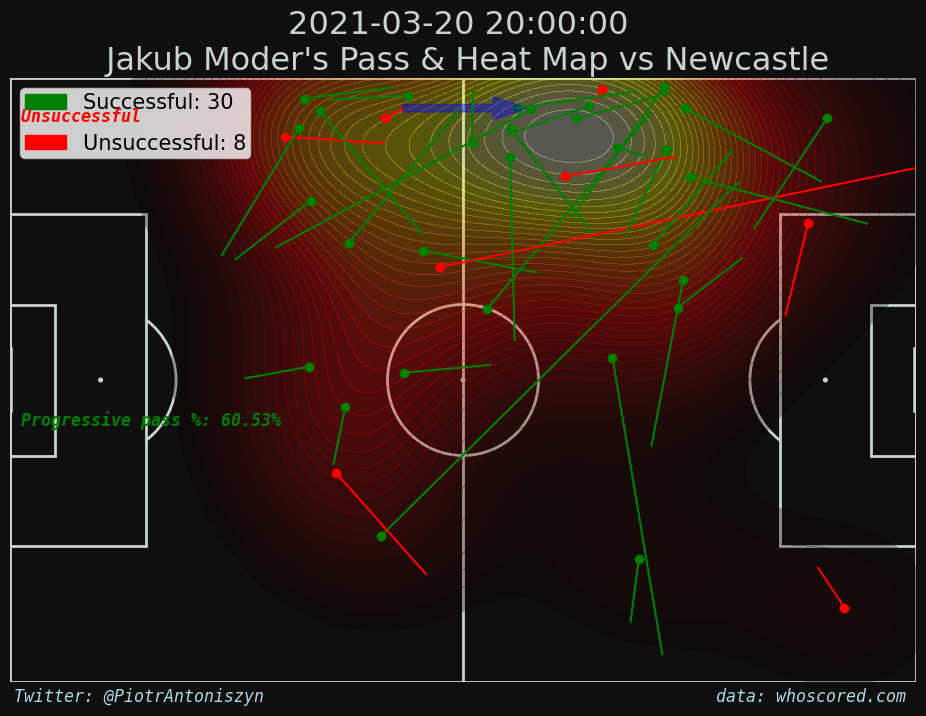

In [17]:
#Generate Pitch
fig,ax = plt.subplots(figsize=(13.5,8),dpi=100)
fig.set_facecolor('#0F0F0F')
ax.patch.set_facecolor('#0F0F0F')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', pitch_color='#0F0F0F', line_color='#c7d5cc', figsize=(16,11),
             constrained_layout=True, tight_layout=False)
pitch.draw(ax=ax)
plt.gca().invert_yaxis()


csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}


from matplotlib.patches import Rectangle
#Create heatmap
kde = sns.kdeplot(
    player_pass_df['x'],
    player_pass_df['y'],
    shade = True,
    shade_lowest=False,
    alpha=.3,
    n_levels=40,
    cmap='hot'
)

#if player_pass_df['outcome'] == 'Successful':
#    plt.plot((player_pass_df['x'],player_pass_df['endX']),(player_pass_df['y'],player_pass_df['endY']),color='green',label='Successful')
#    plt.scatter(player_pass_df['x'],player_pass_df['y'],color='green',label='pass starting points')
#if player_pass_df['outcome'] == 'Unsuccessful':
#    plt.plot((player_pass_df['x'],player_pass_df['endX']),(player_pass_df['y'],player_pass_df['endY']),color='red',label='Unsuccessful')
#    plt.scatter(player_pass_df['x'],player_pass_df['y'],color='red', label='pass starting points')
for x in range(len(player_pass_df['x'])):
    if player_pass_df['outcome'][x] == 'Successful':
        x1 = plt.plot((player_pass_df['x'][x],player_pass_df['endX'][x]),(player_pass_df['y'][x],player_pass_df['endY'][x]),color='green',label='Successful')
        x2 = plt.scatter(player_pass_df['x'][x],player_pass_df['y'][x],color='green',label='pass starting points')
    if player_pass_df['outcome'][x] == 'Unsuccessful':
        y1 = plt.plot((player_pass_df['x'][x],player_pass_df['endX'][x]),(player_pass_df['y'][x],player_pass_df['endY'][x]),color='red',label='Unsuccessful')
        y2 = plt.scatter(player_pass_df['x'][x],player_pass_df['y'][x],color='red', label='pass starting points')

plt.arrow(52.0,76.0,12.0,0.0,color='blue',width=1,alpha=0.4)        
        
plt.xlim(0,120)
plt.ylim(0,80)

red = mpatches.Patch(color='red', label='Unsuccessful: {}'.format(player_pass_df['outcome'].value_counts()[1]))  
green = mpatches.Patch(color='green', label='Successful: {}'.format(player_pass_df['outcome'].value_counts()[0]))  
extra = Rectangle((0, 0), .1, .1, fc="w", fill=False, edgecolor='none', linewidth=0,label='Progressive passes: {}'.format(progPercentage))
fig.text(.18,.1,'Twitter: @PiotrAntoniszyn ',fontstyle='oblique',fontsize=12,fontfamily='monospace',color='lightblue')
fig.text(.70,.1,'data: whoscored.com ',fontstyle='oblique',fontsize=12,fontfamily='monospace',color='lightblue')

#pass map title
if int(h_a) == 1:
    plt.title("{} {} \n {}\'s Pass & Heat Map vs {}".format(xg_data['startTime'][:10],xg_data['startTime'][11:20], player_pass_df['name'][1], xg_data['away']['name']), size=23, y=1,**hfont, color='#c7d5cc')
if int(h_a) == 2:
    plt.title("{} {} \n {}\'s Pass & Heat Map vs {}".format(xg_data['startTime'][:10],xg_data['startTime'][11:20], player_pass_df['name'][1], xg_data['home']['name']), size=23, y=1,**hfont, color='#c7d5cc') 
leg = ax.legend(handles=[green,red],borderpad=0.2, markerscale=1.5, labelspacing=1, loc="best", fontsize=15)    
    
fig.text(.185,.445,'Progressive pass %: {}'.format(progPercentage),fontstyle='oblique',fontsize=12,fontfamily='monospace',color='green',weight='bold')
fig.text(.185,.825,'Unsuccessful ',fontstyle='oblique',fontsize=12,fontfamily='monospace',color='red',weight='bold')

# 

c:\users\piotrek\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\piotrek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


Text(0.79, 0.12, 'data: whoscored.com ')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


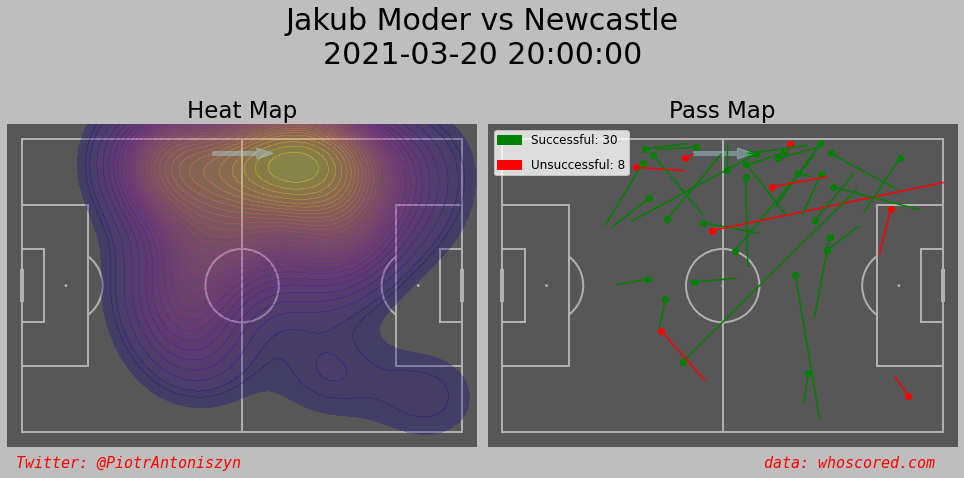

In [16]:
pitch = Pitch(pitch_type='statsbomb', figsize=(13.5,8), layout=(1,2),
              pitch_color='#575757', stripe=False, constrained_layout=False)

fig, ax = pitch.draw()
fig.set_facecolor('#BEBEBE')
ax[0].invert_yaxis()
ax[1].invert_yaxis() 
from matplotlib.patches import Rectangle
#Create heatmap
kde = sns.kdeplot(
    player_pass_df['x'],
    player_pass_df['y'],
    shade = True,
    shade_lowest=False,
    alpha=.3,
    n_levels=30,
    cmap='plasma',
    ax=ax[0]
)
ax[0].arrow(52.0,76.0,12.0,0.0,color='lightblue',width=1,alpha=0.4)
ax[1].arrow(52.0,76.0,12.0,0.0,color='lightblue',width=1,alpha=0.4)
#if player_pass_df['outcome'] == 'Successful':
#    plt.plot((player_pass_df['x'],player_pass_df['endX']),(player_pass_df['y'],player_pass_df['endY']),color='green',label='Successful')
#    plt.scatter(player_pass_df['x'],player_pass_df['y'],color='green',label='pass starting points')
#if player_pass_df['outcome'] == 'Unsuccessful':
#    plt.plot((player_pass_df['x'],player_pass_df['endX']),(player_pass_df['y'],player_pass_df['endY']),color='red',label='Unsuccessful')
#    plt.scatter(player_pass_df['x'],player_pass_df['y'],color='red', label='pass starting points')
for x in range(len(player_pass_df['x'])):
    if player_pass_df['outcome'][x] == 'Successful':
        x1 = plt.plot((player_pass_df['x'][x],player_pass_df['endX'][x]),(player_pass_df['y'][x],player_pass_df['endY'][x]),color='green',label='Successful')
        x2 = plt.scatter(player_pass_df['x'][x],player_pass_df['y'][x],color='green',label='pass starting points')
    if player_pass_df['outcome'][x] == 'Unsuccessful':
        y1 = plt.plot((player_pass_df['x'][x],player_pass_df['endX'][x]),(player_pass_df['y'][x],player_pass_df['endY'][x]),color='red',label='Unsuccessful')
        y2 = plt.scatter(player_pass_df['x'][x],player_pass_df['y'][x],color='red', label='pass starting points')
#pass map title
if int(h_a) == 1:
    sup = fig.suptitle("{} vs {}\n{} {}".format(player_pass_df['name'][1], xg_data['away']['name'],xg_data['startTime'][:10],xg_data['startTime'][11:20]), size=30, y=0.92,**hfont, color='black')   
    ax[0].set_title("Heat Map", size=23, y=1,**hfont, color='black')
    ax[1].set_title("Pass Map", size=23, y=1,**hfont, color='black')

if int(h_a) == 2:
    plt.suptitle("{} {}\n {} vs {}".format(xg_data['startTime'][:10],xg_data['startTime'][11:20], player_pass_df['name'][1], xg_data['home']['name']), size=30, y=.92,**hfont, color='black') 
    ax[0].set_title("Heat Map", size=23, y=1,**hfont, color='black')
    ax[1].set_title("Pass Map", size=23, y=1,**hfont, color='black')
leg = ax[1].legend(handles=[green,red],borderpad=0.3, markerscale=1.0, labelspacing=1, loc="best", fontsize=12)    
#sup = fig.suptitle("{} vs {}\n{} {}".format(player_pass_df['name'][1], xg_data['away']['name'],xg_data['startTime'][:10],xg_data['startTime'][11:20]), size=20, y=1,**hfont, color='black')  
fig.text(.02,.12,'Twitter: @PiotrAntoniszyn ',fontstyle='oblique',fontsize=15,fontfamily='monospace',color='red')
fig.text(.79,.12,'data: whoscored.com ',fontstyle='oblique',fontsize=15,fontfamily='monospace',color='red')